# PROYECTO FINAL

## Empezamos importando los paquetes necesarios para leer y anlaizar tablas

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score
from sklearn.svm import SVC
pd.options.display.max_columns = None
pd.options.display.max_rows = 130

### Leemos el archivo "application_train.csv" y lo guardamos con el nombre "df"

In [3]:
dftrain= pd.read_csv("application_train.csv")
dftest= pd.read_csv("application_test.csv")

## En las siguientes lineas eliminaré las columnas que tienen mas de 45% de nulos 

In [4]:
nulos45=["OWN_CAR_AGE"
,"APARTMENTS_AVG"
,"BASEMENTAREA_AVG"
,"YEARS_BEGINEXPLUATATION_AVG"
,"YEARS_BUILD_AVG"
,"COMMONAREA_AVG"
,"ELEVATORS_AVG"
,"ENTRANCES_AVG"
,"FLOORSMAX_AVG"
,"FLOORSMIN_AVG"
,"LANDAREA_AVG"
,"LIVINGAPARTMENTS_AVG"
,"LIVINGAREA_AVG"
,"NONLIVINGAPARTMENTS_AVG"
,"NONLIVINGAREA_AVG"
,"APARTMENTS_MODE"
,"BASEMENTAREA_MODE"
,"YEARS_BEGINEXPLUATATION_MODE"
,"YEARS_BUILD_MODE"
,"COMMONAREA_MODE"
,"ELEVATORS_MODE"
,"ENTRANCES_MODE"
,"FLOORSMAX_MODE"
,"FLOORSMIN_MODE"
,"LANDAREA_MODE"
,"LIVINGAPARTMENTS_MODE"
,"LIVINGAREA_MODE"
,"NONLIVINGAPARTMENTS_MODE"
,"NONLIVINGAREA_MODE"
,"BASEMENTAREA_MEDI"
,"YEARS_BEGINEXPLUATATION_MEDI"
,"YEARS_BUILD_MEDI"
,"COMMONAREA_MEDI"
,"ELEVATORS_MEDI"
,"ENTRANCES_MEDI"
,"FLOORSMAX_MEDI"
,"FLOORSMIN_MEDI"
,"LANDAREA_MEDI"
,"LIVINGAPARTMENTS_MEDI"
,"LIVINGAREA_MEDI"
,"NONLIVINGAPARTMENTS_MEDI"
,"NONLIVINGAREA_MEDI"
,"FONDKAPREMONT_MODE"
,"HOUSETYPE_MODE"
,"TOTALAREA_MODE"
,"WALLSMATERIAL_MODE"
,"EMERGENCYSTATE_MODE"
,"APARTMENTS_MEDI"
,"NAME_TYPE_SUITE"
,"WEEKDAY_APPR_PROCESS_START"
,"HOUR_APPR_PROCESS_START"
,"AMT_REQ_CREDIT_BUREAU_HOUR"
,"AMT_REQ_CREDIT_BUREAU_DAY"
,"AMT_REQ_CREDIT_BUREAU_WEEK"
,"AMT_REQ_CREDIT_BUREAU_MON"
,"AMT_REQ_CREDIT_BUREAU_QRT"
,"AMT_REQ_CREDIT_BUREAU_YEAR"         
]

In [6]:
dftrain = dftrain.drop(nulos45, axis=1)
dftest = dftest.drop(nulos45, axis=1)

In [9]:
print(dftrain["CODE_GENDER"].unique())
(dftrain["CODE_GENDER"]=='XNA').sum()
dftrain= dftrain.drop(dftrain[dftrain["CODE_GENDER"]=='XNA'].index)
print(dftrain["CODE_GENDER"].unique())

print(dftrain["NAME_INCOME_TYPE"].unique())
dftrain["NAME_INCOME_TYPE"] = dftrain["NAME_INCOME_TYPE"].str.replace('Unemployed','other', regex=False)
dftrain["NAME_INCOME_TYPE"] = dftrain["NAME_INCOME_TYPE"].str.replace('Student','other', regex=False)
dftrain["NAME_INCOME_TYPE"] = dftrain["NAME_INCOME_TYPE"].str.replace('Businessman','other', regex=False)
dftrain["NAME_INCOME_TYPE"] = dftrain["NAME_INCOME_TYPE"].str.replace('Maternity leave','other', regex=False)
print(dftrain["NAME_INCOME_TYPE"].unique())
print(dftrain["NAME_INCOME_TYPE"].value_counts())

print(dftrain["NAME_FAMILY_STATUS"].value_counts())
dftrain["NAME_FAMILY_STATUS"] = dftrain["NAME_FAMILY_STATUS"].str.replace('Civil marriage','Married', regex=False)
dftrain["NAME_FAMILY_STATUS"] = dftrain["NAME_FAMILY_STATUS"].str.replace('Separated','Single / not married', regex=False)
dftrain["NAME_FAMILY_STATUS"] = dftrain["NAME_FAMILY_STATUS"].str.replace('Widow','Single / not married', regex=False)
dftrain= dftrain.drop(dftrain[dftrain["NAME_FAMILY_STATUS"]=="Unknown"].index)
print(dftrain["NAME_FAMILY_STATUS"].value_counts())





['M' 'F']
['M' 'F']
['Working' 'State servant' 'Commercial associate' 'Pensioner' 'other']
['Working' 'State servant' 'Commercial associate' 'Pensioner' 'other']
Working                 158771
Commercial associate     71616
Pensioner                55362
State servant            21703
other                       55
Name: NAME_INCOME_TYPE, dtype: int64
Married                 226203
Single / not married     81302
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64
Married                 226203
Single / not married     81302
Name: NAME_FAMILY_STATUS, dtype: int64


In [10]:
print(dftest["CODE_GENDER"].unique())
(dftest["CODE_GENDER"]=='XNA').sum()
dftest= dftest.drop(dftest[dftest["CODE_GENDER"]=='XNA'].index)
print(dftest["CODE_GENDER"].unique())

print(dftest["NAME_INCOME_TYPE"].unique())
dftest["NAME_INCOME_TYPE"] = dftest["NAME_INCOME_TYPE"].str.replace('Unemployed','other', regex=False)
dftest["NAME_INCOME_TYPE"] = dftest["NAME_INCOME_TYPE"].str.replace('Student','other', regex=False)
dftest["NAME_INCOME_TYPE"] = dftest["NAME_INCOME_TYPE"].str.replace('Businessman','other', regex=False)
dftest["NAME_INCOME_TYPE"] = dftest["NAME_INCOME_TYPE"].str.replace('Maternity leave','other', regex=False)
print(dftest["NAME_INCOME_TYPE"].unique())
print(dftest["NAME_INCOME_TYPE"].value_counts())

print(dftest["NAME_FAMILY_STATUS"].value_counts())
dftest["NAME_FAMILY_STATUS"] = dftest["NAME_FAMILY_STATUS"].str.replace('Civil marriage','Married', regex=False)
dftest["NAME_FAMILY_STATUS"] = dftest["NAME_FAMILY_STATUS"].str.replace('Separated','Single / not married', regex=False)
dftest["NAME_FAMILY_STATUS"] = dftest["NAME_FAMILY_STATUS"].str.replace('Widow','Single / not married', regex=False)
dftest= dftest.drop(dftest[dftest["NAME_FAMILY_STATUS"]=="Unknown"].index)
print(dftest["NAME_FAMILY_STATUS"].value_counts())


['F' 'M']
['F' 'M']
['Working' 'State servant' 'Pensioner' 'Commercial associate'
 'Businessman' 'Student' 'Unemployed']
['Working' 'State servant' 'Pensioner' 'Commercial associate' 'other']
Working                 24533
Commercial associate    11402
Pensioner                9273
State servant            3532
other                       4
Name: NAME_INCOME_TYPE, dtype: int64
Married                 32283
Single / not married     7036
Civil marriage           4261
Separated                2955
Widow                    2209
Name: NAME_FAMILY_STATUS, dtype: int64
Married                 36544
Single / not married    12200
Name: NAME_FAMILY_STATUS, dtype: int64


In [11]:
mascardinal=["OCCUPATION_TYPE", "ORGANIZATION_TYPE"]
dftrain=dftrain.drop(mascardinal, axis=1)
dftest=dftest.drop(mascardinal, axis=1)

In [12]:
#Actualizacion de variable categoricas.
categoricas = ["NAME_CONTRACT_TYPE"
,"CODE_GENDER"
,"FLAG_OWN_CAR"
,"FLAG_OWN_REALTY"
,"NAME_INCOME_TYPE"
,"NAME_EDUCATION_TYPE"
,"NAME_FAMILY_STATUS"
,"NAME_HOUSING_TYPE"
,"REGION_RATING_CLIENT"
,"REGION_RATING_CLIENT_W_CITY"]


## A partir de esta linea empezare a limpiar los datos de las columnas "ordinales"

In [13]:
irrordinales=["FLAG_MOBIL"
,"FLAG_CONT_MOBILE"
,"FLAG_DOCUMENT_2"
,"FLAG_DOCUMENT_4"
,"FLAG_DOCUMENT_7"
,"FLAG_DOCUMENT_9"
,"FLAG_DOCUMENT_10"
,"FLAG_DOCUMENT_11"
,"FLAG_DOCUMENT_12"
,"FLAG_DOCUMENT_13"
,"FLAG_DOCUMENT_14"
,"FLAG_DOCUMENT_15"
,"FLAG_DOCUMENT_17"
,"FLAG_DOCUMENT_19"
,"FLAG_DOCUMENT_20"
,"FLAG_DOCUMENT_21"
]
dftrain=dftrain.drop(irrordinales, axis=1)
dftest=dftest.drop(irrordinales, axis=1)

In [14]:
#Actualizacion de variable ordinales
ordinales=["FLAG_EMP_PHONE"
,"FLAG_WORK_PHONE"
,"FLAG_PHONE"
,"FLAG_EMAIL"
,"REG_REGION_NOT_LIVE_REGION"
,"REG_REGION_NOT_WORK_REGION"
,"LIVE_REGION_NOT_WORK_REGION"
,"REG_CITY_NOT_LIVE_CITY"
,"REG_CITY_NOT_WORK_CITY"
,"LIVE_CITY_NOT_WORK_CITY"
,"FLAG_DOCUMENT_3"
,"FLAG_DOCUMENT_5"
,"FLAG_DOCUMENT_6"
,"FLAG_DOCUMENT_8"
,"FLAG_DOCUMENT_16"
,"FLAG_DOCUMENT_18"
]

## A partir de esta linea empezare a limpiar los datos de las columnas "numericas"

In [15]:
numericas=["CNT_CHILDREN"
,"AMT_INCOME_TOTAL"
,"AMT_CREDIT"
,"AMT_ANNUITY"
,"AMT_GOODS_PRICE"
,"REGION_POPULATION_RELATIVE"
,"DAYS_BIRTH"
,"DAYS_EMPLOYED"
,"DAYS_REGISTRATION"
,"DAYS_ID_PUBLISH"
,"CNT_FAM_MEMBERS"
,"EXT_SOURCE_2"
,"EXT_SOURCE_3"
,"OBS_30_CNT_SOCIAL_CIRCLE"
,"DEF_30_CNT_SOCIAL_CIRCLE"
,"OBS_60_CNT_SOCIAL_CIRCLE"
,"DEF_60_CNT_SOCIAL_CIRCLE"
,"DAYS_LAST_PHONE_CHANGE"
,"EXT_SOURCE_1"
]

### En la siguiente linea voy a multiplicar por (-1) las columnas que son negativas 

In [16]:
fechas=["DAYS_BIRTH"
,"DAYS_EMPLOYED"
,"DAYS_REGISTRATION"
,"DAYS_ID_PUBLISH"
,"DAYS_LAST_PHONE_CHANGE"]

In [17]:
dftrain[fechas] = dftrain[fechas]*-1
dftest[fechas] = dftest[fechas]*-1

In [18]:
dftrain["DAYS_EMPLOYED"].replace({-365243: np.nan}, inplace = True)
dftest["DAYS_EMPLOYED"].replace({-365243: np.nan}, inplace = True)

In [19]:
irrnumerico=["CNT_FAM_MEMBERS"
,"OBS_30_CNT_SOCIAL_CIRCLE"
,"OBS_60_CNT_SOCIAL_CIRCLE"
]
dftrain=dftrain.drop(irrnumerico, axis=1)
dftest=dftest.drop(irrnumerico, axis=1)

In [20]:
numericas=["CNT_CHILDREN"
,"AMT_INCOME_TOTAL"
,"AMT_CREDIT"
,"AMT_ANNUITY"
,"AMT_GOODS_PRICE"
,"REGION_POPULATION_RELATIVE"
,"DAYS_BIRTH"
,"DAYS_EMPLOYED"
,"DAYS_REGISTRATION"
,"DAYS_ID_PUBLISH"
,"EXT_SOURCE_1"
,"EXT_SOURCE_2"
,"EXT_SOURCE_3"
,"DEF_30_CNT_SOCIAL_CIRCLE"
,"DEF_60_CNT_SOCIAL_CIRCLE"
,"DAYS_LAST_PHONE_CHANGE"
]

In [21]:
dftrain=dftrain.reset_index(drop=True)
dftest=dftest.reset_index(drop=True)

## En las siguientes lineas voy a codificar con one hot encoder de sklearn las columnas categoricas.

In [22]:
categoricas

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY']

In [23]:
df_train_categoricas = dftrain[categoricas]
df_test_categoricas = dftest[categoricas]

In [24]:
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(df_train_categoricas)
dftrain_encoded = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(input_features=df_train_categoricas.columns))
dftrain_encoded

,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Working,NAME_INCOME_TYPE_other,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Single / not married,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,REGION_RATING_CLIENT_1,REGION_RATING_CLIENT_2,REGION_RATING_CLIENT_3,REGION_RATING_CLIENT_W_CITY_1,REGION_RATING_CLIENT_W_CITY_2,REGION_RATING_CLIENT_W_CITY_3
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307500,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
307501,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
307502,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
307503,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [25]:
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(df_test_categoricas)
dftest_encoded = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(input_features=df_test_categoricas.columns))
dftest_encoded

,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Working,NAME_INCOME_TYPE_other,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Single / not married,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,REGION_RATING_CLIENT_1,REGION_RATING_CLIENT_2,REGION_RATING_CLIENT_3,REGION_RATING_CLIENT_W_CITY_-1,REGION_RATING_CLIENT_W_CITY_1,REGION_RATING_CLIENT_W_CITY_2,REGION_RATING_CLIENT_W_CITY_3
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
48740,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
48741,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
48742,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [27]:
dftrain = dftrain_encoded.join(dftrain)
dftest = dftest_encoded.join(dftest)

In [28]:
revisar= ["NAME_CONTRACT_TYPE_Cash loans","NAME_CONTRACT_TYPE_Revolving loans","NAME_CONTRACT_TYPE"]
dftrain[revisar].tail(30)



,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_CONTRACT_TYPE
307475,1.0,0.0,Cash loans
307476,1.0,0.0,Cash loans
307477,1.0,0.0,Cash loans
307478,1.0,0.0,Cash loans
307479,0.0,1.0,Revolving loans
307480,1.0,0.0,Cash loans
307481,1.0,0.0,Cash loans
307482,1.0,0.0,Cash loans
307483,1.0,0.0,Cash loans
307484,1.0,0.0,Cash loans


In [29]:
dftest[revisar].tail(30)

,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,NAME_CONTRACT_TYPE
48714,1.0,0.0,Cash loans
48715,1.0,0.0,Cash loans
48716,1.0,0.0,Cash loans
48717,1.0,0.0,Cash loans
48718,1.0,0.0,Cash loans
48719,1.0,0.0,Cash loans
48720,1.0,0.0,Cash loans
48721,1.0,0.0,Cash loans
48722,1.0,0.0,Cash loans
48723,1.0,0.0,Cash loans


In [30]:
#Eliminare las columnas categoricas
dftrain=dftrain.drop(categoricas, axis=1)
dftest=dftest.drop(categoricas, axis=1)

In [31]:
catencoded=["NAME_CONTRACT_TYPE_Cash loans"                        
,"NAME_CONTRACT_TYPE_Revolving loans"                  
,"CODE_GENDER_F"                                      
,"CODE_GENDER_M"                                        
,"FLAG_OWN_CAR_N"                                    
,"FLAG_OWN_CAR_Y"                                     
,"FLAG_OWN_REALTY_N"                                
,"FLAG_OWN_REALTY_Y"                                    
,"NAME_INCOME_TYPE_Commercial associate"               
,"NAME_INCOME_TYPE_Pensioner"                        
,"NAME_INCOME_TYPE_State servant"                   
,"NAME_INCOME_TYPE_Working"                         
,"NAME_INCOME_TYPE_other"                             
,"NAME_EDUCATION_TYPE_Academic degree"                 
,"NAME_EDUCATION_TYPE_Higher education"              
,"NAME_EDUCATION_TYPE_Incomplete higher"             
,"NAME_EDUCATION_TYPE_Lower secondary"               
,"NAME_EDUCATION_TYPE_Secondary / secondary special"   
,"NAME_FAMILY_STATUS_Married"                           
,"NAME_FAMILY_STATUS_Single / not married"             
,"NAME_HOUSING_TYPE_Co-op apartment"                    
,"NAME_HOUSING_TYPE_House / apartment"                 
,"NAME_HOUSING_TYPE_Municipal apartment"               
,"NAME_HOUSING_TYPE_Office apartment"                   
,"NAME_HOUSING_TYPE_Rented apartment"                  
,"NAME_HOUSING_TYPE_With parents"                       
,"REGION_RATING_CLIENT_1"                               
,"REGION_RATING_CLIENT_2"                            
,"REGION_RATING_CLIENT_3"                               
,"REGION_RATING_CLIENT_W_CITY_1"                       
,"REGION_RATING_CLIENT_W_CITY_2"                       
,"REGION_RATING_CLIENT_W_CITY_3"
,"FLAG_DOCUMENT_3"                                       
,"FLAG_DOCUMENT_5"                                        
,"FLAG_DOCUMENT_6"                                        
,"FLAG_DOCUMENT_8"                                       
,"FLAG_DOCUMENT_16"                                       
,"FLAG_DOCUMENT_18"]                        

In [32]:
dftrain[catencoded] = dftrain[catencoded].astype(int)
dftest[catencoded] = dftest[catencoded].astype(int)

In [33]:
numericas

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE']

In [34]:
imputer = KNNImputer(n_neighbors=3)

dftrain_imputed = pd.DataFrame(imputer.fit_transform(dftrain[numericas]), columns= dftrain[numericas].columns)

print(dftrain_imputed)

        CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                0.0          202500.0    406597.5      24700.5   
1                0.0          270000.0   1293502.5      35698.5   
2                0.0           67500.0    135000.0       6750.0   
3                0.0          135000.0    312682.5      29686.5   
4                0.0          121500.0    513000.0      21865.5   
...              ...               ...         ...          ...   
307500           0.0          157500.0    254700.0      27558.0   
307501           0.0           72000.0    269550.0      12001.5   
307502           0.0          153000.0    677664.0      29979.0   
307503           0.0          171000.0    370107.0      20205.0   
307504           0.0          157500.0    675000.0      49117.5   

        AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0              351000.0                    0.018801      9461.0   
1             1129500.0                    0.003541     16765

In [35]:
imputer = KNNImputer(n_neighbors=3)

dftest_imputed = pd.DataFrame(imputer.fit_transform(dftest[numericas]), columns=dftest[numericas].columns)

print(dftest_imputed)

       CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               0.0          135000.0    568800.0      20560.5   
1               0.0           99000.0    222768.0      17370.0   
2               0.0          202500.0    663264.0      69777.0   
3               2.0          315000.0   1575000.0      49018.5   
4               1.0          180000.0    625500.0      32067.0   
...             ...               ...         ...          ...   
48739           0.0          121500.0    412560.0      17473.5   
48740           2.0          157500.0    622413.0      31909.5   
48741           1.0          202500.0    315000.0      33205.5   
48742           0.0          225000.0    450000.0      25128.0   
48743           0.0          135000.0    312768.0      24709.5   

       AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0             450000.0                    0.018850     19241.0         2329.0   
1             180000.0                    0.0

## Escalado de columnas numericas

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dftrain_imputed = pd.DataFrame(scaler.fit_transform(dftrain_imputed[numericas]), columns=numericas)

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dftest_imputed = pd.DataFrame(scaler.fit_transform(dftest_imputed[numericas]), columns=numericas)

### Ahora eliminare las columnas numericas de dataframe original y anexare el df_imputed con el original

In [38]:
#Eliminare las columnas NUMERICAS
dftest=dftest.drop(numericas, axis=1)
dftrain=dftrain.drop(numericas, axis=1)

In [39]:
dftrain = dftrain.join(dftrain_imputed)
dftest = dftest.join(dftest_imputed)

# bureau con suma de creditos pendientes de pago 

In [ ]:
df_bureau= pd.read_csv("bureau.csv")
df_bureau_balance= pd.read_csv("bureau_balance.csv")

In [ ]:
df_bureau_balance=df_bureau_balance.drop(df_bureau_balance[df_bureau_balance["STATUS"]=='C'].index)

In [ ]:
df_bureau_balance=df_bureau_balance.drop(df_bureau_balance[df_bureau_balance["STATUS"]=='X'].index)

In [ ]:
print(df_bureau_balance.shape)
print(df_bureau.shape)

In [ ]:
bureau = df_bureau_balance.merge(df_bureau, left_on='SK_ID_BUREAU', right_on='SK_ID_BUREAU', how='outer')

In [ ]:
bureau=bureau.drop(bureau[bureau["SK_ID_CURR"].isnull()].index)

In [ ]:
bureau[bureau["STATUS"].isnull()]

In [ ]:
bureau["SK_ID_CURR"]=bureau["SK_ID_CURR"].astype(int)

In [ ]:
elcolumnas=["MONTHS_BALANCE"
,"CREDIT_CURRENCY"
,"DAYS_CREDIT"
,"CREDIT_DAY_OVERDUE"
,"DAYS_ENDDATE_FACT"
,"CNT_CREDIT_PROLONG"
,"AMT_CREDIT_MAX_OVERDUE"
,"AMT_CREDIT_SUM"
,"AMT_CREDIT_SUM_LIMIT"
,"DAYS_CREDIT_UPDATE"
,"CREDIT_ACTIVE"
,"DAYS_CREDIT_ENDDATE"
,"CREDIT_TYPE"
,"SK_ID_BUREAU"
]
bureau=bureau.drop(elcolumnas, axis=1)

In [ ]:
bureau = bureau.drop_duplicates()

In [ ]:
bureau["STATUS"]=bureau["STATUS"].fillna(-1)
bureau["STATUS"]=bureau["STATUS"].astype(int)
bureau["AMT_CREDIT_SUM_DEBT"]=bureau["AMT_CREDIT_SUM_DEBT"].fillna(0)
bureau["AMT_ANNUITY"]=bureau["AMT_ANNUITY"].fillna(0)

In [ ]:
columna = bureau['SK_ID_CURR']

bureau = bureau.drop('SK_ID_CURR', axis=1)

bureau.insert(0, 'SK_ID_CURR', columna)

bureau

In [ ]:
bureau_group=bureau.groupby("SK_ID_CURR").agg({'STATUS': 'mean', 'AMT_CREDIT_SUM_DEBT': 
                                               'sum','AMT_CREDIT_SUM_OVERDUE': 'sum',
                                              'AMT_ANNUITY': 'sum'})

In [ ]:
bureau_group.reset_index(inplace=True)

In [ ]:
numericas=["STATUS"
,"AMT_CREDIT_SUM_DEBT"
,"AMT_CREDIT_SUM_OVERDUE"
,"AMT_ANNUITY"]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bureau_group[numericas] = pd.DataFrame(scaler.fit_transform(bureau_group[numericas]), columns=numericas)

In [ ]:
bureau_group

In [ ]:
bureau_group.reset_index(inplace=True,drop=True)

# Agregar otra tabla bureau para hacer one hot de acuerdo a la calificacion por creditos que no se pagaron a tiempo

In [ ]:
df_bureau= pd.read_csv("bureau.csv")
df_bureau_balance= pd.read_csv("bureau_balance.csv")

In [ ]:
df_bureau_balance=df_bureau_balance.drop(df_bureau_balance[df_bureau_balance["STATUS"]=='C'].index)

In [ ]:
df_bureau_balance=df_bureau_balance.drop(df_bureau_balance[df_bureau_balance["STATUS"]=='X'].index)

In [ ]:
print(df_bureau_balance.shape)
print(df_bureau.shape)

In [ ]:
bureau = df_bureau_balance.merge(df_bureau, left_on='SK_ID_BUREAU', right_on='SK_ID_BUREAU', how='outer')

In [ ]:
bureau=bureau.drop(bureau[bureau["SK_ID_CURR"].isnull()].index)

In [ ]:
bureau[bureau["STATUS"].isnull()]

In [ ]:
bureau["SK_ID_CURR"]=bureau["SK_ID_CURR"].astype(int)

In [ ]:
elcolumnas=["MONTHS_BALANCE"
,"CREDIT_CURRENCY"
,"DAYS_CREDIT"
,"CREDIT_DAY_OVERDUE"
,"DAYS_ENDDATE_FACT"
,"CNT_CREDIT_PROLONG"
,"AMT_CREDIT_MAX_OVERDUE"
,"AMT_CREDIT_SUM"
,"AMT_CREDIT_SUM_LIMIT"
,"DAYS_CREDIT_UPDATE"
,"CREDIT_ACTIVE"
,"DAYS_CREDIT_ENDDATE"
,"CREDIT_TYPE"
,"SK_ID_BUREAU"
]
bureau=bureau.drop(elcolumnas, axis=1)

In [ ]:
bureau = bureau.drop_duplicates()

In [ ]:
bureau["STATUS"]=bureau["STATUS"].fillna(-1)
bureau["STATUS"]=bureau["STATUS"].astype(int)
bureau["AMT_CREDIT_SUM_DEBT"]=bureau["AMT_CREDIT_SUM_DEBT"].fillna(0)
bureau["AMT_ANNUITY"]=bureau["AMT_ANNUITY"].fillna(0)

In [ ]:
columna = bureau['SK_ID_CURR']

bureau = bureau.drop('SK_ID_CURR', axis=1)

bureau.insert(0, 'SK_ID_CURR', columna)

bureau

In [ ]:
#Esta linea es para eliminar las columnas que no necesito por el momento
elcolumnas=["AMT_ANNUITY"
]
bureau=bureau.drop(elcolumnas, axis=1)
bureau

In [ ]:
bureau=bureau.reset_index()

In [ ]:
df_encoded = pd.get_dummies(bureau["STATUS"])

In [ ]:
bureau=bureau.join(df_encoded)

In [ ]:
elcolumnas=["index"
,"STATUS"
]
bureau=bureau.drop(elcolumnas, axis=1)
bureau

In [ ]:
bureau_group2=bureau.groupby("SK_ID_CURR").max()

In [ ]:
bureau_group2.reset_index()

# Aqui junto los dos Bureau procesados uno con la calificacion y otro con la suma de los creditos que debe

In [40]:
dfbureau_agregar= bureau_group
dfbureau_cal= bureau_group2

In [41]:
dfbureau_agregar=dfbureau_agregar.drop("STATUS",axis=1)

In [42]:
dfbureau = pd.merge(dfbureau_agregar, dfbureau_cal, on='SK_ID_CURR', how='left')

In [43]:
dftrain = pd.merge(dftrain, dfbureau , on='SK_ID_CURR', how='left')
dftest = pd.merge(dftest, dfbureau , on='SK_ID_CURR', how='left')

In [44]:
dftrain = dftrain.fillna(0)
dftest = dftest.fillna(0)

In [45]:
dftrain.to_csv('dftrain_scaled_20062023.csv', index=False)
dftest.to_csv('dftest_scaled_20062023.csv', index=False)

In [46]:
cols_test= dftest["SK_ID_CURR"]

In [49]:
dftrain["SK_ID_CURR"]

0         100002
1         100003
2         100004
3         100006
4         100007
           ...  
307500    456251
307501    456252
307502    456253
307503    456254
307504    456255
Name: SK_ID_CURR, Length: 307505, dtype: int64

In [50]:
dftrain = dftrain.drop("SK_ID_CURR", axis=1)
dftest = dftest.drop("SK_ID_CURR", axis=1)

# Oversampling con SMOTE

In [53]:
X = dftrain.drop("TARGET",axis = 1)
y = dftrain["TARGET"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [54]:
sm= SMOTE(random_state=42)
X_sm, y_sm  = sm.fit_resample(X_train,y_train)

print(f'''Cambio de X antes de SMOTE: {X_train.shape}
Cambio de X despues de SMOTE: {X_sm.shape}''')

print(f'\nBalance positivo y negativo de las clases (%):')
y_sm.value_counts(normalize=True)*100

Cambio de X antes de SMOTE: (246004, 74)
Cambio de X despues de SMOTE: (452250, 74)

Balance positivo y negativo de las clases (%):


0    50.0
1    50.0
Name: TARGET, dtype: float64

In [55]:
X_train=X_sm
y_train=y_sm

# Entrenamiento de modelos

# Regresion logistica

In [56]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normaliza los datos
    ('logreg', LogisticRegression())  # Modelo de regresión logística
])

# Define una cuadrícula de hiperparámetros para probar
param_grid = {
    'logreg__C': [0.1, 0.001, 0.01],  # Parámetro de regularización C
    'logreg__penalty': ['l1', 'l2'],  # Tipo de regularización
    'logreg__solver': ['liblinear']  # Algoritmo de optimización
}

# Realiza la búsqueda de cuadrícula para encontrar los mejores hiperparámetros
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Imprime los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:")
print(grid_search.best_params_)

# Obtén las predicciones del modelo en el conjunto de prueba
y_pred = grid_search.predict(X_test)


Mejores hiperparámetros:
{'logreg__C': 0.01, 'logreg__penalty': 'l2', 'logreg__solver': 'liblinear'}


In [68]:
dftest=dftest.drop("REGION_RATING_CLIENT_W_CITY_-1", axis=1)

In [74]:
reglog = grid_search.predict_proba(dftest)[:, 1]

In [75]:
reglog = pd.DataFrame(reglog, columns=["TARGET"])

In [76]:
reglog

,TARGET
0,0.098841
1,0.625394
2,0.069681
3,0.090299
4,0.368079
...,...
48739,0.036694
48740,0.252053
48741,0.111031
48742,0.013339


In [77]:
reglog["SK_ID_CURR"]= cols_test

In [79]:
column_order = ['SK_ID_CURR', 'TARGET']
reglog = reglog.reindex(columns=column_order)

In [80]:
reglog

,SK_ID_CURR,TARGET
0,100001,0.098841
1,100005,0.625394
2,100013,0.069681
3,100028,0.090299
4,100038,0.368079
...,...,...
48739,456221,0.036694
48740,456222,0.252053
48741,456223,0.111031
48742,456224,0.013339


In [81]:
reglog.to_csv('reg_log_20062023.csv', index = False)

# Entrenamiento de modelo XGBOOST

In [82]:
import xgboost
xgb = xgboost.XGBClassifier(eval_metric=['logloss',"error"], early_stopping_rounds=10)
parameters={"objective" : ["binary:logistic"],
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],}

clf = GridSearchCV(xgb, parameters, cv=3, scoring="roc_auc")


clf.fit(X_train, y_train, eval_set=[(X_test, y_test)])

[0]	validation_0-logloss:0.67909	validation_0-error:0.34224
[1]	validation_0-logloss:0.66539	validation_0-error:0.35437
[2]	validation_0-logloss:0.65455	validation_0-error:0.36892
[3]	validation_0-logloss:0.64609	validation_0-error:0.40526
[4]	validation_0-logloss:0.63817	validation_0-error:0.36965
[5]	validation_0-logloss:0.63167	validation_0-error:0.37751
[6]	validation_0-logloss:0.61864	validation_0-error:0.36183
[7]	validation_0-logloss:0.61203	validation_0-error:0.35263
[8]	validation_0-logloss:0.60446	validation_0-error:0.32720
[9]	validation_0-logloss:0.59949	validation_0-error:0.32638
[10]	validation_0-logloss:0.59127	validation_0-error:0.31229
[11]	validation_0-logloss:0.58449	validation_0-error:0.30086
[12]	validation_0-logloss:0.58124	validation_0-error:0.31165
[13]	validation_0-logloss:0.57527	validation_0-error:0.30328
[14]	validation_0-logloss:0.56956	validation_0-error:0.29556
[15]	validation_0-logloss:0.56677	validation_0-error:0.29570
[16]	validation_0-logloss:0.56144	

[60]	validation_0-logloss:0.42721	validation_0-error:0.16931
[61]	validation_0-logloss:0.42645	validation_0-error:0.16925
[62]	validation_0-logloss:0.42589	validation_0-error:0.16884
[63]	validation_0-logloss:0.42240	validation_0-error:0.16616
[64]	validation_0-logloss:0.42163	validation_0-error:0.16561
[65]	validation_0-logloss:0.42070	validation_0-error:0.16505
[66]	validation_0-logloss:0.42000	validation_0-error:0.16536
[67]	validation_0-logloss:0.41740	validation_0-error:0.16359
[68]	validation_0-logloss:0.41615	validation_0-error:0.16271
[69]	validation_0-logloss:0.41520	validation_0-error:0.16247
[70]	validation_0-logloss:0.41463	validation_0-error:0.16262
[71]	validation_0-logloss:0.41148	validation_0-error:0.16006
[72]	validation_0-logloss:0.41078	validation_0-error:0.15961
[73]	validation_0-logloss:0.41016	validation_0-error:0.15883
[74]	validation_0-logloss:0.40948	validation_0-error:0.15839
[75]	validation_0-logloss:0.40754	validation_0-error:0.15684
[76]	validation_0-loglos

[4]	validation_0-logloss:0.87742	validation_0-error:0.82125
[5]	validation_0-logloss:0.90981	validation_0-error:0.81771
[6]	validation_0-logloss:0.94145	validation_0-error:0.82067
[7]	validation_0-logloss:0.96975	validation_0-error:0.82638
[8]	validation_0-logloss:0.99679	validation_0-error:0.82955
[9]	validation_0-logloss:1.02200	validation_0-error:0.82265
[10]	validation_0-logloss:1.04587	validation_0-error:0.83317
[11]	validation_0-logloss:1.06607	validation_0-error:0.83721
[12]	validation_0-logloss:1.08607	validation_0-error:0.83002
[13]	validation_0-logloss:1.10304	validation_0-error:0.83060
[14]	validation_0-logloss:1.11825	validation_0-error:0.83251
[15]	validation_0-logloss:1.13275	validation_0-error:0.83080
[0]	validation_0-logloss:0.67915	validation_0-error:0.34224
[1]	validation_0-logloss:0.66551	validation_0-error:0.35437
[2]	validation_0-logloss:0.65470	validation_0-error:0.36892
[3]	validation_0-logloss:0.64628	validation_0-error:0.40526
[4]	validation_0-logloss:0.63839	v

[2]	validation_0-logloss:0.75391	validation_0-error:0.65849
[3]	validation_0-logloss:0.77258	validation_0-error:0.63814
[4]	validation_0-logloss:0.78996	validation_0-error:0.64254
[5]	validation_0-logloss:0.80700	validation_0-error:0.66005
[6]	validation_0-logloss:0.82347	validation_0-error:0.65836
[7]	validation_0-logloss:0.83731	validation_0-error:0.65670
[8]	validation_0-logloss:0.85022	validation_0-error:0.65952
[9]	validation_0-logloss:0.86224	validation_0-error:0.66018
[10]	validation_0-logloss:0.87168	validation_0-error:0.66409
[11]	validation_0-logloss:0.87848	validation_0-error:0.66932
[12]	validation_0-logloss:0.88740	validation_0-error:0.65906
[13]	validation_0-logloss:0.89288	validation_0-error:0.65812
[0]	validation_0-logloss:0.71889	validation_0-error:0.79838
[1]	validation_0-logloss:0.74084	validation_0-error:0.66823
[2]	validation_0-logloss:0.76256	validation_0-error:0.68106
[3]	validation_0-logloss:0.78409	validation_0-error:0.69965
[4]	validation_0-logloss:0.80374	val

[39]	validation_0-logloss:0.46243	validation_0-error:0.19227
[40]	validation_0-logloss:0.46099	validation_0-error:0.19122
[41]	validation_0-logloss:0.45829	validation_0-error:0.18853
[42]	validation_0-logloss:0.45475	validation_0-error:0.18546
[43]	validation_0-logloss:0.45346	validation_0-error:0.18553
[44]	validation_0-logloss:0.45117	validation_0-error:0.18325
[45]	validation_0-logloss:0.45038	validation_0-error:0.18331
[46]	validation_0-logloss:0.44926	validation_0-error:0.18299
[47]	validation_0-logloss:0.44759	validation_0-error:0.18188
[48]	validation_0-logloss:0.44663	validation_0-error:0.18169
[49]	validation_0-logloss:0.44390	validation_0-error:0.17977
[50]	validation_0-logloss:0.44296	validation_0-error:0.18003
[51]	validation_0-logloss:0.43912	validation_0-error:0.17678
[52]	validation_0-logloss:0.43778	validation_0-error:0.17624
[53]	validation_0-logloss:0.43671	validation_0-error:0.17566
[54]	validation_0-logloss:0.43435	validation_0-error:0.17375
[55]	validation_0-loglos

[74]	validation_0-logloss:0.40810	validation_0-error:0.15772
[75]	validation_0-logloss:0.40610	validation_0-error:0.15645
[76]	validation_0-logloss:0.40406	validation_0-error:0.15548
[77]	validation_0-logloss:0.40343	validation_0-error:0.15528
[78]	validation_0-logloss:0.40162	validation_0-error:0.15374
[79]	validation_0-logloss:0.39997	validation_0-error:0.15288
[80]	validation_0-logloss:0.39862	validation_0-error:0.15237
[81]	validation_0-logloss:0.39797	validation_0-error:0.15200
[82]	validation_0-logloss:0.39741	validation_0-error:0.15138
[83]	validation_0-logloss:0.39372	validation_0-error:0.14881
[84]	validation_0-logloss:0.39291	validation_0-error:0.14819
[85]	validation_0-logloss:0.39264	validation_0-error:0.14834
[86]	validation_0-logloss:0.39195	validation_0-error:0.14787
[87]	validation_0-logloss:0.39076	validation_0-error:0.14699
[88]	validation_0-logloss:0.38912	validation_0-error:0.14595
[89]	validation_0-logloss:0.38835	validation_0-error:0.14546
[90]	validation_0-loglos

[9]	validation_0-logloss:0.85541	validation_0-error:0.66666
[10]	validation_0-logloss:0.86327	validation_0-error:0.66900
[11]	validation_0-logloss:0.87239	validation_0-error:0.67296
[12]	validation_0-logloss:0.87832	validation_0-error:0.66399
[13]	validation_0-logloss:0.88421	validation_0-error:0.66337
[14]	validation_0-logloss:0.88856	validation_0-error:0.66388
[15]	validation_0-logloss:0.89144	validation_0-error:0.65862
[0]	validation_0-logloss:0.71469	validation_0-error:0.67622
[1]	validation_0-logloss:0.73379	validation_0-error:0.67500
[2]	validation_0-logloss:0.75243	validation_0-error:0.66575
[3]	validation_0-logloss:0.77102	validation_0-error:0.67074
[4]	validation_0-logloss:0.78850	validation_0-error:0.66906
[5]	validation_0-logloss:0.80510	validation_0-error:0.65937
[6]	validation_0-logloss:0.82047	validation_0-error:0.66856
[7]	validation_0-logloss:0.83058	validation_0-error:0.66809
[8]	validation_0-logloss:0.84352	validation_0-error:0.66791
[9]	validation_0-logloss:0.85230	v

[28]	validation_0-logloss:1.01310	validation_0-error:0.66306
[29]	validation_0-logloss:1.00121	validation_0-error:0.65399
[30]	validation_0-logloss:0.99536	validation_0-error:0.64835
[31]	validation_0-logloss:0.99226	validation_0-error:0.64454
[32]	validation_0-logloss:0.98591	validation_0-error:0.63885
[33]	validation_0-logloss:0.98113	validation_0-error:0.63318
[34]	validation_0-logloss:0.97213	validation_0-error:0.62615
[35]	validation_0-logloss:0.96979	validation_0-error:0.62204
[36]	validation_0-logloss:0.96558	validation_0-error:0.61804
[37]	validation_0-logloss:0.95857	validation_0-error:0.61245
[38]	validation_0-logloss:0.95484	validation_0-error:0.60932
[39]	validation_0-logloss:0.95192	validation_0-error:0.60578
[40]	validation_0-logloss:0.94183	validation_0-error:0.59919
[41]	validation_0-logloss:0.92532	validation_0-error:0.58882
[42]	validation_0-logloss:0.91879	validation_0-error:0.58441
[43]	validation_0-logloss:0.91529	validation_0-error:0.58069
[44]	validation_0-loglos

[26]	validation_0-logloss:0.50705	validation_0-error:0.22834
[27]	validation_0-logloss:0.50157	validation_0-error:0.22213
[28]	validation_0-logloss:0.49655	validation_0-error:0.21707
[29]	validation_0-logloss:0.49443	validation_0-error:0.21751
[30]	validation_0-logloss:0.48914	validation_0-error:0.21291
[31]	validation_0-logloss:0.48607	validation_0-error:0.20936
[32]	validation_0-logloss:0.48398	validation_0-error:0.20912
[33]	validation_0-logloss:0.48105	validation_0-error:0.20657
[34]	validation_0-logloss:0.47678	validation_0-error:0.20286
[35]	validation_0-logloss:0.47330	validation_0-error:0.20039
[36]	validation_0-logloss:0.46989	validation_0-error:0.19757
[37]	validation_0-logloss:0.46747	validation_0-error:0.19562
[38]	validation_0-logloss:0.46590	validation_0-error:0.19476
[39]	validation_0-logloss:0.46458	validation_0-error:0.19447
[40]	validation_0-logloss:0.46314	validation_0-error:0.19362
[41]	validation_0-logloss:0.46042	validation_0-error:0.19110
[42]	validation_0-loglos

[61]	validation_0-logloss:0.42335	validation_0-error:0.16570
[62]	validation_0-logloss:0.42251	validation_0-error:0.16549
[63]	validation_0-logloss:0.42053	validation_0-error:0.16392
[64]	validation_0-logloss:0.41956	validation_0-error:0.16414
[65]	validation_0-logloss:0.41888	validation_0-error:0.16369
[66]	validation_0-logloss:0.41849	validation_0-error:0.16356
[67]	validation_0-logloss:0.41620	validation_0-error:0.16170
[68]	validation_0-logloss:0.41490	validation_0-error:0.16141
[69]	validation_0-logloss:0.41185	validation_0-error:0.15987
[70]	validation_0-logloss:0.40981	validation_0-error:0.15850
[71]	validation_0-logloss:0.40944	validation_0-error:0.15862
[72]	validation_0-logloss:0.40745	validation_0-error:0.15691
[73]	validation_0-logloss:0.40576	validation_0-error:0.15608
[74]	validation_0-logloss:0.40435	validation_0-error:0.15501
[75]	validation_0-logloss:0.40188	validation_0-error:0.15323
[76]	validation_0-logloss:0.40041	validation_0-error:0.15252
[77]	validation_0-loglos

[96]	validation_0-logloss:0.51872	validation_0-error:0.26663
[97]	validation_0-logloss:0.51622	validation_0-error:0.26461
[98]	validation_0-logloss:0.51155	validation_0-error:0.26096
[99]	validation_0-logloss:0.50871	validation_0-error:0.25869
[0]	validation_0-logloss:0.71439	validation_0-error:0.70882
[1]	validation_0-logloss:0.73335	validation_0-error:0.68976
[2]	validation_0-logloss:0.75211	validation_0-error:0.66118
[3]	validation_0-logloss:0.77120	validation_0-error:0.66114
[4]	validation_0-logloss:0.78896	validation_0-error:0.66597
[5]	validation_0-logloss:0.80549	validation_0-error:0.65760
[6]	validation_0-logloss:0.82055	validation_0-error:0.66731
[7]	validation_0-logloss:0.83227	validation_0-error:0.67017
[8]	validation_0-logloss:0.84582	validation_0-error:0.67002
[9]	validation_0-logloss:0.85544	validation_0-error:0.66666
[10]	validation_0-logloss:0.86330	validation_0-error:0.66903
[11]	validation_0-logloss:0.87242	validation_0-error:0.67305
[12]	validation_0-logloss:0.87836	

[15]	validation_0-logloss:1.03477	validation_0-error:0.72191
[16]	validation_0-logloss:1.04103	validation_0-error:0.71765
[17]	validation_0-logloss:1.04385	validation_0-error:0.71439
[18]	validation_0-logloss:1.04594	validation_0-error:0.71322
[19]	validation_0-logloss:1.04857	validation_0-error:0.70958
[20]	validation_0-logloss:1.04189	validation_0-error:0.70173
[21]	validation_0-logloss:1.03614	validation_0-error:0.69456
[22]	validation_0-logloss:1.03466	validation_0-error:0.68843
[23]	validation_0-logloss:1.03569	validation_0-error:0.68537
[24]	validation_0-logloss:1.03172	validation_0-error:0.68189
[25]	validation_0-logloss:1.02624	validation_0-error:0.67654
[26]	validation_0-logloss:1.02425	validation_0-error:0.67300
[27]	validation_0-logloss:1.02070	validation_0-error:0.66986
[28]	validation_0-logloss:1.01326	validation_0-error:0.66326
[29]	validation_0-logloss:1.00138	validation_0-error:0.65430
[30]	validation_0-logloss:0.99554	validation_0-error:0.64851
[31]	validation_0-loglos

[13]	validation_0-logloss:0.56445	validation_0-error:0.27190
[14]	validation_0-logloss:0.55774	validation_0-error:0.26518
[15]	validation_0-logloss:0.55248	validation_0-error:0.26135
[16]	validation_0-logloss:0.54951	validation_0-error:0.26252
[17]	validation_0-logloss:0.54303	validation_0-error:0.25413
[18]	validation_0-logloss:0.53764	validation_0-error:0.24918
[19]	validation_0-logloss:0.53315	validation_0-error:0.24704
[20]	validation_0-logloss:0.52631	validation_0-error:0.23998
[21]	validation_0-logloss:0.52292	validation_0-error:0.23964
[22]	validation_0-logloss:0.51920	validation_0-error:0.23730
[23]	validation_0-logloss:0.51687	validation_0-error:0.23647
[24]	validation_0-logloss:0.51096	validation_0-error:0.23022
[25]	validation_0-logloss:0.50753	validation_0-error:0.22681
[26]	validation_0-logloss:0.50276	validation_0-error:0.22344
[27]	validation_0-logloss:0.49854	validation_0-error:0.21925
[28]	validation_0-logloss:0.49306	validation_0-error:0.21336
[29]	validation_0-loglos

[48]	validation_0-logloss:0.45310	validation_0-error:0.18818
[49]	validation_0-logloss:0.45114	validation_0-error:0.18671
[50]	validation_0-logloss:0.44890	validation_0-error:0.18447
[51]	validation_0-logloss:0.44452	validation_0-error:0.18112
[52]	validation_0-logloss:0.44021	validation_0-error:0.17696
[53]	validation_0-logloss:0.43901	validation_0-error:0.17614
[54]	validation_0-logloss:0.43783	validation_0-error:0.17598
[55]	validation_0-logloss:0.43695	validation_0-error:0.17559
[56]	validation_0-logloss:0.43537	validation_0-error:0.17468
[57]	validation_0-logloss:0.43338	validation_0-error:0.17291
[58]	validation_0-logloss:0.43111	validation_0-error:0.17117
[59]	validation_0-logloss:0.43007	validation_0-error:0.17076
[60]	validation_0-logloss:0.42922	validation_0-error:0.17026
[61]	validation_0-logloss:0.42855	validation_0-error:0.17009
[62]	validation_0-logloss:0.42769	validation_0-error:0.16949
[63]	validation_0-logloss:0.42567	validation_0-error:0.16779
[64]	validation_0-loglos

[83]	validation_0-logloss:0.56947	validation_0-error:0.31100
[84]	validation_0-logloss:0.56632	validation_0-error:0.30868
[85]	validation_0-logloss:0.56544	validation_0-error:0.30749
[86]	validation_0-logloss:0.56145	validation_0-error:0.30442
[87]	validation_0-logloss:0.56039	validation_0-error:0.30336
[88]	validation_0-logloss:0.55753	validation_0-error:0.30060
[89]	validation_0-logloss:0.55496	validation_0-error:0.29855
[90]	validation_0-logloss:0.55370	validation_0-error:0.29777
[91]	validation_0-logloss:0.54979	validation_0-error:0.29458
[92]	validation_0-logloss:0.54889	validation_0-error:0.29364
[93]	validation_0-logloss:0.54741	validation_0-error:0.29208
[94]	validation_0-logloss:0.54427	validation_0-error:0.28964
[95]	validation_0-logloss:0.53575	validation_0-error:0.28312
[96]	validation_0-logloss:0.52998	validation_0-error:0.27856
[97]	validation_0-logloss:0.52811	validation_0-error:0.27731
[98]	validation_0-logloss:0.52657	validation_0-error:0.27551
[99]	validation_0-loglos

[2]	validation_0-logloss:0.78675	validation_0-error:0.76596
[3]	validation_0-logloss:0.81523	validation_0-error:0.72957
[4]	validation_0-logloss:0.84260	validation_0-error:0.73451
[5]	validation_0-logloss:0.86874	validation_0-error:0.72939
[6]	validation_0-logloss:0.89334	validation_0-error:0.72652
[7]	validation_0-logloss:0.91357	validation_0-error:0.73674
[8]	validation_0-logloss:0.93592	validation_0-error:0.74009
[9]	validation_0-logloss:0.95416	validation_0-error:0.73400
[10]	validation_0-logloss:0.97083	validation_0-error:0.73833
[11]	validation_0-logloss:0.98431	validation_0-error:0.74244
[12]	validation_0-logloss:0.99812	validation_0-error:0.73220
[13]	validation_0-logloss:1.01172	validation_0-error:0.72514
[14]	validation_0-logloss:1.02270	validation_0-error:0.72805
[15]	validation_0-logloss:1.03233	validation_0-error:0.72075
[16]	validation_0-logloss:1.03845	validation_0-error:0.71615
[17]	validation_0-logloss:1.04147	validation_0-error:0.71293
[18]	validation_0-logloss:1.0435

[10]	validation_0-logloss:0.54594	validation_0-error:0.24800
[11]	validation_0-logloss:0.53904	validation_0-error:0.24151
[12]	validation_0-logloss:0.53467	validation_0-error:0.24549
[13]	validation_0-logloss:0.53033	validation_0-error:0.24458
[14]	validation_0-logloss:0.52181	validation_0-error:0.23634
[15]	validation_0-logloss:0.51626	validation_0-error:0.23270
[16]	validation_0-logloss:0.50745	validation_0-error:0.22444
[17]	validation_0-logloss:0.50290	validation_0-error:0.22377
[18]	validation_0-logloss:0.49583	validation_0-error:0.21850
[19]	validation_0-logloss:0.49180	validation_0-error:0.21544
[20]	validation_0-logloss:0.48422	validation_0-error:0.20892
[21]	validation_0-logloss:0.47563	validation_0-error:0.20073
[22]	validation_0-logloss:0.47052	validation_0-error:0.19611
[23]	validation_0-logloss:0.46733	validation_0-error:0.19556
[24]	validation_0-logloss:0.46071	validation_0-error:0.19055
[25]	validation_0-logloss:0.45820	validation_0-error:0.18844
[26]	validation_0-loglos

[24]	validation_0-logloss:0.76881	validation_0-error:0.49565
[25]	validation_0-logloss:0.76194	validation_0-error:0.48963
[26]	validation_0-logloss:0.75579	validation_0-error:0.48217
[27]	validation_0-logloss:0.74985	validation_0-error:0.47568
[28]	validation_0-logloss:0.73918	validation_0-error:0.46542
[29]	validation_0-logloss:0.73186	validation_0-error:0.45863
[30]	validation_0-logloss:0.72697	validation_0-error:0.45370
[31]	validation_0-logloss:0.72129	validation_0-error:0.44884
[32]	validation_0-logloss:0.71681	validation_0-error:0.44342
[33]	validation_0-logloss:0.70920	validation_0-error:0.43546
[34]	validation_0-logloss:0.70160	validation_0-error:0.42796
[35]	validation_0-logloss:0.69996	validation_0-error:0.42611
[36]	validation_0-logloss:0.69373	validation_0-error:0.42095
[37]	validation_0-logloss:0.68934	validation_0-error:0.41546
[38]	validation_0-logloss:0.68465	validation_0-error:0.40960
[39]	validation_0-logloss:0.67754	validation_0-error:0.40409
[40]	validation_0-loglos

[59]	validation_0-logloss:0.67354	validation_0-error:0.40107
[60]	validation_0-logloss:0.66882	validation_0-error:0.39733
[61]	validation_0-logloss:0.66520	validation_0-error:0.39377
[62]	validation_0-logloss:0.66148	validation_0-error:0.39123
[63]	validation_0-logloss:0.65815	validation_0-error:0.38775
[64]	validation_0-logloss:0.65477	validation_0-error:0.38448
[65]	validation_0-logloss:0.65403	validation_0-error:0.38368
[66]	validation_0-logloss:0.64921	validation_0-error:0.37951
[67]	validation_0-logloss:0.64487	validation_0-error:0.37582
[68]	validation_0-logloss:0.64064	validation_0-error:0.37188
[69]	validation_0-logloss:0.63909	validation_0-error:0.37025
[70]	validation_0-logloss:0.63663	validation_0-error:0.36804
[71]	validation_0-logloss:0.63546	validation_0-error:0.36676
[72]	validation_0-logloss:0.63311	validation_0-error:0.36476
[73]	validation_0-logloss:0.62974	validation_0-error:0.36139
[74]	validation_0-logloss:0.62820	validation_0-error:0.35964
[75]	validation_0-loglos

[84]	validation_0-logloss:0.60242	validation_0-error:0.33549
[85]	validation_0-logloss:0.59686	validation_0-error:0.33123
[86]	validation_0-logloss:0.59476	validation_0-error:0.32925
[87]	validation_0-logloss:0.58930	validation_0-error:0.32481
[88]	validation_0-logloss:0.58513	validation_0-error:0.32136
[89]	validation_0-logloss:0.58091	validation_0-error:0.31832
[90]	validation_0-logloss:0.57589	validation_0-error:0.31479
[91]	validation_0-logloss:0.57464	validation_0-error:0.31331
[92]	validation_0-logloss:0.56978	validation_0-error:0.30920
[93]	validation_0-logloss:0.56764	validation_0-error:0.30717
[94]	validation_0-logloss:0.56631	validation_0-error:0.30619
[95]	validation_0-logloss:0.56526	validation_0-error:0.30526
[96]	validation_0-logloss:0.55620	validation_0-error:0.29889
[97]	validation_0-logloss:0.55287	validation_0-error:0.29642
[98]	validation_0-logloss:0.54827	validation_0-error:0.29302
[99]	validation_0-logloss:0.54392	validation_0-error:0.28962
[0]	validation_0-logloss

[90]	validation_0-logloss:0.32055	validation_0-error:0.10730
[91]	validation_0-logloss:0.31960	validation_0-error:0.10665
[92]	validation_0-logloss:0.31947	validation_0-error:0.10671
[93]	validation_0-logloss:0.31853	validation_0-error:0.10608
[94]	validation_0-logloss:0.31739	validation_0-error:0.10558
[95]	validation_0-logloss:0.31618	validation_0-error:0.10491
[96]	validation_0-logloss:0.31535	validation_0-error:0.10473
[97]	validation_0-logloss:0.31496	validation_0-error:0.10494
[98]	validation_0-logloss:0.31457	validation_0-error:0.10475
[99]	validation_0-logloss:0.31332	validation_0-error:0.10424
[0]	validation_0-logloss:0.67157	validation_0-error:0.24647
[1]	validation_0-logloss:0.65604	validation_0-error:0.28718
[2]	validation_0-logloss:0.64334	validation_0-error:0.29574
[3]	validation_0-logloss:0.63132	validation_0-error:0.29666
[4]	validation_0-logloss:0.61880	validation_0-error:0.30230
[5]	validation_0-logloss:0.61032	validation_0-error:0.30265
[6]	validation_0-logloss:0.598

[3]	validation_0-logloss:0.76074	validation_0-error:0.64227
[4]	validation_0-logloss:0.77422	validation_0-error:0.63126
[5]	validation_0-logloss:0.78906	validation_0-error:0.63119
[6]	validation_0-logloss:0.80340	validation_0-error:0.64188
[7]	validation_0-logloss:0.81149	validation_0-error:0.63827
[8]	validation_0-logloss:0.82244	validation_0-error:0.63562
[9]	validation_0-logloss:0.83072	validation_0-error:0.63287
[10]	validation_0-logloss:0.83451	validation_0-error:0.62858
[11]	validation_0-logloss:0.83927	validation_0-error:0.62903
[12]	validation_0-logloss:0.84601	validation_0-error:0.62718
[13]	validation_0-logloss:0.85076	validation_0-error:0.62508
[14]	validation_0-logloss:0.85179	validation_0-error:0.62410
[15]	validation_0-logloss:0.85432	validation_0-error:0.61781
[16]	validation_0-logloss:0.85381	validation_0-error:0.61137
[17]	validation_0-logloss:0.85220	validation_0-error:0.60571
[18]	validation_0-logloss:0.85132	validation_0-error:0.60262
[19]	validation_0-logloss:0.851

[27]	validation_0-logloss:0.94334	validation_0-error:0.61038
[28]	validation_0-logloss:0.93254	validation_0-error:0.60077
[29]	validation_0-logloss:0.92108	validation_0-error:0.59245
[30]	validation_0-logloss:0.91223	validation_0-error:0.58593
[31]	validation_0-logloss:0.90877	validation_0-error:0.58167
[32]	validation_0-logloss:0.90326	validation_0-error:0.57675
[33]	validation_0-logloss:0.90151	validation_0-error:0.57212
[34]	validation_0-logloss:0.89236	validation_0-error:0.56464
[35]	validation_0-logloss:0.88574	validation_0-error:0.55947
[36]	validation_0-logloss:0.87647	validation_0-error:0.55168
[37]	validation_0-logloss:0.87068	validation_0-error:0.54739
[38]	validation_0-logloss:0.85988	validation_0-error:0.53863
[39]	validation_0-logloss:0.85113	validation_0-error:0.53181
[40]	validation_0-logloss:0.84882	validation_0-error:0.52762
[41]	validation_0-logloss:0.83557	validation_0-error:0.51793
[42]	validation_0-logloss:0.83216	validation_0-error:0.51435
[43]	validation_0-loglos

[34]	validation_0-logloss:0.42316	validation_0-error:0.16671
[35]	validation_0-logloss:0.41919	validation_0-error:0.16346
[36]	validation_0-logloss:0.41606	validation_0-error:0.16102
[37]	validation_0-logloss:0.41244	validation_0-error:0.15928
[38]	validation_0-logloss:0.40957	validation_0-error:0.15712
[39]	validation_0-logloss:0.40839	validation_0-error:0.15660
[40]	validation_0-logloss:0.40731	validation_0-error:0.15619
[41]	validation_0-logloss:0.40441	validation_0-error:0.15460
[42]	validation_0-logloss:0.40312	validation_0-error:0.15390
[43]	validation_0-logloss:0.40169	validation_0-error:0.15320
[44]	validation_0-logloss:0.39762	validation_0-error:0.15044
[45]	validation_0-logloss:0.39401	validation_0-error:0.14790
[46]	validation_0-logloss:0.39238	validation_0-error:0.14748
[47]	validation_0-logloss:0.39069	validation_0-error:0.14738
[48]	validation_0-logloss:0.38874	validation_0-error:0.14655
[49]	validation_0-logloss:0.38660	validation_0-error:0.14567
[50]	validation_0-loglos

[48]	validation_0-logloss:0.63047	validation_0-error:0.36248
[49]	validation_0-logloss:0.62317	validation_0-error:0.35647
[50]	validation_0-logloss:0.61857	validation_0-error:0.35269
[51]	validation_0-logloss:0.61121	validation_0-error:0.34629
[52]	validation_0-logloss:0.60423	validation_0-error:0.34069
[53]	validation_0-logloss:0.60073	validation_0-error:0.33730
[54]	validation_0-logloss:0.59225	validation_0-error:0.33017
[55]	validation_0-logloss:0.58956	validation_0-error:0.32790
[56]	validation_0-logloss:0.58394	validation_0-error:0.32242
[57]	validation_0-logloss:0.58276	validation_0-error:0.32136
[58]	validation_0-logloss:0.57823	validation_0-error:0.31739
[59]	validation_0-logloss:0.57205	validation_0-error:0.31198
[60]	validation_0-logloss:0.56423	validation_0-error:0.30635
[61]	validation_0-logloss:0.55908	validation_0-error:0.30209
[62]	validation_0-logloss:0.55445	validation_0-error:0.29816
[63]	validation_0-logloss:0.54941	validation_0-error:0.29417
[64]	validation_0-loglos

[83]	validation_0-logloss:0.60640	validation_0-error:0.33934
[84]	validation_0-logloss:0.60336	validation_0-error:0.33655
[85]	validation_0-logloss:0.60252	validation_0-error:0.33580
[86]	validation_0-logloss:0.60034	validation_0-error:0.33422
[87]	validation_0-logloss:0.59692	validation_0-error:0.33136
[88]	validation_0-logloss:0.59347	validation_0-error:0.32884
[89]	validation_0-logloss:0.58991	validation_0-error:0.32495
[90]	validation_0-logloss:0.58871	validation_0-error:0.32430
[91]	validation_0-logloss:0.58616	validation_0-error:0.32234
[92]	validation_0-logloss:0.58429	validation_0-error:0.32074
[93]	validation_0-logloss:0.58362	validation_0-error:0.31980
[94]	validation_0-logloss:0.58148	validation_0-error:0.31832
[95]	validation_0-logloss:0.57842	validation_0-error:0.31508
[96]	validation_0-logloss:0.57741	validation_0-error:0.31426
[97]	validation_0-logloss:0.57603	validation_0-error:0.31307
[98]	validation_0-logloss:0.57499	validation_0-error:0.31206
[99]	validation_0-loglos

[7]	validation_0-logloss:0.92412	validation_0-error:0.76782
[8]	validation_0-logloss:0.94537	validation_0-error:0.76913
[9]	validation_0-logloss:0.96564	validation_0-error:0.76649
[10]	validation_0-logloss:0.97928	validation_0-error:0.76765
[11]	validation_0-logloss:0.99718	validation_0-error:0.77288
[12]	validation_0-logloss:1.01383	validation_0-error:0.76641
[13]	validation_0-logloss:1.02813	validation_0-error:0.76369
[14]	validation_0-logloss:1.03789	validation_0-error:0.76391
[0]	validation_0-logloss:0.72786	validation_0-error:0.76701
[1]	validation_0-logloss:0.75987	validation_0-error:0.77225
[2]	validation_0-logloss:0.79075	validation_0-error:0.77456
[3]	validation_0-logloss:0.82116	validation_0-error:0.75815
[4]	validation_0-logloss:0.84974	validation_0-error:0.75991
[5]	validation_0-logloss:0.87743	validation_0-error:0.75919
[6]	validation_0-logloss:0.90397	validation_0-error:0.76051
[7]	validation_0-logloss:0.92367	validation_0-error:0.76688
[8]	validation_0-logloss:0.94566	va

[13]	validation_0-logloss:0.51522	validation_0-error:0.21979
[14]	validation_0-logloss:0.50803	validation_0-error:0.21252
[15]	validation_0-logloss:0.50088	validation_0-error:0.20759
[16]	validation_0-logloss:0.49717	validation_0-error:0.20871
[17]	validation_0-logloss:0.49061	validation_0-error:0.20466
[18]	validation_0-logloss:0.48437	validation_0-error:0.19865
[19]	validation_0-logloss:0.47918	validation_0-error:0.19727
[20]	validation_0-logloss:0.47381	validation_0-error:0.19414
[21]	validation_0-logloss:0.46721	validation_0-error:0.18901
[22]	validation_0-logloss:0.46372	validation_0-error:0.18821
[23]	validation_0-logloss:0.46059	validation_0-error:0.18673
[24]	validation_0-logloss:0.45440	validation_0-error:0.18177
[25]	validation_0-logloss:0.45182	validation_0-error:0.18120
[26]	validation_0-logloss:0.44777	validation_0-error:0.17992
[27]	validation_0-logloss:0.44367	validation_0-error:0.17718
[28]	validation_0-logloss:0.43850	validation_0-error:0.17421
[29]	validation_0-loglos

[48]	validation_0-logloss:0.37859	validation_0-error:0.14055
[49]	validation_0-logloss:0.37406	validation_0-error:0.13676
[50]	validation_0-logloss:0.37091	validation_0-error:0.13536
[51]	validation_0-logloss:0.36713	validation_0-error:0.13244
[52]	validation_0-logloss:0.36464	validation_0-error:0.13120
[53]	validation_0-logloss:0.36352	validation_0-error:0.13076
[54]	validation_0-logloss:0.36056	validation_0-error:0.12933
[55]	validation_0-logloss:0.35856	validation_0-error:0.12793
[56]	validation_0-logloss:0.35696	validation_0-error:0.12679
[57]	validation_0-logloss:0.35539	validation_0-error:0.12619
[58]	validation_0-logloss:0.35401	validation_0-error:0.12571
[59]	validation_0-logloss:0.35284	validation_0-error:0.12483
[60]	validation_0-logloss:0.35143	validation_0-error:0.12468
[61]	validation_0-logloss:0.34982	validation_0-error:0.12343
[62]	validation_0-logloss:0.34840	validation_0-error:0.12279
[63]	validation_0-logloss:0.34721	validation_0-error:0.12224
[64]	validation_0-loglos

[83]	validation_0-logloss:0.37028	validation_0-error:0.14912
[84]	validation_0-logloss:0.36918	validation_0-error:0.14866
[85]	validation_0-logloss:0.36778	validation_0-error:0.14715
[86]	validation_0-logloss:0.36670	validation_0-error:0.14631
[87]	validation_0-logloss:0.36340	validation_0-error:0.14361
[88]	validation_0-logloss:0.36242	validation_0-error:0.14291
[89]	validation_0-logloss:0.36149	validation_0-error:0.14219
[90]	validation_0-logloss:0.35955	validation_0-error:0.14084
[91]	validation_0-logloss:0.35773	validation_0-error:0.13953
[92]	validation_0-logloss:0.35739	validation_0-error:0.13917
[93]	validation_0-logloss:0.35374	validation_0-error:0.13642
[94]	validation_0-logloss:0.35267	validation_0-error:0.13549
[95]	validation_0-logloss:0.35037	validation_0-error:0.13380
[96]	validation_0-logloss:0.34866	validation_0-error:0.13263
[97]	validation_0-logloss:0.34750	validation_0-error:0.13203
[98]	validation_0-logloss:0.34607	validation_0-error:0.13105
[99]	validation_0-loglos

[18]	validation_0-logloss:0.78606	validation_0-error:0.52889
[19]	validation_0-logloss:0.78419	validation_0-error:0.52253
[20]	validation_0-logloss:0.77962	validation_0-error:0.51456
[21]	validation_0-logloss:0.77272	validation_0-error:0.50789
[22]	validation_0-logloss:0.76604	validation_0-error:0.49970
[23]	validation_0-logloss:0.76466	validation_0-error:0.49507
[24]	validation_0-logloss:0.75708	validation_0-error:0.48682
[25]	validation_0-logloss:0.75039	validation_0-error:0.47915
[26]	validation_0-logloss:0.74587	validation_0-error:0.47339
[27]	validation_0-logloss:0.74218	validation_0-error:0.46772
[28]	validation_0-logloss:0.73197	validation_0-error:0.45920
[29]	validation_0-logloss:0.72696	validation_0-error:0.45367
[30]	validation_0-logloss:0.71997	validation_0-error:0.44658
[31]	validation_0-logloss:0.71532	validation_0-error:0.44238
[32]	validation_0-logloss:0.71190	validation_0-error:0.43765
[33]	validation_0-logloss:0.70708	validation_0-error:0.43263
[34]	validation_0-loglos

[53]	validation_0-logloss:0.57701	validation_0-error:0.31580
[54]	validation_0-logloss:0.56721	validation_0-error:0.30860
[55]	validation_0-logloss:0.56339	validation_0-error:0.30551
[56]	validation_0-logloss:0.54934	validation_0-error:0.29461
[57]	validation_0-logloss:0.54493	validation_0-error:0.29107
[58]	validation_0-logloss:0.54099	validation_0-error:0.28721
[59]	validation_0-logloss:0.53858	validation_0-error:0.28504
[60]	validation_0-logloss:0.53251	validation_0-error:0.27990
[61]	validation_0-logloss:0.52717	validation_0-error:0.27556
[62]	validation_0-logloss:0.52322	validation_0-error:0.27243
[63]	validation_0-logloss:0.51964	validation_0-error:0.26975
[64]	validation_0-logloss:0.51435	validation_0-error:0.26626
[65]	validation_0-logloss:0.50886	validation_0-error:0.26136
[66]	validation_0-logloss:0.50327	validation_0-error:0.25705
[67]	validation_0-logloss:0.49854	validation_0-error:0.25304
[68]	validation_0-logloss:0.49387	validation_0-error:0.24983
[69]	validation_0-loglos

[88]	validation_0-logloss:0.64925	validation_0-error:0.37038
[89]	validation_0-logloss:0.64649	validation_0-error:0.36811
[90]	validation_0-logloss:0.64492	validation_0-error:0.36681
[91]	validation_0-logloss:0.64406	validation_0-error:0.36588
[92]	validation_0-logloss:0.64234	validation_0-error:0.36481
[93]	validation_0-logloss:0.64109	validation_0-error:0.36367
[94]	validation_0-logloss:0.63842	validation_0-error:0.36156
[95]	validation_0-logloss:0.63585	validation_0-error:0.35931
[96]	validation_0-logloss:0.63099	validation_0-error:0.35544
[97]	validation_0-logloss:0.62872	validation_0-error:0.35399
[98]	validation_0-logloss:0.62719	validation_0-error:0.35243
[99]	validation_0-logloss:0.62432	validation_0-error:0.35066
[0]	validation_0-logloss:0.72118	validation_0-error:0.73283
[1]	validation_0-logloss:0.74796	validation_0-error:0.72579
[2]	validation_0-logloss:0.77322	validation_0-error:0.72391
[3]	validation_0-logloss:0.79730	validation_0-error:0.71970
[4]	validation_0-logloss:0.8

[23]	validation_0-logloss:0.42857	validation_0-error:0.16891
[24]	validation_0-logloss:0.42143	validation_0-error:0.16387
[25]	validation_0-logloss:0.41874	validation_0-error:0.16387
[26]	validation_0-logloss:0.41434	validation_0-error:0.16102
[27]	validation_0-logloss:0.40605	validation_0-error:0.15442
[28]	validation_0-logloss:0.39944	validation_0-error:0.14889
[29]	validation_0-logloss:0.39600	validation_0-error:0.14800
[30]	validation_0-logloss:0.38970	validation_0-error:0.14356
[31]	validation_0-logloss:0.38553	validation_0-error:0.14107
[32]	validation_0-logloss:0.38292	validation_0-error:0.14023
[33]	validation_0-logloss:0.37563	validation_0-error:0.13502
[34]	validation_0-logloss:0.37018	validation_0-error:0.13096
[35]	validation_0-logloss:0.36667	validation_0-error:0.12901
[36]	validation_0-logloss:0.36306	validation_0-error:0.12717
[37]	validation_0-logloss:0.36139	validation_0-error:0.12647
[38]	validation_0-logloss:0.35851	validation_0-error:0.12505
[39]	validation_0-loglos

[58]	validation_0-logloss:0.35122	validation_0-error:0.12115
[59]	validation_0-logloss:0.34931	validation_0-error:0.11977
[60]	validation_0-logloss:0.34774	validation_0-error:0.11883
[61]	validation_0-logloss:0.34673	validation_0-error:0.11862
[62]	validation_0-logloss:0.34630	validation_0-error:0.11863
[63]	validation_0-logloss:0.34480	validation_0-error:0.11806
[64]	validation_0-logloss:0.34326	validation_0-error:0.11730
[65]	validation_0-logloss:0.34191	validation_0-error:0.11701
[66]	validation_0-logloss:0.34019	validation_0-error:0.11631
[67]	validation_0-logloss:0.33880	validation_0-error:0.11543
[68]	validation_0-logloss:0.33726	validation_0-error:0.11444
[69]	validation_0-logloss:0.33360	validation_0-error:0.11249
[70]	validation_0-logloss:0.33309	validation_0-error:0.11262
[71]	validation_0-logloss:0.33154	validation_0-error:0.11185
[72]	validation_0-logloss:0.33095	validation_0-error:0.11151
[73]	validation_0-logloss:0.33054	validation_0-error:0.11159
[74]	validation_0-loglos

[93]	validation_0-logloss:0.31853	validation_0-error:0.10701
[94]	validation_0-logloss:0.31800	validation_0-error:0.10678
[95]	validation_0-logloss:0.31718	validation_0-error:0.10634
[96]	validation_0-logloss:0.31655	validation_0-error:0.10598
[97]	validation_0-logloss:0.31606	validation_0-error:0.10587
[98]	validation_0-logloss:0.31571	validation_0-error:0.10572
[99]	validation_0-logloss:0.31543	validation_0-error:0.10571
[0]	validation_0-logloss:0.69819	validation_0-error:0.49628
[1]	validation_0-logloss:0.70393	validation_0-error:0.50147
[2]	validation_0-logloss:0.70982	validation_0-error:0.51085
[3]	validation_0-logloss:0.71417	validation_0-error:0.51318
[4]	validation_0-logloss:0.71912	validation_0-error:0.50573
[5]	validation_0-logloss:0.72642	validation_0-error:0.50724
[6]	validation_0-logloss:0.73081	validation_0-error:0.51116
[7]	validation_0-logloss:0.73228	validation_0-error:0.50742
[8]	validation_0-logloss:0.73635	validation_0-error:0.50417
[9]	validation_0-logloss:0.74014	

[28]	validation_0-logloss:0.73671	validation_0-error:0.46245
[29]	validation_0-logloss:0.73258	validation_0-error:0.45780
[30]	validation_0-logloss:0.72620	validation_0-error:0.45087
[31]	validation_0-logloss:0.72319	validation_0-error:0.44798
[32]	validation_0-logloss:0.72031	validation_0-error:0.44435
[33]	validation_0-logloss:0.71038	validation_0-error:0.43385
[34]	validation_0-logloss:0.70497	validation_0-error:0.42863
[35]	validation_0-logloss:0.70159	validation_0-error:0.42424
[36]	validation_0-logloss:0.69325	validation_0-error:0.41658
[37]	validation_0-logloss:0.68896	validation_0-error:0.41284
[38]	validation_0-logloss:0.68585	validation_0-error:0.40931
[39]	validation_0-logloss:0.68226	validation_0-error:0.40533
[40]	validation_0-logloss:0.67725	validation_0-error:0.39988
[41]	validation_0-logloss:0.66731	validation_0-error:0.39206
[42]	validation_0-logloss:0.66324	validation_0-error:0.38817
[43]	validation_0-logloss:0.65778	validation_0-error:0.38323
[44]	validation_0-loglos

[63]	validation_0-logloss:0.57594	validation_0-error:0.31143
[64]	validation_0-logloss:0.57334	validation_0-error:0.30920
[65]	validation_0-logloss:0.56895	validation_0-error:0.30573
[66]	validation_0-logloss:0.56455	validation_0-error:0.30232
[67]	validation_0-logloss:0.56051	validation_0-error:0.29902
[68]	validation_0-logloss:0.55682	validation_0-error:0.29603
[69]	validation_0-logloss:0.54946	validation_0-error:0.28965
[70]	validation_0-logloss:0.54712	validation_0-error:0.28757
[71]	validation_0-logloss:0.54498	validation_0-error:0.28598
[72]	validation_0-logloss:0.54076	validation_0-error:0.28274
[73]	validation_0-logloss:0.53997	validation_0-error:0.28201
[74]	validation_0-logloss:0.53655	validation_0-error:0.27821
[75]	validation_0-logloss:0.53373	validation_0-error:0.27601
[76]	validation_0-logloss:0.53258	validation_0-error:0.27526
[77]	validation_0-logloss:0.52831	validation_0-error:0.27170
[78]	validation_0-logloss:0.52540	validation_0-error:0.26938
[79]	validation_0-loglos

[98]	validation_0-logloss:0.40764	validation_0-error:0.18058
[99]	validation_0-logloss:0.40624	validation_0-error:0.17980
[0]	validation_0-logloss:0.72074	validation_0-error:0.70493
[1]	validation_0-logloss:0.74663	validation_0-error:0.72113
[2]	validation_0-logloss:0.77237	validation_0-error:0.71223
[3]	validation_0-logloss:0.79659	validation_0-error:0.71150
[4]	validation_0-logloss:0.81858	validation_0-error:0.70371
[5]	validation_0-logloss:0.84107	validation_0-error:0.70329
[6]	validation_0-logloss:0.86074	validation_0-error:0.70599
[7]	validation_0-logloss:0.87676	validation_0-error:0.70823
[8]	validation_0-logloss:0.89470	validation_0-error:0.71015
[9]	validation_0-logloss:0.91081	validation_0-error:0.70513
[10]	validation_0-logloss:0.92279	validation_0-error:0.70516
[11]	validation_0-logloss:0.93435	validation_0-error:0.70781
[12]	validation_0-logloss:0.94538	validation_0-error:0.70048
[13]	validation_0-logloss:0.95690	validation_0-error:0.69711
[14]	validation_0-logloss:0.96455	

[33]	validation_0-logloss:0.91823	validation_0-error:0.58544
[34]	validation_0-logloss:0.91073	validation_0-error:0.57937
[35]	validation_0-logloss:0.90423	validation_0-error:0.57274
[36]	validation_0-logloss:0.89943	validation_0-error:0.56861
[37]	validation_0-logloss:0.89023	validation_0-error:0.56163
[38]	validation_0-logloss:0.88707	validation_0-error:0.55788
[39]	validation_0-logloss:0.88435	validation_0-error:0.55436
[40]	validation_0-logloss:0.87907	validation_0-error:0.55038
[41]	validation_0-logloss:0.87644	validation_0-error:0.54788
[42]	validation_0-logloss:0.87467	validation_0-error:0.54472
[43]	validation_0-logloss:0.86402	validation_0-error:0.53697
[44]	validation_0-logloss:0.85728	validation_0-error:0.53266
[45]	validation_0-logloss:0.84950	validation_0-error:0.52545
[46]	validation_0-logloss:0.84593	validation_0-error:0.52248
[47]	validation_0-logloss:0.84305	validation_0-error:0.51897
[48]	validation_0-logloss:0.82893	validation_0-error:0.50893
[49]	validation_0-loglos

[68]	validation_0-logloss:0.31254	validation_0-error:0.10401
[69]	validation_0-logloss:0.31147	validation_0-error:0.10338
[70]	validation_0-logloss:0.31044	validation_0-error:0.10294
[71]	validation_0-logloss:0.30917	validation_0-error:0.10218
[72]	validation_0-logloss:0.30667	validation_0-error:0.10040
[73]	validation_0-logloss:0.30636	validation_0-error:0.10024
[74]	validation_0-logloss:0.30515	validation_0-error:0.09964
[75]	validation_0-logloss:0.30413	validation_0-error:0.09893
[76]	validation_0-logloss:0.30313	validation_0-error:0.09862
[77]	validation_0-logloss:0.30257	validation_0-error:0.09855
[78]	validation_0-logloss:0.30196	validation_0-error:0.09827
[79]	validation_0-logloss:0.30127	validation_0-error:0.09801
[80]	validation_0-logloss:0.29946	validation_0-error:0.09680
[81]	validation_0-logloss:0.29819	validation_0-error:0.09608
[82]	validation_0-logloss:0.29745	validation_0-error:0.09577
[83]	validation_0-logloss:0.29682	validation_0-error:0.09530
[84]	validation_0-loglos

[3]	validation_0-logloss:0.61646	validation_0-error:0.26346
[4]	validation_0-logloss:0.60217	validation_0-error:0.26170
[5]	validation_0-logloss:0.59204	validation_0-error:0.26842
[6]	validation_0-logloss:0.57874	validation_0-error:0.25848
[7]	validation_0-logloss:0.56658	validation_0-error:0.24726
[8]	validation_0-logloss:0.55828	validation_0-error:0.24398
[9]	validation_0-logloss:0.55005	validation_0-error:0.24270
[10]	validation_0-logloss:0.53883	validation_0-error:0.23273
[11]	validation_0-logloss:0.52948	validation_0-error:0.22471
[12]	validation_0-logloss:0.52413	validation_0-error:0.22445
[13]	validation_0-logloss:0.51933	validation_0-error:0.22326
[14]	validation_0-logloss:0.51206	validation_0-error:0.21752
[15]	validation_0-logloss:0.50592	validation_0-error:0.21390
[16]	validation_0-logloss:0.50176	validation_0-error:0.21344
[17]	validation_0-logloss:0.49441	validation_0-error:0.20842
[18]	validation_0-logloss:0.48559	validation_0-error:0.20048
[19]	validation_0-logloss:0.480

[38]	validation_0-logloss:0.56395	validation_0-error:0.30567
[39]	validation_0-logloss:0.55846	validation_0-error:0.30151
[40]	validation_0-logloss:0.55484	validation_0-error:0.29752
[41]	validation_0-logloss:0.54675	validation_0-error:0.29091
[42]	validation_0-logloss:0.54471	validation_0-error:0.28938
[43]	validation_0-logloss:0.54117	validation_0-error:0.28665
[44]	validation_0-logloss:0.53694	validation_0-error:0.28310
[45]	validation_0-logloss:0.52815	validation_0-error:0.27562
[46]	validation_0-logloss:0.52254	validation_0-error:0.27082
[47]	validation_0-logloss:0.51981	validation_0-error:0.26824
[48]	validation_0-logloss:0.51132	validation_0-error:0.26161
[49]	validation_0-logloss:0.50444	validation_0-error:0.25567
[50]	validation_0-logloss:0.50228	validation_0-error:0.25395
[51]	validation_0-logloss:0.49873	validation_0-error:0.25089
[52]	validation_0-logloss:0.49246	validation_0-error:0.24591
[53]	validation_0-logloss:0.48902	validation_0-error:0.24322
[54]	validation_0-loglos

[73]	validation_0-logloss:0.54899	validation_0-error:0.28751
[74]	validation_0-logloss:0.54285	validation_0-error:0.28180
[75]	validation_0-logloss:0.54060	validation_0-error:0.28032
[76]	validation_0-logloss:0.53858	validation_0-error:0.27874
[77]	validation_0-logloss:0.53623	validation_0-error:0.27655
[78]	validation_0-logloss:0.53333	validation_0-error:0.27424
[79]	validation_0-logloss:0.53127	validation_0-error:0.27203
[80]	validation_0-logloss:0.52717	validation_0-error:0.26824
[81]	validation_0-logloss:0.52473	validation_0-error:0.26634
[82]	validation_0-logloss:0.52288	validation_0-error:0.26466
[83]	validation_0-logloss:0.52113	validation_0-error:0.26343
[84]	validation_0-logloss:0.51901	validation_0-error:0.26131
[85]	validation_0-logloss:0.51733	validation_0-error:0.26029
[86]	validation_0-logloss:0.51554	validation_0-error:0.25858
[87]	validation_0-logloss:0.51384	validation_0-error:0.25754
[88]	validation_0-logloss:0.51158	validation_0-error:0.25492
[89]	validation_0-loglos

[8]	validation_0-logloss:0.84524	validation_0-error:0.63472
[9]	validation_0-logloss:0.85631	validation_0-error:0.62449
[10]	validation_0-logloss:0.86278	validation_0-error:0.62261
[11]	validation_0-logloss:0.87264	validation_0-error:0.62445
[12]	validation_0-logloss:0.87791	validation_0-error:0.61576
[13]	validation_0-logloss:0.88534	validation_0-error:0.61137
[14]	validation_0-logloss:0.88779	validation_0-error:0.60859
[15]	validation_0-logloss:0.89181	validation_0-error:0.59944
[16]	validation_0-logloss:0.89774	validation_0-error:0.59414
[17]	validation_0-logloss:0.89849	validation_0-error:0.58729
[18]	validation_0-logloss:0.89204	validation_0-error:0.58279
[19]	validation_0-logloss:0.89128	validation_0-error:0.57703
[20]	validation_0-logloss:0.88664	validation_0-error:0.56778
[21]	validation_0-logloss:0.87640	validation_0-error:0.55942
[22]	validation_0-logloss:0.86674	validation_0-error:0.54978
[23]	validation_0-logloss:0.85848	validation_0-error:0.54217
[24]	validation_0-logloss:

[43]	validation_0-logloss:0.86727	validation_0-error:0.54128
[44]	validation_0-logloss:0.85824	validation_0-error:0.53448
[45]	validation_0-logloss:0.84991	validation_0-error:0.52750
[46]	validation_0-logloss:0.84508	validation_0-error:0.52305
[47]	validation_0-logloss:0.84116	validation_0-error:0.51919
[48]	validation_0-logloss:0.83071	validation_0-error:0.51129
[49]	validation_0-logloss:0.82542	validation_0-error:0.50651
[50]	validation_0-logloss:0.82114	validation_0-error:0.50237
[51]	validation_0-logloss:0.81512	validation_0-error:0.49775
[52]	validation_0-logloss:0.80692	validation_0-error:0.49175
[53]	validation_0-logloss:0.79878	validation_0-error:0.48563
[54]	validation_0-logloss:0.79169	validation_0-error:0.47911
[55]	validation_0-logloss:0.78538	validation_0-error:0.47523
[56]	validation_0-logloss:0.78228	validation_0-error:0.47243
[57]	validation_0-logloss:0.77876	validation_0-error:0.47015
[58]	validation_0-logloss:0.77493	validation_0-error:0.46664
[59]	validation_0-loglos

[78]	validation_0-logloss:0.69400	validation_0-error:0.40224
[79]	validation_0-logloss:0.69065	validation_0-error:0.39996
[80]	validation_0-logloss:0.68861	validation_0-error:0.39845
[81]	validation_0-logloss:0.68489	validation_0-error:0.39520
[82]	validation_0-logloss:0.68223	validation_0-error:0.39308
[83]	validation_0-logloss:0.67822	validation_0-error:0.38999
[84]	validation_0-logloss:0.67561	validation_0-error:0.38759
[85]	validation_0-logloss:0.67317	validation_0-error:0.38564
[86]	validation_0-logloss:0.67097	validation_0-error:0.38365
[87]	validation_0-logloss:0.66823	validation_0-error:0.38178
[88]	validation_0-logloss:0.66409	validation_0-error:0.37850
[89]	validation_0-logloss:0.66084	validation_0-error:0.37599
[90]	validation_0-logloss:0.65880	validation_0-error:0.37430
[91]	validation_0-logloss:0.65837	validation_0-error:0.37406
[92]	validation_0-logloss:0.65667	validation_0-error:0.37290
[93]	validation_0-logloss:0.65525	validation_0-error:0.37199
[94]	validation_0-loglos

[8]	validation_0-logloss:0.72811	validation_0-error:0.86259
[9]	validation_0-logloss:0.73185	validation_0-error:0.85844
[10]	validation_0-logloss:0.73602	validation_0-error:0.86447
[11]	validation_0-logloss:0.74038	validation_0-error:0.87472
[12]	validation_0-logloss:0.74399	validation_0-error:0.86908
[13]	validation_0-logloss:0.74788	validation_0-error:0.86997
[14]	validation_0-logloss:0.75218	validation_0-error:0.87753
[0]	validation_0-logloss:0.69166	validation_0-error:0.34224
[1]	validation_0-logloss:0.69003	validation_0-error:0.35434
[2]	validation_0-logloss:0.68844	validation_0-error:0.36777
[3]	validation_0-logloss:0.68692	validation_0-error:0.40843
[4]	validation_0-logloss:0.68540	validation_0-error:0.40185
[5]	validation_0-logloss:0.68392	validation_0-error:0.40173
[6]	validation_0-logloss:0.68271	validation_0-error:0.40172
[7]	validation_0-logloss:0.68147	validation_0-error:0.39725
[8]	validation_0-logloss:0.68023	validation_0-error:0.37029
[9]	validation_0-logloss:0.67887	va

[8]	validation_0-logloss:0.68028	validation_0-error:0.37029
[9]	validation_0-logloss:0.67893	validation_0-error:0.36427
[0]	validation_0-logloss:0.69149	validation_0-error:0.24271
[1]	validation_0-logloss:0.69004	validation_0-error:0.36772
[2]	validation_0-logloss:0.68864	validation_0-error:0.36834
[3]	validation_0-logloss:0.68734	validation_0-error:0.36500
[4]	validation_0-logloss:0.68597	validation_0-error:0.36499
[5]	validation_0-logloss:0.68470	validation_0-error:0.41528
[6]	validation_0-logloss:0.68357	validation_0-error:0.39388
[7]	validation_0-logloss:0.68212	validation_0-error:0.35881
[8]	validation_0-logloss:0.68099	validation_0-error:0.37861
[9]	validation_0-logloss:0.67979	validation_0-error:0.36887
[0]	validation_0-logloss:0.69148	validation_0-error:0.23982
[1]	validation_0-logloss:0.69005	validation_0-error:0.34832
[2]	validation_0-logloss:0.68864	validation_0-error:0.36604
[3]	validation_0-logloss:0.68734	validation_0-error:0.35728
[4]	validation_0-logloss:0.68602	validat

[7]	validation_0-logloss:0.67988	validation_0-error:0.33822
[8]	validation_0-logloss:0.67824	validation_0-error:0.32385
[9]	validation_0-logloss:0.67684	validation_0-error:0.32118
[10]	validation_0-logloss:0.67536	validation_0-error:0.31232
[0]	validation_0-logloss:0.69492	validation_0-error:0.65875
[1]	validation_0-logloss:0.69644	validation_0-error:0.63178
[2]	validation_0-logloss:0.69793	validation_0-error:0.61092
[3]	validation_0-logloss:0.69951	validation_0-error:0.62022
[4]	validation_0-logloss:0.70099	validation_0-error:0.63285
[5]	validation_0-logloss:0.70254	validation_0-error:0.62937
[6]	validation_0-logloss:0.70433	validation_0-error:0.63428
[7]	validation_0-logloss:0.70623	validation_0-error:0.64324
[8]	validation_0-logloss:0.70818	validation_0-error:0.65578
[9]	validation_0-logloss:0.70981	validation_0-error:0.65196
[10]	validation_0-logloss:0.71191	validation_0-error:0.66757
[11]	validation_0-logloss:0.71395	validation_0-error:0.67948
[0]	validation_0-logloss:0.69517	vali

[5]	validation_0-logloss:0.70485	validation_0-error:0.66874
[6]	validation_0-logloss:0.70712	validation_0-error:0.67731
[7]	validation_0-logloss:0.70908	validation_0-error:0.68766
[8]	validation_0-logloss:0.71127	validation_0-error:0.69548
[9]	validation_0-logloss:0.71324	validation_0-error:0.69498
[10]	validation_0-logloss:0.71550	validation_0-error:0.70768
[11]	validation_0-logloss:0.71782	validation_0-error:0.72189
[12]	validation_0-logloss:0.71968	validation_0-error:0.71337
[13]	validation_0-logloss:0.72187	validation_0-error:0.71610
[14]	validation_0-logloss:0.72430	validation_0-error:0.72610
[15]	validation_0-logloss:0.72625	validation_0-error:0.72217
[0]	validation_0-logloss:0.69520	validation_0-error:0.67622
[1]	validation_0-logloss:0.69713	validation_0-error:0.69737
[2]	validation_0-logloss:0.69902	validation_0-error:0.69157
[3]	validation_0-logloss:0.70101	validation_0-error:0.67853
[4]	validation_0-logloss:0.70288	validation_0-error:0.66957
[5]	validation_0-logloss:0.70484	v

[10]	validation_0-logloss:0.71531	validation_0-error:0.71012
[11]	validation_0-logloss:0.71772	validation_0-error:0.72373
[12]	validation_0-logloss:0.71957	validation_0-error:0.71609
[13]	validation_0-logloss:0.72177	validation_0-error:0.71971
[14]	validation_0-logloss:0.72421	validation_0-error:0.72968
[0]	validation_0-logloss:0.69650	validation_0-error:0.78971
[1]	validation_0-logloss:0.69949	validation_0-error:0.79682
[2]	validation_0-logloss:0.70244	validation_0-error:0.78080
[3]	validation_0-logloss:0.70547	validation_0-error:0.75397
[4]	validation_0-logloss:0.70842	validation_0-error:0.75722
[5]	validation_0-logloss:0.71139	validation_0-error:0.76197
[6]	validation_0-logloss:0.71474	validation_0-error:0.74955
[7]	validation_0-logloss:0.71825	validation_0-error:0.76643
[8]	validation_0-logloss:0.72168	validation_0-error:0.77895
[9]	validation_0-logloss:0.72471	validation_0-error:0.77844
[10]	validation_0-logloss:0.72827	validation_0-error:0.78830
[11]	validation_0-logloss:0.73192	

[8]	validation_0-logloss:0.72245	validation_0-error:0.79602
[9]	validation_0-logloss:0.72567	validation_0-error:0.79526
[10]	validation_0-logloss:0.72924	validation_0-error:0.80716
[11]	validation_0-logloss:0.73290	validation_0-error:0.81966
[12]	validation_0-logloss:0.73599	validation_0-error:0.81342
[0]	validation_0-logloss:0.69070	validation_0-error:0.25751
[1]	validation_0-logloss:0.68861	validation_0-error:0.27097
[2]	validation_0-logloss:0.68657	validation_0-error:0.28715
[3]	validation_0-logloss:0.68454	validation_0-error:0.32938
[4]	validation_0-logloss:0.68253	validation_0-error:0.33060
[5]	validation_0-logloss:0.68054	validation_0-error:0.34388
[6]	validation_0-logloss:0.67852	validation_0-error:0.33364
[7]	validation_0-logloss:0.67632	validation_0-error:0.29416
[8]	validation_0-logloss:0.67438	validation_0-error:0.29310
[9]	validation_0-logloss:0.67261	validation_0-error:0.29042
[0]	validation_0-logloss:0.69089	validation_0-error:0.24647
[1]	validation_0-logloss:0.68903	vali

[3]	validation_0-logloss:0.69815	validation_0-error:0.59519
[4]	validation_0-logloss:0.69936	validation_0-error:0.59955
[5]	validation_0-logloss:0.70058	validation_0-error:0.59869
[6]	validation_0-logloss:0.70207	validation_0-error:0.60732
[7]	validation_0-logloss:0.70353	validation_0-error:0.61493
[8]	validation_0-logloss:0.70517	validation_0-error:0.62114
[9]	validation_0-logloss:0.70639	validation_0-error:0.61929
[10]	validation_0-logloss:0.70798	validation_0-error:0.62275
[11]	validation_0-logloss:0.70953	validation_0-error:0.63139
[12]	validation_0-logloss:0.71080	validation_0-error:0.62849
[0]	validation_0-logloss:0.69482	validation_0-error:0.62970
[1]	validation_0-logloss:0.69649	validation_0-error:0.65149
[2]	validation_0-logloss:0.69816	validation_0-error:0.64462
[3]	validation_0-logloss:0.69998	validation_0-error:0.65501
[4]	validation_0-logloss:0.70159	validation_0-error:0.65414
[5]	validation_0-logloss:0.70334	validation_0-error:0.64651
[6]	validation_0-logloss:0.70523	vali

[4]	validation_0-logloss:0.68083	validation_0-error:0.27185
[5]	validation_0-logloss:0.67863	validation_0-error:0.27318
[6]	validation_0-logloss:0.67637	validation_0-error:0.26533
[7]	validation_0-logloss:0.67406	validation_0-error:0.25525
[8]	validation_0-logloss:0.67196	validation_0-error:0.25387
[9]	validation_0-logloss:0.66977	validation_0-error:0.25378
[10]	validation_0-logloss:0.66768	validation_0-error:0.24791
[11]	validation_0-logloss:0.66572	validation_0-error:0.24169
[12]	validation_0-logloss:0.66363	validation_0-error:0.24326
[13]	validation_0-logloss:0.66188	validation_0-error:0.24122
[14]	validation_0-logloss:0.66012	validation_0-error:0.23705
[15]	validation_0-logloss:0.65829	validation_0-error:0.23832
[16]	validation_0-logloss:0.65639	validation_0-error:0.23889
[17]	validation_0-logloss:0.65445	validation_0-error:0.24013
[18]	validation_0-logloss:0.65258	validation_0-error:0.23484
[19]	validation_0-logloss:0.65073	validation_0-error:0.23572
[20]	validation_0-logloss:0.64

[29]	validation_0-logloss:0.62318	validation_0-error:0.21561
[30]	validation_0-logloss:0.62137	validation_0-error:0.21650
[31]	validation_0-logloss:0.61962	validation_0-error:0.21471
[32]	validation_0-logloss:0.61799	validation_0-error:0.21717
[33]	validation_0-logloss:0.61631	validation_0-error:0.21931
[0]	validation_0-logloss:0.69037	validation_0-error:0.27931
[1]	validation_0-logloss:0.68796	validation_0-error:0.26510
[2]	validation_0-logloss:0.68557	validation_0-error:0.26946
[3]	validation_0-logloss:0.68313	validation_0-error:0.27191
[4]	validation_0-logloss:0.68076	validation_0-error:0.26016
[5]	validation_0-logloss:0.67860	validation_0-error:0.27068
[6]	validation_0-logloss:0.67632	validation_0-error:0.26593
[7]	validation_0-logloss:0.67398	validation_0-error:0.25302
[8]	validation_0-logloss:0.67189	validation_0-error:0.24959
[9]	validation_0-logloss:0.66965	validation_0-error:0.24923
[10]	validation_0-logloss:0.66758	validation_0-error:0.24430
[11]	validation_0-logloss:0.66567	

[0]	validation_0-logloss:0.69580	validation_0-error:0.73295
[1]	validation_0-logloss:0.69844	validation_0-error:0.73843
[2]	validation_0-logloss:0.70102	validation_0-error:0.72765
[3]	validation_0-logloss:0.70365	validation_0-error:0.72947
[4]	validation_0-logloss:0.70619	validation_0-error:0.72345
[5]	validation_0-logloss:0.70895	validation_0-error:0.72576
[6]	validation_0-logloss:0.71170	validation_0-error:0.73215
[7]	validation_0-logloss:0.71442	validation_0-error:0.74196
[8]	validation_0-logloss:0.71715	validation_0-error:0.74711
[9]	validation_0-logloss:0.71968	validation_0-error:0.74604
[10]	validation_0-logloss:0.72251	validation_0-error:0.75327
[11]	validation_0-logloss:0.72569	validation_0-error:0.76420
[12]	validation_0-logloss:0.72823	validation_0-error:0.76090
[13]	validation_0-logloss:0.73123	validation_0-error:0.76496
[14]	validation_0-logloss:0.73434	validation_0-error:0.77251
[0]	validation_0-logloss:0.69013	validation_0-error:0.25978
[1]	validation_0-logloss:0.68739	va

[7]	validation_0-logloss:0.70239	validation_0-error:0.61248
[8]	validation_0-logloss:0.70371	validation_0-error:0.61622
[9]	validation_0-logloss:0.70475	validation_0-error:0.61206
[10]	validation_0-logloss:0.70602	validation_0-error:0.61503
[0]	validation_0-logloss:0.69415	validation_0-error:0.56867
[1]	validation_0-logloss:0.69532	validation_0-error:0.59671
[2]	validation_0-logloss:0.69643	validation_0-error:0.59945
[3]	validation_0-logloss:0.69751	validation_0-error:0.59957
[4]	validation_0-logloss:0.69857	validation_0-error:0.59685
[5]	validation_0-logloss:0.69982	validation_0-error:0.59770
[6]	validation_0-logloss:0.70107	validation_0-error:0.60513
[7]	validation_0-logloss:0.70226	validation_0-error:0.61201
[8]	validation_0-logloss:0.70356	validation_0-error:0.61290
[9]	validation_0-logloss:0.70461	validation_0-error:0.61077
[0]	validation_0-logloss:0.69515	validation_0-error:0.65949
[1]	validation_0-logloss:0.69715	validation_0-error:0.67041
[2]	validation_0-logloss:0.69905	valida

[84]	validation_0-logloss:0.46695	validation_0-error:0.20031
[85]	validation_0-logloss:0.46572	validation_0-error:0.19900
[86]	validation_0-logloss:0.46482	validation_0-error:0.19806
[87]	validation_0-logloss:0.46376	validation_0-error:0.19718
[88]	validation_0-logloss:0.46218	validation_0-error:0.19569
[89]	validation_0-logloss:0.46143	validation_0-error:0.19522
[90]	validation_0-logloss:0.46038	validation_0-error:0.19370
[91]	validation_0-logloss:0.45847	validation_0-error:0.19219
[92]	validation_0-logloss:0.45663	validation_0-error:0.19055
[93]	validation_0-logloss:0.45610	validation_0-error:0.19013
[94]	validation_0-logloss:0.45529	validation_0-error:0.18941
[95]	validation_0-logloss:0.45377	validation_0-error:0.18826
[96]	validation_0-logloss:0.45192	validation_0-error:0.18696
[97]	validation_0-logloss:0.45110	validation_0-error:0.18660
[98]	validation_0-logloss:0.44934	validation_0-error:0.18554
[99]	validation_0-logloss:0.44852	validation_0-error:0.18442
[0]	validation_0-logloss

[16]	validation_0-logloss:0.61252	validation_0-error:0.33523
[17]	validation_0-logloss:0.60986	validation_0-error:0.33451
[18]	validation_0-logloss:0.60482	validation_0-error:0.32941
[19]	validation_0-logloss:0.60234	validation_0-error:0.33089
[20]	validation_0-logloss:0.59770	validation_0-error:0.32681
[21]	validation_0-logloss:0.59357	validation_0-error:0.32198
[22]	validation_0-logloss:0.59150	validation_0-error:0.32151
[23]	validation_0-logloss:0.58876	validation_0-error:0.31686
[24]	validation_0-logloss:0.58515	validation_0-error:0.31447
[25]	validation_0-logloss:0.58220	validation_0-error:0.30876
[26]	validation_0-logloss:0.58044	validation_0-error:0.30892
[27]	validation_0-logloss:0.57875	validation_0-error:0.31013
[28]	validation_0-logloss:0.57486	validation_0-error:0.30718
[29]	validation_0-logloss:0.57152	validation_0-error:0.30056
[30]	validation_0-logloss:0.56850	validation_0-error:0.29708
[31]	validation_0-logloss:0.56518	validation_0-error:0.29266
[32]	validation_0-loglos

[6]	validation_0-logloss:0.77203	validation_0-error:0.70441
[7]	validation_0-logloss:0.78247	validation_0-error:0.71763
[8]	validation_0-logloss:0.79245	validation_0-error:0.71862
[9]	validation_0-logloss:0.80198	validation_0-error:0.71831
[10]	validation_0-logloss:0.81196	validation_0-error:0.72802
[11]	validation_0-logloss:0.82223	validation_0-error:0.73677
[12]	validation_0-logloss:0.83042	validation_0-error:0.72971
[13]	validation_0-logloss:0.83879	validation_0-error:0.72761
[0]	validation_0-logloss:0.71261	validation_0-error:0.76740
[1]	validation_0-logloss:0.72930	validation_0-error:0.82272
[2]	validation_0-logloss:0.74572	validation_0-error:0.78095
[3]	validation_0-logloss:0.76226	validation_0-error:0.76487
[4]	validation_0-logloss:0.77854	validation_0-error:0.77012
[5]	validation_0-logloss:0.79481	validation_0-error:0.76745
[6]	validation_0-logloss:0.81138	validation_0-error:0.76994
[7]	validation_0-logloss:0.82821	validation_0-error:0.78638
[8]	validation_0-logloss:0.84437	val

[85]	validation_0-logloss:0.46833	validation_0-error:0.19938
[86]	validation_0-logloss:0.46566	validation_0-error:0.19694
[87]	validation_0-logloss:0.46497	validation_0-error:0.19639
[88]	validation_0-logloss:0.46422	validation_0-error:0.19595
[89]	validation_0-logloss:0.46380	validation_0-error:0.19700
[90]	validation_0-logloss:0.46228	validation_0-error:0.19549
[91]	validation_0-logloss:0.46170	validation_0-error:0.19543
[92]	validation_0-logloss:0.46104	validation_0-error:0.19512
[93]	validation_0-logloss:0.46047	validation_0-error:0.19437
[94]	validation_0-logloss:0.45855	validation_0-error:0.19266
[95]	validation_0-logloss:0.45761	validation_0-error:0.19148
[96]	validation_0-logloss:0.45484	validation_0-error:0.18918
[97]	validation_0-logloss:0.45394	validation_0-error:0.18850
[98]	validation_0-logloss:0.45161	validation_0-error:0.18605
[99]	validation_0-logloss:0.45108	validation_0-error:0.18595
[0]	validation_0-logloss:0.68500	validation_0-error:0.24271
[1]	validation_0-logloss:

[8]	validation_0-logloss:0.63294	validation_0-error:0.30404
[9]	validation_0-logloss:0.62874	validation_0-error:0.31393
[0]	validation_0-logloss:0.68371	validation_0-error:0.28804
[1]	validation_0-logloss:0.67595	validation_0-error:0.28887
[2]	validation_0-logloss:0.66893	validation_0-error:0.32139
[3]	validation_0-logloss:0.66281	validation_0-error:0.30855
[4]	validation_0-logloss:0.65695	validation_0-error:0.32352
[5]	validation_0-logloss:0.65168	validation_0-error:0.33851
[6]	validation_0-logloss:0.64562	validation_0-error:0.34531
[7]	validation_0-logloss:0.63917	validation_0-error:0.32156
[8]	validation_0-logloss:0.63493	validation_0-error:0.32375
[9]	validation_0-logloss:0.63076	validation_0-error:0.32227
[10]	validation_0-logloss:0.62552	validation_0-error:0.30687
[0]	validation_0-logloss:0.70228	validation_0-error:0.65875
[1]	validation_0-logloss:0.70990	validation_0-error:0.63097
[2]	validation_0-logloss:0.71746	validation_0-error:0.61293
[3]	validation_0-logloss:0.72553	valida

[9]	validation_0-logloss:0.77061	validation_0-error:0.63918
[10]	validation_0-logloss:0.77844	validation_0-error:0.64786
[11]	validation_0-logloss:0.78477	validation_0-error:0.65105
[12]	validation_0-logloss:0.79055	validation_0-error:0.64633
[0]	validation_0-logloss:0.70348	validation_0-error:0.70882
[1]	validation_0-logloss:0.71305	validation_0-error:0.68418
[2]	validation_0-logloss:0.72259	validation_0-error:0.69147
[3]	validation_0-logloss:0.73254	validation_0-error:0.66534
[4]	validation_0-logloss:0.74180	validation_0-error:0.66420
[5]	validation_0-logloss:0.75114	validation_0-error:0.65765
[6]	validation_0-logloss:0.76058	validation_0-error:0.66402
[7]	validation_0-logloss:0.76825	validation_0-error:0.67186
[8]	validation_0-logloss:0.77747	validation_0-error:0.67659
[9]	validation_0-logloss:0.78565	validation_0-error:0.68028
[10]	validation_0-logloss:0.79410	validation_0-error:0.68810
[11]	validation_0-logloss:0.80246	validation_0-error:0.69548
[12]	validation_0-logloss:0.80967	v

[2]	validation_0-logloss:0.72277	validation_0-error:0.68083
[3]	validation_0-logloss:0.73254	validation_0-error:0.67308
[4]	validation_0-logloss:0.74174	validation_0-error:0.66202
[5]	validation_0-logloss:0.75117	validation_0-error:0.66217
[6]	validation_0-logloss:0.76124	validation_0-error:0.67243
[7]	validation_0-logloss:0.76945	validation_0-error:0.68069
[8]	validation_0-logloss:0.77857	validation_0-error:0.68347
[9]	validation_0-logloss:0.78703	validation_0-error:0.68212
[10]	validation_0-logloss:0.79538	validation_0-error:0.68818
[11]	validation_0-logloss:0.80306	validation_0-error:0.69768
[12]	validation_0-logloss:0.81029	validation_0-error:0.68994
[13]	validation_0-logloss:0.81771	validation_0-error:0.69051
[0]	validation_0-logloss:0.71024	validation_0-error:0.78971
[1]	validation_0-logloss:0.72516	validation_0-error:0.79664
[2]	validation_0-logloss:0.73990	validation_0-error:0.74552
[3]	validation_0-logloss:0.75492	validation_0-error:0.75561
[4]	validation_0-logloss:0.76945	val

[8]	validation_0-logloss:0.83246	validation_0-error:0.77956
[9]	validation_0-logloss:0.84586	validation_0-error:0.77810
[10]	validation_0-logloss:0.86002	validation_0-error:0.78618
[11]	validation_0-logloss:0.87377	validation_0-error:0.79634
[12]	validation_0-logloss:0.88535	validation_0-error:0.79182
[13]	validation_0-logloss:0.89772	validation_0-error:0.79195
[0]	validation_0-logloss:0.71004	validation_0-error:0.76438
[1]	validation_0-logloss:0.72606	validation_0-error:0.78191
[2]	validation_0-logloss:0.74178	validation_0-error:0.76381
[3]	validation_0-logloss:0.75779	validation_0-error:0.77168
[4]	validation_0-logloss:0.77291	validation_0-error:0.76566
[5]	validation_0-logloss:0.78836	validation_0-error:0.76561
[6]	validation_0-logloss:0.80409	validation_0-error:0.76786
[7]	validation_0-logloss:0.81803	validation_0-error:0.78090
[8]	validation_0-logloss:0.83182	validation_0-error:0.78399
[9]	validation_0-logloss:0.84535	validation_0-error:0.78244
[10]	validation_0-logloss:0.85901	va

[5]	validation_0-logloss:0.64648	validation_0-error:0.31791
[6]	validation_0-logloss:0.63923	validation_0-error:0.31040
[7]	validation_0-logloss:0.63179	validation_0-error:0.29917
[8]	validation_0-logloss:0.62559	validation_0-error:0.29343
[9]	validation_0-logloss:0.62084	validation_0-error:0.29785
[0]	validation_0-logloss:0.68260	validation_0-error:0.25305
[1]	validation_0-logloss:0.67421	validation_0-error:0.29456
[2]	validation_0-logloss:0.66651	validation_0-error:0.31595
[3]	validation_0-logloss:0.65956	validation_0-error:0.30190
[4]	validation_0-logloss:0.65292	validation_0-error:0.32879
[5]	validation_0-logloss:0.64713	validation_0-error:0.33021
[6]	validation_0-logloss:0.64001	validation_0-error:0.30975
[7]	validation_0-logloss:0.63237	validation_0-error:0.30495
[8]	validation_0-logloss:0.62644	validation_0-error:0.29715
[9]	validation_0-logloss:0.62183	validation_0-error:0.29960
[0]	validation_0-logloss:0.69998	validation_0-error:0.66044
[1]	validation_0-logloss:0.70617	validat

[47]	validation_0-logloss:0.42340	validation_0-error:0.16101
[48]	validation_0-logloss:0.41966	validation_0-error:0.15803
[49]	validation_0-logloss:0.41675	validation_0-error:0.15627
[50]	validation_0-logloss:0.41332	validation_0-error:0.15382
[51]	validation_0-logloss:0.41096	validation_0-error:0.15227
[52]	validation_0-logloss:0.40766	validation_0-error:0.14977
[53]	validation_0-logloss:0.40597	validation_0-error:0.14904
[54]	validation_0-logloss:0.40357	validation_0-error:0.14779
[55]	validation_0-logloss:0.40113	validation_0-error:0.14675
[56]	validation_0-logloss:0.39716	validation_0-error:0.14361
[57]	validation_0-logloss:0.39521	validation_0-error:0.14247
[58]	validation_0-logloss:0.39307	validation_0-error:0.14118
[59]	validation_0-logloss:0.39099	validation_0-error:0.13997
[60]	validation_0-logloss:0.38847	validation_0-error:0.13821
[61]	validation_0-logloss:0.38680	validation_0-error:0.13730
[62]	validation_0-logloss:0.38460	validation_0-error:0.13588
[63]	validation_0-loglos

[82]	validation_0-logloss:0.39041	validation_0-error:0.14027
[83]	validation_0-logloss:0.38883	validation_0-error:0.13922
[84]	validation_0-logloss:0.38755	validation_0-error:0.13853
[85]	validation_0-logloss:0.38649	validation_0-error:0.13818
[86]	validation_0-logloss:0.38552	validation_0-error:0.13775
[87]	validation_0-logloss:0.38406	validation_0-error:0.13694
[88]	validation_0-logloss:0.38287	validation_0-error:0.13627
[89]	validation_0-logloss:0.38191	validation_0-error:0.13566
[90]	validation_0-logloss:0.38052	validation_0-error:0.13497
[91]	validation_0-logloss:0.37946	validation_0-error:0.13440
[92]	validation_0-logloss:0.37893	validation_0-error:0.13463
[93]	validation_0-logloss:0.37852	validation_0-error:0.13450
[94]	validation_0-logloss:0.37703	validation_0-error:0.13377
[95]	validation_0-logloss:0.37585	validation_0-error:0.13320
[96]	validation_0-logloss:0.37376	validation_0-error:0.13130
[97]	validation_0-logloss:0.37320	validation_0-error:0.13118
[98]	validation_0-loglos

[6]	validation_0-logloss:0.73124	validation_0-error:0.59464
[7]	validation_0-logloss:0.73549	validation_0-error:0.59602
[8]	validation_0-logloss:0.74057	validation_0-error:0.59552
[9]	validation_0-logloss:0.74468	validation_0-error:0.59188
[10]	validation_0-logloss:0.74818	validation_0-error:0.59014
[11]	validation_0-logloss:0.75289	validation_0-error:0.59435
[12]	validation_0-logloss:0.75664	validation_0-error:0.59310
[13]	validation_0-logloss:0.76106	validation_0-error:0.59308
[14]	validation_0-logloss:0.76520	validation_0-error:0.59537
[15]	validation_0-logloss:0.76886	validation_0-error:0.59355
[16]	validation_0-logloss:0.77270	validation_0-error:0.59067
[17]	validation_0-logloss:0.77515	validation_0-error:0.58630
[18]	validation_0-logloss:0.77685	validation_0-error:0.58529
[19]	validation_0-logloss:0.77933	validation_0-error:0.58341
[20]	validation_0-logloss:0.78168	validation_0-error:0.57945
[21]	validation_0-logloss:0.78181	validation_0-error:0.57503
[22]	validation_0-logloss:0.

[4]	validation_0-logloss:0.75807	validation_0-error:0.71869
[5]	validation_0-logloss:0.77088	validation_0-error:0.71921
[6]	validation_0-logloss:0.78308	validation_0-error:0.72155
[7]	validation_0-logloss:0.79450	validation_0-error:0.72599
[8]	validation_0-logloss:0.80612	validation_0-error:0.73028
[9]	validation_0-logloss:0.81674	validation_0-error:0.72607
[10]	validation_0-logloss:0.82679	validation_0-error:0.72991
[11]	validation_0-logloss:0.83815	validation_0-error:0.73675
[12]	validation_0-logloss:0.84757	validation_0-error:0.73283
[13]	validation_0-logloss:0.85760	validation_0-error:0.73340
[0]	validation_0-logloss:0.67789	validation_0-error:0.26001
[1]	validation_0-logloss:0.66487	validation_0-error:0.25632
[2]	validation_0-logloss:0.65260	validation_0-error:0.26782
[3]	validation_0-logloss:0.64023	validation_0-error:0.25252
[4]	validation_0-logloss:0.63044	validation_0-error:0.27139
[5]	validation_0-logloss:0.62166	validation_0-error:0.27409
[6]	validation_0-logloss:0.61239	val

[25]	validation_0-logloss:0.52119	validation_0-error:0.20990
[26]	validation_0-logloss:0.51814	validation_0-error:0.21071
[27]	validation_0-logloss:0.51569	validation_0-error:0.21131
[28]	validation_0-logloss:0.51135	validation_0-error:0.20767
[29]	validation_0-logloss:0.50838	validation_0-error:0.20751
[30]	validation_0-logloss:0.50392	validation_0-error:0.20408
[31]	validation_0-logloss:0.50125	validation_0-error:0.20279
[32]	validation_0-logloss:0.49906	validation_0-error:0.20297
[33]	validation_0-logloss:0.49638	validation_0-error:0.20297
[34]	validation_0-logloss:0.49372	validation_0-error:0.20305
[35]	validation_0-logloss:0.49101	validation_0-error:0.20214
[36]	validation_0-logloss:0.48810	validation_0-error:0.20034
[37]	validation_0-logloss:0.48416	validation_0-error:0.19631
[38]	validation_0-logloss:0.48248	validation_0-error:0.19634
[39]	validation_0-logloss:0.47996	validation_0-error:0.19448
[40]	validation_0-logloss:0.47769	validation_0-error:0.19429
[41]	validation_0-loglos

[60]	validation_0-logloss:0.43164	validation_0-error:0.16701
[61]	validation_0-logloss:0.42963	validation_0-error:0.16587
[62]	validation_0-logloss:0.42816	validation_0-error:0.16504
[63]	validation_0-logloss:0.42675	validation_0-error:0.16444
[64]	validation_0-logloss:0.42579	validation_0-error:0.16419
[65]	validation_0-logloss:0.42325	validation_0-error:0.16218
[66]	validation_0-logloss:0.42235	validation_0-error:0.16174
[67]	validation_0-logloss:0.42017	validation_0-error:0.16040
[68]	validation_0-logloss:0.41864	validation_0-error:0.15896
[69]	validation_0-logloss:0.41726	validation_0-error:0.15847
[70]	validation_0-logloss:0.41542	validation_0-error:0.15777
[71]	validation_0-logloss:0.41389	validation_0-error:0.15679
[72]	validation_0-logloss:0.41078	validation_0-error:0.15414
[73]	validation_0-logloss:0.40947	validation_0-error:0.15336
[74]	validation_0-logloss:0.40706	validation_0-error:0.15154
[75]	validation_0-logloss:0.40547	validation_0-error:0.15081
[76]	validation_0-loglos

[84]	validation_0-logloss:0.66358	validation_0-error:0.38996
[85]	validation_0-logloss:0.65987	validation_0-error:0.38616
[86]	validation_0-logloss:0.65658	validation_0-error:0.38300
[87]	validation_0-logloss:0.65384	validation_0-error:0.38038
[88]	validation_0-logloss:0.65242	validation_0-error:0.37920
[89]	validation_0-logloss:0.64905	validation_0-error:0.37629
[90]	validation_0-logloss:0.64679	validation_0-error:0.37453
[91]	validation_0-logloss:0.64474	validation_0-error:0.37261
[92]	validation_0-logloss:0.64153	validation_0-error:0.36923
[93]	validation_0-logloss:0.63952	validation_0-error:0.36772
[94]	validation_0-logloss:0.63760	validation_0-error:0.36572
[95]	validation_0-logloss:0.63576	validation_0-error:0.36354
[96]	validation_0-logloss:0.63381	validation_0-error:0.36165
[97]	validation_0-logloss:0.63225	validation_0-error:0.36035
[98]	validation_0-logloss:0.63013	validation_0-error:0.35835
[99]	validation_0-logloss:0.62747	validation_0-error:0.35622
[0]	validation_0-logloss

[69]	validation_0-logloss:0.37606	validation_0-error:0.13145
[70]	validation_0-logloss:0.37426	validation_0-error:0.13057
[71]	validation_0-logloss:0.37257	validation_0-error:0.12967
[72]	validation_0-logloss:0.37021	validation_0-error:0.12855
[73]	validation_0-logloss:0.36952	validation_0-error:0.12819
[74]	validation_0-logloss:0.36771	validation_0-error:0.12774
[75]	validation_0-logloss:0.36638	validation_0-error:0.12673
[76]	validation_0-logloss:0.36533	validation_0-error:0.12662
[77]	validation_0-logloss:0.36339	validation_0-error:0.12564
[78]	validation_0-logloss:0.36234	validation_0-error:0.12527
[79]	validation_0-logloss:0.36129	validation_0-error:0.12499
[80]	validation_0-logloss:0.36025	validation_0-error:0.12447
[81]	validation_0-logloss:0.35860	validation_0-error:0.12336
[82]	validation_0-logloss:0.35796	validation_0-error:0.12323
[83]	validation_0-logloss:0.35538	validation_0-error:0.12174
[84]	validation_0-logloss:0.35386	validation_0-error:0.12097
[85]	validation_0-loglos

[4]	validation_0-logloss:0.64097	validation_0-error:0.26910
[5]	validation_0-logloss:0.63318	validation_0-error:0.27349
[6]	validation_0-logloss:0.62476	validation_0-error:0.26487
[7]	validation_0-logloss:0.61649	validation_0-error:0.25442
[8]	validation_0-logloss:0.60994	validation_0-error:0.25154
[9]	validation_0-logloss:0.60341	validation_0-error:0.25107
[10]	validation_0-logloss:0.59652	validation_0-error:0.24455
[11]	validation_0-logloss:0.59023	validation_0-error:0.23889
[12]	validation_0-logloss:0.58459	validation_0-error:0.23899
[13]	validation_0-logloss:0.57984	validation_0-error:0.23650
[14]	validation_0-logloss:0.57468	validation_0-error:0.23367
[15]	validation_0-logloss:0.56984	validation_0-error:0.23274
[16]	validation_0-logloss:0.56595	validation_0-error:0.23504
[17]	validation_0-logloss:0.56074	validation_0-error:0.23333
[18]	validation_0-logloss:0.55519	validation_0-error:0.22793
[19]	validation_0-logloss:0.55069	validation_0-error:0.22777
[20]	validation_0-logloss:0.54

[28]	validation_0-logloss:0.79146	validation_0-error:0.55562
[29]	validation_0-logloss:0.79136	validation_0-error:0.55150
[30]	validation_0-logloss:0.79014	validation_0-error:0.54739
[31]	validation_0-logloss:0.79072	validation_0-error:0.54547
[32]	validation_0-logloss:0.78943	validation_0-error:0.54219
[33]	validation_0-logloss:0.78984	validation_0-error:0.53926
[34]	validation_0-logloss:0.79000	validation_0-error:0.53687
[35]	validation_0-logloss:0.78946	validation_0-error:0.53467
[36]	validation_0-logloss:0.78784	validation_0-error:0.53113
[37]	validation_0-logloss:0.78498	validation_0-error:0.52736
[38]	validation_0-logloss:0.78350	validation_0-error:0.52422
[39]	validation_0-logloss:0.78250	validation_0-error:0.52141
[40]	validation_0-logloss:0.78146	validation_0-error:0.51799
[41]	validation_0-logloss:0.77880	validation_0-error:0.51363
[42]	validation_0-logloss:0.77909	validation_0-error:0.51191
[43]	validation_0-logloss:0.77775	validation_0-error:0.50999
[44]	validation_0-loglos

[14]	validation_0-logloss:0.56956	validation_0-error:0.29556
[15]	validation_0-logloss:0.56677	validation_0-error:0.29570
[16]	validation_0-logloss:0.56144	validation_0-error:0.29323
[17]	validation_0-logloss:0.55648	validation_0-error:0.28673
[18]	validation_0-logloss:0.55046	validation_0-error:0.27858
[19]	validation_0-logloss:0.54716	validation_0-error:0.27692
[20]	validation_0-logloss:0.53801	validation_0-error:0.26426
[21]	validation_0-logloss:0.53166	validation_0-error:0.25746
[22]	validation_0-logloss:0.52436	validation_0-error:0.24788
[23]	validation_0-logloss:0.52238	validation_0-error:0.24798
[24]	validation_0-logloss:0.51733	validation_0-error:0.24486
[25]	validation_0-logloss:0.51185	validation_0-error:0.23886
[26]	validation_0-logloss:0.50977	validation_0-error:0.23827
[27]	validation_0-logloss:0.50455	validation_0-error:0.23336
[28]	validation_0-logloss:0.50075	validation_0-error:0.23074
[29]	validation_0-logloss:0.49379	validation_0-error:0.22390
[30]	validation_0-loglos

[4]	validation_0-logloss:0.80338	validation_0-error:0.70653
[5]	validation_0-logloss:0.82241	validation_0-error:0.68448
[6]	validation_0-logloss:0.83668	validation_0-error:0.70657
[7]	validation_0-logloss:0.85228	validation_0-error:0.70742
[8]	validation_0-logloss:0.86733	validation_0-error:0.70662
[9]	validation_0-logloss:0.88083	validation_0-error:0.70400
[10]	validation_0-logloss:0.89378	validation_0-error:0.71090
[11]	validation_0-logloss:0.89967	validation_0-error:0.71418
[12]	validation_0-logloss:0.90673	validation_0-error:0.70991
[13]	validation_0-logloss:0.91366	validation_0-error:0.70887
[14]	validation_0-logloss:0.92200	validation_0-error:0.71166
[0]	validation_0-logloss:0.73297	validation_0-error:0.76740
[1]	validation_0-logloss:0.76604	validation_0-error:0.82272
[2]	validation_0-logloss:0.79831	validation_0-error:0.77368
[3]	validation_0-logloss:0.83018	validation_0-error:0.76238
[4]	validation_0-logloss:0.86050	validation_0-error:0.77989
[5]	validation_0-logloss:0.88933	va

[80]	validation_0-logloss:0.40001	validation_0-error:0.15219
[81]	validation_0-logloss:0.39834	validation_0-error:0.15107
[82]	validation_0-logloss:0.39769	validation_0-error:0.14987
[83]	validation_0-logloss:0.39542	validation_0-error:0.14814
[84]	validation_0-logloss:0.39491	validation_0-error:0.14790
[85]	validation_0-logloss:0.39427	validation_0-error:0.14754
[86]	validation_0-logloss:0.39387	validation_0-error:0.14805
[87]	validation_0-logloss:0.39312	validation_0-error:0.14792
[88]	validation_0-logloss:0.39248	validation_0-error:0.14769
[89]	validation_0-logloss:0.39077	validation_0-error:0.14634
[90]	validation_0-logloss:0.39041	validation_0-error:0.14621
[91]	validation_0-logloss:0.38899	validation_0-error:0.14507
[92]	validation_0-logloss:0.38865	validation_0-error:0.14512
[93]	validation_0-logloss:0.38822	validation_0-error:0.14484
[94]	validation_0-logloss:0.38574	validation_0-error:0.14291
[95]	validation_0-logloss:0.38425	validation_0-error:0.14214
[96]	validation_0-loglos

[5]	validation_0-logloss:0.63190	validation_0-error:0.37751
[6]	validation_0-logloss:0.61888	validation_0-error:0.36183
[7]	validation_0-logloss:0.61227	validation_0-error:0.35263
[8]	validation_0-logloss:0.60471	validation_0-error:0.32720
[9]	validation_0-logloss:0.59975	validation_0-error:0.32666
[10]	validation_0-logloss:0.59153	validation_0-error:0.31261
[11]	validation_0-logloss:0.58477	validation_0-error:0.30099
[12]	validation_0-logloss:0.58153	validation_0-error:0.31198
[13]	validation_0-logloss:0.57559	validation_0-error:0.30286
[14]	validation_0-logloss:0.56989	validation_0-error:0.29574
[15]	validation_0-logloss:0.56711	validation_0-error:0.29600
[16]	validation_0-logloss:0.56194	validation_0-error:0.29541
[17]	validation_0-logloss:0.55699	validation_0-error:0.28834
[18]	validation_0-logloss:0.55096	validation_0-error:0.28110
[19]	validation_0-logloss:0.54789	validation_0-error:0.27889
[20]	validation_0-logloss:0.53871	validation_0-error:0.26661
[21]	validation_0-logloss:0.5

[6]	validation_0-logloss:0.83730	validation_0-error:0.70461
[7]	validation_0-logloss:0.85308	validation_0-error:0.71070
[8]	validation_0-logloss:0.86830	validation_0-error:0.70765
[9]	validation_0-logloss:0.88154	validation_0-error:0.70586
[10]	validation_0-logloss:0.89061	validation_0-error:0.70755
[0]	validation_0-logloss:0.71924	validation_0-error:0.72067
[1]	validation_0-logloss:0.74138	validation_0-error:0.73365
[2]	validation_0-logloss:0.76267	validation_0-error:0.70752
[3]	validation_0-logloss:0.78379	validation_0-error:0.69082
[4]	validation_0-logloss:0.80341	validation_0-error:0.70653
[5]	validation_0-logloss:0.82245	validation_0-error:0.68448
[6]	validation_0-logloss:0.83672	validation_0-error:0.70392
[7]	validation_0-logloss:0.85232	validation_0-error:0.70126
[8]	validation_0-logloss:0.86739	validation_0-error:0.70518
[9]	validation_0-logloss:0.88087	validation_0-error:0.70410
[10]	validation_0-logloss:0.89373	validation_0-error:0.71209
[11]	validation_0-logloss:0.90305	vali

[60]	validation_0-logloss:0.42467	validation_0-error:0.16694
[61]	validation_0-logloss:0.42408	validation_0-error:0.16642
[62]	validation_0-logloss:0.42358	validation_0-error:0.16585
[63]	validation_0-logloss:0.42255	validation_0-error:0.16616
[64]	validation_0-logloss:0.42134	validation_0-error:0.16570
[65]	validation_0-logloss:0.41982	validation_0-error:0.16445
[66]	validation_0-logloss:0.41919	validation_0-error:0.16440
[67]	validation_0-logloss:0.41669	validation_0-error:0.16278
[68]	validation_0-logloss:0.41533	validation_0-error:0.16138
[69]	validation_0-logloss:0.41466	validation_0-error:0.16125
[70]	validation_0-logloss:0.41245	validation_0-error:0.15946
[71]	validation_0-logloss:0.40951	validation_0-error:0.15788
[72]	validation_0-logloss:0.40731	validation_0-error:0.15629
[73]	validation_0-logloss:0.40679	validation_0-error:0.15626
[74]	validation_0-logloss:0.40281	validation_0-error:0.15299
[75]	validation_0-logloss:0.40122	validation_0-error:0.15214
[76]	validation_0-loglos

[95]	validation_0-logloss:0.38182	validation_0-error:0.14102
[96]	validation_0-logloss:0.38125	validation_0-error:0.14065
[97]	validation_0-logloss:0.38060	validation_0-error:0.14029
[98]	validation_0-logloss:0.37917	validation_0-error:0.13957
[99]	validation_0-logloss:0.37785	validation_0-error:0.13853
[0]	validation_0-logloss:0.71205	validation_0-error:0.65875
[1]	validation_0-logloss:0.72743	validation_0-error:0.62766
[2]	validation_0-logloss:0.74272	validation_0-error:0.62134
[3]	validation_0-logloss:0.75866	validation_0-error:0.62238
[4]	validation_0-logloss:0.77354	validation_0-error:0.62661
[5]	validation_0-logloss:0.78784	validation_0-error:0.62217
[6]	validation_0-logloss:0.80045	validation_0-error:0.62498
[7]	validation_0-logloss:0.80961	validation_0-error:0.62445
[8]	validation_0-logloss:0.81575	validation_0-error:0.61791
[9]	validation_0-logloss:0.82350	validation_0-error:0.61832
[10]	validation_0-logloss:0.82988	validation_0-error:0.61862
[11]	validation_0-logloss:0.83515	

[15]	validation_0-logloss:0.89084	validation_0-error:0.65716
[16]	validation_0-logloss:0.89228	validation_0-error:0.65149
[17]	validation_0-logloss:0.89024	validation_0-error:0.64674
[18]	validation_0-logloss:0.88982	validation_0-error:0.64399
[19]	validation_0-logloss:0.89273	validation_0-error:0.63963
[20]	validation_0-logloss:0.88754	validation_0-error:0.63127
[21]	validation_0-logloss:0.88838	validation_0-error:0.62594
[22]	validation_0-logloss:0.88642	validation_0-error:0.62253
[23]	validation_0-logloss:0.88609	validation_0-error:0.61721
[24]	validation_0-logloss:0.88141	validation_0-error:0.61332
[25]	validation_0-logloss:0.87704	validation_0-error:0.60669
[26]	validation_0-logloss:0.87455	validation_0-error:0.60259
[27]	validation_0-logloss:0.87170	validation_0-error:0.59970
[28]	validation_0-logloss:0.86677	validation_0-error:0.59423
[29]	validation_0-logloss:0.86604	validation_0-error:0.59006
[30]	validation_0-logloss:0.85914	validation_0-error:0.58329
[31]	validation_0-loglos

[50]	validation_0-logloss:0.86961	validation_0-error:0.54622
[51]	validation_0-logloss:0.86370	validation_0-error:0.54155
[52]	validation_0-logloss:0.85820	validation_0-error:0.53492
[53]	validation_0-logloss:0.85527	validation_0-error:0.53171
[54]	validation_0-logloss:0.84456	validation_0-error:0.52433
[55]	validation_0-logloss:0.84201	validation_0-error:0.52178
[56]	validation_0-logloss:0.83522	validation_0-error:0.51692
[57]	validation_0-logloss:0.83290	validation_0-error:0.51493
[58]	validation_0-logloss:0.82392	validation_0-error:0.50897
[59]	validation_0-logloss:0.81673	validation_0-error:0.50228
[60]	validation_0-logloss:0.80970	validation_0-error:0.49721
[61]	validation_0-logloss:0.80643	validation_0-error:0.49357
[62]	validation_0-logloss:0.80302	validation_0-error:0.49025
[63]	validation_0-logloss:0.79798	validation_0-error:0.48585
[64]	validation_0-logloss:0.79642	validation_0-error:0.48420
[65]	validation_0-logloss:0.78854	validation_0-error:0.47884
[66]	validation_0-loglos

[48]	validation_0-logloss:0.44872	validation_0-error:0.18453
[49]	validation_0-logloss:0.44614	validation_0-error:0.18289
[50]	validation_0-logloss:0.44523	validation_0-error:0.18222
[51]	validation_0-logloss:0.44428	validation_0-error:0.18133
[52]	validation_0-logloss:0.44073	validation_0-error:0.17775
[53]	validation_0-logloss:0.43965	validation_0-error:0.17714
[54]	validation_0-logloss:0.43746	validation_0-error:0.17556
[55]	validation_0-logloss:0.43684	validation_0-error:0.17583
[56]	validation_0-logloss:0.43602	validation_0-error:0.17504
[57]	validation_0-logloss:0.43369	validation_0-error:0.17320
[58]	validation_0-logloss:0.43157	validation_0-error:0.17180
[59]	validation_0-logloss:0.43013	validation_0-error:0.17118
[60]	validation_0-logloss:0.42721	validation_0-error:0.16910
[61]	validation_0-logloss:0.42442	validation_0-error:0.16629
[62]	validation_0-logloss:0.42211	validation_0-error:0.16455
[63]	validation_0-logloss:0.42020	validation_0-error:0.16301
[64]	validation_0-loglos

[83]	validation_0-logloss:0.39082	validation_0-error:0.14645
[84]	validation_0-logloss:0.38995	validation_0-error:0.14606
[85]	validation_0-logloss:0.38971	validation_0-error:0.14572
[86]	validation_0-logloss:0.38912	validation_0-error:0.14543
[87]	validation_0-logloss:0.38767	validation_0-error:0.14418
[88]	validation_0-logloss:0.38709	validation_0-error:0.14401
[89]	validation_0-logloss:0.38663	validation_0-error:0.14375
[90]	validation_0-logloss:0.38611	validation_0-error:0.14357
[91]	validation_0-logloss:0.38577	validation_0-error:0.14340
[92]	validation_0-logloss:0.38546	validation_0-error:0.14349
[93]	validation_0-logloss:0.38418	validation_0-error:0.14263
[94]	validation_0-logloss:0.38284	validation_0-error:0.14138
[95]	validation_0-logloss:0.38234	validation_0-error:0.14135
[96]	validation_0-logloss:0.38131	validation_0-error:0.14089
[97]	validation_0-logloss:0.38102	validation_0-error:0.14066
[98]	validation_0-logloss:0.37924	validation_0-error:0.13948
[99]	validation_0-loglos

[3]	validation_0-logloss:0.77103	validation_0-error:0.67082
[4]	validation_0-logloss:0.78851	validation_0-error:0.66906
[5]	validation_0-logloss:0.80512	validation_0-error:0.65937
[6]	validation_0-logloss:0.82050	validation_0-error:0.66856
[7]	validation_0-logloss:0.83061	validation_0-error:0.66809
[8]	validation_0-logloss:0.84354	validation_0-error:0.66791
[9]	validation_0-logloss:0.85233	validation_0-error:0.66588
[10]	validation_0-logloss:0.85718	validation_0-error:0.66545
[11]	validation_0-logloss:0.86699	validation_0-error:0.67096
[12]	validation_0-logloss:0.87630	validation_0-error:0.66295
[13]	validation_0-logloss:0.88225	validation_0-error:0.66202
[14]	validation_0-logloss:0.88757	validation_0-error:0.66262
[15]	validation_0-logloss:0.89090	validation_0-error:0.65710
[16]	validation_0-logloss:0.89233	validation_0-error:0.65145
[17]	validation_0-logloss:0.89029	validation_0-error:0.64690
[18]	validation_0-logloss:0.88988	validation_0-error:0.64410
[19]	validation_0-logloss:0.892

[38]	validation_0-logloss:0.95509	validation_0-error:0.60950
[39]	validation_0-logloss:0.95217	validation_0-error:0.60604
[40]	validation_0-logloss:0.94215	validation_0-error:0.59934
[41]	validation_0-logloss:0.92565	validation_0-error:0.58866
[42]	validation_0-logloss:0.91912	validation_0-error:0.58436
[43]	validation_0-logloss:0.91564	validation_0-error:0.58061
[44]	validation_0-logloss:0.90482	validation_0-error:0.57414
[45]	validation_0-logloss:0.90193	validation_0-error:0.57019
[46]	validation_0-logloss:0.89728	validation_0-error:0.56653
[47]	validation_0-logloss:0.89350	validation_0-error:0.56300
[48]	validation_0-logloss:0.88207	validation_0-error:0.55515
[49]	validation_0-logloss:0.87314	validation_0-error:0.54861
[50]	validation_0-logloss:0.86998	validation_0-error:0.54640
[51]	validation_0-logloss:0.86409	validation_0-error:0.54183
[52]	validation_0-logloss:0.85862	validation_0-error:0.53502
[53]	validation_0-logloss:0.85569	validation_0-error:0.53198
[54]	validation_0-loglos

[37]	validation_0-logloss:0.46637	validation_0-error:0.19383
[38]	validation_0-logloss:0.46453	validation_0-error:0.19214
[39]	validation_0-logloss:0.46311	validation_0-error:0.19174
[40]	validation_0-logloss:0.46194	validation_0-error:0.19151
[41]	validation_0-logloss:0.45902	validation_0-error:0.18894
[42]	validation_0-logloss:0.45786	validation_0-error:0.18835
[43]	validation_0-logloss:0.45635	validation_0-error:0.18818
[44]	validation_0-logloss:0.45473	validation_0-error:0.18635
[45]	validation_0-logloss:0.45396	validation_0-error:0.18587
[46]	validation_0-logloss:0.45284	validation_0-error:0.18616
[47]	validation_0-logloss:0.45134	validation_0-error:0.18572
[48]	validation_0-logloss:0.44741	validation_0-error:0.18292
[49]	validation_0-logloss:0.44471	validation_0-error:0.18035
[50]	validation_0-logloss:0.44299	validation_0-error:0.17901
[51]	validation_0-logloss:0.44176	validation_0-error:0.17839
[52]	validation_0-logloss:0.44019	validation_0-error:0.17740
[53]	validation_0-loglos

[72]	validation_0-logloss:0.41152	validation_0-error:0.15897
[73]	validation_0-logloss:0.41104	validation_0-error:0.15826
[74]	validation_0-logloss:0.40707	validation_0-error:0.15478
[75]	validation_0-logloss:0.40660	validation_0-error:0.15478
[76]	validation_0-logloss:0.40467	validation_0-error:0.15401
[77]	validation_0-logloss:0.40331	validation_0-error:0.15299
[78]	validation_0-logloss:0.40129	validation_0-error:0.15195
[79]	validation_0-logloss:0.39871	validation_0-error:0.15003
[80]	validation_0-logloss:0.39744	validation_0-error:0.14975
[81]	validation_0-logloss:0.39675	validation_0-error:0.14902
[82]	validation_0-logloss:0.39592	validation_0-error:0.14857
[83]	validation_0-logloss:0.39512	validation_0-error:0.14824
[84]	validation_0-logloss:0.39464	validation_0-error:0.14805
[85]	validation_0-logloss:0.39412	validation_0-error:0.14829
[86]	validation_0-logloss:0.39391	validation_0-error:0.14831
[87]	validation_0-logloss:0.39230	validation_0-error:0.14699
[88]	validation_0-loglos

[7]	validation_0-logloss:0.83240	validation_0-error:0.67186
[8]	validation_0-logloss:0.84598	validation_0-error:0.67129
[9]	validation_0-logloss:0.85528	validation_0-error:0.67061
[10]	validation_0-logloss:0.86017	validation_0-error:0.67018
[11]	validation_0-logloss:0.86909	validation_0-error:0.67383
[12]	validation_0-logloss:0.87752	validation_0-error:0.66467
[13]	validation_0-logloss:0.88304	validation_0-error:0.66396
[14]	validation_0-logloss:0.88796	validation_0-error:0.66573
[15]	validation_0-logloss:0.89106	validation_0-error:0.66028
[0]	validation_0-logloss:0.71469	validation_0-error:0.67622
[1]	validation_0-logloss:0.73396	validation_0-error:0.67500
[2]	validation_0-logloss:0.75248	validation_0-error:0.66851
[3]	validation_0-logloss:0.77110	validation_0-error:0.67088
[4]	validation_0-logloss:0.78856	validation_0-error:0.66867
[5]	validation_0-logloss:0.80521	validation_0-error:0.65983
[6]	validation_0-logloss:0.82067	validation_0-error:0.67001
[7]	validation_0-logloss:0.83074	v

[26]	validation_0-logloss:1.02809	validation_0-error:0.67041
[27]	validation_0-logloss:1.02317	validation_0-error:0.66640
[28]	validation_0-logloss:1.01534	validation_0-error:0.66051
[29]	validation_0-logloss:1.00357	validation_0-error:0.65199
[30]	validation_0-logloss:0.99720	validation_0-error:0.64602
[31]	validation_0-logloss:0.98978	validation_0-error:0.64101
[32]	validation_0-logloss:0.98364	validation_0-error:0.63505
[33]	validation_0-logloss:0.97986	validation_0-error:0.62931
[34]	validation_0-logloss:0.97068	validation_0-error:0.62366
[35]	validation_0-logloss:0.96496	validation_0-error:0.61918
[36]	validation_0-logloss:0.95765	validation_0-error:0.61321
[37]	validation_0-logloss:0.95277	validation_0-error:0.60953
[38]	validation_0-logloss:0.94830	validation_0-error:0.60593
[39]	validation_0-logloss:0.94325	validation_0-error:0.60134
[40]	validation_0-logloss:0.94024	validation_0-error:0.59623
[41]	validation_0-logloss:0.92645	validation_0-error:0.58778
[42]	validation_0-loglos

[35]	validation_0-logloss:0.41473	validation_0-error:0.15829
[36]	validation_0-logloss:0.41360	validation_0-error:0.15876
[37]	validation_0-logloss:0.41008	validation_0-error:0.15663
[38]	validation_0-logloss:0.40811	validation_0-error:0.15596
[39]	validation_0-logloss:0.40601	validation_0-error:0.15427
[40]	validation_0-logloss:0.40220	validation_0-error:0.15144
[41]	validation_0-logloss:0.39775	validation_0-error:0.14844
[42]	validation_0-logloss:0.39663	validation_0-error:0.14883
[43]	validation_0-logloss:0.39072	validation_0-error:0.14374
[44]	validation_0-logloss:0.38803	validation_0-error:0.14182
[45]	validation_0-logloss:0.38524	validation_0-error:0.14008
[46]	validation_0-logloss:0.38271	validation_0-error:0.13862
[47]	validation_0-logloss:0.38110	validation_0-error:0.13803
[48]	validation_0-logloss:0.37996	validation_0-error:0.13779
[49]	validation_0-logloss:0.37792	validation_0-error:0.13676
[50]	validation_0-logloss:0.37579	validation_0-error:0.13509
[51]	validation_0-loglos

[50]	validation_0-logloss:0.60883	validation_0-error:0.34417
[51]	validation_0-logloss:0.60651	validation_0-error:0.34186
[52]	validation_0-logloss:0.60032	validation_0-error:0.33661
[53]	validation_0-logloss:0.59422	validation_0-error:0.33112
[54]	validation_0-logloss:0.58599	validation_0-error:0.32491
[55]	validation_0-logloss:0.58444	validation_0-error:0.32308
[56]	validation_0-logloss:0.57857	validation_0-error:0.31731
[57]	validation_0-logloss:0.57209	validation_0-error:0.31224
[58]	validation_0-logloss:0.56576	validation_0-error:0.30744
[59]	validation_0-logloss:0.56214	validation_0-error:0.30378
[60]	validation_0-logloss:0.55727	validation_0-error:0.30001
[61]	validation_0-logloss:0.55265	validation_0-error:0.29609
[62]	validation_0-logloss:0.54828	validation_0-error:0.29214
[63]	validation_0-logloss:0.54350	validation_0-error:0.28879
[64]	validation_0-logloss:0.54058	validation_0-error:0.28575
[65]	validation_0-logloss:0.53647	validation_0-error:0.28226
[66]	validation_0-loglos

[85]	validation_0-logloss:0.60167	validation_0-error:0.33580
[86]	validation_0-logloss:0.59917	validation_0-error:0.33310
[87]	validation_0-logloss:0.59573	validation_0-error:0.33025
[88]	validation_0-logloss:0.59430	validation_0-error:0.32884
[89]	validation_0-logloss:0.59229	validation_0-error:0.32694
[90]	validation_0-logloss:0.59132	validation_0-error:0.32570
[91]	validation_0-logloss:0.58853	validation_0-error:0.32362
[92]	validation_0-logloss:0.58802	validation_0-error:0.32274
[93]	validation_0-logloss:0.58707	validation_0-error:0.32182
[94]	validation_0-logloss:0.58626	validation_0-error:0.32100
[95]	validation_0-logloss:0.58462	validation_0-error:0.31954
[96]	validation_0-logloss:0.58285	validation_0-error:0.31817
[97]	validation_0-logloss:0.58181	validation_0-error:0.31749
[98]	validation_0-logloss:0.58000	validation_0-error:0.31640
[99]	validation_0-logloss:0.57710	validation_0-error:0.31372
[0]	validation_0-logloss:0.71078	validation_0-error:0.59993
[1]	validation_0-logloss:

[10]	validation_0-logloss:0.97987	validation_0-error:0.76425
[11]	validation_0-logloss:0.99749	validation_0-error:0.76939
[12]	validation_0-logloss:1.01268	validation_0-error:0.76435
[13]	validation_0-logloss:1.02740	validation_0-error:0.76246
[14]	validation_0-logloss:1.03704	validation_0-error:0.76335
[15]	validation_0-logloss:1.04683	validation_0-error:0.75898
[0]	validation_0-logloss:0.72778	validation_0-error:0.76438
[1]	validation_0-logloss:0.75968	validation_0-error:0.77117
[2]	validation_0-logloss:0.79055	validation_0-error:0.77358
[3]	validation_0-logloss:0.82094	validation_0-error:0.76048
[4]	validation_0-logloss:0.84946	validation_0-error:0.76303
[5]	validation_0-logloss:0.87716	validation_0-error:0.76114
[6]	validation_0-logloss:0.90374	validation_0-error:0.76148
[7]	validation_0-logloss:0.92379	validation_0-error:0.76729
[8]	validation_0-logloss:0.94578	validation_0-error:0.76792
[9]	validation_0-logloss:0.96626	validation_0-error:0.76356
[10]	validation_0-logloss:0.98167	

[5]	validation_0-logloss:0.61259	validation_0-error:0.30617
[6]	validation_0-logloss:0.60301	validation_0-error:0.29738
[7]	validation_0-logloss:0.59119	validation_0-error:0.28411
[8]	validation_0-logloss:0.58342	validation_0-error:0.28045
[9]	validation_0-logloss:0.57479	validation_0-error:0.27443
[10]	validation_0-logloss:0.56388	validation_0-error:0.26104
[0]	validation_0-logloss:0.70735	validation_0-error:0.66329
[1]	validation_0-logloss:0.71971	validation_0-error:0.59817
[2]	validation_0-logloss:0.73244	validation_0-error:0.59815
[3]	validation_0-logloss:0.74503	validation_0-error:0.59362
[4]	validation_0-logloss:0.75752	validation_0-error:0.59630
[5]	validation_0-logloss:0.76951	validation_0-error:0.58862
[6]	validation_0-logloss:0.77938	validation_0-error:0.59345
[7]	validation_0-logloss:0.78415	validation_0-error:0.59093
[8]	validation_0-logloss:0.79403	validation_0-error:0.58919
[9]	validation_0-logloss:0.80033	validation_0-error:0.58088
[10]	validation_0-logloss:0.80023	valid

[29]	validation_0-logloss:0.81711	validation_0-error:0.54254
[30]	validation_0-logloss:0.81194	validation_0-error:0.53676
[31]	validation_0-logloss:0.81064	validation_0-error:0.53463
[32]	validation_0-logloss:0.80946	validation_0-error:0.53072
[33]	validation_0-logloss:0.80471	validation_0-error:0.52458
[34]	validation_0-logloss:0.79454	validation_0-error:0.51531
[35]	validation_0-logloss:0.79148	validation_0-error:0.51113
[36]	validation_0-logloss:0.78397	validation_0-error:0.50352
[37]	validation_0-logloss:0.77839	validation_0-error:0.49874
[38]	validation_0-logloss:0.77612	validation_0-error:0.49555
[39]	validation_0-logloss:0.77021	validation_0-error:0.48981
[40]	validation_0-logloss:0.76814	validation_0-error:0.48681
[41]	validation_0-logloss:0.76599	validation_0-error:0.48329
[42]	validation_0-logloss:0.76416	validation_0-error:0.48136
[43]	validation_0-logloss:0.76211	validation_0-error:0.47877
[44]	validation_0-logloss:0.75438	validation_0-error:0.47290
[45]	validation_0-loglos

[54]	validation_0-logloss:0.75901	validation_0-error:0.45432
[55]	validation_0-logloss:0.75295	validation_0-error:0.44892
[56]	validation_0-logloss:0.74762	validation_0-error:0.44518
[57]	validation_0-logloss:0.73773	validation_0-error:0.43816
[58]	validation_0-logloss:0.73256	validation_0-error:0.43411
[59]	validation_0-logloss:0.72809	validation_0-error:0.43011
[60]	validation_0-logloss:0.72527	validation_0-error:0.42762
[61]	validation_0-logloss:0.71747	validation_0-error:0.42207
[62]	validation_0-logloss:0.71441	validation_0-error:0.41929
[63]	validation_0-logloss:0.70816	validation_0-error:0.41446
[64]	validation_0-logloss:0.70291	validation_0-error:0.41038
[65]	validation_0-logloss:0.69730	validation_0-error:0.40627
[66]	validation_0-logloss:0.69378	validation_0-error:0.40313
[67]	validation_0-logloss:0.68774	validation_0-error:0.39882
[68]	validation_0-logloss:0.67863	validation_0-error:0.39201
[69]	validation_0-logloss:0.66848	validation_0-error:0.38432
[70]	validation_0-loglos

[60]	validation_0-logloss:0.36225	validation_0-error:0.12923
[61]	validation_0-logloss:0.36016	validation_0-error:0.12788
[62]	validation_0-logloss:0.35917	validation_0-error:0.12836
[63]	validation_0-logloss:0.35753	validation_0-error:0.12738
[64]	validation_0-logloss:0.35635	validation_0-error:0.12634
[65]	validation_0-logloss:0.35425	validation_0-error:0.12530
[66]	validation_0-logloss:0.35371	validation_0-error:0.12510
[67]	validation_0-logloss:0.35313	validation_0-error:0.12489
[68]	validation_0-logloss:0.35092	validation_0-error:0.12379
[69]	validation_0-logloss:0.34910	validation_0-error:0.12328
[70]	validation_0-logloss:0.34679	validation_0-error:0.12167
[71]	validation_0-logloss:0.34477	validation_0-error:0.12060
[72]	validation_0-logloss:0.34366	validation_0-error:0.12019
[73]	validation_0-logloss:0.34277	validation_0-error:0.11945
[74]	validation_0-logloss:0.34118	validation_0-error:0.11871
[75]	validation_0-logloss:0.34016	validation_0-error:0.11780
[76]	validation_0-loglos

[73]	validation_0-logloss:0.50806	validation_0-error:0.25853
[74]	validation_0-logloss:0.50654	validation_0-error:0.25718
[75]	validation_0-logloss:0.50437	validation_0-error:0.25572
[76]	validation_0-logloss:0.49905	validation_0-error:0.25091
[77]	validation_0-logloss:0.49468	validation_0-error:0.24756
[78]	validation_0-logloss:0.48775	validation_0-error:0.24204
[79]	validation_0-logloss:0.48461	validation_0-error:0.23948
[80]	validation_0-logloss:0.47633	validation_0-error:0.23224
[81]	validation_0-logloss:0.47407	validation_0-error:0.23009
[82]	validation_0-logloss:0.47271	validation_0-error:0.22887
[83]	validation_0-logloss:0.47126	validation_0-error:0.22785
[84]	validation_0-logloss:0.46961	validation_0-error:0.22668
[85]	validation_0-logloss:0.46660	validation_0-error:0.22396
[86]	validation_0-logloss:0.46418	validation_0-error:0.22208
[87]	validation_0-logloss:0.45983	validation_0-error:0.21748
[88]	validation_0-logloss:0.45878	validation_0-error:0.21648
[89]	validation_0-loglos

[8]	validation_0-logloss:0.82233	validation_0-error:0.63770
[9]	validation_0-logloss:0.83203	validation_0-error:0.63497
[10]	validation_0-logloss:0.83568	validation_0-error:0.63064
[0]	validation_0-logloss:0.72341	validation_0-error:0.70290
[1]	validation_0-logloss:0.74962	validation_0-error:0.72922
[2]	validation_0-logloss:0.77571	validation_0-error:0.72321
[3]	validation_0-logloss:0.80094	validation_0-error:0.71080
[4]	validation_0-logloss:0.82529	validation_0-error:0.70457
[5]	validation_0-logloss:0.84800	validation_0-error:0.69596
[6]	validation_0-logloss:0.86980	validation_0-error:0.69516
[7]	validation_0-logloss:0.88641	validation_0-error:0.70132
[8]	validation_0-logloss:0.90649	validation_0-error:0.70620
[9]	validation_0-logloss:0.92338	validation_0-error:0.69955
[10]	validation_0-logloss:0.93364	validation_0-error:0.69771
[11]	validation_0-logloss:0.94692	validation_0-error:0.70210
[12]	validation_0-logloss:0.95765	validation_0-error:0.69230
[13]	validation_0-logloss:0.97039	va

[4]	validation_0-logloss:0.58640	validation_0-error:0.26808
[5]	validation_0-logloss:0.57485	validation_0-error:0.26538
[6]	validation_0-logloss:0.56037	validation_0-error:0.24775
[7]	validation_0-logloss:0.54664	validation_0-error:0.23351
[8]	validation_0-logloss:0.53718	validation_0-error:0.22619
[9]	validation_0-logloss:0.52814	validation_0-error:0.22756
[10]	validation_0-logloss:0.51485	validation_0-error:0.21720
[11]	validation_0-logloss:0.50701	validation_0-error:0.21151
[12]	validation_0-logloss:0.49837	validation_0-error:0.20756
[13]	validation_0-logloss:0.49261	validation_0-error:0.20756
[14]	validation_0-logloss:0.48466	validation_0-error:0.20146
[15]	validation_0-logloss:0.47881	validation_0-error:0.19996
[16]	validation_0-logloss:0.47397	validation_0-error:0.20073
[17]	validation_0-logloss:0.46701	validation_0-error:0.19557
[18]	validation_0-logloss:0.45904	validation_0-error:0.18883
[19]	validation_0-logloss:0.45472	validation_0-error:0.18684
[20]	validation_0-logloss:0.45

[39]	validation_0-logloss:0.39590	validation_0-error:0.14514
[40]	validation_0-logloss:0.39378	validation_0-error:0.14411
[41]	validation_0-logloss:0.39145	validation_0-error:0.14236
[42]	validation_0-logloss:0.38838	validation_0-error:0.14040
[43]	validation_0-logloss:0.38650	validation_0-error:0.13979
[44]	validation_0-logloss:0.38310	validation_0-error:0.13753
[45]	validation_0-logloss:0.38048	validation_0-error:0.13649
[46]	validation_0-logloss:0.37767	validation_0-error:0.13449
[47]	validation_0-logloss:0.37474	validation_0-error:0.13301
[48]	validation_0-logloss:0.37328	validation_0-error:0.13276
[49]	validation_0-logloss:0.37145	validation_0-error:0.13172
[50]	validation_0-logloss:0.36898	validation_0-error:0.12995
[51]	validation_0-logloss:0.36832	validation_0-error:0.13016
[52]	validation_0-logloss:0.36561	validation_0-error:0.12850
[53]	validation_0-logloss:0.36457	validation_0-error:0.12824
[54]	validation_0-logloss:0.36208	validation_0-error:0.12710
[55]	validation_0-loglos

[74]	validation_0-logloss:0.33281	validation_0-error:0.11483
[75]	validation_0-logloss:0.33203	validation_0-error:0.11471
[76]	validation_0-logloss:0.33127	validation_0-error:0.11437
[77]	validation_0-logloss:0.33016	validation_0-error:0.11380
[78]	validation_0-logloss:0.32961	validation_0-error:0.11375
[79]	validation_0-logloss:0.32856	validation_0-error:0.11330
[80]	validation_0-logloss:0.32787	validation_0-error:0.11309
[81]	validation_0-logloss:0.32700	validation_0-error:0.11226
[82]	validation_0-logloss:0.32646	validation_0-error:0.11219
[83]	validation_0-logloss:0.32578	validation_0-error:0.11192
[84]	validation_0-logloss:0.32518	validation_0-error:0.11192
[85]	validation_0-logloss:0.32434	validation_0-error:0.11151
[86]	validation_0-logloss:0.32395	validation_0-error:0.11135
[87]	validation_0-logloss:0.32303	validation_0-error:0.11081
[88]	validation_0-logloss:0.32171	validation_0-error:0.11040
[89]	validation_0-logloss:0.32082	validation_0-error:0.10984
[90]	validation_0-loglos

[9]	validation_0-logloss:0.78038	validation_0-error:0.56580
[10]	validation_0-logloss:0.78179	validation_0-error:0.56121
[11]	validation_0-logloss:0.78592	validation_0-error:0.55989
[12]	validation_0-logloss:0.78923	validation_0-error:0.55651
[13]	validation_0-logloss:0.79348	validation_0-error:0.55384
[14]	validation_0-logloss:0.79291	validation_0-error:0.55100
[15]	validation_0-logloss:0.79467	validation_0-error:0.54739
[16]	validation_0-logloss:0.79192	validation_0-error:0.54090
[17]	validation_0-logloss:0.78784	validation_0-error:0.53271
[18]	validation_0-logloss:0.78485	validation_0-error:0.52811
[19]	validation_0-logloss:0.78066	validation_0-error:0.52267
[20]	validation_0-logloss:0.77801	validation_0-error:0.51513
[21]	validation_0-logloss:0.77127	validation_0-error:0.50656
[22]	validation_0-logloss:0.76443	validation_0-error:0.49793
[23]	validation_0-logloss:0.76303	validation_0-error:0.49407
[24]	validation_0-logloss:0.75574	validation_0-error:0.48726
[25]	validation_0-logloss

[44]	validation_0-logloss:0.65025	validation_0-error:0.37949
[45]	validation_0-logloss:0.64470	validation_0-error:0.37412
[46]	validation_0-logloss:0.64038	validation_0-error:0.36983
[47]	validation_0-logloss:0.63760	validation_0-error:0.36705
[48]	validation_0-logloss:0.62995	validation_0-error:0.36003
[49]	validation_0-logloss:0.62598	validation_0-error:0.35642
[50]	validation_0-logloss:0.62073	validation_0-error:0.35170
[51]	validation_0-logloss:0.61914	validation_0-error:0.35006
[52]	validation_0-logloss:0.61523	validation_0-error:0.34656
[53]	validation_0-logloss:0.61329	validation_0-error:0.34425
[54]	validation_0-logloss:0.60731	validation_0-error:0.33881
[55]	validation_0-logloss:0.60149	validation_0-error:0.33464
[56]	validation_0-logloss:0.59568	validation_0-error:0.32939
[57]	validation_0-logloss:0.59158	validation_0-error:0.32578
[58]	validation_0-logloss:0.58894	validation_0-error:0.32333
[59]	validation_0-logloss:0.58445	validation_0-error:0.32017
[60]	validation_0-loglos

[79]	validation_0-logloss:0.45053	validation_0-error:0.21341
[80]	validation_0-logloss:0.44660	validation_0-error:0.20990
[81]	validation_0-logloss:0.44279	validation_0-error:0.20699
[82]	validation_0-logloss:0.44069	validation_0-error:0.20562
[83]	validation_0-logloss:0.43719	validation_0-error:0.20263
[84]	validation_0-logloss:0.43460	validation_0-error:0.20120
[85]	validation_0-logloss:0.43206	validation_0-error:0.19935
[86]	validation_0-logloss:0.42984	validation_0-error:0.19774
[87]	validation_0-logloss:0.42710	validation_0-error:0.19579
[88]	validation_0-logloss:0.42350	validation_0-error:0.19263
[89]	validation_0-logloss:0.42048	validation_0-error:0.19022
[90]	validation_0-logloss:0.41769	validation_0-error:0.18761
[91]	validation_0-logloss:0.41638	validation_0-error:0.18671
[92]	validation_0-logloss:0.41587	validation_0-error:0.18655
[93]	validation_0-logloss:0.41348	validation_0-error:0.18491
[94]	validation_0-logloss:0.41145	validation_0-error:0.18323
[95]	validation_0-loglos

[14]	validation_0-logloss:0.96380	validation_0-error:0.69867
[15]	validation_0-logloss:0.97117	validation_0-error:0.69414
[16]	validation_0-logloss:0.97967	validation_0-error:0.68745
[17]	validation_0-logloss:0.98018	validation_0-error:0.68103
[18]	validation_0-logloss:0.97948	validation_0-error:0.67818
[19]	validation_0-logloss:0.98166	validation_0-error:0.67093
[20]	validation_0-logloss:0.97885	validation_0-error:0.66285
[21]	validation_0-logloss:0.97612	validation_0-error:0.65646
[22]	validation_0-logloss:0.97124	validation_0-error:0.64958
[23]	validation_0-logloss:0.97235	validation_0-error:0.64505
[24]	validation_0-logloss:0.96840	validation_0-error:0.64038
[25]	validation_0-logloss:0.96384	validation_0-error:0.63427
[26]	validation_0-logloss:0.96218	validation_0-error:0.62991
[27]	validation_0-logloss:0.95919	validation_0-error:0.62446
[28]	validation_0-logloss:0.94948	validation_0-error:0.61640
[29]	validation_0-logloss:0.94453	validation_0-error:0.61019
[30]	validation_0-loglos

[49]	validation_0-logloss:0.33526	validation_0-error:0.11408
[50]	validation_0-logloss:0.33144	validation_0-error:0.11145
[51]	validation_0-logloss:0.33024	validation_0-error:0.11135
[52]	validation_0-logloss:0.32744	validation_0-error:0.10958
[53]	validation_0-logloss:0.32651	validation_0-error:0.10883
[54]	validation_0-logloss:0.32355	validation_0-error:0.10746
[55]	validation_0-logloss:0.32274	validation_0-error:0.10715
[56]	validation_0-logloss:0.32080	validation_0-error:0.10653
[57]	validation_0-logloss:0.31995	validation_0-error:0.10621
[58]	validation_0-logloss:0.31903	validation_0-error:0.10553
[59]	validation_0-logloss:0.31539	validation_0-error:0.10335
[60]	validation_0-logloss:0.31462	validation_0-error:0.10332
[61]	validation_0-logloss:0.31331	validation_0-error:0.10258
[62]	validation_0-logloss:0.31152	validation_0-error:0.10174
[63]	validation_0-logloss:0.30889	validation_0-error:0.10006
[64]	validation_0-logloss:0.30761	validation_0-error:0.09945
[65]	validation_0-loglos

[84]	validation_0-logloss:0.32018	validation_0-error:0.10657
[85]	validation_0-logloss:0.31962	validation_0-error:0.10616
[86]	validation_0-logloss:0.31900	validation_0-error:0.10611
[87]	validation_0-logloss:0.31816	validation_0-error:0.10587
[88]	validation_0-logloss:0.31758	validation_0-error:0.10543
[89]	validation_0-logloss:0.31664	validation_0-error:0.10504
[90]	validation_0-logloss:0.31635	validation_0-error:0.10470
[91]	validation_0-logloss:0.31618	validation_0-error:0.10494
[92]	validation_0-logloss:0.31611	validation_0-error:0.10502
[93]	validation_0-logloss:0.31581	validation_0-error:0.10476
[94]	validation_0-logloss:0.31496	validation_0-error:0.10429
[95]	validation_0-logloss:0.31412	validation_0-error:0.10401
[96]	validation_0-logloss:0.31312	validation_0-error:0.10361
[97]	validation_0-logloss:0.31265	validation_0-error:0.10343
[98]	validation_0-logloss:0.31223	validation_0-error:0.10336
[99]	validation_0-logloss:0.31192	validation_0-error:0.10315
[0]	validation_0-logloss

[19]	validation_0-logloss:0.71034	validation_0-error:0.43869
[20]	validation_0-logloss:0.70602	validation_0-error:0.43360
[21]	validation_0-logloss:0.69594	validation_0-error:0.42352
[22]	validation_0-logloss:0.69293	validation_0-error:0.41980
[23]	validation_0-logloss:0.67897	validation_0-error:0.40643
[24]	validation_0-logloss:0.66617	validation_0-error:0.39580
[25]	validation_0-logloss:0.65711	validation_0-error:0.38838
[26]	validation_0-logloss:0.65350	validation_0-error:0.38451
[27]	validation_0-logloss:0.64440	validation_0-error:0.37617
[28]	validation_0-logloss:0.62913	validation_0-error:0.36321
[29]	validation_0-logloss:0.61991	validation_0-error:0.35499
[30]	validation_0-logloss:0.61433	validation_0-error:0.34995
[31]	validation_0-logloss:0.60838	validation_0-error:0.34513
[32]	validation_0-logloss:0.60443	validation_0-error:0.34104
[33]	validation_0-logloss:0.58913	validation_0-error:0.32887
[34]	validation_0-logloss:0.58158	validation_0-error:0.32261
[35]	validation_0-loglos

[54]	validation_0-logloss:0.60551	validation_0-error:0.33739
[55]	validation_0-logloss:0.60063	validation_0-error:0.33365
[56]	validation_0-logloss:0.59734	validation_0-error:0.33078
[57]	validation_0-logloss:0.59067	validation_0-error:0.32515
[58]	validation_0-logloss:0.58750	validation_0-error:0.32263
[59]	validation_0-logloss:0.57994	validation_0-error:0.31678
[60]	validation_0-logloss:0.57757	validation_0-error:0.31421
[61]	validation_0-logloss:0.57437	validation_0-error:0.31193
[62]	validation_0-logloss:0.57174	validation_0-error:0.30954
[63]	validation_0-logloss:0.56964	validation_0-error:0.30713
[64]	validation_0-logloss:0.56554	validation_0-error:0.30390
[65]	validation_0-logloss:0.56349	validation_0-error:0.30217
[66]	validation_0-logloss:0.55981	validation_0-error:0.29947
[67]	validation_0-logloss:0.55624	validation_0-error:0.29614
[68]	validation_0-logloss:0.55329	validation_0-error:0.29318
[69]	validation_0-logloss:0.54941	validation_0-error:0.28995
[70]	validation_0-loglos

[89]	validation_0-logloss:0.50435	validation_0-error:0.25135
[90]	validation_0-logloss:0.50281	validation_0-error:0.25000
[91]	validation_0-logloss:0.50242	validation_0-error:0.24936
[92]	validation_0-logloss:0.50212	validation_0-error:0.24941
[93]	validation_0-logloss:0.50125	validation_0-error:0.24858
[94]	validation_0-logloss:0.49981	validation_0-error:0.24782
[95]	validation_0-logloss:0.49744	validation_0-error:0.24530
[96]	validation_0-logloss:0.49608	validation_0-error:0.24445
[97]	validation_0-logloss:0.49463	validation_0-error:0.24292
[98]	validation_0-logloss:0.49348	validation_0-error:0.24193
[99]	validation_0-logloss:0.49209	validation_0-error:0.24037
[0]	validation_0-logloss:0.71447	validation_0-error:0.65298
[1]	validation_0-logloss:0.73402	validation_0-error:0.66589
[2]	validation_0-logloss:0.75232	validation_0-error:0.64936
[3]	validation_0-logloss:0.76851	validation_0-error:0.64054
[4]	validation_0-logloss:0.78505	validation_0-error:0.63316
[5]	validation_0-logloss:0.80

[24]	validation_0-logloss:0.96636	validation_0-error:0.64175
[25]	validation_0-logloss:0.96279	validation_0-error:0.63500
[26]	validation_0-logloss:0.96109	validation_0-error:0.63095
[27]	validation_0-logloss:0.95564	validation_0-error:0.62514
[28]	validation_0-logloss:0.94779	validation_0-error:0.61674
[29]	validation_0-logloss:0.94337	validation_0-error:0.61126
[30]	validation_0-logloss:0.93566	validation_0-error:0.60423
[31]	validation_0-logloss:0.93073	validation_0-error:0.59913
[32]	validation_0-logloss:0.92892	validation_0-error:0.59467
[33]	validation_0-logloss:0.91502	validation_0-error:0.58545
[34]	validation_0-logloss:0.90774	validation_0-error:0.57890
[35]	validation_0-logloss:0.90492	validation_0-error:0.57602
[36]	validation_0-logloss:0.89710	validation_0-error:0.56937
[37]	validation_0-logloss:0.88954	validation_0-error:0.56381
[38]	validation_0-logloss:0.88607	validation_0-error:0.55905
[39]	validation_0-logloss:0.88021	validation_0-error:0.55300
[40]	validation_0-loglos

[59]	validation_0-logloss:0.77193	validation_0-error:0.46253
[60]	validation_0-logloss:0.75697	validation_0-error:0.45297
[61]	validation_0-logloss:0.75342	validation_0-error:0.45045
[62]	validation_0-logloss:0.74887	validation_0-error:0.44682
[63]	validation_0-logloss:0.74528	validation_0-error:0.44375
[64]	validation_0-logloss:0.74191	validation_0-error:0.44128
[65]	validation_0-logloss:0.73713	validation_0-error:0.43755
[66]	validation_0-logloss:0.73268	validation_0-error:0.43385
[67]	validation_0-logloss:0.72725	validation_0-error:0.43024
[68]	validation_0-logloss:0.72398	validation_0-error:0.42712
[69]	validation_0-logloss:0.71426	validation_0-error:0.41938
[70]	validation_0-logloss:0.71113	validation_0-error:0.41676
[71]	validation_0-logloss:0.70798	validation_0-error:0.41445
[72]	validation_0-logloss:0.70316	validation_0-error:0.41073
[73]	validation_0-logloss:0.70113	validation_0-error:0.40892
[74]	validation_0-logloss:0.69891	validation_0-error:0.40707
[75]	validation_0-loglos

[94]	validation_0-logloss:0.29146	validation_0-error:0.09226
[95]	validation_0-logloss:0.29102	validation_0-error:0.09187
[96]	validation_0-logloss:0.29072	validation_0-error:0.09177
[97]	validation_0-logloss:0.29081	validation_0-error:0.09169
[98]	validation_0-logloss:0.29037	validation_0-error:0.09148
[99]	validation_0-logloss:0.29018	validation_0-error:0.09135
[0]	validation_0-logloss:0.66701	validation_0-error:0.28242
[1]	validation_0-logloss:0.64790	validation_0-error:0.26702
[2]	validation_0-logloss:0.63177	validation_0-error:0.27774
[3]	validation_0-logloss:0.61566	validation_0-error:0.26445
[4]	validation_0-logloss:0.60140	validation_0-error:0.26422
[5]	validation_0-logloss:0.59037	validation_0-error:0.26682
[6]	validation_0-logloss:0.57760	validation_0-error:0.25598
[7]	validation_0-logloss:0.56491	validation_0-error:0.24245
[8]	validation_0-logloss:0.55651	validation_0-error:0.23970
[9]	validation_0-logloss:0.54805	validation_0-error:0.23588
[10]	validation_0-logloss:0.53759	

[29]	validation_0-logloss:0.43175	validation_0-error:0.16627
[30]	validation_0-logloss:0.42829	validation_0-error:0.16471
[31]	validation_0-logloss:0.42437	validation_0-error:0.16192
[32]	validation_0-logloss:0.42126	validation_0-error:0.16063
[33]	validation_0-logloss:0.41794	validation_0-error:0.15907
[34]	validation_0-logloss:0.41247	validation_0-error:0.15522
[35]	validation_0-logloss:0.40933	validation_0-error:0.15366
[36]	validation_0-logloss:0.40685	validation_0-error:0.15208
[37]	validation_0-logloss:0.40203	validation_0-error:0.14811
[38]	validation_0-logloss:0.39943	validation_0-error:0.14678
[39]	validation_0-logloss:0.39707	validation_0-error:0.14627
[40]	validation_0-logloss:0.39354	validation_0-error:0.14421
[41]	validation_0-logloss:0.38989	validation_0-error:0.14169
[42]	validation_0-logloss:0.38771	validation_0-error:0.14016
[43]	validation_0-logloss:0.38583	validation_0-error:0.13961
[44]	validation_0-logloss:0.38344	validation_0-error:0.13832
[45]	validation_0-loglos

[64]	validation_0-logloss:0.44124	validation_0-error:0.20372
[65]	validation_0-logloss:0.43492	validation_0-error:0.19829
[66]	validation_0-logloss:0.43093	validation_0-error:0.19588
[67]	validation_0-logloss:0.42735	validation_0-error:0.19354
[68]	validation_0-logloss:0.42273	validation_0-error:0.18977
[69]	validation_0-logloss:0.41929	validation_0-error:0.18772
[70]	validation_0-logloss:0.41634	validation_0-error:0.18587
[71]	validation_0-logloss:0.41399	validation_0-error:0.18396
[72]	validation_0-logloss:0.40692	validation_0-error:0.17761
[73]	validation_0-logloss:0.40515	validation_0-error:0.17614
[74]	validation_0-logloss:0.40427	validation_0-error:0.17535
[75]	validation_0-logloss:0.40198	validation_0-error:0.17323
[76]	validation_0-logloss:0.39912	validation_0-error:0.17118
[77]	validation_0-logloss:0.39510	validation_0-error:0.16813
[78]	validation_0-logloss:0.39235	validation_0-error:0.16596
[79]	validation_0-logloss:0.39013	validation_0-error:0.16471
[80]	validation_0-loglos

[99]	validation_0-logloss:0.49571	validation_0-error:0.24214
[0]	validation_0-logloss:0.70422	validation_0-error:0.56867
[1]	validation_0-logloss:0.71612	validation_0-error:0.59401
[2]	validation_0-logloss:0.72779	validation_0-error:0.59118
[3]	validation_0-logloss:0.73870	validation_0-error:0.59168
[4]	validation_0-logloss:0.74720	validation_0-error:0.58017
[5]	validation_0-logloss:0.75783	validation_0-error:0.57971
[6]	validation_0-logloss:0.76476	validation_0-error:0.57970
[7]	validation_0-logloss:0.77061	validation_0-error:0.57780
[8]	validation_0-logloss:0.77666	validation_0-error:0.57407
[9]	validation_0-logloss:0.78327	validation_0-error:0.56957
[10]	validation_0-logloss:0.78579	validation_0-error:0.56541
[11]	validation_0-logloss:0.78684	validation_0-error:0.56358
[12]	validation_0-logloss:0.79091	validation_0-error:0.55973
[13]	validation_0-logloss:0.79552	validation_0-error:0.55768
[14]	validation_0-logloss:0.79838	validation_0-error:0.55677
[15]	validation_0-logloss:0.79912	

[34]	validation_0-logloss:0.75702	validation_0-error:0.45446
[35]	validation_0-logloss:0.74945	validation_0-error:0.44840
[36]	validation_0-logloss:0.74613	validation_0-error:0.44474
[37]	validation_0-logloss:0.72631	validation_0-error:0.43064
[38]	validation_0-logloss:0.72181	validation_0-error:0.42577
[39]	validation_0-logloss:0.71406	validation_0-error:0.41928
[40]	validation_0-logloss:0.70334	validation_0-error:0.41162
[41]	validation_0-logloss:0.68407	validation_0-error:0.39855
[42]	validation_0-logloss:0.68110	validation_0-error:0.39567
[43]	validation_0-logloss:0.65517	validation_0-error:0.37661
[44]	validation_0-logloss:0.64460	validation_0-error:0.36868
[45]	validation_0-logloss:0.63382	validation_0-error:0.35999
[46]	validation_0-logloss:0.62760	validation_0-error:0.35482
[47]	validation_0-logloss:0.62276	validation_0-error:0.35097
[48]	validation_0-logloss:0.61749	validation_0-error:0.34677
[49]	validation_0-logloss:0.60874	validation_0-error:0.33925
[50]	validation_0-loglos

[69]	validation_0-logloss:0.71950	validation_0-error:0.42450
[70]	validation_0-logloss:0.71667	validation_0-error:0.42198
[71]	validation_0-logloss:0.71329	validation_0-error:0.41946
[72]	validation_0-logloss:0.71085	validation_0-error:0.41695
[73]	validation_0-logloss:0.70939	validation_0-error:0.41538
[74]	validation_0-logloss:0.70723	validation_0-error:0.41372
[75]	validation_0-logloss:0.70432	validation_0-error:0.41177
[76]	validation_0-logloss:0.70176	validation_0-error:0.40934
[77]	validation_0-logloss:0.69865	validation_0-error:0.40635
[78]	validation_0-logloss:0.69649	validation_0-error:0.40507
[79]	validation_0-logloss:0.69212	validation_0-error:0.40133
[80]	validation_0-logloss:0.68974	validation_0-error:0.39925
[81]	validation_0-logloss:0.68505	validation_0-error:0.39598
[82]	validation_0-logloss:0.68320	validation_0-error:0.39377
[83]	validation_0-logloss:0.67737	validation_0-error:0.38967
[84]	validation_0-logloss:0.67439	validation_0-error:0.38731
[85]	validation_0-loglos

[4]	validation_0-logloss:0.68539	validation_0-error:0.40185
[5]	validation_0-logloss:0.68392	validation_0-error:0.40173
[6]	validation_0-logloss:0.68270	validation_0-error:0.40172
[7]	validation_0-logloss:0.68146	validation_0-error:0.39725
[8]	validation_0-logloss:0.68022	validation_0-error:0.37029
[9]	validation_0-logloss:0.67886	validation_0-error:0.36427
[0]	validation_0-logloss:0.69148	validation_0-error:0.24271
[1]	validation_0-logloss:0.69003	validation_0-error:0.36772
[2]	validation_0-logloss:0.68862	validation_0-error:0.36834
[3]	validation_0-logloss:0.68731	validation_0-error:0.36502
[4]	validation_0-logloss:0.68594	validation_0-error:0.36499
[5]	validation_0-logloss:0.68466	validation_0-error:0.41528
[6]	validation_0-logloss:0.68353	validation_0-error:0.39388
[7]	validation_0-logloss:0.68207	validation_0-error:0.35988
[8]	validation_0-logloss:0.68094	validation_0-error:0.37905
[9]	validation_0-logloss:0.67974	validation_0-error:0.36933
[10]	validation_0-logloss:0.67878	valida

[10]	validation_0-logloss:0.67878	validation_0-error:0.36437
[0]	validation_0-logloss:0.69148	validation_0-error:0.23982
[1]	validation_0-logloss:0.69004	validation_0-error:0.34832
[2]	validation_0-logloss:0.68863	validation_0-error:0.36604
[3]	validation_0-logloss:0.68732	validation_0-error:0.35728
[4]	validation_0-logloss:0.68600	validation_0-error:0.38775
[5]	validation_0-logloss:0.68472	validation_0-error:0.43575
[6]	validation_0-logloss:0.68364	validation_0-error:0.41479
[7]	validation_0-logloss:0.68217	validation_0-error:0.37760
[8]	validation_0-logloss:0.68104	validation_0-error:0.37599
[9]	validation_0-logloss:0.67985	validation_0-error:0.37736
[0]	validation_0-logloss:0.69543	validation_0-error:0.75261
[1]	validation_0-logloss:0.69729	validation_0-error:0.64830
[2]	validation_0-logloss:0.69913	validation_0-error:0.65002
[3]	validation_0-logloss:0.70101	validation_0-error:0.63123
[4]	validation_0-logloss:0.70286	validation_0-error:0.62792
[5]	validation_0-logloss:0.70474	valida

[6]	validation_0-logloss:0.70699	validation_0-error:0.65228
[7]	validation_0-logloss:0.70942	validation_0-error:0.67235
[8]	validation_0-logloss:0.71165	validation_0-error:0.68383
[9]	validation_0-logloss:0.71358	validation_0-error:0.68482
[10]	validation_0-logloss:0.71604	validation_0-error:0.69638
[11]	validation_0-logloss:0.71853	validation_0-error:0.72176
[12]	validation_0-logloss:0.72033	validation_0-error:0.70440
[13]	validation_0-logloss:0.72239	validation_0-error:0.70192
[14]	validation_0-logloss:0.72500	validation_0-error:0.71714
[0]	validation_0-logloss:0.69561	validation_0-error:0.79838
[1]	validation_0-logloss:0.69783	validation_0-error:0.66820
[2]	validation_0-logloss:0.70006	validation_0-error:0.65191
[3]	validation_0-logloss:0.70236	validation_0-error:0.67625
[4]	validation_0-logloss:0.70458	validation_0-error:0.65244
[5]	validation_0-logloss:0.70684	validation_0-error:0.65810
[6]	validation_0-logloss:0.70940	validation_0-error:0.70389
[7]	validation_0-logloss:0.71192	va

[11]	validation_0-logloss:0.71781	validation_0-error:0.72184
[12]	validation_0-logloss:0.71968	validation_0-error:0.71347
[13]	validation_0-logloss:0.72186	validation_0-error:0.71617
[14]	validation_0-logloss:0.72430	validation_0-error:0.72596
[15]	validation_0-logloss:0.72624	validation_0-error:0.72210
[0]	validation_0-logloss:0.69520	validation_0-error:0.67622
[1]	validation_0-logloss:0.69713	validation_0-error:0.69737
[2]	validation_0-logloss:0.69902	validation_0-error:0.69157
[3]	validation_0-logloss:0.70100	validation_0-error:0.67853
[4]	validation_0-logloss:0.70288	validation_0-error:0.66957
[5]	validation_0-logloss:0.70484	validation_0-error:0.66061
[6]	validation_0-logloss:0.70706	validation_0-error:0.68287
[7]	validation_0-logloss:0.70904	validation_0-error:0.69514
[8]	validation_0-logloss:0.71122	validation_0-error:0.70017
[9]	validation_0-logloss:0.71319	validation_0-error:0.70225
[10]	validation_0-logloss:0.71543	validation_0-error:0.71056
[11]	validation_0-logloss:0.71784	

[1]	validation_0-logloss:0.69948	validation_0-error:0.79682
[2]	validation_0-logloss:0.70243	validation_0-error:0.78021
[3]	validation_0-logloss:0.70546	validation_0-error:0.75397
[4]	validation_0-logloss:0.70839	validation_0-error:0.75722
[5]	validation_0-logloss:0.71136	validation_0-error:0.76197
[6]	validation_0-logloss:0.71470	validation_0-error:0.74958
[7]	validation_0-logloss:0.71822	validation_0-error:0.76618
[8]	validation_0-logloss:0.72164	validation_0-error:0.77852
[9]	validation_0-logloss:0.72467	validation_0-error:0.77799
[10]	validation_0-logloss:0.72822	validation_0-error:0.78730
[11]	validation_0-logloss:0.73187	validation_0-error:0.79768
[12]	validation_0-logloss:0.73479	validation_0-error:0.79530
[13]	validation_0-logloss:0.73798	validation_0-error:0.79578
[14]	validation_0-logloss:0.74166	validation_0-error:0.80160
[15]	validation_0-logloss:0.74452	validation_0-error:0.79795
[0]	validation_0-logloss:0.69679	validation_0-error:0.78906
[1]	validation_0-logloss:0.70025	v

[4]	validation_0-logloss:0.71064	validation_0-error:0.80020
[5]	validation_0-logloss:0.71412	validation_0-error:0.79940
[6]	validation_0-logloss:0.71794	validation_0-error:0.80615
[7]	validation_0-logloss:0.72163	validation_0-error:0.82317
[8]	validation_0-logloss:0.72535	validation_0-error:0.82636
[9]	validation_0-logloss:0.72883	validation_0-error:0.82813
[10]	validation_0-logloss:0.73275	validation_0-error:0.84039
[0]	validation_0-logloss:0.69681	validation_0-error:0.85272
[1]	validation_0-logloss:0.70026	validation_0-error:0.80836
[2]	validation_0-logloss:0.70368	validation_0-error:0.80059
[3]	validation_0-logloss:0.70719	validation_0-error:0.78421
[4]	validation_0-logloss:0.71059	validation_0-error:0.80750
[5]	validation_0-logloss:0.71408	validation_0-error:0.80537
[6]	validation_0-logloss:0.71781	validation_0-error:0.80500
[7]	validation_0-logloss:0.72158	validation_0-error:0.81857
[8]	validation_0-logloss:0.72530	validation_0-error:0.82496
[9]	validation_0-logloss:0.72879	valida

[7]	validation_0-logloss:0.67814	validation_0-error:0.30458
[8]	validation_0-logloss:0.67634	validation_0-error:0.30289
[9]	validation_0-logloss:0.67473	validation_0-error:0.30156
[0]	validation_0-logloss:0.69097	validation_0-error:0.25305
[1]	validation_0-logloss:0.68912	validation_0-error:0.29439
[2]	validation_0-logloss:0.68730	validation_0-error:0.32565
[3]	validation_0-logloss:0.68555	validation_0-error:0.33494
[4]	validation_0-logloss:0.68374	validation_0-error:0.32790
[5]	validation_0-logloss:0.68207	validation_0-error:0.33569
[6]	validation_0-logloss:0.68029	validation_0-error:0.30723
[7]	validation_0-logloss:0.67833	validation_0-error:0.30739
[8]	validation_0-logloss:0.67657	validation_0-error:0.30159
[9]	validation_0-logloss:0.67498	validation_0-error:0.30427
[10]	validation_0-logloss:0.67333	validation_0-error:0.29593
[0]	validation_0-logloss:0.69445	validation_0-error:0.66329
[1]	validation_0-logloss:0.69565	validation_0-error:0.60119
[2]	validation_0-logloss:0.69685	valida

[1]	validation_0-logloss:0.69650	validation_0-error:0.65588
[2]	validation_0-logloss:0.69815	validation_0-error:0.63459
[3]	validation_0-logloss:0.69993	validation_0-error:0.64939
[4]	validation_0-logloss:0.70155	validation_0-error:0.64828
[5]	validation_0-logloss:0.70331	validation_0-error:0.64680
[6]	validation_0-logloss:0.70513	validation_0-error:0.65511
[7]	validation_0-logloss:0.70676	validation_0-error:0.66109
[8]	validation_0-logloss:0.70855	validation_0-error:0.66792
[9]	validation_0-logloss:0.71029	validation_0-error:0.66706
[10]	validation_0-logloss:0.71221	validation_0-error:0.67500
[0]	validation_0-logloss:0.69602	validation_0-error:0.70290
[1]	validation_0-logloss:0.69866	validation_0-error:0.73622
[2]	validation_0-logloss:0.70130	validation_0-error:0.72600
[3]	validation_0-logloss:0.70398	validation_0-error:0.71810
[4]	validation_0-logloss:0.70660	validation_0-error:0.70521
[5]	validation_0-logloss:0.70927	validation_0-error:0.71389
[6]	validation_0-logloss:0.71222	valida

[25]	validation_0-logloss:0.63873	validation_0-error:0.22585
[26]	validation_0-logloss:0.63685	validation_0-error:0.22671
[27]	validation_0-logloss:0.63517	validation_0-error:0.22809
[28]	validation_0-logloss:0.63335	validation_0-error:0.22489
[29]	validation_0-logloss:0.63174	validation_0-error:0.22796
[30]	validation_0-logloss:0.63005	validation_0-error:0.22770
[31]	validation_0-logloss:0.62859	validation_0-error:0.22549
[32]	validation_0-logloss:0.62706	validation_0-error:0.22689
[33]	validation_0-logloss:0.62546	validation_0-error:0.22751
[34]	validation_0-logloss:0.62382	validation_0-error:0.22943
[35]	validation_0-logloss:0.62229	validation_0-error:0.23086
[36]	validation_0-logloss:0.62077	validation_0-error:0.23009
[37]	validation_0-logloss:0.61919	validation_0-error:0.23014
[0]	validation_0-logloss:0.69352	validation_0-error:0.50186
[1]	validation_0-logloss:0.69398	validation_0-error:0.52986
[2]	validation_0-logloss:0.69440	validation_0-error:0.51957
[3]	validation_0-logloss:0.

[16]	validation_0-logloss:0.65653	validation_0-error:0.23759
[17]	validation_0-logloss:0.65451	validation_0-error:0.23687
[18]	validation_0-logloss:0.65272	validation_0-error:0.23125
[19]	validation_0-logloss:0.65092	validation_0-error:0.23396
[20]	validation_0-logloss:0.64896	validation_0-error:0.23431
[21]	validation_0-logloss:0.64677	validation_0-error:0.23031
[22]	validation_0-logloss:0.64469	validation_0-error:0.22744
[23]	validation_0-logloss:0.64284	validation_0-error:0.22805
[24]	validation_0-logloss:0.64070	validation_0-error:0.22289
[25]	validation_0-logloss:0.63887	validation_0-error:0.22377
[26]	validation_0-logloss:0.63719	validation_0-error:0.22598
[27]	validation_0-logloss:0.63558	validation_0-error:0.22694
[28]	validation_0-logloss:0.63374	validation_0-error:0.22444
[29]	validation_0-logloss:0.63202	validation_0-error:0.22564
[30]	validation_0-logloss:0.63034	validation_0-error:0.22523
[31]	validation_0-logloss:0.62885	validation_0-error:0.22382
[32]	validation_0-loglos

[6]	validation_0-logloss:0.67434	validation_0-error:0.25974
[7]	validation_0-logloss:0.67180	validation_0-error:0.24536
[8]	validation_0-logloss:0.66959	validation_0-error:0.24369
[9]	validation_0-logloss:0.66707	validation_0-error:0.23951
[10]	validation_0-logloss:0.66459	validation_0-error:0.23276
[11]	validation_0-logloss:0.66235	validation_0-error:0.22523
[12]	validation_0-logloss:0.65991	validation_0-error:0.22533
[13]	validation_0-logloss:0.65803	validation_0-error:0.22463
[14]	validation_0-logloss:0.65601	validation_0-error:0.22164
[15]	validation_0-logloss:0.65397	validation_0-error:0.22209
[16]	validation_0-logloss:0.65189	validation_0-error:0.22512
[17]	validation_0-logloss:0.64962	validation_0-error:0.22434
[18]	validation_0-logloss:0.64752	validation_0-error:0.22076
[19]	validation_0-logloss:0.64539	validation_0-error:0.22063
[20]	validation_0-logloss:0.64316	validation_0-error:0.22164
[21]	validation_0-logloss:0.64076	validation_0-error:0.21702
[22]	validation_0-logloss:0.

[6]	validation_0-logloss:0.70698	validation_0-error:0.65675
[7]	validation_0-logloss:0.70934	validation_0-error:0.66680
[8]	validation_0-logloss:0.71174	validation_0-error:0.67669
[9]	validation_0-logloss:0.71368	validation_0-error:0.67222
[10]	validation_0-logloss:0.71588	validation_0-error:0.67817
[11]	validation_0-logloss:0.71838	validation_0-error:0.68609
[12]	validation_0-logloss:0.72023	validation_0-error:0.68366
[13]	validation_0-logloss:0.72254	validation_0-error:0.68666
[14]	validation_0-logloss:0.72508	validation_0-error:0.69366
[0]	validation_0-logloss:0.69580	validation_0-error:0.70648
[1]	validation_0-logloss:0.69848	validation_0-error:0.72222
[2]	validation_0-logloss:0.70112	validation_0-error:0.71999
[3]	validation_0-logloss:0.70385	validation_0-error:0.72617
[4]	validation_0-logloss:0.70640	validation_0-error:0.72174
[5]	validation_0-logloss:0.70914	validation_0-error:0.72131
[6]	validation_0-logloss:0.71194	validation_0-error:0.73168
[7]	validation_0-logloss:0.71469	va

[2]	validation_0-logloss:0.67242	validation_0-error:0.34998
[3]	validation_0-logloss:0.66719	validation_0-error:0.32817
[4]	validation_0-logloss:0.66219	validation_0-error:0.32814
[5]	validation_0-logloss:0.65773	validation_0-error:0.36069
[6]	validation_0-logloss:0.65196	validation_0-error:0.36398
[7]	validation_0-logloss:0.64643	validation_0-error:0.35120
[8]	validation_0-logloss:0.64084	validation_0-error:0.35147
[9]	validation_0-logloss:0.63724	validation_0-error:0.34666
[10]	validation_0-logloss:0.63350	validation_0-error:0.34208
[0]	validation_0-logloss:0.68497	validation_0-error:0.23982
[1]	validation_0-logloss:0.67834	validation_0-error:0.34799
[2]	validation_0-logloss:0.67243	validation_0-error:0.37482
[3]	validation_0-logloss:0.66727	validation_0-error:0.38500
[4]	validation_0-logloss:0.66229	validation_0-error:0.36473
[5]	validation_0-logloss:0.65794	validation_0-error:0.34760
[6]	validation_0-logloss:0.65405	validation_0-error:0.38586
[7]	validation_0-logloss:0.64844	valida

[35]	validation_0-logloss:0.55472	validation_0-error:0.28292
[36]	validation_0-logloss:0.55125	validation_0-error:0.27726
[37]	validation_0-logloss:0.54981	validation_0-error:0.27717
[38]	validation_0-logloss:0.54573	validation_0-error:0.27203
[39]	validation_0-logloss:0.54424	validation_0-error:0.27081
[40]	validation_0-logloss:0.54262	validation_0-error:0.26978
[41]	validation_0-logloss:0.54141	validation_0-error:0.26909
[42]	validation_0-logloss:0.53994	validation_0-error:0.26746
[43]	validation_0-logloss:0.53846	validation_0-error:0.26593
[44]	validation_0-logloss:0.53695	validation_0-error:0.26528
[45]	validation_0-logloss:0.53295	validation_0-error:0.26131
[46]	validation_0-logloss:0.52902	validation_0-error:0.25642
[47]	validation_0-logloss:0.52704	validation_0-error:0.25473
[48]	validation_0-logloss:0.52525	validation_0-error:0.25255
[49]	validation_0-logloss:0.52261	validation_0-error:0.24991
[50]	validation_0-logloss:0.52149	validation_0-error:0.24912
[51]	validation_0-loglos

[12]	validation_0-logloss:0.90261	validation_0-error:0.80594
[0]	validation_0-logloss:0.71367	validation_0-error:0.89460
[1]	validation_0-logloss:0.73242	validation_0-error:0.85820
[2]	validation_0-logloss:0.75111	validation_0-error:0.83132
[3]	validation_0-logloss:0.76979	validation_0-error:0.82358
[4]	validation_0-logloss:0.78783	validation_0-error:0.82408
[5]	validation_0-logloss:0.80569	validation_0-error:0.82917
[6]	validation_0-logloss:0.82429	validation_0-error:0.82986
[7]	validation_0-logloss:0.84193	validation_0-error:0.84062
[8]	validation_0-logloss:0.85902	validation_0-error:0.84906
[9]	validation_0-logloss:0.87511	validation_0-error:0.84719
[10]	validation_0-logloss:0.89200	validation_0-error:0.85527
[11]	validation_0-logloss:0.90926	validation_0-error:0.86317
[12]	validation_0-logloss:0.92383	validation_0-error:0.85756
[13]	validation_0-logloss:0.93847	validation_0-error:0.85623
[0]	validation_0-logloss:0.71367	validation_0-error:0.88392
[1]	validation_0-logloss:0.73245	va

[3]	validation_0-logloss:0.66729	validation_0-error:0.32817
[4]	validation_0-logloss:0.66230	validation_0-error:0.32814
[5]	validation_0-logloss:0.65787	validation_0-error:0.36069
[6]	validation_0-logloss:0.65210	validation_0-error:0.36398
[7]	validation_0-logloss:0.64658	validation_0-error:0.35120
[8]	validation_0-logloss:0.64099	validation_0-error:0.35147
[9]	validation_0-logloss:0.63740	validation_0-error:0.34666
[0]	validation_0-logloss:0.68498	validation_0-error:0.23982
[1]	validation_0-logloss:0.67838	validation_0-error:0.34799
[2]	validation_0-logloss:0.67250	validation_0-error:0.37482
[3]	validation_0-logloss:0.66737	validation_0-error:0.38500
[4]	validation_0-logloss:0.66241	validation_0-error:0.36473
[5]	validation_0-logloss:0.65808	validation_0-error:0.34760
[6]	validation_0-logloss:0.65420	validation_0-error:0.38586
[7]	validation_0-logloss:0.64859	validation_0-error:0.37242
[8]	validation_0-logloss:0.64481	validation_0-error:0.36435
[9]	validation_0-logloss:0.64126	validat

[5]	validation_0-logloss:0.74119	validation_0-error:0.62051
[6]	validation_0-logloss:0.74921	validation_0-error:0.62950
[7]	validation_0-logloss:0.75627	validation_0-error:0.63794
[8]	validation_0-logloss:0.76436	validation_0-error:0.64075
[9]	validation_0-logloss:0.77058	validation_0-error:0.63911
[10]	validation_0-logloss:0.77841	validation_0-error:0.64773
[11]	validation_0-logloss:0.78474	validation_0-error:0.65126
[0]	validation_0-logloss:0.70348	validation_0-error:0.70882
[1]	validation_0-logloss:0.71305	validation_0-error:0.68418
[2]	validation_0-logloss:0.72258	validation_0-error:0.69147
[3]	validation_0-logloss:0.73253	validation_0-error:0.66534
[4]	validation_0-logloss:0.74179	validation_0-error:0.66420
[5]	validation_0-logloss:0.75113	validation_0-error:0.65765
[6]	validation_0-logloss:0.76057	validation_0-error:0.66402
[7]	validation_0-logloss:0.76823	validation_0-error:0.67178
[8]	validation_0-logloss:0.77747	validation_0-error:0.67820
[9]	validation_0-logloss:0.78565	valid

[0]	validation_0-logloss:0.70364	validation_0-error:0.67622
[1]	validation_0-logloss:0.71331	validation_0-error:0.67758
[2]	validation_0-logloss:0.72273	validation_0-error:0.68098
[3]	validation_0-logloss:0.73249	validation_0-error:0.67319
[4]	validation_0-logloss:0.74167	validation_0-error:0.66199
[5]	validation_0-logloss:0.75108	validation_0-error:0.66116
[6]	validation_0-logloss:0.76114	validation_0-error:0.67108
[7]	validation_0-logloss:0.76935	validation_0-error:0.68023
[8]	validation_0-logloss:0.77846	validation_0-error:0.68296
[9]	validation_0-logloss:0.78689	validation_0-error:0.68178
[10]	validation_0-logloss:0.79523	validation_0-error:0.68779
[11]	validation_0-logloss:0.80291	validation_0-error:0.69687
[12]	validation_0-logloss:0.81013	validation_0-error:0.68948
[13]	validation_0-logloss:0.81753	validation_0-error:0.69005
[14]	validation_0-logloss:0.82525	validation_0-error:0.69731
[15]	validation_0-logloss:0.83175	validation_0-error:0.69092
[0]	validation_0-logloss:0.71023	v

[7]	validation_0-logloss:0.81380	validation_0-error:0.75631
[8]	validation_0-logloss:0.82857	validation_0-error:0.76530
[9]	validation_0-logloss:0.84121	validation_0-error:0.75896
[10]	validation_0-logloss:0.85543	validation_0-error:0.77207
[11]	validation_0-logloss:0.86936	validation_0-error:0.77935
[12]	validation_0-logloss:0.88079	validation_0-error:0.77137
[13]	validation_0-logloss:0.89248	validation_0-error:0.76823
[14]	validation_0-logloss:0.90503	validation_0-error:0.77397
[15]	validation_0-logloss:0.91490	validation_0-error:0.76701
[0]	validation_0-logloss:0.71173	validation_0-error:0.78906
[1]	validation_0-logloss:0.72899	validation_0-error:0.80633
[2]	validation_0-logloss:0.74605	validation_0-error:0.80301
[3]	validation_0-logloss:0.76336	validation_0-error:0.80257
[4]	validation_0-logloss:0.77977	validation_0-error:0.78939
[5]	validation_0-logloss:0.79621	validation_0-error:0.79246
[6]	validation_0-logloss:0.81354	validation_0-error:0.80117
[7]	validation_0-logloss:0.82912	v

[1]	validation_0-logloss:0.67160	validation_0-error:0.27042
[2]	validation_0-logloss:0.66297	validation_0-error:0.28679
[3]	validation_0-logloss:0.65403	validation_0-error:0.30739
[4]	validation_0-logloss:0.64648	validation_0-error:0.32149
[5]	validation_0-logloss:0.63960	validation_0-error:0.33424
[6]	validation_0-logloss:0.63269	validation_0-error:0.32858
[7]	validation_0-logloss:0.62402	validation_0-error:0.29019
[8]	validation_0-logloss:0.61725	validation_0-error:0.28300
[9]	validation_0-logloss:0.61213	validation_0-error:0.29060
[0]	validation_0-logloss:0.68208	validation_0-error:0.24647
[1]	validation_0-logloss:0.67348	validation_0-error:0.29515
[2]	validation_0-logloss:0.66570	validation_0-error:0.28421
[3]	validation_0-logloss:0.65872	validation_0-error:0.31170
[4]	validation_0-logloss:0.65198	validation_0-error:0.29938
[5]	validation_0-logloss:0.64598	validation_0-error:0.31817
[6]	validation_0-logloss:0.63874	validation_0-error:0.31237
[7]	validation_0-logloss:0.63128	validat

[4]	validation_0-logloss:0.72519	validation_0-error:0.60259
[5]	validation_0-logloss:0.73162	validation_0-error:0.59675
[6]	validation_0-logloss:0.73813	validation_0-error:0.60693
[7]	validation_0-logloss:0.74335	validation_0-error:0.60625
[8]	validation_0-logloss:0.74994	validation_0-error:0.60497
[9]	validation_0-logloss:0.75445	validation_0-error:0.60059
[10]	validation_0-logloss:0.75969	validation_0-error:0.60136
[11]	validation_0-logloss:0.76533	validation_0-error:0.60593
[0]	validation_0-logloss:0.70176	validation_0-error:0.62970
[1]	validation_0-logloss:0.71019	validation_0-error:0.64747
[2]	validation_0-logloss:0.71868	validation_0-error:0.64036
[3]	validation_0-logloss:0.72764	validation_0-error:0.64934
[4]	validation_0-logloss:0.73564	validation_0-error:0.64009
[5]	validation_0-logloss:0.74403	validation_0-error:0.64303
[6]	validation_0-logloss:0.75158	validation_0-error:0.64641
[7]	validation_0-logloss:0.75793	validation_0-error:0.64866
[8]	validation_0-logloss:0.76514	valid

[67]	validation_0-logloss:0.37484	validation_0-error:0.13114
[68]	validation_0-logloss:0.37326	validation_0-error:0.13034
[69]	validation_0-logloss:0.37186	validation_0-error:0.13006
[70]	validation_0-logloss:0.37031	validation_0-error:0.12948
[71]	validation_0-logloss:0.36822	validation_0-error:0.12793
[72]	validation_0-logloss:0.36605	validation_0-error:0.12717
[73]	validation_0-logloss:0.36524	validation_0-error:0.12671
[74]	validation_0-logloss:0.36427	validation_0-error:0.12670
[75]	validation_0-logloss:0.36289	validation_0-error:0.12605
[76]	validation_0-logloss:0.36115	validation_0-error:0.12517
[77]	validation_0-logloss:0.35939	validation_0-error:0.12390
[78]	validation_0-logloss:0.35769	validation_0-error:0.12283
[79]	validation_0-logloss:0.35640	validation_0-error:0.12279
[80]	validation_0-logloss:0.35548	validation_0-error:0.12265
[81]	validation_0-logloss:0.35415	validation_0-error:0.12171
[82]	validation_0-logloss:0.35333	validation_0-error:0.12166
[83]	validation_0-loglos

[2]	validation_0-logloss:0.65870	validation_0-error:0.27492
[3]	validation_0-logloss:0.64911	validation_0-error:0.27110
[4]	validation_0-logloss:0.63995	validation_0-error:0.26879
[5]	validation_0-logloss:0.63194	validation_0-error:0.27269
[6]	validation_0-logloss:0.62342	validation_0-error:0.26426
[7]	validation_0-logloss:0.61495	validation_0-error:0.25391
[8]	validation_0-logloss:0.60825	validation_0-error:0.25131
[9]	validation_0-logloss:0.60159	validation_0-error:0.25032
[10]	validation_0-logloss:0.59433	validation_0-error:0.24356
[11]	validation_0-logloss:0.58809	validation_0-error:0.23822
[12]	validation_0-logloss:0.58281	validation_0-error:0.23951
[13]	validation_0-logloss:0.57799	validation_0-error:0.23809
[14]	validation_0-logloss:0.57275	validation_0-error:0.23370
[15]	validation_0-logloss:0.56791	validation_0-error:0.23287
[16]	validation_0-logloss:0.56382	validation_0-error:0.23406
[17]	validation_0-logloss:0.55851	validation_0-error:0.23242
[18]	validation_0-logloss:0.5529

[26]	validation_0-logloss:0.78584	validation_0-error:0.55882
[27]	validation_0-logloss:0.78831	validation_0-error:0.55687
[28]	validation_0-logloss:0.78722	validation_0-error:0.55243
[29]	validation_0-logloss:0.78708	validation_0-error:0.54866
[30]	validation_0-logloss:0.78605	validation_0-error:0.54443
[31]	validation_0-logloss:0.78531	validation_0-error:0.54284
[32]	validation_0-logloss:0.78401	validation_0-error:0.53897
[33]	validation_0-logloss:0.78432	validation_0-error:0.53586
[34]	validation_0-logloss:0.78401	validation_0-error:0.53258
[35]	validation_0-logloss:0.78407	validation_0-error:0.53067
[36]	validation_0-logloss:0.78206	validation_0-error:0.52615
[37]	validation_0-logloss:0.77924	validation_0-error:0.52253
[38]	validation_0-logloss:0.77769	validation_0-error:0.51981
[39]	validation_0-logloss:0.77673	validation_0-error:0.51680
[40]	validation_0-logloss:0.77563	validation_0-error:0.51383
[41]	validation_0-logloss:0.77231	validation_0-error:0.50921
[42]	validation_0-loglos

[11]	validation_0-logloss:0.57165	validation_0-error:0.22206
[12]	validation_0-logloss:0.56513	validation_0-error:0.22260
[13]	validation_0-logloss:0.56011	validation_0-error:0.22260
[14]	validation_0-logloss:0.55415	validation_0-error:0.21870
[15]	validation_0-logloss:0.54876	validation_0-error:0.21805
[16]	validation_0-logloss:0.54398	validation_0-error:0.21954
[17]	validation_0-logloss:0.53916	validation_0-error:0.22169
[18]	validation_0-logloss:0.53265	validation_0-error:0.21505
[19]	validation_0-logloss:0.52760	validation_0-error:0.21447
[20]	validation_0-logloss:0.52324	validation_0-error:0.21510
[21]	validation_0-logloss:0.51670	validation_0-error:0.20998
[22]	validation_0-logloss:0.51216	validation_0-error:0.20837
[23]	validation_0-logloss:0.50830	validation_0-error:0.20821
[24]	validation_0-logloss:0.50169	validation_0-error:0.20188
[25]	validation_0-logloss:0.49891	validation_0-error:0.20322
[26]	validation_0-logloss:0.49546	validation_0-error:0.20313
[27]	validation_0-loglos

[46]	validation_0-logloss:0.45969	validation_0-error:0.18117
[47]	validation_0-logloss:0.45795	validation_0-error:0.18073
[48]	validation_0-logloss:0.45483	validation_0-error:0.17827
[49]	validation_0-logloss:0.45224	validation_0-error:0.17642
[50]	validation_0-logloss:0.45028	validation_0-error:0.17541
[51]	validation_0-logloss:0.44804	validation_0-error:0.17416
[52]	validation_0-logloss:0.44464	validation_0-error:0.17201
[53]	validation_0-logloss:0.44345	validation_0-error:0.17151
[54]	validation_0-logloss:0.44125	validation_0-error:0.17034
[55]	validation_0-logloss:0.43924	validation_0-error:0.16956
[56]	validation_0-logloss:0.43688	validation_0-error:0.16759
[57]	validation_0-logloss:0.43539	validation_0-error:0.16723
[58]	validation_0-logloss:0.43341	validation_0-error:0.16562
[59]	validation_0-logloss:0.43176	validation_0-error:0.16484
[60]	validation_0-logloss:0.42885	validation_0-error:0.16284
[61]	validation_0-logloss:0.42721	validation_0-error:0.16190
[62]	validation_0-loglos

[81]	validation_0-logloss:0.39723	validation_0-error:0.14624
[82]	validation_0-logloss:0.39655	validation_0-error:0.14593
[83]	validation_0-logloss:0.39520	validation_0-error:0.14533
[84]	validation_0-logloss:0.39283	validation_0-error:0.14344
[85]	validation_0-logloss:0.39159	validation_0-error:0.14302
[86]	validation_0-logloss:0.39034	validation_0-error:0.14210
[87]	validation_0-logloss:0.38864	validation_0-error:0.14117
[88]	validation_0-logloss:0.38762	validation_0-error:0.14066
[89]	validation_0-logloss:0.38616	validation_0-error:0.13967
[90]	validation_0-logloss:0.38518	validation_0-error:0.13933
[91]	validation_0-logloss:0.38475	validation_0-error:0.13936
[92]	validation_0-logloss:0.38421	validation_0-error:0.13917
[93]	validation_0-logloss:0.38285	validation_0-error:0.13834
[94]	validation_0-logloss:0.38127	validation_0-error:0.13761
[95]	validation_0-logloss:0.37986	validation_0-error:0.13671
[96]	validation_0-logloss:0.37830	validation_0-error:0.13598
[97]	validation_0-loglos

[5]	validation_0-logloss:0.72561	validation_0-error:0.58853
[6]	validation_0-logloss:0.73058	validation_0-error:0.59155
[7]	validation_0-logloss:0.73499	validation_0-error:0.59173
[8]	validation_0-logloss:0.74035	validation_0-error:0.59209
[9]	validation_0-logloss:0.74478	validation_0-error:0.58675
[0]	validation_0-logloss:0.70337	validation_0-error:0.65298
[1]	validation_0-logloss:0.71326	validation_0-error:0.67010
[2]	validation_0-logloss:0.72253	validation_0-error:0.66005
[3]	validation_0-logloss:0.73083	validation_0-error:0.64791
[4]	validation_0-logloss:0.74001	validation_0-error:0.64230
[5]	validation_0-logloss:0.74949	validation_0-error:0.63757
[6]	validation_0-logloss:0.75867	validation_0-error:0.64119
[7]	validation_0-logloss:0.76783	validation_0-error:0.64820
[8]	validation_0-logloss:0.77747	validation_0-error:0.65366
[9]	validation_0-logloss:0.78549	validation_0-error:0.64666
[10]	validation_0-logloss:0.79327	validation_0-error:0.65053
[11]	validation_0-logloss:0.80187	valid

[90]	validation_0-logloss:0.34650	validation_0-error:0.11688
[91]	validation_0-logloss:0.34597	validation_0-error:0.11702
[92]	validation_0-logloss:0.34555	validation_0-error:0.11697
[93]	validation_0-logloss:0.34436	validation_0-error:0.11634
[94]	validation_0-logloss:0.34323	validation_0-error:0.11593
[95]	validation_0-logloss:0.34182	validation_0-error:0.11497
[96]	validation_0-logloss:0.34029	validation_0-error:0.11427
[97]	validation_0-logloss:0.33934	validation_0-error:0.11411
[98]	validation_0-logloss:0.33775	validation_0-error:0.11297
[99]	validation_0-logloss:0.33725	validation_0-error:0.11294
[0]	validation_0-logloss:0.67976	validation_0-error:0.28242
[1]	validation_0-logloss:0.66915	validation_0-error:0.26980
[2]	validation_0-logloss:0.65964	validation_0-error:0.27682
[3]	validation_0-logloss:0.64935	validation_0-error:0.26102
[4]	validation_0-logloss:0.64030	validation_0-error:0.26505
[5]	validation_0-logloss:0.63252	validation_0-error:0.27224
[6]	validation_0-logloss:0.624

[25]	validation_0-logloss:0.52306	validation_0-error:0.21310
[26]	validation_0-logloss:0.51951	validation_0-error:0.21169
[27]	validation_0-logloss:0.51730	validation_0-error:0.21315
[28]	validation_0-logloss:0.51280	validation_0-error:0.20912
[29]	validation_0-logloss:0.51028	validation_0-error:0.21019
[30]	validation_0-logloss:0.50650	validation_0-error:0.20731
[31]	validation_0-logloss:0.50421	validation_0-error:0.20689
[32]	validation_0-logloss:0.50162	validation_0-error:0.20653
[33]	validation_0-logloss:0.49910	validation_0-error:0.20676
[34]	validation_0-logloss:0.49643	validation_0-error:0.20622
[35]	validation_0-logloss:0.49296	validation_0-error:0.20366
[36]	validation_0-logloss:0.48934	validation_0-error:0.20039
[37]	validation_0-logloss:0.48580	validation_0-error:0.19689
[38]	validation_0-logloss:0.48395	validation_0-error:0.19634
[39]	validation_0-logloss:0.48121	validation_0-error:0.19517
[40]	validation_0-logloss:0.47864	validation_0-error:0.19392
[41]	validation_0-loglos

[50]	validation_0-logloss:0.75451	validation_0-error:0.48402
[51]	validation_0-logloss:0.75191	validation_0-error:0.48061
[52]	validation_0-logloss:0.74967	validation_0-error:0.47759
[53]	validation_0-logloss:0.74891	validation_0-error:0.47617
[54]	validation_0-logloss:0.74669	validation_0-error:0.47354
[55]	validation_0-logloss:0.74446	validation_0-error:0.47069
[56]	validation_0-logloss:0.74148	validation_0-error:0.46677
[57]	validation_0-logloss:0.73977	validation_0-error:0.46513
[58]	validation_0-logloss:0.73787	validation_0-error:0.46279
[59]	validation_0-logloss:0.73559	validation_0-error:0.45989
[60]	validation_0-logloss:0.73398	validation_0-error:0.45829
[61]	validation_0-logloss:0.73117	validation_0-error:0.45563
[62]	validation_0-logloss:0.72844	validation_0-error:0.45298
[63]	validation_0-logloss:0.72691	validation_0-error:0.45048
[64]	validation_0-logloss:0.72440	validation_0-error:0.44723
[65]	validation_0-logloss:0.72321	validation_0-error:0.44559
[66]	validation_0-loglos

[35]	validation_0-logloss:0.47615	validation_0-error:0.20733
[36]	validation_0-logloss:0.47412	validation_0-error:0.20598
[37]	validation_0-logloss:0.46980	validation_0-error:0.20154
[38]	validation_0-logloss:0.46814	validation_0-error:0.19948
[39]	validation_0-logloss:0.46703	validation_0-error:0.19866
[40]	validation_0-logloss:0.46572	validation_0-error:0.19923
[41]	validation_0-logloss:0.46324	validation_0-error:0.19702
[42]	validation_0-logloss:0.46174	validation_0-error:0.19583
[43]	validation_0-logloss:0.45767	validation_0-error:0.19232
[44]	validation_0-logloss:0.45549	validation_0-error:0.19154
[45]	validation_0-logloss:0.45127	validation_0-error:0.18699
[46]	validation_0-logloss:0.44997	validation_0-error:0.18595
[47]	validation_0-logloss:0.44794	validation_0-error:0.18392
[48]	validation_0-logloss:0.44678	validation_0-error:0.18385
[49]	validation_0-logloss:0.44534	validation_0-error:0.18281
[50]	validation_0-logloss:0.44466	validation_0-error:0.18317
[51]	validation_0-loglos

[10]	validation_0-logloss:1.01304	validation_0-error:0.78220
[11]	validation_0-logloss:1.02991	validation_0-error:0.78732
[12]	validation_0-logloss:1.04819	validation_0-error:0.77973
[13]	validation_0-logloss:1.06487	validation_0-error:0.76865
[0]	validation_0-logloss:0.73509	validation_0-error:0.89460
[1]	validation_0-logloss:0.77239	validation_0-error:0.85820
[2]	validation_0-logloss:0.80877	validation_0-error:0.83151
[3]	validation_0-logloss:0.84457	validation_0-error:0.84451
[4]	validation_0-logloss:0.87802	validation_0-error:0.83288
[5]	validation_0-logloss:0.91023	validation_0-error:0.82929
[6]	validation_0-logloss:0.94154	validation_0-error:0.82893
[7]	validation_0-logloss:0.96961	validation_0-error:0.83410
[8]	validation_0-logloss:0.99628	validation_0-error:0.83714
[9]	validation_0-logloss:1.02120	validation_0-error:0.82984
[10]	validation_0-logloss:1.04524	validation_0-error:0.83698
[11]	validation_0-logloss:1.06857	validation_0-error:0.84223
[12]	validation_0-logloss:1.08836	

[0]	validation_0-logloss:0.67722	validation_0-error:0.24271
[1]	validation_0-logloss:0.66517	validation_0-error:0.26515
[2]	validation_0-logloss:0.65542	validation_0-error:0.38396
[3]	validation_0-logloss:0.64778	validation_0-error:0.43011
[4]	validation_0-logloss:0.63881	validation_0-error:0.36557
[5]	validation_0-logloss:0.63276	validation_0-error:0.36822
[6]	validation_0-logloss:0.62298	validation_0-error:0.34273
[7]	validation_0-logloss:0.61681	validation_0-error:0.31087
[8]	validation_0-logloss:0.61207	validation_0-error:0.30751
[9]	validation_0-logloss:0.60721	validation_0-error:0.31323
[0]	validation_0-logloss:0.67718	validation_0-error:0.23982
[1]	validation_0-logloss:0.66525	validation_0-error:0.35016
[2]	validation_0-logloss:0.65531	validation_0-error:0.37783
[3]	validation_0-logloss:0.64761	validation_0-error:0.38783
[4]	validation_0-logloss:0.63887	validation_0-error:0.36129
[5]	validation_0-logloss:0.63284	validation_0-error:0.36268
[6]	validation_0-logloss:0.62533	validat

[29]	validation_0-logloss:0.50088	validation_0-error:0.22866
[30]	validation_0-logloss:0.49609	validation_0-error:0.22245
[31]	validation_0-logloss:0.49313	validation_0-error:0.22000
[32]	validation_0-logloss:0.48896	validation_0-error:0.21637
[33]	validation_0-logloss:0.48717	validation_0-error:0.21463
[34]	validation_0-logloss:0.48227	validation_0-error:0.21084
[35]	validation_0-logloss:0.48112	validation_0-error:0.21221
[36]	validation_0-logloss:0.47928	validation_0-error:0.21138
[37]	validation_0-logloss:0.47742	validation_0-error:0.21052
[38]	validation_0-logloss:0.47526	validation_0-error:0.20866
[39]	validation_0-logloss:0.47372	validation_0-error:0.20759
[40]	validation_0-logloss:0.47245	validation_0-error:0.20777
[41]	validation_0-logloss:0.46616	validation_0-error:0.20144
[42]	validation_0-logloss:0.46497	validation_0-error:0.20068
[43]	validation_0-logloss:0.46307	validation_0-error:0.19935
[44]	validation_0-logloss:0.45990	validation_0-error:0.19622
[45]	validation_0-loglos

[2]	validation_0-logloss:0.79834	validation_0-error:0.77368
[3]	validation_0-logloss:0.83022	validation_0-error:0.76238
[4]	validation_0-logloss:0.86057	validation_0-error:0.77989
[5]	validation_0-logloss:0.88941	validation_0-error:0.77335
[6]	validation_0-logloss:0.91771	validation_0-error:0.76322
[7]	validation_0-logloss:0.94406	validation_0-error:0.77235
[8]	validation_0-logloss:0.96883	validation_0-error:0.78319
[9]	validation_0-logloss:0.99130	validation_0-error:0.77644
[10]	validation_0-logloss:1.01321	validation_0-error:0.78241
[11]	validation_0-logloss:1.03007	validation_0-error:0.78769
[12]	validation_0-logloss:1.04838	validation_0-error:0.77999
[13]	validation_0-logloss:1.06508	validation_0-error:0.76927
[0]	validation_0-logloss:0.73508	validation_0-error:0.89460
[1]	validation_0-logloss:0.77238	validation_0-error:0.85820
[2]	validation_0-logloss:0.80876	validation_0-error:0.83151
[3]	validation_0-logloss:0.84457	validation_0-error:0.84451
[4]	validation_0-logloss:0.87802	val

[82]	validation_0-logloss:0.39283	validation_0-error:0.14704
[83]	validation_0-logloss:0.39127	validation_0-error:0.14623
[84]	validation_0-logloss:0.38948	validation_0-error:0.14518
[85]	validation_0-logloss:0.38899	validation_0-error:0.14528
[86]	validation_0-logloss:0.38522	validation_0-error:0.14185
[87]	validation_0-logloss:0.38464	validation_0-error:0.14161
[88]	validation_0-logloss:0.38195	validation_0-error:0.14006
[89]	validation_0-logloss:0.38059	validation_0-error:0.13884
[90]	validation_0-logloss:0.37991	validation_0-error:0.13798
[91]	validation_0-logloss:0.37886	validation_0-error:0.13782
[92]	validation_0-logloss:0.37845	validation_0-error:0.13803
[93]	validation_0-logloss:0.37782	validation_0-error:0.13759
[94]	validation_0-logloss:0.37658	validation_0-error:0.13684
[95]	validation_0-logloss:0.37386	validation_0-error:0.13492
[96]	validation_0-logloss:0.37329	validation_0-error:0.13488
[97]	validation_0-logloss:0.37241	validation_0-error:0.13429
[98]	validation_0-loglos

[17]	validation_0-logloss:0.84561	validation_0-error:0.58443
[18]	validation_0-logloss:0.84241	validation_0-error:0.58048
[19]	validation_0-logloss:0.83601	validation_0-error:0.57375
[20]	validation_0-logloss:0.82855	validation_0-error:0.56737
[21]	validation_0-logloss:0.82443	validation_0-error:0.56124
[22]	validation_0-logloss:0.82495	validation_0-error:0.55788
[23]	validation_0-logloss:0.82376	validation_0-error:0.55269
[24]	validation_0-logloss:0.81630	validation_0-error:0.54326
[25]	validation_0-logloss:0.81305	validation_0-error:0.54089
[26]	validation_0-logloss:0.80847	validation_0-error:0.53427
[27]	validation_0-logloss:0.80214	validation_0-error:0.52715
[28]	validation_0-logloss:0.79241	validation_0-error:0.51882
[29]	validation_0-logloss:0.78573	validation_0-error:0.51139
[30]	validation_0-logloss:0.77202	validation_0-error:0.49895
[31]	validation_0-logloss:0.76568	validation_0-error:0.49380
[32]	validation_0-logloss:0.76356	validation_0-error:0.48994
[33]	validation_0-loglos

[37]	validation_0-logloss:0.83159	validation_0-error:0.55010
[38]	validation_0-logloss:0.82925	validation_0-error:0.54661
[39]	validation_0-logloss:0.82551	validation_0-error:0.54152
[40]	validation_0-logloss:0.82039	validation_0-error:0.53755
[41]	validation_0-logloss:0.81422	validation_0-error:0.53245
[42]	validation_0-logloss:0.81141	validation_0-error:0.52973
[43]	validation_0-logloss:0.80903	validation_0-error:0.52625
[44]	validation_0-logloss:0.80197	validation_0-error:0.52103
[45]	validation_0-logloss:0.79654	validation_0-error:0.51547
[46]	validation_0-logloss:0.79474	validation_0-error:0.51219
[47]	validation_0-logloss:0.79181	validation_0-error:0.50853
[48]	validation_0-logloss:0.78723	validation_0-error:0.50306
[49]	validation_0-logloss:0.78393	validation_0-error:0.50019
[50]	validation_0-logloss:0.78232	validation_0-error:0.49767
[51]	validation_0-logloss:0.77698	validation_0-error:0.49271
[52]	validation_0-logloss:0.77409	validation_0-error:0.49033
[53]	validation_0-loglos

[72]	validation_0-logloss:0.75410	validation_0-error:0.45258
[73]	validation_0-logloss:0.74822	validation_0-error:0.44822
[74]	validation_0-logloss:0.74501	validation_0-error:0.44630
[75]	validation_0-logloss:0.73977	validation_0-error:0.44238
[76]	validation_0-logloss:0.73499	validation_0-error:0.43916
[77]	validation_0-logloss:0.73276	validation_0-error:0.43685
[78]	validation_0-logloss:0.72952	validation_0-error:0.43352
[79]	validation_0-logloss:0.72440	validation_0-error:0.42978
[80]	validation_0-logloss:0.71872	validation_0-error:0.42490
[81]	validation_0-logloss:0.71344	validation_0-error:0.42068
[82]	validation_0-logloss:0.71113	validation_0-error:0.41845
[83]	validation_0-logloss:0.70201	validation_0-error:0.41216
[84]	validation_0-logloss:0.69921	validation_0-error:0.41012
[85]	validation_0-logloss:0.69138	validation_0-error:0.40528
[86]	validation_0-logloss:0.68954	validation_0-error:0.40352
[87]	validation_0-logloss:0.68616	validation_0-error:0.40060
[88]	validation_0-loglos

[70]	validation_0-logloss:0.41124	validation_0-error:0.15783
[71]	validation_0-logloss:0.41049	validation_0-error:0.15743
[72]	validation_0-logloss:0.40932	validation_0-error:0.15675
[73]	validation_0-logloss:0.40894	validation_0-error:0.15647
[74]	validation_0-logloss:0.40749	validation_0-error:0.15544
[75]	validation_0-logloss:0.40500	validation_0-error:0.15393
[76]	validation_0-logloss:0.40312	validation_0-error:0.15340
[77]	validation_0-logloss:0.40269	validation_0-error:0.15309
[78]	validation_0-logloss:0.40195	validation_0-error:0.15301
[79]	validation_0-logloss:0.40136	validation_0-error:0.15247
[80]	validation_0-logloss:0.39943	validation_0-error:0.15122
[81]	validation_0-logloss:0.39855	validation_0-error:0.15091
[82]	validation_0-logloss:0.39782	validation_0-error:0.15049
[83]	validation_0-logloss:0.39418	validation_0-error:0.14779
[84]	validation_0-logloss:0.39360	validation_0-error:0.14766
[85]	validation_0-logloss:0.39200	validation_0-error:0.14653
[86]	validation_0-loglos

[5]	validation_0-logloss:0.78788	validation_0-error:0.62217
[6]	validation_0-logloss:0.80050	validation_0-error:0.62498
[7]	validation_0-logloss:0.80966	validation_0-error:0.62467
[8]	validation_0-logloss:0.81580	validation_0-error:0.61792
[9]	validation_0-logloss:0.82355	validation_0-error:0.61832
[10]	validation_0-logloss:0.82994	validation_0-error:0.61862
[11]	validation_0-logloss:0.83521	validation_0-error:0.62010
[12]	validation_0-logloss:0.84183	validation_0-error:0.61110
[13]	validation_0-logloss:0.84783	validation_0-error:0.60823
[14]	validation_0-logloss:0.85007	validation_0-error:0.60492
[15]	validation_0-logloss:0.84987	validation_0-error:0.59742
[16]	validation_0-logloss:0.85316	validation_0-error:0.59355
[17]	validation_0-logloss:0.84562	validation_0-error:0.58462
[18]	validation_0-logloss:0.84242	validation_0-error:0.58061
[19]	validation_0-logloss:0.84382	validation_0-error:0.57744
[20]	validation_0-logloss:0.83586	validation_0-error:0.57025
[21]	validation_0-logloss:0.8

[24]	validation_0-logloss:0.88150	validation_0-error:0.61349
[25]	validation_0-logloss:0.87712	validation_0-error:0.60664
[26]	validation_0-logloss:0.87463	validation_0-error:0.60288
[27]	validation_0-logloss:0.87180	validation_0-error:0.60002
[28]	validation_0-logloss:0.86688	validation_0-error:0.59443
[29]	validation_0-logloss:0.86614	validation_0-error:0.59004
[30]	validation_0-logloss:0.85925	validation_0-error:0.58334
[31]	validation_0-logloss:0.85756	validation_0-error:0.57939
[32]	validation_0-logloss:0.85282	validation_0-error:0.57461
[33]	validation_0-logloss:0.84889	validation_0-error:0.56919
[34]	validation_0-logloss:0.84233	validation_0-error:0.56245
[35]	validation_0-logloss:0.83746	validation_0-error:0.55612
[36]	validation_0-logloss:0.83440	validation_0-error:0.55316
[37]	validation_0-logloss:0.83172	validation_0-error:0.55017
[38]	validation_0-logloss:0.82939	validation_0-error:0.54679
[39]	validation_0-logloss:0.82565	validation_0-error:0.54163
[40]	validation_0-loglos

[59]	validation_0-logloss:0.81721	validation_0-error:0.50279
[60]	validation_0-logloss:0.81024	validation_0-error:0.49796
[61]	validation_0-logloss:0.80698	validation_0-error:0.49375
[62]	validation_0-logloss:0.80357	validation_0-error:0.49020
[63]	validation_0-logloss:0.79853	validation_0-error:0.48619
[64]	validation_0-logloss:0.79693	validation_0-error:0.48445
[65]	validation_0-logloss:0.78903	validation_0-error:0.47921
[66]	validation_0-logloss:0.78296	validation_0-error:0.47500
[67]	validation_0-logloss:0.77800	validation_0-error:0.47167
[68]	validation_0-logloss:0.77293	validation_0-error:0.46785
[69]	validation_0-logloss:0.76545	validation_0-error:0.46139
[70]	validation_0-logloss:0.76337	validation_0-error:0.45929
[71]	validation_0-logloss:0.76037	validation_0-error:0.45698
[72]	validation_0-logloss:0.75462	validation_0-error:0.45320
[73]	validation_0-logloss:0.74873	validation_0-error:0.44869
[74]	validation_0-logloss:0.74661	validation_0-error:0.44684
[75]	validation_0-loglos

[57]	validation_0-logloss:0.43110	validation_0-error:0.17185
[58]	validation_0-logloss:0.43026	validation_0-error:0.17060
[59]	validation_0-logloss:0.42693	validation_0-error:0.16720
[60]	validation_0-logloss:0.42623	validation_0-error:0.16662
[61]	validation_0-logloss:0.42412	validation_0-error:0.16548
[62]	validation_0-logloss:0.42132	validation_0-error:0.16348
[63]	validation_0-logloss:0.42076	validation_0-error:0.16351
[64]	validation_0-logloss:0.42035	validation_0-error:0.16357
[65]	validation_0-logloss:0.41774	validation_0-error:0.16140
[66]	validation_0-logloss:0.41689	validation_0-error:0.16115
[67]	validation_0-logloss:0.41598	validation_0-error:0.16076
[68]	validation_0-logloss:0.41267	validation_0-error:0.15823
[69]	validation_0-logloss:0.41155	validation_0-error:0.15722
[70]	validation_0-logloss:0.41095	validation_0-error:0.15795
[71]	validation_0-logloss:0.40989	validation_0-error:0.15744
[72]	validation_0-logloss:0.40896	validation_0-error:0.15715
[73]	validation_0-loglos

[92]	validation_0-logloss:0.38728	validation_0-error:0.14421
[93]	validation_0-logloss:0.38691	validation_0-error:0.14405
[94]	validation_0-logloss:0.38479	validation_0-error:0.14270
[95]	validation_0-logloss:0.38416	validation_0-error:0.14284
[96]	validation_0-logloss:0.38372	validation_0-error:0.14247
[97]	validation_0-logloss:0.38280	validation_0-error:0.14210
[98]	validation_0-logloss:0.38205	validation_0-error:0.14193
[99]	validation_0-logloss:0.38165	validation_0-error:0.14151
[0]	validation_0-logloss:0.71209	validation_0-error:0.65875
[1]	validation_0-logloss:0.72752	validation_0-error:0.62651
[2]	validation_0-logloss:0.74288	validation_0-error:0.62379
[3]	validation_0-logloss:0.75882	validation_0-error:0.62225
[4]	validation_0-logloss:0.77382	validation_0-error:0.62765
[5]	validation_0-logloss:0.78817	validation_0-error:0.62295
[6]	validation_0-logloss:0.80085	validation_0-error:0.62618
[7]	validation_0-logloss:0.81005	validation_0-error:0.62632
[8]	validation_0-logloss:0.81622

[12]	validation_0-logloss:0.87763	validation_0-error:0.66578
[13]	validation_0-logloss:0.88335	validation_0-error:0.66446
[14]	validation_0-logloss:0.88858	validation_0-error:0.66558
[15]	validation_0-logloss:0.89135	validation_0-error:0.65970
[16]	validation_0-logloss:0.89255	validation_0-error:0.65565
[17]	validation_0-logloss:0.89070	validation_0-error:0.65040
[18]	validation_0-logloss:0.89026	validation_0-error:0.64770
[19]	validation_0-logloss:0.89253	validation_0-error:0.64230
[20]	validation_0-logloss:0.88711	validation_0-error:0.63488
[21]	validation_0-logloss:0.88678	validation_0-error:0.62887
[22]	validation_0-logloss:0.87998	validation_0-error:0.62243
[23]	validation_0-logloss:0.88050	validation_0-error:0.61705
[24]	validation_0-logloss:0.87847	validation_0-error:0.61433
[25]	validation_0-logloss:0.87386	validation_0-error:0.60770
[26]	validation_0-logloss:0.87207	validation_0-error:0.60422
[27]	validation_0-logloss:0.87226	validation_0-error:0.60085
[28]	validation_0-loglos

[47]	validation_0-logloss:0.89275	validation_0-error:0.55849
[48]	validation_0-logloss:0.88769	validation_0-error:0.55407
[49]	validation_0-logloss:0.87676	validation_0-error:0.54664
[50]	validation_0-logloss:0.86941	validation_0-error:0.54076
[51]	validation_0-logloss:0.86088	validation_0-error:0.53482
[52]	validation_0-logloss:0.85755	validation_0-error:0.53126
[53]	validation_0-logloss:0.85409	validation_0-error:0.52936
[54]	validation_0-logloss:0.84525	validation_0-error:0.52344
[55]	validation_0-logloss:0.84312	validation_0-error:0.52124
[56]	validation_0-logloss:0.83884	validation_0-error:0.51718
[57]	validation_0-logloss:0.82859	validation_0-error:0.51014
[58]	validation_0-logloss:0.82223	validation_0-error:0.50572
[59]	validation_0-logloss:0.81867	validation_0-error:0.50126
[60]	validation_0-logloss:0.81570	validation_0-error:0.49828
[61]	validation_0-logloss:0.81300	validation_0-error:0.49542
[62]	validation_0-logloss:0.80919	validation_0-error:0.49167
[63]	validation_0-loglos

[57]	validation_0-logloss:0.36145	validation_0-error:0.12712
[58]	validation_0-logloss:0.35959	validation_0-error:0.12614
[59]	validation_0-logloss:0.35780	validation_0-error:0.12566
[60]	validation_0-logloss:0.35536	validation_0-error:0.12445
[61]	validation_0-logloss:0.35064	validation_0-error:0.12190
[62]	validation_0-logloss:0.35016	validation_0-error:0.12141
[63]	validation_0-logloss:0.34872	validation_0-error:0.12097
[64]	validation_0-logloss:0.34857	validation_0-error:0.12105
[65]	validation_0-logloss:0.34635	validation_0-error:0.11946
[66]	validation_0-logloss:0.34538	validation_0-error:0.11884
[67]	validation_0-logloss:0.34305	validation_0-error:0.11767
[68]	validation_0-logloss:0.34197	validation_0-error:0.11710
[69]	validation_0-logloss:0.34107	validation_0-error:0.11673
[70]	validation_0-logloss:0.33963	validation_0-error:0.11577
[71]	validation_0-logloss:0.33851	validation_0-error:0.11556
[72]	validation_0-logloss:0.33743	validation_0-error:0.11484
[73]	validation_0-loglos

[71]	validation_0-logloss:0.50624	validation_0-error:0.25717
[72]	validation_0-logloss:0.50113	validation_0-error:0.25336
[73]	validation_0-logloss:0.49817	validation_0-error:0.25109
[74]	validation_0-logloss:0.49563	validation_0-error:0.24871
[75]	validation_0-logloss:0.49305	validation_0-error:0.24657
[76]	validation_0-logloss:0.48995	validation_0-error:0.24390
[77]	validation_0-logloss:0.48646	validation_0-error:0.24081
[78]	validation_0-logloss:0.48446	validation_0-error:0.23868
[79]	validation_0-logloss:0.48360	validation_0-error:0.23811
[80]	validation_0-logloss:0.48208	validation_0-error:0.23700
[81]	validation_0-logloss:0.48014	validation_0-error:0.23554
[82]	validation_0-logloss:0.47610	validation_0-error:0.23172
[83]	validation_0-logloss:0.47440	validation_0-error:0.23024
[84]	validation_0-logloss:0.47204	validation_0-error:0.22813
[85]	validation_0-logloss:0.47014	validation_0-error:0.22639
[86]	validation_0-logloss:0.46395	validation_0-error:0.22146
[87]	validation_0-loglos

[6]	validation_0-logloss:0.80454	validation_0-error:0.64160
[7]	validation_0-logloss:0.81235	validation_0-error:0.63927
[8]	validation_0-logloss:0.82115	validation_0-error:0.63329
[9]	validation_0-logloss:0.83084	validation_0-error:0.63163
[10]	validation_0-logloss:0.83443	validation_0-error:0.62763
[0]	validation_0-logloss:0.72333	validation_0-error:0.70290
[1]	validation_0-logloss:0.74935	validation_0-error:0.72966
[2]	validation_0-logloss:0.77531	validation_0-error:0.72563
[3]	validation_0-logloss:0.80043	validation_0-error:0.71018
[4]	validation_0-logloss:0.82474	validation_0-error:0.70513
[5]	validation_0-logloss:0.84738	validation_0-error:0.69509
[6]	validation_0-logloss:0.86907	validation_0-error:0.69425
[7]	validation_0-logloss:0.88560	validation_0-error:0.69979
[8]	validation_0-logloss:0.90559	validation_0-error:0.70535
[9]	validation_0-logloss:0.91816	validation_0-error:0.69680
[10]	validation_0-logloss:0.93013	validation_0-error:0.69674
[11]	validation_0-logloss:0.94288	vali

[1]	validation_0-logloss:0.65253	validation_0-error:0.30195
[2]	validation_0-logloss:0.63838	validation_0-error:0.31053
[3]	validation_0-logloss:0.62619	validation_0-error:0.31357
[4]	validation_0-logloss:0.61596	validation_0-error:0.32214
[5]	validation_0-logloss:0.60512	validation_0-error:0.32700
[6]	validation_0-logloss:0.59392	validation_0-error:0.31504
[7]	validation_0-logloss:0.58005	validation_0-error:0.29134
[8]	validation_0-logloss:0.57089	validation_0-error:0.27694
[9]	validation_0-logloss:0.55914	validation_0-error:0.26489
[10]	validation_0-logloss:0.54610	validation_0-error:0.24804
[11]	validation_0-logloss:0.53920	validation_0-error:0.24157
[12]	validation_0-logloss:0.53484	validation_0-error:0.24569
[13]	validation_0-logloss:0.53050	validation_0-error:0.24468
[14]	validation_0-logloss:0.52198	validation_0-error:0.23631
[15]	validation_0-logloss:0.51643	validation_0-error:0.23242
[16]	validation_0-logloss:0.50718	validation_0-error:0.22421
[17]	validation_0-logloss:0.50266

[16]	validation_0-logloss:0.81083	validation_0-error:0.54806
[17]	validation_0-logloss:0.81063	validation_0-error:0.54550
[18]	validation_0-logloss:0.80279	validation_0-error:0.53911
[19]	validation_0-logloss:0.79728	validation_0-error:0.53254
[20]	validation_0-logloss:0.78728	validation_0-error:0.52204
[21]	validation_0-logloss:0.77954	validation_0-error:0.51365
[22]	validation_0-logloss:0.77784	validation_0-error:0.50919
[23]	validation_0-logloss:0.77340	validation_0-error:0.50048
[24]	validation_0-logloss:0.76669	validation_0-error:0.49359
[25]	validation_0-logloss:0.75871	validation_0-error:0.48624
[26]	validation_0-logloss:0.75629	validation_0-error:0.48308
[27]	validation_0-logloss:0.73702	validation_0-error:0.46677
[28]	validation_0-logloss:0.72852	validation_0-error:0.45806
[29]	validation_0-logloss:0.72616	validation_0-error:0.45227
[30]	validation_0-logloss:0.71308	validation_0-error:0.44040
[31]	validation_0-logloss:0.70702	validation_0-error:0.43487
[32]	validation_0-loglos

[51]	validation_0-logloss:0.71779	validation_0-error:0.43882
[52]	validation_0-logloss:0.71565	validation_0-error:0.43656
[53]	validation_0-logloss:0.71322	validation_0-error:0.43362
[54]	validation_0-logloss:0.70976	validation_0-error:0.42929
[55]	validation_0-logloss:0.70841	validation_0-error:0.42791
[56]	validation_0-logloss:0.70542	validation_0-error:0.42526
[57]	validation_0-logloss:0.69989	validation_0-error:0.42082
[58]	validation_0-logloss:0.69793	validation_0-error:0.41895
[59]	validation_0-logloss:0.69619	validation_0-error:0.41659
[60]	validation_0-logloss:0.69063	validation_0-error:0.41222
[61]	validation_0-logloss:0.68703	validation_0-error:0.40923
[62]	validation_0-logloss:0.68041	validation_0-error:0.40391
[63]	validation_0-logloss:0.67524	validation_0-error:0.39980
[64]	validation_0-logloss:0.67198	validation_0-error:0.39611
[65]	validation_0-logloss:0.66808	validation_0-error:0.39289
[66]	validation_0-logloss:0.66244	validation_0-error:0.38807
[67]	validation_0-loglos

[76]	validation_0-logloss:0.63063	validation_0-error:0.35588
[77]	validation_0-logloss:0.62527	validation_0-error:0.35182
[78]	validation_0-logloss:0.62084	validation_0-error:0.34796
[79]	validation_0-logloss:0.61868	validation_0-error:0.34658
[80]	validation_0-logloss:0.61585	validation_0-error:0.34471
[81]	validation_0-logloss:0.61237	validation_0-error:0.34234
[82]	validation_0-logloss:0.61137	validation_0-error:0.34143
[83]	validation_0-logloss:0.60565	validation_0-error:0.33697
[84]	validation_0-logloss:0.60103	validation_0-error:0.33377
[85]	validation_0-logloss:0.59659	validation_0-error:0.33035
[86]	validation_0-logloss:0.59557	validation_0-error:0.32939
[87]	validation_0-logloss:0.58894	validation_0-error:0.32450
[88]	validation_0-logloss:0.58675	validation_0-error:0.32271
[89]	validation_0-logloss:0.58433	validation_0-error:0.32113
[90]	validation_0-logloss:0.58293	validation_0-error:0.31978
[91]	validation_0-logloss:0.58193	validation_0-error:0.31881
[92]	validation_0-loglos

[81]	validation_0-logloss:0.33247	validation_0-error:0.11437
[82]	validation_0-logloss:0.33150	validation_0-error:0.11358
[83]	validation_0-logloss:0.33107	validation_0-error:0.11336
[84]	validation_0-logloss:0.32969	validation_0-error:0.11276
[85]	validation_0-logloss:0.32895	validation_0-error:0.11224
[86]	validation_0-logloss:0.32796	validation_0-error:0.11140
[87]	validation_0-logloss:0.32691	validation_0-error:0.11096
[88]	validation_0-logloss:0.32605	validation_0-error:0.11053
[89]	validation_0-logloss:0.32426	validation_0-error:0.10956
[90]	validation_0-logloss:0.32363	validation_0-error:0.10932
[91]	validation_0-logloss:0.32341	validation_0-error:0.10893
[92]	validation_0-logloss:0.32218	validation_0-error:0.10865
[93]	validation_0-logloss:0.32189	validation_0-error:0.10865
[94]	validation_0-logloss:0.32095	validation_0-error:0.10800
[95]	validation_0-logloss:0.31952	validation_0-error:0.10741
[96]	validation_0-logloss:0.31805	validation_0-error:0.10678
[97]	validation_0-loglos

[95]	validation_0-logloss:0.45537	validation_0-error:0.21494
[96]	validation_0-logloss:0.44960	validation_0-error:0.21096
[97]	validation_0-logloss:0.44777	validation_0-error:0.20974
[98]	validation_0-logloss:0.44468	validation_0-error:0.20661
[99]	validation_0-logloss:0.44288	validation_0-error:0.20509
[0]	validation_0-logloss:0.71096	validation_0-error:0.62970
[1]	validation_0-logloss:0.72789	validation_0-error:0.63773
[2]	validation_0-logloss:0.74471	validation_0-error:0.62999
[3]	validation_0-logloss:0.76103	validation_0-error:0.64323
[4]	validation_0-logloss:0.77456	validation_0-error:0.63210
[5]	validation_0-logloss:0.78943	validation_0-error:0.63140
[6]	validation_0-logloss:0.80384	validation_0-error:0.64244
[7]	validation_0-logloss:0.81125	validation_0-error:0.63856
[8]	validation_0-logloss:0.82227	validation_0-error:0.63659
[9]	validation_0-logloss:0.83100	validation_0-error:0.63298
[10]	validation_0-logloss:0.83364	validation_0-error:0.62913
[11]	validation_0-logloss:0.84054	

[20]	validation_0-logloss:0.98688	validation_0-error:0.65708
[21]	validation_0-logloss:0.98067	validation_0-error:0.64799
[22]	validation_0-logloss:0.97945	validation_0-error:0.64462
[23]	validation_0-logloss:0.97321	validation_0-error:0.63823
[24]	validation_0-logloss:0.96895	validation_0-error:0.63412
[25]	validation_0-logloss:0.96524	validation_0-error:0.62825
[26]	validation_0-logloss:0.96527	validation_0-error:0.62334
[27]	validation_0-logloss:0.95674	validation_0-error:0.61750
[28]	validation_0-logloss:0.94552	validation_0-error:0.60900
[29]	validation_0-logloss:0.93402	validation_0-error:0.60121
[30]	validation_0-logloss:0.92727	validation_0-error:0.59524
[31]	validation_0-logloss:0.92206	validation_0-error:0.59067
[32]	validation_0-logloss:0.91561	validation_0-error:0.58443
[33]	validation_0-logloss:0.90739	validation_0-error:0.57768
[34]	validation_0-logloss:0.89711	validation_0-error:0.56950
[35]	validation_0-logloss:0.89578	validation_0-error:0.56690
[36]	validation_0-loglos

[26]	validation_0-logloss:0.41428	validation_0-error:0.16039
[27]	validation_0-logloss:0.40806	validation_0-error:0.15629
[28]	validation_0-logloss:0.39900	validation_0-error:0.14940
[29]	validation_0-logloss:0.39364	validation_0-error:0.14627
[30]	validation_0-logloss:0.38989	validation_0-error:0.14468
[31]	validation_0-logloss:0.38594	validation_0-error:0.14190
[32]	validation_0-logloss:0.38199	validation_0-error:0.14005
[33]	validation_0-logloss:0.37828	validation_0-error:0.13793
[34]	validation_0-logloss:0.37514	validation_0-error:0.13600
[35]	validation_0-logloss:0.37181	validation_0-error:0.13449
[36]	validation_0-logloss:0.36993	validation_0-error:0.13411
[37]	validation_0-logloss:0.36599	validation_0-error:0.13122
[38]	validation_0-logloss:0.36416	validation_0-error:0.13101
[39]	validation_0-logloss:0.36105	validation_0-error:0.12920
[40]	validation_0-logloss:0.35860	validation_0-error:0.12847
[41]	validation_0-logloss:0.35264	validation_0-error:0.12340
[42]	validation_0-loglos

[61]	validation_0-logloss:0.35268	validation_0-error:0.12341
[62]	validation_0-logloss:0.35201	validation_0-error:0.12345
[63]	validation_0-logloss:0.34887	validation_0-error:0.12107
[64]	validation_0-logloss:0.34710	validation_0-error:0.12018
[65]	validation_0-logloss:0.34529	validation_0-error:0.11868
[66]	validation_0-logloss:0.34367	validation_0-error:0.11818
[67]	validation_0-logloss:0.34200	validation_0-error:0.11751
[68]	validation_0-logloss:0.34047	validation_0-error:0.11640
[69]	validation_0-logloss:0.33885	validation_0-error:0.11541
[70]	validation_0-logloss:0.33774	validation_0-error:0.11489
[71]	validation_0-logloss:0.33691	validation_0-error:0.11476
[72]	validation_0-logloss:0.33580	validation_0-error:0.11408
[73]	validation_0-logloss:0.33552	validation_0-error:0.11439
[74]	validation_0-logloss:0.33353	validation_0-error:0.11301
[75]	validation_0-logloss:0.33251	validation_0-error:0.11270
[76]	validation_0-logloss:0.33184	validation_0-error:0.11262
[77]	validation_0-loglos

[96]	validation_0-logloss:0.31605	validation_0-error:0.10640
[97]	validation_0-logloss:0.31545	validation_0-error:0.10624
[98]	validation_0-logloss:0.31496	validation_0-error:0.10600
[99]	validation_0-logloss:0.31424	validation_0-error:0.10559
[0]	validation_0-logloss:0.69817	validation_0-error:0.50186
[1]	validation_0-logloss:0.70399	validation_0-error:0.50267
[2]	validation_0-logloss:0.70972	validation_0-error:0.50417
[3]	validation_0-logloss:0.71402	validation_0-error:0.51453
[4]	validation_0-logloss:0.71891	validation_0-error:0.50680
[5]	validation_0-logloss:0.72613	validation_0-error:0.50702
[6]	validation_0-logloss:0.73074	validation_0-error:0.51152
[7]	validation_0-logloss:0.73215	validation_0-error:0.50724
[8]	validation_0-logloss:0.73593	validation_0-error:0.50287
[9]	validation_0-logloss:0.73986	validation_0-error:0.49541
[10]	validation_0-logloss:0.73790	validation_0-error:0.49053
[11]	validation_0-logloss:0.73760	validation_0-error:0.48697
[12]	validation_0-logloss:0.73693	

[31]	validation_0-logloss:0.71073	validation_0-error:0.43723
[32]	validation_0-logloss:0.70746	validation_0-error:0.43279
[33]	validation_0-logloss:0.69791	validation_0-error:0.42362
[34]	validation_0-logloss:0.69320	validation_0-error:0.41877
[35]	validation_0-logloss:0.68754	validation_0-error:0.41334
[36]	validation_0-logloss:0.68084	validation_0-error:0.40679
[37]	validation_0-logloss:0.67482	validation_0-error:0.40120
[38]	validation_0-logloss:0.67110	validation_0-error:0.39746
[39]	validation_0-logloss:0.66669	validation_0-error:0.39273
[40]	validation_0-logloss:0.66351	validation_0-error:0.38925
[41]	validation_0-logloss:0.65473	validation_0-error:0.38183
[42]	validation_0-logloss:0.64882	validation_0-error:0.37648
[43]	validation_0-logloss:0.64612	validation_0-error:0.37390
[44]	validation_0-logloss:0.64052	validation_0-error:0.36853
[45]	validation_0-logloss:0.63461	validation_0-error:0.36245
[46]	validation_0-logloss:0.63180	validation_0-error:0.35951
[47]	validation_0-loglos

[66]	validation_0-logloss:0.55749	validation_0-error:0.29549
[67]	validation_0-logloss:0.55347	validation_0-error:0.29203
[68]	validation_0-logloss:0.55049	validation_0-error:0.28978
[69]	validation_0-logloss:0.54674	validation_0-error:0.28642
[70]	validation_0-logloss:0.54452	validation_0-error:0.28450
[71]	validation_0-logloss:0.54293	validation_0-error:0.28362
[72]	validation_0-logloss:0.53895	validation_0-error:0.27995
[73]	validation_0-logloss:0.53768	validation_0-error:0.27876
[74]	validation_0-logloss:0.53543	validation_0-error:0.27689
[75]	validation_0-logloss:0.53378	validation_0-error:0.27577
[76]	validation_0-logloss:0.53220	validation_0-error:0.27452
[77]	validation_0-logloss:0.52897	validation_0-error:0.27182
[78]	validation_0-logloss:0.52669	validation_0-error:0.26972
[79]	validation_0-logloss:0.52434	validation_0-error:0.26821
[80]	validation_0-logloss:0.52236	validation_0-error:0.26660
[81]	validation_0-logloss:0.52027	validation_0-error:0.26489
[82]	validation_0-loglos

[1]	validation_0-logloss:0.74645	validation_0-error:0.72012
[2]	validation_0-logloss:0.77225	validation_0-error:0.71613
[3]	validation_0-logloss:0.79643	validation_0-error:0.71313
[4]	validation_0-logloss:0.81842	validation_0-error:0.70501
[5]	validation_0-logloss:0.84090	validation_0-error:0.70477
[6]	validation_0-logloss:0.86065	validation_0-error:0.70679
[7]	validation_0-logloss:0.87678	validation_0-error:0.70963
[8]	validation_0-logloss:0.89465	validation_0-error:0.71122
[9]	validation_0-logloss:0.91063	validation_0-error:0.70587
[10]	validation_0-logloss:0.92327	validation_0-error:0.70597
[11]	validation_0-logloss:0.93513	validation_0-error:0.70916
[12]	validation_0-logloss:0.94480	validation_0-error:0.70176
[13]	validation_0-logloss:0.95641	validation_0-error:0.69862
[14]	validation_0-logloss:0.96410	validation_0-error:0.69958
[15]	validation_0-logloss:0.97098	validation_0-error:0.69467
[16]	validation_0-logloss:0.97612	validation_0-error:0.68760
[17]	validation_0-logloss:0.97784

[36]	validation_0-logloss:0.90111	validation_0-error:0.56861
[37]	validation_0-logloss:0.89371	validation_0-error:0.56220
[38]	validation_0-logloss:0.88994	validation_0-error:0.55897
[39]	validation_0-logloss:0.88400	validation_0-error:0.55391
[40]	validation_0-logloss:0.87930	validation_0-error:0.54906
[41]	validation_0-logloss:0.87145	validation_0-error:0.54237
[42]	validation_0-logloss:0.86675	validation_0-error:0.53845
[43]	validation_0-logloss:0.86245	validation_0-error:0.53430
[44]	validation_0-logloss:0.85599	validation_0-error:0.52955
[45]	validation_0-logloss:0.84834	validation_0-error:0.52389
[46]	validation_0-logloss:0.84410	validation_0-error:0.51960
[47]	validation_0-logloss:0.84002	validation_0-error:0.51620
[48]	validation_0-logloss:0.83299	validation_0-error:0.51009
[49]	validation_0-logloss:0.82620	validation_0-error:0.50541
[50]	validation_0-logloss:0.81958	validation_0-error:0.49994
[51]	validation_0-logloss:0.81334	validation_0-error:0.49557
[52]	validation_0-loglos

[71]	validation_0-logloss:0.30224	validation_0-error:0.09801
[72]	validation_0-logloss:0.30116	validation_0-error:0.09725
[73]	validation_0-logloss:0.30051	validation_0-error:0.09693
[74]	validation_0-logloss:0.29949	validation_0-error:0.09675
[75]	validation_0-logloss:0.29890	validation_0-error:0.09639
[76]	validation_0-logloss:0.29856	validation_0-error:0.09649
[77]	validation_0-logloss:0.29795	validation_0-error:0.09614
[78]	validation_0-logloss:0.29762	validation_0-error:0.09624
[79]	validation_0-logloss:0.29699	validation_0-error:0.09587
[80]	validation_0-logloss:0.29601	validation_0-error:0.09543
[81]	validation_0-logloss:0.29509	validation_0-error:0.09494
[82]	validation_0-logloss:0.29465	validation_0-error:0.09445
[83]	validation_0-logloss:0.29418	validation_0-error:0.09413
[84]	validation_0-logloss:0.29362	validation_0-error:0.09398
[85]	validation_0-logloss:0.29311	validation_0-error:0.09375
[86]	validation_0-logloss:0.29299	validation_0-error:0.09374
[87]	validation_0-loglos

[6]	validation_0-logloss:0.57728	validation_0-error:0.25595
[7]	validation_0-logloss:0.56400	validation_0-error:0.24380
[8]	validation_0-logloss:0.55543	validation_0-error:0.24097
[9]	validation_0-logloss:0.54724	validation_0-error:0.24042
[10]	validation_0-logloss:0.53610	validation_0-error:0.23087
[11]	validation_0-logloss:0.52663	validation_0-error:0.22122
[12]	validation_0-logloss:0.52129	validation_0-error:0.22183
[13]	validation_0-logloss:0.51650	validation_0-error:0.22206
[14]	validation_0-logloss:0.50963	validation_0-error:0.21642
[15]	validation_0-logloss:0.50428	validation_0-error:0.21318
[16]	validation_0-logloss:0.50004	validation_0-error:0.21357
[17]	validation_0-logloss:0.49270	validation_0-error:0.20813
[18]	validation_0-logloss:0.48492	validation_0-error:0.20166
[19]	validation_0-logloss:0.47853	validation_0-error:0.19692
[20]	validation_0-logloss:0.47340	validation_0-error:0.19473
[21]	validation_0-logloss:0.46682	validation_0-error:0.19026
[22]	validation_0-logloss:0.

[41]	validation_0-logloss:0.52174	validation_0-error:0.26987
[42]	validation_0-logloss:0.51984	validation_0-error:0.26791
[43]	validation_0-logloss:0.50820	validation_0-error:0.25822
[44]	validation_0-logloss:0.50216	validation_0-error:0.25302
[45]	validation_0-logloss:0.49705	validation_0-error:0.24922
[46]	validation_0-logloss:0.49229	validation_0-error:0.24510
[47]	validation_0-logloss:0.48919	validation_0-error:0.24265
[48]	validation_0-logloss:0.48048	validation_0-error:0.23442
[49]	validation_0-logloss:0.47594	validation_0-error:0.23074
[50]	validation_0-logloss:0.47060	validation_0-error:0.22642
[51]	validation_0-logloss:0.46477	validation_0-error:0.22143
[52]	validation_0-logloss:0.45911	validation_0-error:0.21709
[53]	validation_0-logloss:0.45617	validation_0-error:0.21509
[54]	validation_0-logloss:0.45049	validation_0-error:0.21027
[55]	validation_0-logloss:0.44733	validation_0-error:0.20829
[56]	validation_0-logloss:0.44327	validation_0-error:0.20411
[57]	validation_0-loglos

[76]	validation_0-logloss:0.53255	validation_0-error:0.27487
[77]	validation_0-logloss:0.53023	validation_0-error:0.27312
[78]	validation_0-logloss:0.52857	validation_0-error:0.27164
[79]	validation_0-logloss:0.52712	validation_0-error:0.27065
[80]	validation_0-logloss:0.52084	validation_0-error:0.26465
[81]	validation_0-logloss:0.51903	validation_0-error:0.26335
[82]	validation_0-logloss:0.51755	validation_0-error:0.26235
[83]	validation_0-logloss:0.51498	validation_0-error:0.26035
[84]	validation_0-logloss:0.51351	validation_0-error:0.25917
[85]	validation_0-logloss:0.51194	validation_0-error:0.25767
[86]	validation_0-logloss:0.51030	validation_0-error:0.25678
[87]	validation_0-logloss:0.50785	validation_0-error:0.25408
[88]	validation_0-logloss:0.50609	validation_0-error:0.25219
[89]	validation_0-logloss:0.50508	validation_0-error:0.25110
[90]	validation_0-logloss:0.50361	validation_0-error:0.25019
[91]	validation_0-logloss:0.50267	validation_0-error:0.24943
[92]	validation_0-loglos

[11]	validation_0-logloss:0.86868	validation_0-error:0.61879
[12]	validation_0-logloss:0.87368	validation_0-error:0.60877
[13]	validation_0-logloss:0.88063	validation_0-error:0.60419
[14]	validation_0-logloss:0.88258	validation_0-error:0.60199
[15]	validation_0-logloss:0.88660	validation_0-error:0.59477
[16]	validation_0-logloss:0.89067	validation_0-error:0.58560
[17]	validation_0-logloss:0.89086	validation_0-error:0.57978
[18]	validation_0-logloss:0.88235	validation_0-error:0.57315
[19]	validation_0-logloss:0.87832	validation_0-error:0.56640
[20]	validation_0-logloss:0.87416	validation_0-error:0.56041
[21]	validation_0-logloss:0.86711	validation_0-error:0.55219
[22]	validation_0-logloss:0.86428	validation_0-error:0.54570
[23]	validation_0-logloss:0.86170	validation_0-error:0.54095
[24]	validation_0-logloss:0.84887	validation_0-error:0.53054
[25]	validation_0-logloss:0.83539	validation_0-error:0.51954
[26]	validation_0-logloss:0.82621	validation_0-error:0.51123
[27]	validation_0-loglos

[46]	validation_0-logloss:0.83674	validation_0-error:0.51762
[47]	validation_0-logloss:0.83179	validation_0-error:0.51264
[48]	validation_0-logloss:0.82981	validation_0-error:0.51033
[49]	validation_0-logloss:0.82309	validation_0-error:0.50555
[50]	validation_0-logloss:0.81340	validation_0-error:0.49864
[51]	validation_0-logloss:0.81098	validation_0-error:0.49619
[52]	validation_0-logloss:0.80236	validation_0-error:0.49095
[53]	validation_0-logloss:0.79859	validation_0-error:0.48773
[54]	validation_0-logloss:0.79247	validation_0-error:0.48264
[55]	validation_0-logloss:0.78907	validation_0-error:0.47973
[56]	validation_0-logloss:0.78586	validation_0-error:0.47734
[57]	validation_0-logloss:0.77845	validation_0-error:0.47204
[58]	validation_0-logloss:0.77656	validation_0-error:0.47002
[59]	validation_0-logloss:0.77278	validation_0-error:0.46684
[60]	validation_0-logloss:0.76991	validation_0-error:0.46412
[61]	validation_0-logloss:0.76679	validation_0-error:0.46103
[62]	validation_0-loglos

[81]	validation_0-logloss:0.67843	validation_0-error:0.39245
[82]	validation_0-logloss:0.67729	validation_0-error:0.39149
[83]	validation_0-logloss:0.67314	validation_0-error:0.38843
[84]	validation_0-logloss:0.67174	validation_0-error:0.38660
[85]	validation_0-logloss:0.66960	validation_0-error:0.38497
[86]	validation_0-logloss:0.66748	validation_0-error:0.38326
[87]	validation_0-logloss:0.66382	validation_0-error:0.37988
[88]	validation_0-logloss:0.66194	validation_0-error:0.37843
[89]	validation_0-logloss:0.65939	validation_0-error:0.37658
[90]	validation_0-logloss:0.65571	validation_0-error:0.37396
[91]	validation_0-logloss:0.65359	validation_0-error:0.37263
[92]	validation_0-logloss:0.65184	validation_0-error:0.37157
[93]	validation_0-logloss:0.65020	validation_0-error:0.37030
[94]	validation_0-logloss:0.64873	validation_0-error:0.36913
[95]	validation_0-logloss:0.64604	validation_0-error:0.36692
[96]	validation_0-logloss:0.64147	validation_0-error:0.36347
[97]	validation_0-loglos

[16]	validation_0-logloss:0.49901	validation_0-error:0.20702
[17]	validation_0-logloss:0.49476	validation_0-error:0.20658
[18]	validation_0-logloss:0.48844	validation_0-error:0.20206
[19]	validation_0-logloss:0.48438	validation_0-error:0.20087
[20]	validation_0-logloss:0.47704	validation_0-error:0.19566
[21]	validation_0-logloss:0.47139	validation_0-error:0.19170
[22]	validation_0-logloss:0.46675	validation_0-error:0.18863
[23]	validation_0-logloss:0.46307	validation_0-error:0.18770
[24]	validation_0-logloss:0.45700	validation_0-error:0.18301
[25]	validation_0-logloss:0.45214	validation_0-error:0.17899
[26]	validation_0-logloss:0.44840	validation_0-error:0.17715
[27]	validation_0-logloss:0.44507	validation_0-error:0.17618
[28]	validation_0-logloss:0.43991	validation_0-error:0.17283
[29]	validation_0-logloss:0.43638	validation_0-error:0.17136
[30]	validation_0-logloss:0.43150	validation_0-error:0.16824
[31]	validation_0-logloss:0.42951	validation_0-error:0.16715
[32]	validation_0-loglos

[51]	validation_0-logloss:0.37317	validation_0-error:0.13579
[52]	validation_0-logloss:0.36973	validation_0-error:0.13354
[53]	validation_0-logloss:0.36868	validation_0-error:0.13343
[54]	validation_0-logloss:0.36616	validation_0-error:0.13203
[55]	validation_0-logloss:0.36511	validation_0-error:0.13174
[56]	validation_0-logloss:0.36380	validation_0-error:0.13066
[57]	validation_0-logloss:0.36286	validation_0-error:0.13044
[58]	validation_0-logloss:0.36112	validation_0-error:0.12923
[59]	validation_0-logloss:0.35998	validation_0-error:0.12849
[60]	validation_0-logloss:0.35736	validation_0-error:0.12666
[61]	validation_0-logloss:0.35654	validation_0-error:0.12624
[62]	validation_0-logloss:0.35521	validation_0-error:0.12546
[63]	validation_0-logloss:0.35345	validation_0-error:0.12439
[64]	validation_0-logloss:0.35195	validation_0-error:0.12345
[65]	validation_0-logloss:0.35120	validation_0-error:0.12345
[66]	validation_0-logloss:0.34952	validation_0-error:0.12262
[67]	validation_0-loglos

[86]	validation_0-logloss:0.38119	validation_0-error:0.15730
[87]	validation_0-logloss:0.37859	validation_0-error:0.15527
[88]	validation_0-logloss:0.37781	validation_0-error:0.15470
[89]	validation_0-logloss:0.37608	validation_0-error:0.15340
[90]	validation_0-logloss:0.37540	validation_0-error:0.15305
[91]	validation_0-logloss:0.37512	validation_0-error:0.15323
[92]	validation_0-logloss:0.37394	validation_0-error:0.15247
[93]	validation_0-logloss:0.37216	validation_0-error:0.15146
[94]	validation_0-logloss:0.37099	validation_0-error:0.15052
[95]	validation_0-logloss:0.36987	validation_0-error:0.14949
[96]	validation_0-logloss:0.36773	validation_0-error:0.14844
[97]	validation_0-logloss:0.36635	validation_0-error:0.14756
[98]	validation_0-logloss:0.36591	validation_0-error:0.14704
[99]	validation_0-logloss:0.36357	validation_0-error:0.14530
[0]	validation_0-logloss:0.70466	validation_0-error:0.59615
[1]	validation_0-logloss:0.71659	validation_0-error:0.60794
[2]	validation_0-logloss:0

[21]	validation_0-logloss:0.77333	validation_0-error:0.50822
[22]	validation_0-logloss:0.76755	validation_0-error:0.50095
[23]	validation_0-logloss:0.76665	validation_0-error:0.49615
[24]	validation_0-logloss:0.75982	validation_0-error:0.48894
[25]	validation_0-logloss:0.75916	validation_0-error:0.48585
[26]	validation_0-logloss:0.75364	validation_0-error:0.48061
[27]	validation_0-logloss:0.74376	validation_0-error:0.47089
[28]	validation_0-logloss:0.73159	validation_0-error:0.46011
[29]	validation_0-logloss:0.72562	validation_0-error:0.45386
[30]	validation_0-logloss:0.71905	validation_0-error:0.44720
[31]	validation_0-logloss:0.71380	validation_0-error:0.44185
[32]	validation_0-logloss:0.71038	validation_0-error:0.43703
[33]	validation_0-logloss:0.70110	validation_0-error:0.42811
[34]	validation_0-logloss:0.69403	validation_0-error:0.42116
[35]	validation_0-logloss:0.68867	validation_0-error:0.41557
[36]	validation_0-logloss:0.68314	validation_0-error:0.41059
[37]	validation_0-loglos

[56]	validation_0-logloss:0.56109	validation_0-error:0.30442
[57]	validation_0-logloss:0.55978	validation_0-error:0.30315
[58]	validation_0-logloss:0.55380	validation_0-error:0.29856
[59]	validation_0-logloss:0.54507	validation_0-error:0.29204
[60]	validation_0-logloss:0.54251	validation_0-error:0.28956
[61]	validation_0-logloss:0.53963	validation_0-error:0.28694
[62]	validation_0-logloss:0.53490	validation_0-error:0.28304
[63]	validation_0-logloss:0.53040	validation_0-error:0.27930
[64]	validation_0-logloss:0.52609	validation_0-error:0.27622
[65]	validation_0-logloss:0.52040	validation_0-error:0.27126
[66]	validation_0-logloss:0.51788	validation_0-error:0.26917
[67]	validation_0-logloss:0.51256	validation_0-error:0.26492
[68]	validation_0-logloss:0.50677	validation_0-error:0.26086
[69]	validation_0-logloss:0.49832	validation_0-error:0.25409
[70]	validation_0-logloss:0.49480	validation_0-error:0.25096
[71]	validation_0-logloss:0.49308	validation_0-error:0.25006
[72]	validation_0-loglos

[91]	validation_0-logloss:0.65818	validation_0-error:0.37355
[92]	validation_0-logloss:0.65775	validation_0-error:0.37305
[93]	validation_0-logloss:0.65631	validation_0-error:0.37208
[94]	validation_0-logloss:0.65364	validation_0-error:0.36977
[95]	validation_0-logloss:0.65061	validation_0-error:0.36692
[96]	validation_0-logloss:0.64813	validation_0-error:0.36500
[97]	validation_0-logloss:0.64637	validation_0-error:0.36369
[98]	validation_0-logloss:0.64513	validation_0-error:0.36287
[99]	validation_0-logloss:0.64305	validation_0-error:0.36086
[0]	validation_0-logloss:0.72142	validation_0-error:0.73150
[1]	validation_0-logloss:0.74843	validation_0-error:0.72826
[2]	validation_0-logloss:0.77400	validation_0-error:0.72646
[3]	validation_0-logloss:0.79829	validation_0-error:0.72166
[4]	validation_0-logloss:0.82091	validation_0-error:0.71129
[5]	validation_0-logloss:0.84415	validation_0-error:0.71111
[6]	validation_0-logloss:0.86318	validation_0-error:0.71415
[7]	validation_0-logloss:0.8799

[6]	validation_0-logloss:0.68364	validation_0-error:0.41479
[7]	validation_0-logloss:0.68217	validation_0-error:0.37760
[8]	validation_0-logloss:0.68104	validation_0-error:0.37599
[9]	validation_0-logloss:0.67984	validation_0-error:0.37736
[10]	validation_0-logloss:0.67888	validation_0-error:0.35939
[0]	validation_0-logloss:0.69543	validation_0-error:0.75261
[1]	validation_0-logloss:0.69729	validation_0-error:0.64830
[2]	validation_0-logloss:0.69913	validation_0-error:0.65002
[3]	validation_0-logloss:0.70100	validation_0-error:0.63123
[4]	validation_0-logloss:0.70286	validation_0-error:0.62792
[5]	validation_0-logloss:0.70474	validation_0-error:0.66544
[6]	validation_0-logloss:0.70696	validation_0-error:0.65342
[7]	validation_0-logloss:0.70939	validation_0-error:0.67126
[8]	validation_0-logloss:0.71162	validation_0-error:0.68287
[9]	validation_0-logloss:0.71355	validation_0-error:0.68378
[10]	validation_0-logloss:0.71600	validation_0-error:0.70174
[11]	validation_0-logloss:0.71850	vali

[11]	validation_0-logloss:0.71850	validation_0-error:0.72072
[12]	validation_0-logloss:0.72030	validation_0-error:0.70334
[13]	validation_0-logloss:0.72235	validation_0-error:0.69887
[0]	validation_0-logloss:0.69561	validation_0-error:0.79838
[1]	validation_0-logloss:0.69783	validation_0-error:0.66820
[2]	validation_0-logloss:0.70006	validation_0-error:0.65191
[3]	validation_0-logloss:0.70236	validation_0-error:0.67596
[4]	validation_0-logloss:0.70457	validation_0-error:0.65244
[5]	validation_0-logloss:0.70683	validation_0-error:0.65810
[6]	validation_0-logloss:0.70939	validation_0-error:0.70387
[7]	validation_0-logloss:0.71191	validation_0-error:0.70241
[8]	validation_0-logloss:0.71437	validation_0-error:0.71391
[9]	validation_0-logloss:0.71662	validation_0-error:0.71796
[10]	validation_0-logloss:0.71928	validation_0-error:0.74384
[11]	validation_0-logloss:0.72213	validation_0-error:0.76096
[0]	validation_0-logloss:0.69565	validation_0-error:0.72067
[1]	validation_0-logloss:0.69788	va

[0]	validation_0-logloss:0.69565	validation_0-error:0.72067
[1]	validation_0-logloss:0.69788	validation_0-error:0.76132
[2]	validation_0-logloss:0.70011	validation_0-error:0.70822
[3]	validation_0-logloss:0.70239	validation_0-error:0.68487
[4]	validation_0-logloss:0.70462	validation_0-error:0.69103
[5]	validation_0-logloss:0.70689	validation_0-error:0.67840
[6]	validation_0-logloss:0.70943	validation_0-error:0.69466
[7]	validation_0-logloss:0.71197	validation_0-error:0.72501
[8]	validation_0-logloss:0.71441	validation_0-error:0.71818
[9]	validation_0-logloss:0.71666	validation_0-error:0.72480
[10]	validation_0-logloss:0.71932	validation_0-error:0.74698
[11]	validation_0-logloss:0.72216	validation_0-error:0.76239
[12]	validation_0-logloss:0.72429	validation_0-error:0.75165
[13]	validation_0-logloss:0.72671	validation_0-error:0.75241
[14]	validation_0-logloss:0.72949	validation_0-error:0.76696
[15]	validation_0-logloss:0.73165	validation_0-error:0.76059
[0]	validation_0-logloss:0.69697	v

[2]	validation_0-logloss:0.70243	validation_0-error:0.78021
[3]	validation_0-logloss:0.70545	validation_0-error:0.75397
[4]	validation_0-logloss:0.70839	validation_0-error:0.75722
[5]	validation_0-logloss:0.71136	validation_0-error:0.76197
[6]	validation_0-logloss:0.71470	validation_0-error:0.74958
[7]	validation_0-logloss:0.71821	validation_0-error:0.76615
[8]	validation_0-logloss:0.72163	validation_0-error:0.77849
[9]	validation_0-logloss:0.72467	validation_0-error:0.77800
[10]	validation_0-logloss:0.72821	validation_0-error:0.78724
[11]	validation_0-logloss:0.73187	validation_0-error:0.79768
[12]	validation_0-logloss:0.73479	validation_0-error:0.79534
[13]	validation_0-logloss:0.73798	validation_0-error:0.79571
[14]	validation_0-logloss:0.74165	validation_0-error:0.80152
[15]	validation_0-logloss:0.74451	validation_0-error:0.79791
[0]	validation_0-logloss:0.69679	validation_0-error:0.78906
[1]	validation_0-logloss:0.70025	validation_0-error:0.80646
[2]	validation_0-logloss:0.70369	v

[7]	validation_0-logloss:0.72162	validation_0-error:0.82257
[8]	validation_0-logloss:0.72533	validation_0-error:0.82654
[9]	validation_0-logloss:0.72881	validation_0-error:0.82817
[10]	validation_0-logloss:0.73274	validation_0-error:0.83950
[0]	validation_0-logloss:0.69681	validation_0-error:0.85272
[1]	validation_0-logloss:0.70026	validation_0-error:0.80808
[2]	validation_0-logloss:0.70368	validation_0-error:0.80059
[3]	validation_0-logloss:0.70718	validation_0-error:0.78256
[4]	validation_0-logloss:0.71058	validation_0-error:0.80750
[5]	validation_0-logloss:0.71407	validation_0-error:0.80516
[6]	validation_0-logloss:0.71779	validation_0-error:0.80443
[7]	validation_0-logloss:0.72148	validation_0-error:0.81818
[8]	validation_0-logloss:0.72519	validation_0-error:0.82755
[9]	validation_0-logloss:0.72868	validation_0-error:0.82399
[10]	validation_0-logloss:0.73259	validation_0-error:0.83646
[11]	validation_0-logloss:0.73655	validation_0-error:0.84602
[12]	validation_0-logloss:0.73987	val

[5]	validation_0-logloss:0.68052	validation_0-error:0.34388
[6]	validation_0-logloss:0.67849	validation_0-error:0.33364
[7]	validation_0-logloss:0.67629	validation_0-error:0.29416
[8]	validation_0-logloss:0.67435	validation_0-error:0.29310
[9]	validation_0-logloss:0.67258	validation_0-error:0.29037
[10]	validation_0-logloss:0.67061	validation_0-error:0.29577
[0]	validation_0-logloss:0.69089	validation_0-error:0.24647
[1]	validation_0-logloss:0.68902	validation_0-error:0.28551
[2]	validation_0-logloss:0.68718	validation_0-error:0.28982
[3]	validation_0-logloss:0.68544	validation_0-error:0.31972
[4]	validation_0-logloss:0.68362	validation_0-error:0.30417
[5]	validation_0-logloss:0.68191	validation_0-error:0.33157
[6]	validation_0-logloss:0.68010	validation_0-error:0.30783
[7]	validation_0-logloss:0.67812	validation_0-error:0.30455
[8]	validation_0-logloss:0.67632	validation_0-error:0.30282
[9]	validation_0-logloss:0.67471	validation_0-error:0.30141
[10]	validation_0-logloss:0.67305	valid

[1]	validation_0-logloss:0.69648	validation_0-error:0.65165
[2]	validation_0-logloss:0.69815	validation_0-error:0.64560
[3]	validation_0-logloss:0.69995	validation_0-error:0.65503
[4]	validation_0-logloss:0.70155	validation_0-error:0.65456
[5]	validation_0-logloss:0.70328	validation_0-error:0.64391
[6]	validation_0-logloss:0.70517	validation_0-error:0.65622
[7]	validation_0-logloss:0.70681	validation_0-error:0.66010
[8]	validation_0-logloss:0.70856	validation_0-error:0.66623
[9]	validation_0-logloss:0.71025	validation_0-error:0.66464
[10]	validation_0-logloss:0.71214	validation_0-error:0.67327
[0]	validation_0-logloss:0.69480	validation_0-error:0.59993
[1]	validation_0-logloss:0.69647	validation_0-error:0.64901
[2]	validation_0-logloss:0.69810	validation_0-error:0.64189
[3]	validation_0-logloss:0.69987	validation_0-error:0.65968
[4]	validation_0-logloss:0.70148	validation_0-error:0.64549
[5]	validation_0-logloss:0.70324	validation_0-error:0.65392
[6]	validation_0-logloss:0.70505	valida

[7]	validation_0-logloss:0.71940	validation_0-error:0.79290
[8]	validation_0-logloss:0.72273	validation_0-error:0.79849
[9]	validation_0-logloss:0.72595	validation_0-error:0.79891
[10]	validation_0-logloss:0.72954	validation_0-error:0.80904
[0]	validation_0-logloss:0.69647	validation_0-error:0.76701
[1]	validation_0-logloss:0.69967	validation_0-error:0.78695
[2]	validation_0-logloss:0.70283	validation_0-error:0.76251
[3]	validation_0-logloss:0.70612	validation_0-error:0.77228
[4]	validation_0-logloss:0.70925	validation_0-error:0.76862
[5]	validation_0-logloss:0.71253	validation_0-error:0.77041
[6]	validation_0-logloss:0.71588	validation_0-error:0.77750
[7]	validation_0-logloss:0.71917	validation_0-error:0.79036
[8]	validation_0-logloss:0.72250	validation_0-error:0.79674
[9]	validation_0-logloss:0.72573	validation_0-error:0.79621
[10]	validation_0-logloss:0.72930	validation_0-error:0.80808
[11]	validation_0-logloss:0.73303	validation_0-error:0.82155
[0]	validation_0-logloss:0.69002	vali

[2]	validation_0-logloss:0.69637	validation_0-error:0.60009
[3]	validation_0-logloss:0.69740	validation_0-error:0.60193
[4]	validation_0-logloss:0.69834	validation_0-error:0.59716
[5]	validation_0-logloss:0.69955	validation_0-error:0.59580
[6]	validation_0-logloss:0.70075	validation_0-error:0.60368
[7]	validation_0-logloss:0.70190	validation_0-error:0.60923
[8]	validation_0-logloss:0.70318	validation_0-error:0.61324
[9]	validation_0-logloss:0.70419	validation_0-error:0.60913
[10]	validation_0-logloss:0.70545	validation_0-error:0.61318
[0]	validation_0-logloss:0.69406	validation_0-error:0.56493
[1]	validation_0-logloss:0.69518	validation_0-error:0.59184
[2]	validation_0-logloss:0.69625	validation_0-error:0.59677
[3]	validation_0-logloss:0.69726	validation_0-error:0.59396
[4]	validation_0-logloss:0.69823	validation_0-error:0.59389
[5]	validation_0-logloss:0.69944	validation_0-error:0.59617
[6]	validation_0-logloss:0.70064	validation_0-error:0.60321
[7]	validation_0-logloss:0.70180	valida

[6]	validation_0-logloss:0.67644	validation_0-error:0.26577
[7]	validation_0-logloss:0.67413	validation_0-error:0.25525
[8]	validation_0-logloss:0.67205	validation_0-error:0.25426
[9]	validation_0-logloss:0.66987	validation_0-error:0.25408
[10]	validation_0-logloss:0.66778	validation_0-error:0.24804
[11]	validation_0-logloss:0.66584	validation_0-error:0.24195
[12]	validation_0-logloss:0.66375	validation_0-error:0.24357
[13]	validation_0-logloss:0.66200	validation_0-error:0.24143
[14]	validation_0-logloss:0.66024	validation_0-error:0.23744
[15]	validation_0-logloss:0.65843	validation_0-error:0.23834
[16]	validation_0-logloss:0.65654	validation_0-error:0.23907
[17]	validation_0-logloss:0.65461	validation_0-error:0.24042
[18]	validation_0-logloss:0.65282	validation_0-error:0.23572
[19]	validation_0-logloss:0.65097	validation_0-error:0.23611
[20]	validation_0-logloss:0.64904	validation_0-error:0.23793
[21]	validation_0-logloss:0.64689	validation_0-error:0.23292
[22]	validation_0-logloss:0.

[33]	validation_0-logloss:0.61774	validation_0-error:0.21853
[34]	validation_0-logloss:0.61578	validation_0-error:0.21967
[0]	validation_0-logloss:0.69042	validation_0-error:0.28235
[1]	validation_0-logloss:0.68807	validation_0-error:0.26583
[2]	validation_0-logloss:0.68573	validation_0-error:0.27291
[3]	validation_0-logloss:0.68337	validation_0-error:0.27128
[4]	validation_0-logloss:0.68104	validation_0-error:0.26087
[5]	validation_0-logloss:0.67892	validation_0-error:0.26897
[6]	validation_0-logloss:0.67669	validation_0-error:0.26767
[7]	validation_0-logloss:0.67437	validation_0-error:0.25380
[8]	validation_0-logloss:0.67230	validation_0-error:0.25100
[9]	validation_0-logloss:0.67013	validation_0-error:0.25026
[10]	validation_0-logloss:0.66806	validation_0-error:0.24385
[11]	validation_0-logloss:0.66620	validation_0-error:0.23845
[12]	validation_0-logloss:0.66423	validation_0-error:0.24156
[13]	validation_0-logloss:0.66258	validation_0-error:0.24063
[14]	validation_0-logloss:0.66086	

[8]	validation_0-logloss:0.71741	validation_0-error:0.75031
[9]	validation_0-logloss:0.71996	validation_0-error:0.74865
[10]	validation_0-logloss:0.72283	validation_0-error:0.75594
[11]	validation_0-logloss:0.72599	validation_0-error:0.76761
[12]	validation_0-logloss:0.72856	validation_0-error:0.76360
[13]	validation_0-logloss:0.73158	validation_0-error:0.76833
[0]	validation_0-logloss:0.68589	validation_0-error:0.34224
[1]	validation_0-logloss:0.67836	validation_0-error:0.35437
[2]	validation_0-logloss:0.67163	validation_0-error:0.36777
[3]	validation_0-logloss:0.66577	validation_0-error:0.40843
[4]	validation_0-logloss:0.66017	validation_0-error:0.36188
[5]	validation_0-logloss:0.65519	validation_0-error:0.38768
[6]	validation_0-logloss:0.65089	validation_0-error:0.38456
[7]	validation_0-logloss:0.64630	validation_0-error:0.35638
[8]	validation_0-logloss:0.63994	validation_0-error:0.35412
[9]	validation_0-logloss:0.63613	validation_0-error:0.34575
[10]	validation_0-logloss:0.63130	va

[7]	validation_0-logloss:0.77098	validation_0-error:0.66217
[8]	validation_0-logloss:0.78024	validation_0-error:0.66614
[9]	validation_0-logloss:0.78865	validation_0-error:0.66677
[10]	validation_0-logloss:0.79786	validation_0-error:0.67384
[11]	validation_0-logloss:0.80633	validation_0-error:0.68727
[12]	validation_0-logloss:0.81335	validation_0-error:0.67589
[0]	validation_0-logloss:0.70572	validation_0-error:0.79838
[1]	validation_0-logloss:0.71677	validation_0-error:0.66820
[2]	validation_0-logloss:0.72791	validation_0-error:0.66882
[3]	validation_0-logloss:0.73916	validation_0-error:0.69043
[4]	validation_0-logloss:0.74993	validation_0-error:0.69679
[5]	validation_0-logloss:0.76064	validation_0-error:0.68609
[6]	validation_0-logloss:0.77194	validation_0-error:0.69797
[7]	validation_0-logloss:0.78223	validation_0-error:0.70640
[8]	validation_0-logloss:0.79240	validation_0-error:0.71409
[9]	validation_0-logloss:0.80186	validation_0-error:0.71100
[10]	validation_0-logloss:0.81185	val

[9]	validation_0-logloss:0.87513	validation_0-error:0.83961
[10]	validation_0-logloss:0.89202	validation_0-error:0.85212
[11]	validation_0-logloss:0.90916	validation_0-error:0.85680
[12]	validation_0-logloss:0.92368	validation_0-error:0.85377
[13]	validation_0-logloss:0.93843	validation_0-error:0.84969
[14]	validation_0-logloss:0.95403	validation_0-error:0.85721
[15]	validation_0-logloss:0.96750	validation_0-error:0.85267
[16]	validation_0-logloss:0.98044	validation_0-error:0.84869
[0]	validation_0-logloss:0.68592	validation_0-error:0.34224
[1]	validation_0-logloss:0.67841	validation_0-error:0.35437
[2]	validation_0-logloss:0.67171	validation_0-error:0.36777
[3]	validation_0-logloss:0.66588	validation_0-error:0.40843
[4]	validation_0-logloss:0.66031	validation_0-error:0.36188
[5]	validation_0-logloss:0.65535	validation_0-error:0.38768
[6]	validation_0-logloss:0.65106	validation_0-error:0.38456
[7]	validation_0-logloss:0.64647	validation_0-error:0.35630
[8]	validation_0-logloss:0.64011	

[6]	validation_0-logloss:0.76146	validation_0-error:0.65505
[7]	validation_0-logloss:0.77107	validation_0-error:0.66402
[8]	validation_0-logloss:0.78034	validation_0-error:0.66649
[9]	validation_0-logloss:0.78875	validation_0-error:0.66674
[10]	validation_0-logloss:0.79799	validation_0-error:0.67422
[11]	validation_0-logloss:0.80646	validation_0-error:0.68760
[12]	validation_0-logloss:0.81349	validation_0-error:0.67597
[13]	validation_0-logloss:0.82066	validation_0-error:0.67311
[0]	validation_0-logloss:0.70572	validation_0-error:0.79838
[1]	validation_0-logloss:0.71678	validation_0-error:0.66820
[2]	validation_0-logloss:0.72792	validation_0-error:0.66882
[3]	validation_0-logloss:0.73919	validation_0-error:0.69043
[4]	validation_0-logloss:0.74996	validation_0-error:0.69679
[5]	validation_0-logloss:0.76067	validation_0-error:0.68609
[6]	validation_0-logloss:0.77201	validation_0-error:0.69701
[7]	validation_0-logloss:0.78231	validation_0-error:0.70787
[8]	validation_0-logloss:0.79248	val

[2]	validation_0-logloss:0.72274	validation_0-error:0.67649
[3]	validation_0-logloss:0.73245	validation_0-error:0.67101
[4]	validation_0-logloss:0.74162	validation_0-error:0.65856
[5]	validation_0-logloss:0.75104	validation_0-error:0.66082
[6]	validation_0-logloss:0.76111	validation_0-error:0.67199
[7]	validation_0-logloss:0.76930	validation_0-error:0.68038
[8]	validation_0-logloss:0.77842	validation_0-error:0.68142
[9]	validation_0-logloss:0.78684	validation_0-error:0.68103
[10]	validation_0-logloss:0.79517	validation_0-error:0.68840
[11]	validation_0-logloss:0.80302	validation_0-error:0.69776
[12]	validation_0-logloss:0.81023	validation_0-error:0.69119
[13]	validation_0-logloss:0.81764	validation_0-error:0.69139
[14]	validation_0-logloss:0.82494	validation_0-error:0.69726
[0]	validation_0-logloss:0.71023	validation_0-error:0.78971
[1]	validation_0-logloss:0.72512	validation_0-error:0.79664
[2]	validation_0-logloss:0.73984	validation_0-error:0.74552
[3]	validation_0-logloss:0.75483	va

[8]	validation_0-logloss:0.82846	validation_0-error:0.76807
[9]	validation_0-logloss:0.84107	validation_0-error:0.75768
[10]	validation_0-logloss:0.85518	validation_0-error:0.77078
[11]	validation_0-logloss:0.86913	validation_0-error:0.77818
[12]	validation_0-logloss:0.88060	validation_0-error:0.77142
[13]	validation_0-logloss:0.89222	validation_0-error:0.76817
[14]	validation_0-logloss:0.90473	validation_0-error:0.77330
[15]	validation_0-logloss:0.91454	validation_0-error:0.76674
[0]	validation_0-logloss:0.71173	validation_0-error:0.78906
[1]	validation_0-logloss:0.72899	validation_0-error:0.80633
[2]	validation_0-logloss:0.74604	validation_0-error:0.80301
[3]	validation_0-logloss:0.76334	validation_0-error:0.79869
[4]	validation_0-logloss:0.77974	validation_0-error:0.78917
[5]	validation_0-logloss:0.79617	validation_0-error:0.79163
[6]	validation_0-logloss:0.81348	validation_0-error:0.80101
[7]	validation_0-logloss:0.82906	validation_0-error:0.81148
[8]	validation_0-logloss:0.84515	v

[4]	validation_0-logloss:0.77960	validation_0-error:0.78799
[5]	validation_0-logloss:0.79608	validation_0-error:0.78963
[6]	validation_0-logloss:0.81319	validation_0-error:0.79231
[7]	validation_0-logloss:0.82890	validation_0-error:0.80545
[8]	validation_0-logloss:0.84486	validation_0-error:0.81091
[9]	validation_0-logloss:0.85976	validation_0-error:0.80799
[10]	validation_0-logloss:0.87545	validation_0-error:0.81810
[11]	validation_0-logloss:0.89128	validation_0-error:0.82699
[12]	validation_0-logloss:0.90464	validation_0-error:0.82179
[13]	validation_0-logloss:0.91829	validation_0-error:0.82109
[0]	validation_0-logloss:0.68118	validation_0-error:0.25751
[1]	validation_0-logloss:0.67156	validation_0-error:0.27042
[2]	validation_0-logloss:0.66293	validation_0-error:0.28679
[3]	validation_0-logloss:0.65397	validation_0-error:0.30739
[4]	validation_0-logloss:0.64641	validation_0-error:0.32149
[5]	validation_0-logloss:0.63952	validation_0-error:0.33422
[6]	validation_0-logloss:0.63261	val

[4]	validation_0-logloss:0.65246	validation_0-error:0.33186
[5]	validation_0-logloss:0.64662	validation_0-error:0.33120
[6]	validation_0-logloss:0.63946	validation_0-error:0.30824
[7]	validation_0-logloss:0.63181	validation_0-error:0.30417
[8]	validation_0-logloss:0.62586	validation_0-error:0.29808
[9]	validation_0-logloss:0.62122	validation_0-error:0.30066
[10]	validation_0-logloss:0.61504	validation_0-error:0.29191
[0]	validation_0-logloss:0.69993	validation_0-error:0.66329
[1]	validation_0-logloss:0.70601	validation_0-error:0.60097
[2]	validation_0-logloss:0.71222	validation_0-error:0.58297
[3]	validation_0-logloss:0.71854	validation_0-error:0.59835
[4]	validation_0-logloss:0.72499	validation_0-error:0.59999
[5]	validation_0-logloss:0.73148	validation_0-error:0.59721
[6]	validation_0-logloss:0.73794	validation_0-error:0.60662
[7]	validation_0-logloss:0.74281	validation_0-error:0.60788
[8]	validation_0-logloss:0.74926	validation_0-error:0.60591
[9]	validation_0-logloss:0.75372	valida

[4]	validation_0-logloss:0.73523	validation_0-error:0.63555
[5]	validation_0-logloss:0.74375	validation_0-error:0.64397
[6]	validation_0-logloss:0.75150	validation_0-error:0.64965
[7]	validation_0-logloss:0.75752	validation_0-error:0.64835
[8]	validation_0-logloss:0.76482	validation_0-error:0.65083
[9]	validation_0-logloss:0.77166	validation_0-error:0.64801
[0]	validation_0-logloss:0.70786	validation_0-error:0.70290
[1]	validation_0-logloss:0.72107	validation_0-error:0.73142
[2]	validation_0-logloss:0.73432	validation_0-error:0.71267
[3]	validation_0-logloss:0.74788	validation_0-error:0.70576
[4]	validation_0-logloss:0.76092	validation_0-error:0.70846
[5]	validation_0-logloss:0.77368	validation_0-error:0.70887
[6]	validation_0-logloss:0.78691	validation_0-error:0.70531
[7]	validation_0-logloss:0.79935	validation_0-error:0.71692
[8]	validation_0-logloss:0.81169	validation_0-error:0.72591
[9]	validation_0-logloss:0.82259	validation_0-error:0.71919
[10]	validation_0-logloss:0.83531	valida

[90]	validation_0-logloss:0.34108	validation_0-error:0.11491
[91]	validation_0-logloss:0.33967	validation_0-error:0.11413
[92]	validation_0-logloss:0.33928	validation_0-error:0.11416
[93]	validation_0-logloss:0.33783	validation_0-error:0.11333
[94]	validation_0-logloss:0.33664	validation_0-error:0.11249
[95]	validation_0-logloss:0.33525	validation_0-error:0.11205
[96]	validation_0-logloss:0.33386	validation_0-error:0.11125
[97]	validation_0-logloss:0.33253	validation_0-error:0.11068
[98]	validation_0-logloss:0.33129	validation_0-error:0.11003
[99]	validation_0-logloss:0.32990	validation_0-error:0.10941
[0]	validation_0-logloss:0.67945	validation_0-error:0.27908
[1]	validation_0-logloss:0.66862	validation_0-error:0.27069
[2]	validation_0-logloss:0.65883	validation_0-error:0.27650
[3]	validation_0-logloss:0.64822	validation_0-error:0.26026
[4]	validation_0-logloss:0.63900	validation_0-error:0.26322
[5]	validation_0-logloss:0.63097	validation_0-error:0.27095
[6]	validation_0-logloss:0.622

[25]	validation_0-logloss:0.52161	validation_0-error:0.21333
[26]	validation_0-logloss:0.51803	validation_0-error:0.21310
[27]	validation_0-logloss:0.51372	validation_0-error:0.21014
[28]	validation_0-logloss:0.50873	validation_0-error:0.20626
[29]	validation_0-logloss:0.50636	validation_0-error:0.20717
[30]	validation_0-logloss:0.50230	validation_0-error:0.20426
[31]	validation_0-logloss:0.49941	validation_0-error:0.20177
[32]	validation_0-logloss:0.49596	validation_0-error:0.20039
[33]	validation_0-logloss:0.49368	validation_0-error:0.20055
[34]	validation_0-logloss:0.49140	validation_0-error:0.20081
[35]	validation_0-logloss:0.48920	validation_0-error:0.20032
[36]	validation_0-logloss:0.48669	validation_0-error:0.19990
[37]	validation_0-logloss:0.48461	validation_0-error:0.19930
[38]	validation_0-logloss:0.48221	validation_0-error:0.19746
[39]	validation_0-logloss:0.47959	validation_0-error:0.19531
[40]	validation_0-logloss:0.47692	validation_0-error:0.19455
[41]	validation_0-loglos

[50]	validation_0-logloss:0.75362	validation_0-error:0.48243
[51]	validation_0-logloss:0.75088	validation_0-error:0.47973
[52]	validation_0-logloss:0.74836	validation_0-error:0.47707
[53]	validation_0-logloss:0.74752	validation_0-error:0.47536
[54]	validation_0-logloss:0.74518	validation_0-error:0.47237
[55]	validation_0-logloss:0.74317	validation_0-error:0.46920
[56]	validation_0-logloss:0.74079	validation_0-error:0.46695
[57]	validation_0-logloss:0.73914	validation_0-error:0.46443
[58]	validation_0-logloss:0.73726	validation_0-error:0.46263
[59]	validation_0-logloss:0.73479	validation_0-error:0.46016
[60]	validation_0-logloss:0.73179	validation_0-error:0.45669
[61]	validation_0-logloss:0.72989	validation_0-error:0.45398
[62]	validation_0-logloss:0.72739	validation_0-error:0.45095
[63]	validation_0-logloss:0.72586	validation_0-error:0.44876
[64]	validation_0-logloss:0.72285	validation_0-error:0.44575
[65]	validation_0-logloss:0.72128	validation_0-error:0.44404
[66]	validation_0-loglos

[35]	validation_0-logloss:0.46149	validation_0-error:0.18427
[36]	validation_0-logloss:0.45743	validation_0-error:0.18117
[37]	validation_0-logloss:0.45114	validation_0-error:0.17559
[38]	validation_0-logloss:0.44943	validation_0-error:0.17528
[39]	validation_0-logloss:0.44706	validation_0-error:0.17494
[40]	validation_0-logloss:0.44493	validation_0-error:0.17437
[41]	validation_0-logloss:0.44101	validation_0-error:0.17125
[42]	validation_0-logloss:0.43926	validation_0-error:0.17105
[43]	validation_0-logloss:0.43605	validation_0-error:0.16879
[44]	validation_0-logloss:0.43291	validation_0-error:0.16691
[45]	validation_0-logloss:0.42996	validation_0-error:0.16504
[46]	validation_0-logloss:0.42476	validation_0-error:0.16092
[47]	validation_0-logloss:0.42277	validation_0-error:0.16047
[48]	validation_0-logloss:0.42021	validation_0-error:0.15842
[49]	validation_0-logloss:0.41728	validation_0-error:0.15657
[50]	validation_0-logloss:0.41441	validation_0-error:0.15432
[51]	validation_0-loglos

[70]	validation_0-logloss:0.41089	validation_0-error:0.15255
[71]	validation_0-logloss:0.40914	validation_0-error:0.15161
[72]	validation_0-logloss:0.40791	validation_0-error:0.15057
[73]	validation_0-logloss:0.40682	validation_0-error:0.15023
[74]	validation_0-logloss:0.40594	validation_0-error:0.15003
[75]	validation_0-logloss:0.40478	validation_0-error:0.14964
[76]	validation_0-logloss:0.40349	validation_0-error:0.14891
[77]	validation_0-logloss:0.40113	validation_0-error:0.14701
[78]	validation_0-logloss:0.39895	validation_0-error:0.14572
[79]	validation_0-logloss:0.39774	validation_0-error:0.14497
[80]	validation_0-logloss:0.39617	validation_0-error:0.14432
[81]	validation_0-logloss:0.39363	validation_0-error:0.14227
[82]	validation_0-logloss:0.39231	validation_0-error:0.14164
[83]	validation_0-logloss:0.39110	validation_0-error:0.14099
[84]	validation_0-logloss:0.38999	validation_0-error:0.14029
[85]	validation_0-logloss:0.38905	validation_0-error:0.14008
[86]	validation_0-loglos

[5]	validation_0-logloss:0.70898	validation_0-error:0.52230
[6]	validation_0-logloss:0.71181	validation_0-error:0.52656
[7]	validation_0-logloss:0.71422	validation_0-error:0.52763
[8]	validation_0-logloss:0.71745	validation_0-error:0.52585
[9]	validation_0-logloss:0.72012	validation_0-error:0.52181
[0]	validation_0-logloss:0.69849	validation_0-error:0.59955
[1]	validation_0-logloss:0.70434	validation_0-error:0.60786
[2]	validation_0-logloss:0.71004	validation_0-error:0.59924
[3]	validation_0-logloss:0.71546	validation_0-error:0.59861
[4]	validation_0-logloss:0.72062	validation_0-error:0.59531
[5]	validation_0-logloss:0.72646	validation_0-error:0.59297
[6]	validation_0-logloss:0.73154	validation_0-error:0.59573
[7]	validation_0-logloss:0.73580	validation_0-error:0.59666
[8]	validation_0-logloss:0.74092	validation_0-error:0.59612
[9]	validation_0-logloss:0.74506	validation_0-error:0.59230
[10]	validation_0-logloss:0.74857	validation_0-error:0.59132
[11]	validation_0-logloss:0.75328	valid

[4]	validation_0-logloss:0.75754	validation_0-error:0.71155
[5]	validation_0-logloss:0.77015	validation_0-error:0.71363
[6]	validation_0-logloss:0.78250	validation_0-error:0.71761
[7]	validation_0-logloss:0.79343	validation_0-error:0.72612
[8]	validation_0-logloss:0.80525	validation_0-error:0.72987
[9]	validation_0-logloss:0.81537	validation_0-error:0.72547
[0]	validation_0-logloss:0.70676	validation_0-error:0.73295
[1]	validation_0-logloss:0.72020	validation_0-error:0.73365
[2]	validation_0-logloss:0.73315	validation_0-error:0.72426
[3]	validation_0-logloss:0.74598	validation_0-error:0.72428
[4]	validation_0-logloss:0.75817	validation_0-error:0.71892
[5]	validation_0-logloss:0.77098	validation_0-error:0.71950
[6]	validation_0-logloss:0.78321	validation_0-error:0.72194
[7]	validation_0-logloss:0.79461	validation_0-error:0.72669
[8]	validation_0-logloss:0.80625	validation_0-error:0.73096
[9]	validation_0-logloss:0.81690	validation_0-error:0.72687
[10]	validation_0-logloss:0.82697	valida

[14]	validation_0-logloss:0.57322	validation_0-error:0.22978
[15]	validation_0-logloss:0.56851	validation_0-error:0.22889
[16]	validation_0-logloss:0.56462	validation_0-error:0.23170
[17]	validation_0-logloss:0.56004	validation_0-error:0.23083
[18]	validation_0-logloss:0.55466	validation_0-error:0.22531
[19]	validation_0-logloss:0.55096	validation_0-error:0.22696
[20]	validation_0-logloss:0.54617	validation_0-error:0.22497
[21]	validation_0-logloss:0.54083	validation_0-error:0.22110
[22]	validation_0-logloss:0.53654	validation_0-error:0.21935
[23]	validation_0-logloss:0.53366	validation_0-error:0.22128
[24]	validation_0-logloss:0.52795	validation_0-error:0.21505
[25]	validation_0-logloss:0.52489	validation_0-error:0.21461
[26]	validation_0-logloss:0.52147	validation_0-error:0.21349
[27]	validation_0-logloss:0.51901	validation_0-error:0.21466
[28]	validation_0-logloss:0.51475	validation_0-error:0.21102
[29]	validation_0-logloss:0.51153	validation_0-error:0.20972
[30]	validation_0-loglos

[49]	validation_0-logloss:0.45670	validation_0-error:0.18075
[50]	validation_0-logloss:0.45376	validation_0-error:0.17901
[51]	validation_0-logloss:0.45095	validation_0-error:0.17697
[52]	validation_0-logloss:0.44844	validation_0-error:0.17514
[53]	validation_0-logloss:0.44744	validation_0-error:0.17544
[54]	validation_0-logloss:0.44500	validation_0-error:0.17387
[55]	validation_0-logloss:0.44311	validation_0-error:0.17291
[56]	validation_0-logloss:0.44029	validation_0-error:0.17075
[57]	validation_0-logloss:0.43884	validation_0-error:0.17022
[58]	validation_0-logloss:0.43708	validation_0-error:0.16953
[59]	validation_0-logloss:0.43426	validation_0-error:0.16717
[60]	validation_0-logloss:0.43231	validation_0-error:0.16579
[61]	validation_0-logloss:0.43119	validation_0-error:0.16525
[62]	validation_0-logloss:0.42890	validation_0-error:0.16380
[63]	validation_0-logloss:0.42766	validation_0-error:0.16333
[64]	validation_0-logloss:0.42594	validation_0-error:0.16252
[65]	validation_0-loglos

[73]	validation_0-logloss:0.70524	validation_0-error:0.42630
[74]	validation_0-logloss:0.70315	validation_0-error:0.42409
[75]	validation_0-logloss:0.70048	validation_0-error:0.42165
[76]	validation_0-logloss:0.69816	validation_0-error:0.41885
[77]	validation_0-logloss:0.69305	validation_0-error:0.41510
[78]	validation_0-logloss:0.69172	validation_0-error:0.41380
[79]	validation_0-logloss:0.68706	validation_0-error:0.41016
[80]	validation_0-logloss:0.68392	validation_0-error:0.40671
[81]	validation_0-logloss:0.68016	validation_0-error:0.40329
[82]	validation_0-logloss:0.67713	validation_0-error:0.40061
[83]	validation_0-logloss:0.67418	validation_0-error:0.39796
[84]	validation_0-logloss:0.67253	validation_0-error:0.39684
[85]	validation_0-logloss:0.67057	validation_0-error:0.39490
[86]	validation_0-logloss:0.66614	validation_0-error:0.39155
[87]	validation_0-logloss:0.66314	validation_0-error:0.38824
[88]	validation_0-logloss:0.66086	validation_0-error:0.38612
[89]	validation_0-loglos

[58]	validation_0-logloss:0.34006	validation_0-error:0.11561
[59]	validation_0-logloss:0.33485	validation_0-error:0.11229
[60]	validation_0-logloss:0.33260	validation_0-error:0.11104
[61]	validation_0-logloss:0.33053	validation_0-error:0.11000
[62]	validation_0-logloss:0.32864	validation_0-error:0.10902
[63]	validation_0-logloss:0.32638	validation_0-error:0.10784
[64]	validation_0-logloss:0.32501	validation_0-error:0.10732
[65]	validation_0-logloss:0.32322	validation_0-error:0.10600
[66]	validation_0-logloss:0.32129	validation_0-error:0.10470
[67]	validation_0-logloss:0.32065	validation_0-error:0.10452
[68]	validation_0-logloss:0.31983	validation_0-error:0.10434
[69]	validation_0-logloss:0.31863	validation_0-error:0.10382
[70]	validation_0-logloss:0.31811	validation_0-error:0.10359
[71]	validation_0-logloss:0.31630	validation_0-error:0.10265
[72]	validation_0-logloss:0.31564	validation_0-error:0.10250
[73]	validation_0-logloss:0.31458	validation_0-error:0.10211
[74]	validation_0-loglos

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=10,
                                     enable_categorical=False,
                                     eval_metric=['logloss', 'error'],
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learni...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.5], 'gamma': [0, 0.25, 1],
                         'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [3, 4, 5, 7],
                         'objective': ['binary:logistic'],
                         'reg_lambda': [0, 1, 10],
                         'scale_pos_weight': [1, 3, 5], 'subsample': [0.8]},
             scoring='roc_auc')

In [83]:
clf.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=['logloss', 'error'],
              feature_types=None, gamma=1, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [84]:
xgb1 = clf.predict_proba(dftest)[:, 1]

In [85]:
xgb1

array([0.3176787 , 0.6339254 , 0.51805985, ..., 0.4958412 , 0.48193872,
       0.87786275], dtype=float32)

In [86]:
xgb1 = pd.DataFrame(xgb1, columns=["TARGET"])

In [87]:
xgb1["SK_ID_CURR"]= cols_test

In [88]:
column_order = ['SK_ID_CURR', 'TARGET']
xgb1 = xgb1.reindex(columns=column_order)

In [89]:
xgb1

,SK_ID_CURR,TARGET
0,100001,0.317679
1,100005,0.633925
2,100013,0.518060
3,100028,0.282064
4,100038,0.839463
...,...,...
48739,456221,0.127653
48740,456222,0.403664
48741,456223,0.495841
48742,456224,0.481939


In [90]:
xgb1.to_csv('xgb21062023.csv', index = False)

In [96]:
clf.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=['logloss', 'error', 'auc'],
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.5, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=1,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

# Segundo modelo con XGBOOST

In [93]:
import xgboost
xgb = xgboost.XGBClassifier(eval_metric=['logloss',"error","auc"], early_stopping_rounds=10)
parameters= {"objective" : ["binary:logistic"],
            "learning_rate": [0.1, 0.01, 0.05, 0.5, 1, 1.5],
            "n_estimators":[100, 200, 300],
            'n_jobs': [1]}

clf = GridSearchCV(xgb, parameters, cv=5, scoring="f1")


clf.fit(X_train, y_train, eval_set=[(X_test, y_test)])

[0]	validation_0-logloss:0.66835	validation_0-error:0.28645	validation_0-auc:0.62945
[1]	validation_0-logloss:0.64703	validation_0-error:0.30647	validation_0-auc:0.63468
[2]	validation_0-logloss:0.62900	validation_0-error:0.29287	validation_0-auc:0.63629
[3]	validation_0-logloss:0.61155	validation_0-error:0.30747	validation_0-auc:0.63924
[4]	validation_0-logloss:0.59902	validation_0-error:0.30295	validation_0-auc:0.64431
[5]	validation_0-logloss:0.58622	validation_0-error:0.28739	validation_0-auc:0.64785
[6]	validation_0-logloss:0.57367	validation_0-error:0.27741	validation_0-auc:0.65130
[7]	validation_0-logloss:0.55982	validation_0-error:0.27263	validation_0-auc:0.65569
[8]	validation_0-logloss:0.54883	validation_0-error:0.26453	validation_0-auc:0.65768
[9]	validation_0-logloss:0.53570	validation_0-error:0.24998	validation_0-auc:0.66286
[10]	validation_0-logloss:0.52542	validation_0-error:0.24444	validation_0-auc:0.66568
[11]	validation_0-logloss:0.51754	validation_0-error:0.23722	val

[10]	validation_0-logloss:0.54490	validation_0-error:0.24650	validation_0-auc:0.69187
[11]	validation_0-logloss:0.53776	validation_0-error:0.24217	validation_0-auc:0.69477
[12]	validation_0-logloss:0.52805	validation_0-error:0.23561	validation_0-auc:0.69689
[13]	validation_0-logloss:0.51664	validation_0-error:0.22455	validation_0-auc:0.69957
[14]	validation_0-logloss:0.51192	validation_0-error:0.22431	validation_0-auc:0.69844
[15]	validation_0-logloss:0.50334	validation_0-error:0.21787	validation_0-auc:0.69997
[16]	validation_0-logloss:0.49378	validation_0-error:0.20959	validation_0-auc:0.70178
[17]	validation_0-logloss:0.48713	validation_0-error:0.20611	validation_0-auc:0.70352
[18]	validation_0-logloss:0.48098	validation_0-error:0.20245	validation_0-auc:0.70341
[19]	validation_0-logloss:0.47311	validation_0-error:0.19538	validation_0-auc:0.70524
[20]	validation_0-logloss:0.46810	validation_0-error:0.19140	validation_0-auc:0.70518
[21]	validation_0-logloss:0.46356	validation_0-error:0

[28]	validation_0-logloss:0.42594	validation_0-error:0.16039	validation_0-auc:0.70856
[29]	validation_0-logloss:0.42297	validation_0-error:0.15933	validation_0-auc:0.70882
[30]	validation_0-logloss:0.41960	validation_0-error:0.15717	validation_0-auc:0.70829
[31]	validation_0-logloss:0.41484	validation_0-error:0.15366	validation_0-auc:0.70812
[32]	validation_0-logloss:0.41041	validation_0-error:0.15055	validation_0-auc:0.70860
[33]	validation_0-logloss:0.40562	validation_0-error:0.14819	validation_0-auc:0.70920
[34]	validation_0-logloss:0.40385	validation_0-error:0.14762	validation_0-auc:0.70943
[35]	validation_0-logloss:0.40026	validation_0-error:0.14507	validation_0-auc:0.70868
[36]	validation_0-logloss:0.39660	validation_0-error:0.14325	validation_0-auc:0.70876
[37]	validation_0-logloss:0.39444	validation_0-error:0.14265	validation_0-auc:0.70875
[38]	validation_0-logloss:0.38861	validation_0-error:0.13832	validation_0-auc:0.70831
[39]	validation_0-logloss:0.38642	validation_0-error:0

[47]	validation_0-logloss:0.37325	validation_0-error:0.13356	validation_0-auc:0.70908
[48]	validation_0-logloss:0.37132	validation_0-error:0.13252	validation_0-auc:0.70927
[49]	validation_0-logloss:0.36858	validation_0-error:0.13044	validation_0-auc:0.70881
[50]	validation_0-logloss:0.36647	validation_0-error:0.12951	validation_0-auc:0.70918
[51]	validation_0-logloss:0.36378	validation_0-error:0.12780	validation_0-auc:0.70913
[52]	validation_0-logloss:0.36160	validation_0-error:0.12657	validation_0-auc:0.70944
[0]	validation_0-logloss:0.67073	validation_0-error:0.32809	validation_0-auc:0.66221
[1]	validation_0-logloss:0.65289	validation_0-error:0.34458	validation_0-auc:0.66282
[2]	validation_0-logloss:0.63722	validation_0-error:0.31360	validation_0-auc:0.66414
[3]	validation_0-logloss:0.62474	validation_0-error:0.31521	validation_0-auc:0.66705
[4]	validation_0-logloss:0.61100	validation_0-error:0.30307	validation_0-auc:0.67143
[5]	validation_0-logloss:0.59940	validation_0-error:0.29391

[13]	validation_0-logloss:0.52172	validation_0-error:0.23318	validation_0-auc:0.69685
[14]	validation_0-logloss:0.51416	validation_0-error:0.22798	validation_0-auc:0.69988
[15]	validation_0-logloss:0.50514	validation_0-error:0.21952	validation_0-auc:0.70122
[16]	validation_0-logloss:0.49753	validation_0-error:0.21497	validation_0-auc:0.70252
[17]	validation_0-logloss:0.48837	validation_0-error:0.20668	validation_0-auc:0.70500
[18]	validation_0-logloss:0.48069	validation_0-error:0.20113	validation_0-auc:0.70610
[19]	validation_0-logloss:0.47100	validation_0-error:0.19097	validation_0-auc:0.70573
[20]	validation_0-logloss:0.46596	validation_0-error:0.18720	validation_0-auc:0.70566
[21]	validation_0-logloss:0.45921	validation_0-error:0.18174	validation_0-auc:0.70673
[22]	validation_0-logloss:0.45380	validation_0-error:0.17806	validation_0-auc:0.70646
[23]	validation_0-logloss:0.44843	validation_0-error:0.17388	validation_0-auc:0.70686
[24]	validation_0-logloss:0.44452	validation_0-error:0

[31]	validation_0-logloss:0.41929	validation_0-error:0.15894	validation_0-auc:0.70843
[32]	validation_0-logloss:0.41404	validation_0-error:0.15588	validation_0-auc:0.70873
[33]	validation_0-logloss:0.41070	validation_0-error:0.15387	validation_0-auc:0.70837
[34]	validation_0-logloss:0.40705	validation_0-error:0.15148	validation_0-auc:0.70810
[35]	validation_0-logloss:0.40408	validation_0-error:0.14974	validation_0-auc:0.70778
[36]	validation_0-logloss:0.40122	validation_0-error:0.14847	validation_0-auc:0.70788
[37]	validation_0-logloss:0.39791	validation_0-error:0.14670	validation_0-auc:0.70811
[38]	validation_0-logloss:0.39384	validation_0-error:0.14401	validation_0-auc:0.70840
[39]	validation_0-logloss:0.39217	validation_0-error:0.14408	validation_0-auc:0.70836
[40]	validation_0-logloss:0.38858	validation_0-error:0.14240	validation_0-auc:0.70883
[41]	validation_0-logloss:0.38516	validation_0-error:0.14010	validation_0-auc:0.70938
[42]	validation_0-logloss:0.38282	validation_0-error:0

[39]	validation_0-logloss:0.38806	validation_0-error:0.13886	validation_0-auc:0.70772
[0]	validation_0-logloss:0.67107	validation_0-error:0.32866	validation_0-auc:0.65737
[1]	validation_0-logloss:0.65322	validation_0-error:0.36164	validation_0-auc:0.66161
[2]	validation_0-logloss:0.63733	validation_0-error:0.28990	validation_0-auc:0.66461
[3]	validation_0-logloss:0.62453	validation_0-error:0.31034	validation_0-auc:0.66635
[4]	validation_0-logloss:0.61075	validation_0-error:0.29570	validation_0-auc:0.67205
[5]	validation_0-logloss:0.60098	validation_0-error:0.29882	validation_0-auc:0.67348
[6]	validation_0-logloss:0.58584	validation_0-error:0.28308	validation_0-auc:0.68220
[7]	validation_0-logloss:0.57815	validation_0-error:0.28530	validation_0-auc:0.68367
[8]	validation_0-logloss:0.56582	validation_0-error:0.26839	validation_0-auc:0.68592
[9]	validation_0-logloss:0.55548	validation_0-error:0.25671	validation_0-auc:0.69071
[10]	validation_0-logloss:0.54373	validation_0-error:0.24575	val

[51]	validation_0-logloss:0.60034	validation_0-error:0.29793	validation_0-auc:0.64987
[52]	validation_0-logloss:0.59921	validation_0-error:0.29874	validation_0-auc:0.65020
[53]	validation_0-logloss:0.59786	validation_0-error:0.29744	validation_0-auc:0.65042
[54]	validation_0-logloss:0.59679	validation_0-error:0.29762	validation_0-auc:0.65066
[55]	validation_0-logloss:0.59546	validation_0-error:0.29637	validation_0-auc:0.65083
[56]	validation_0-logloss:0.59424	validation_0-error:0.29552	validation_0-auc:0.65126
[57]	validation_0-logloss:0.59280	validation_0-error:0.29456	validation_0-auc:0.65152
[58]	validation_0-logloss:0.59151	validation_0-error:0.29243	validation_0-auc:0.65168
[59]	validation_0-logloss:0.59019	validation_0-error:0.29144	validation_0-auc:0.65192
[60]	validation_0-logloss:0.58909	validation_0-error:0.29187	validation_0-auc:0.65223
[61]	validation_0-logloss:0.58765	validation_0-error:0.28936	validation_0-auc:0.65257
[62]	validation_0-logloss:0.58664	validation_0-error:0

[47]	validation_0-logloss:0.61566	validation_0-error:0.31112	validation_0-auc:0.67157
[48]	validation_0-logloss:0.61436	validation_0-error:0.31026	validation_0-auc:0.67174
[49]	validation_0-logloss:0.61308	validation_0-error:0.30936	validation_0-auc:0.67234
[50]	validation_0-logloss:0.61208	validation_0-error:0.30967	validation_0-auc:0.67237
[51]	validation_0-logloss:0.61079	validation_0-error:0.30887	validation_0-auc:0.67254
[52]	validation_0-logloss:0.60953	validation_0-error:0.30762	validation_0-auc:0.67282
[53]	validation_0-logloss:0.60851	validation_0-error:0.30785	validation_0-auc:0.67318
[54]	validation_0-logloss:0.60730	validation_0-error:0.30702	validation_0-auc:0.67352
[55]	validation_0-logloss:0.60623	validation_0-error:0.30645	validation_0-auc:0.67384
[56]	validation_0-logloss:0.60501	validation_0-error:0.30578	validation_0-auc:0.67386
[57]	validation_0-logloss:0.60366	validation_0-error:0.30356	validation_0-auc:0.67465
[58]	validation_0-logloss:0.60223	validation_0-error:0

[43]	validation_0-logloss:0.62028	validation_0-error:0.31437	validation_0-auc:0.67283
[44]	validation_0-logloss:0.61894	validation_0-error:0.31268	validation_0-auc:0.67291
[45]	validation_0-logloss:0.61783	validation_0-error:0.31356	validation_0-auc:0.67318
[46]	validation_0-logloss:0.61652	validation_0-error:0.31216	validation_0-auc:0.67330
[47]	validation_0-logloss:0.61516	validation_0-error:0.31175	validation_0-auc:0.67367
[48]	validation_0-logloss:0.61388	validation_0-error:0.31008	validation_0-auc:0.67399
[49]	validation_0-logloss:0.61267	validation_0-error:0.30887	validation_0-auc:0.67411
[50]	validation_0-logloss:0.61142	validation_0-error:0.30811	validation_0-auc:0.67447
[51]	validation_0-logloss:0.61017	validation_0-error:0.30720	validation_0-auc:0.67479
[52]	validation_0-logloss:0.60893	validation_0-error:0.30591	validation_0-auc:0.67510
[53]	validation_0-logloss:0.60773	validation_0-error:0.30526	validation_0-auc:0.67517
[54]	validation_0-logloss:0.60668	validation_0-error:0

[39]	validation_0-logloss:0.62591	validation_0-error:0.31165	validation_0-auc:0.66966
[40]	validation_0-logloss:0.62446	validation_0-error:0.31450	validation_0-auc:0.66998
[41]	validation_0-logloss:0.62324	validation_0-error:0.31113	validation_0-auc:0.67019
[42]	validation_0-logloss:0.62209	validation_0-error:0.31219	validation_0-auc:0.67039
[43]	validation_0-logloss:0.62068	validation_0-error:0.31185	validation_0-auc:0.67060
[44]	validation_0-logloss:0.61932	validation_0-error:0.31055	validation_0-auc:0.67118
[45]	validation_0-logloss:0.61804	validation_0-error:0.30650	validation_0-auc:0.67134
[46]	validation_0-logloss:0.61671	validation_0-error:0.30577	validation_0-auc:0.67151
[47]	validation_0-logloss:0.61563	validation_0-error:0.30603	validation_0-auc:0.67167
[48]	validation_0-logloss:0.61432	validation_0-error:0.30435	validation_0-auc:0.67203
[49]	validation_0-logloss:0.61317	validation_0-error:0.30471	validation_0-auc:0.67217
[50]	validation_0-logloss:0.61185	validation_0-error:0

[35]	validation_0-logloss:0.63072	validation_0-error:0.31364	validation_0-auc:0.66996
[36]	validation_0-logloss:0.62924	validation_0-error:0.31404	validation_0-auc:0.67026
[37]	validation_0-logloss:0.62803	validation_0-error:0.31052	validation_0-auc:0.67023
[38]	validation_0-logloss:0.62657	validation_0-error:0.30808	validation_0-auc:0.67066
[39]	validation_0-logloss:0.62543	validation_0-error:0.30930	validation_0-auc:0.67072
[40]	validation_0-logloss:0.62401	validation_0-error:0.30717	validation_0-auc:0.67109
[41]	validation_0-logloss:0.62283	validation_0-error:0.30736	validation_0-auc:0.67108
[42]	validation_0-logloss:0.62146	validation_0-error:0.30643	validation_0-auc:0.67145
[43]	validation_0-logloss:0.62006	validation_0-error:0.30704	validation_0-auc:0.67197
[44]	validation_0-logloss:0.61872	validation_0-error:0.30691	validation_0-auc:0.67208
[45]	validation_0-logloss:0.61761	validation_0-error:0.30648	validation_0-auc:0.67236
[46]	validation_0-logloss:0.61636	validation_0-error:0

[31]	validation_0-logloss:0.62911	validation_0-error:0.30248	validation_0-auc:0.64280
[32]	validation_0-logloss:0.62737	validation_0-error:0.30154	validation_0-auc:0.64272
[33]	validation_0-logloss:0.62582	validation_0-error:0.30073	validation_0-auc:0.64279
[34]	validation_0-logloss:0.62402	validation_0-error:0.29852	validation_0-auc:0.64322
[35]	validation_0-logloss:0.62261	validation_0-error:0.30094	validation_0-auc:0.64413
[36]	validation_0-logloss:0.62124	validation_0-error:0.30052	validation_0-auc:0.64393
[37]	validation_0-logloss:0.61982	validation_0-error:0.29954	validation_0-auc:0.64453
[38]	validation_0-logloss:0.61850	validation_0-error:0.30066	validation_0-auc:0.64525
[39]	validation_0-logloss:0.61680	validation_0-error:0.30047	validation_0-auc:0.64540
[40]	validation_0-logloss:0.61546	validation_0-error:0.29985	validation_0-auc:0.64597
[41]	validation_0-logloss:0.61417	validation_0-error:0.30377	validation_0-auc:0.64687
[42]	validation_0-logloss:0.61275	validation_0-error:0

[126]	validation_0-logloss:0.51176	validation_0-error:0.22692	validation_0-auc:0.67048
[127]	validation_0-logloss:0.51111	validation_0-error:0.22629	validation_0-auc:0.67076
[128]	validation_0-logloss:0.50998	validation_0-error:0.22548	validation_0-auc:0.67118
[129]	validation_0-logloss:0.50920	validation_0-error:0.22522	validation_0-auc:0.67127
[130]	validation_0-logloss:0.50795	validation_0-error:0.22403	validation_0-auc:0.67145
[131]	validation_0-logloss:0.50669	validation_0-error:0.22253	validation_0-auc:0.67169
[132]	validation_0-logloss:0.50555	validation_0-error:0.22162	validation_0-auc:0.67201
[133]	validation_0-logloss:0.50489	validation_0-error:0.22162	validation_0-auc:0.67202
[134]	validation_0-logloss:0.50385	validation_0-error:0.22050	validation_0-auc:0.67210
[135]	validation_0-logloss:0.50262	validation_0-error:0.21935	validation_0-auc:0.67231
[136]	validation_0-logloss:0.50169	validation_0-error:0.21871	validation_0-auc:0.67259
[137]	validation_0-logloss:0.50066	validati

[21]	validation_0-logloss:0.65104	validation_0-error:0.32450	validation_0-auc:0.66347
[22]	validation_0-logloss:0.64952	validation_0-error:0.32437	validation_0-auc:0.66466
[23]	validation_0-logloss:0.64800	validation_0-error:0.32388	validation_0-auc:0.66551
[24]	validation_0-logloss:0.64647	validation_0-error:0.32117	validation_0-auc:0.66577
[25]	validation_0-logloss:0.64496	validation_0-error:0.32203	validation_0-auc:0.66583
[26]	validation_0-logloss:0.64357	validation_0-error:0.32336	validation_0-auc:0.66591
[27]	validation_0-logloss:0.64214	validation_0-error:0.32468	validation_0-auc:0.66616
[28]	validation_0-logloss:0.64060	validation_0-error:0.32284	validation_0-auc:0.66696
[29]	validation_0-logloss:0.63921	validation_0-error:0.31947	validation_0-auc:0.66747
[30]	validation_0-logloss:0.63788	validation_0-error:0.31565	validation_0-auc:0.66758
[31]	validation_0-logloss:0.63635	validation_0-error:0.31772	validation_0-auc:0.66786
[32]	validation_0-logloss:0.63492	validation_0-error:0

[117]	validation_0-logloss:0.54013	validation_0-error:0.24450	validation_0-auc:0.69540
[118]	validation_0-logloss:0.53917	validation_0-error:0.24359	validation_0-auc:0.69558
[119]	validation_0-logloss:0.53837	validation_0-error:0.24292	validation_0-auc:0.69568
[120]	validation_0-logloss:0.53730	validation_0-error:0.24185	validation_0-auc:0.69592
[121]	validation_0-logloss:0.53652	validation_0-error:0.24131	validation_0-auc:0.69618
[122]	validation_0-logloss:0.53571	validation_0-error:0.24100	validation_0-auc:0.69637
[123]	validation_0-logloss:0.53447	validation_0-error:0.23970	validation_0-auc:0.69671
[124]	validation_0-logloss:0.53360	validation_0-error:0.23913	validation_0-auc:0.69681
[125]	validation_0-logloss:0.53280	validation_0-error:0.23858	validation_0-auc:0.69701
[126]	validation_0-logloss:0.53180	validation_0-error:0.23769	validation_0-auc:0.69733
[127]	validation_0-logloss:0.53117	validation_0-error:0.23775	validation_0-auc:0.69752
[128]	validation_0-logloss:0.52998	validati

[12]	validation_0-logloss:0.66607	validation_0-error:0.34445	validation_0-auc:0.66271
[13]	validation_0-logloss:0.66424	validation_0-error:0.34547	validation_0-auc:0.66327
[14]	validation_0-logloss:0.66245	validation_0-error:0.34471	validation_0-auc:0.66417
[15]	validation_0-logloss:0.66071	validation_0-error:0.34406	validation_0-auc:0.66429
[16]	validation_0-logloss:0.65900	validation_0-error:0.34323	validation_0-auc:0.66557
[17]	validation_0-logloss:0.65731	validation_0-error:0.34001	validation_0-auc:0.66609
[18]	validation_0-logloss:0.65569	validation_0-error:0.34021	validation_0-auc:0.66585
[19]	validation_0-logloss:0.65402	validation_0-error:0.33539	validation_0-auc:0.66638
[20]	validation_0-logloss:0.65245	validation_0-error:0.33474	validation_0-auc:0.66659
[21]	validation_0-logloss:0.65086	validation_0-error:0.33130	validation_0-auc:0.66695
[22]	validation_0-logloss:0.64926	validation_0-error:0.32645	validation_0-auc:0.66743
[23]	validation_0-logloss:0.64779	validation_0-error:0

[108]	validation_0-logloss:0.54787	validation_0-error:0.24873	validation_0-auc:0.69456
[109]	validation_0-logloss:0.54684	validation_0-error:0.24813	validation_0-auc:0.69477
[110]	validation_0-logloss:0.54596	validation_0-error:0.24717	validation_0-auc:0.69507
[111]	validation_0-logloss:0.54487	validation_0-error:0.24663	validation_0-auc:0.69533
[112]	validation_0-logloss:0.54427	validation_0-error:0.24666	validation_0-auc:0.69532
[113]	validation_0-logloss:0.54322	validation_0-error:0.24614	validation_0-auc:0.69559
[114]	validation_0-logloss:0.54233	validation_0-error:0.24538	validation_0-auc:0.69590
[115]	validation_0-logloss:0.54138	validation_0-error:0.24440	validation_0-auc:0.69612
[116]	validation_0-logloss:0.54046	validation_0-error:0.24328	validation_0-auc:0.69641
[117]	validation_0-logloss:0.53991	validation_0-error:0.24331	validation_0-auc:0.69647
[118]	validation_0-logloss:0.53902	validation_0-error:0.24279	validation_0-auc:0.69667
[119]	validation_0-logloss:0.53794	validati

[3]	validation_0-logloss:0.68411	validation_0-error:0.33206	validation_0-auc:0.66030
[4]	validation_0-logloss:0.68194	validation_0-error:0.31967	validation_0-auc:0.66009
[5]	validation_0-logloss:0.67983	validation_0-error:0.31910	validation_0-auc:0.66056
[6]	validation_0-logloss:0.67776	validation_0-error:0.32941	validation_0-auc:0.66074
[7]	validation_0-logloss:0.67574	validation_0-error:0.33056	validation_0-auc:0.66124
[8]	validation_0-logloss:0.67375	validation_0-error:0.32809	validation_0-auc:0.66023
[9]	validation_0-logloss:0.67177	validation_0-error:0.31347	validation_0-auc:0.65959
[10]	validation_0-logloss:0.66988	validation_0-error:0.31495	validation_0-auc:0.66010
[11]	validation_0-logloss:0.66800	validation_0-error:0.31515	validation_0-auc:0.66097
[12]	validation_0-logloss:0.66615	validation_0-error:0.32091	validation_0-auc:0.66141
[13]	validation_0-logloss:0.66433	validation_0-error:0.32056	validation_0-auc:0.66303
[14]	validation_0-logloss:0.66254	validation_0-error:0.31996	

[99]	validation_0-logloss:0.55771	validation_0-error:0.25988	validation_0-auc:0.69069
[100]	validation_0-logloss:0.55676	validation_0-error:0.25913	validation_0-auc:0.69090
[101]	validation_0-logloss:0.55555	validation_0-error:0.25761	validation_0-auc:0.69118
[102]	validation_0-logloss:0.55476	validation_0-error:0.25705	validation_0-auc:0.69161
[103]	validation_0-logloss:0.55412	validation_0-error:0.25713	validation_0-auc:0.69175
[104]	validation_0-logloss:0.55294	validation_0-error:0.25554	validation_0-auc:0.69200
[105]	validation_0-logloss:0.55222	validation_0-error:0.25504	validation_0-auc:0.69223
[106]	validation_0-logloss:0.55129	validation_0-error:0.25430	validation_0-auc:0.69239
[107]	validation_0-logloss:0.55006	validation_0-error:0.25266	validation_0-auc:0.69270
[108]	validation_0-logloss:0.54908	validation_0-error:0.25242	validation_0-auc:0.69294
[109]	validation_0-logloss:0.54820	validation_0-error:0.25175	validation_0-auc:0.69319
[110]	validation_0-logloss:0.54734	validatio

[194]	validation_0-logloss:0.48113	validation_0-error:0.20037	validation_0-auc:0.70635
[195]	validation_0-logloss:0.48054	validation_0-error:0.19996	validation_0-auc:0.70643
[196]	validation_0-logloss:0.47979	validation_0-error:0.19941	validation_0-auc:0.70661
[197]	validation_0-logloss:0.47908	validation_0-error:0.19873	validation_0-auc:0.70657
[198]	validation_0-logloss:0.47832	validation_0-error:0.19814	validation_0-auc:0.70670
[199]	validation_0-logloss:0.47771	validation_0-error:0.19777	validation_0-auc:0.70683
[0]	validation_0-logloss:0.69082	validation_0-error:0.32866	validation_0-auc:0.65737
[1]	validation_0-logloss:0.68853	validation_0-error:0.32736	validation_0-auc:0.65817
[2]	validation_0-logloss:0.68630	validation_0-error:0.32780	validation_0-auc:0.65859
[3]	validation_0-logloss:0.68411	validation_0-error:0.32736	validation_0-auc:0.65802
[4]	validation_0-logloss:0.68197	validation_0-error:0.32780	validation_0-auc:0.65917
[5]	validation_0-logloss:0.67987	validation_0-error:0

[90]	validation_0-logloss:0.56654	validation_0-error:0.26658	validation_0-auc:0.68893
[91]	validation_0-logloss:0.56574	validation_0-error:0.26603	validation_0-auc:0.68905
[92]	validation_0-logloss:0.56459	validation_0-error:0.26530	validation_0-auc:0.68933
[93]	validation_0-logloss:0.56346	validation_0-error:0.26413	validation_0-auc:0.68966
[94]	validation_0-logloss:0.56242	validation_0-error:0.26367	validation_0-auc:0.69000
[95]	validation_0-logloss:0.56122	validation_0-error:0.26245	validation_0-auc:0.69041
[96]	validation_0-logloss:0.56039	validation_0-error:0.26213	validation_0-auc:0.69061
[97]	validation_0-logloss:0.55927	validation_0-error:0.26089	validation_0-auc:0.69083
[98]	validation_0-logloss:0.55824	validation_0-error:0.26027	validation_0-auc:0.69106
[99]	validation_0-logloss:0.55723	validation_0-error:0.25931	validation_0-auc:0.69147
[100]	validation_0-logloss:0.55656	validation_0-error:0.25925	validation_0-auc:0.69166
[101]	validation_0-logloss:0.55530	validation_0-error

[185]	validation_0-logloss:0.48618	validation_0-error:0.20478	validation_0-auc:0.70624
[186]	validation_0-logloss:0.48561	validation_0-error:0.20442	validation_0-auc:0.70625
[187]	validation_0-logloss:0.48501	validation_0-error:0.20405	validation_0-auc:0.70632
[188]	validation_0-logloss:0.48427	validation_0-error:0.20338	validation_0-auc:0.70641
[189]	validation_0-logloss:0.48385	validation_0-error:0.20336	validation_0-auc:0.70658
[190]	validation_0-logloss:0.48308	validation_0-error:0.20257	validation_0-auc:0.70655
[191]	validation_0-logloss:0.48252	validation_0-error:0.20188	validation_0-auc:0.70665
[192]	validation_0-logloss:0.48188	validation_0-error:0.20157	validation_0-auc:0.70668
[193]	validation_0-logloss:0.48125	validation_0-error:0.20089	validation_0-auc:0.70680
[194]	validation_0-logloss:0.48044	validation_0-error:0.20019	validation_0-auc:0.70701
[195]	validation_0-logloss:0.47969	validation_0-error:0.19928	validation_0-auc:0.70715
[196]	validation_0-logloss:0.47915	validati

[81]	validation_0-logloss:0.56325	validation_0-error:0.27609	validation_0-auc:0.65785
[82]	validation_0-logloss:0.56192	validation_0-error:0.27435	validation_0-auc:0.65826
[83]	validation_0-logloss:0.56104	validation_0-error:0.27356	validation_0-auc:0.65855
[84]	validation_0-logloss:0.55963	validation_0-error:0.27243	validation_0-auc:0.65890
[85]	validation_0-logloss:0.55868	validation_0-error:0.27175	validation_0-auc:0.65916
[86]	validation_0-logloss:0.55760	validation_0-error:0.27109	validation_0-auc:0.65953
[87]	validation_0-logloss:0.55663	validation_0-error:0.26970	validation_0-auc:0.65962
[88]	validation_0-logloss:0.55533	validation_0-error:0.26817	validation_0-auc:0.66006
[89]	validation_0-logloss:0.55434	validation_0-error:0.26787	validation_0-auc:0.66030
[90]	validation_0-logloss:0.55293	validation_0-error:0.26660	validation_0-auc:0.66083
[91]	validation_0-logloss:0.55160	validation_0-error:0.26549	validation_0-auc:0.66102
[92]	validation_0-logloss:0.55039	validation_0-error:0

[176]	validation_0-logloss:0.46833	validation_0-error:0.19221	validation_0-auc:0.67810
[177]	validation_0-logloss:0.46744	validation_0-error:0.19182	validation_0-auc:0.67832
[178]	validation_0-logloss:0.46668	validation_0-error:0.19105	validation_0-auc:0.67855
[179]	validation_0-logloss:0.46603	validation_0-error:0.19055	validation_0-auc:0.67857
[180]	validation_0-logloss:0.46554	validation_0-error:0.19003	validation_0-auc:0.67878
[181]	validation_0-logloss:0.46465	validation_0-error:0.18935	validation_0-auc:0.67871
[182]	validation_0-logloss:0.46380	validation_0-error:0.18884	validation_0-auc:0.67879
[183]	validation_0-logloss:0.46307	validation_0-error:0.18839	validation_0-auc:0.67901
[184]	validation_0-logloss:0.46221	validation_0-error:0.18746	validation_0-auc:0.67921
[185]	validation_0-logloss:0.46157	validation_0-error:0.18683	validation_0-auc:0.67921
[186]	validation_0-logloss:0.46079	validation_0-error:0.18622	validation_0-auc:0.67931
[187]	validation_0-logloss:0.46008	validati

[0]	validation_0-logloss:0.69080	validation_0-error:0.31985	validation_0-auc:0.65058
[1]	validation_0-logloss:0.68850	validation_0-error:0.31988	validation_0-auc:0.65178
[2]	validation_0-logloss:0.68626	validation_0-error:0.31782	validation_0-auc:0.65239
[3]	validation_0-logloss:0.68408	validation_0-error:0.31720	validation_0-auc:0.65572
[4]	validation_0-logloss:0.68194	validation_0-error:0.31556	validation_0-auc:0.65728
[5]	validation_0-logloss:0.67984	validation_0-error:0.31604	validation_0-auc:0.65825
[6]	validation_0-logloss:0.67777	validation_0-error:0.31921	validation_0-auc:0.65978
[7]	validation_0-logloss:0.67575	validation_0-error:0.31861	validation_0-auc:0.66029
[8]	validation_0-logloss:0.67377	validation_0-error:0.31775	validation_0-auc:0.66085
[9]	validation_0-logloss:0.67182	validation_0-error:0.33328	validation_0-auc:0.66161
[10]	validation_0-logloss:0.66991	validation_0-error:0.31629	validation_0-auc:0.66186
[11]	validation_0-logloss:0.66804	validation_0-error:0.31765	val

[96]	validation_0-logloss:0.56012	validation_0-error:0.26083	validation_0-auc:0.69048
[97]	validation_0-logloss:0.55922	validation_0-error:0.26006	validation_0-auc:0.69077
[98]	validation_0-logloss:0.55808	validation_0-error:0.25892	validation_0-auc:0.69097
[99]	validation_0-logloss:0.55705	validation_0-error:0.25819	validation_0-auc:0.69115
[100]	validation_0-logloss:0.55600	validation_0-error:0.25739	validation_0-auc:0.69147
[101]	validation_0-logloss:0.55495	validation_0-error:0.25630	validation_0-auc:0.69161
[102]	validation_0-logloss:0.55417	validation_0-error:0.25590	validation_0-auc:0.69177
[103]	validation_0-logloss:0.55310	validation_0-error:0.25460	validation_0-auc:0.69204
[104]	validation_0-logloss:0.55210	validation_0-error:0.25391	validation_0-auc:0.69231
[105]	validation_0-logloss:0.55106	validation_0-error:0.25287	validation_0-auc:0.69266
[106]	validation_0-logloss:0.55044	validation_0-error:0.25278	validation_0-auc:0.69277
[107]	validation_0-logloss:0.54947	validation_0

[191]	validation_0-logloss:0.48240	validation_0-error:0.20115	validation_0-auc:0.70674
[192]	validation_0-logloss:0.48156	validation_0-error:0.20037	validation_0-auc:0.70695
[193]	validation_0-logloss:0.48083	validation_0-error:0.19985	validation_0-auc:0.70691
[194]	validation_0-logloss:0.48008	validation_0-error:0.19918	validation_0-auc:0.70710
[195]	validation_0-logloss:0.47956	validation_0-error:0.19884	validation_0-auc:0.70709
[196]	validation_0-logloss:0.47899	validation_0-error:0.19826	validation_0-auc:0.70726
[197]	validation_0-logloss:0.47840	validation_0-error:0.19801	validation_0-auc:0.70739
[198]	validation_0-logloss:0.47798	validation_0-error:0.19785	validation_0-auc:0.70754
[199]	validation_0-logloss:0.47724	validation_0-error:0.19720	validation_0-auc:0.70766
[200]	validation_0-logloss:0.47673	validation_0-error:0.19674	validation_0-auc:0.70765
[201]	validation_0-logloss:0.47614	validation_0-error:0.19606	validation_0-auc:0.70777
[202]	validation_0-logloss:0.47541	validati

[2]	validation_0-logloss:0.68620	validation_0-error:0.32798	validation_0-auc:0.65980
[3]	validation_0-logloss:0.68400	validation_0-error:0.32762	validation_0-auc:0.66169
[4]	validation_0-logloss:0.68184	validation_0-error:0.32746	validation_0-auc:0.66111
[5]	validation_0-logloss:0.67973	validation_0-error:0.34593	validation_0-auc:0.66198
[6]	validation_0-logloss:0.67765	validation_0-error:0.34432	validation_0-auc:0.66173
[7]	validation_0-logloss:0.67563	validation_0-error:0.34564	validation_0-auc:0.66130
[8]	validation_0-logloss:0.67365	validation_0-error:0.34559	validation_0-auc:0.66156
[9]	validation_0-logloss:0.67171	validation_0-error:0.34438	validation_0-auc:0.66213
[10]	validation_0-logloss:0.66979	validation_0-error:0.34486	validation_0-auc:0.66293
[11]	validation_0-logloss:0.66791	validation_0-error:0.34471	validation_0-auc:0.66325
[12]	validation_0-logloss:0.66607	validation_0-error:0.34445	validation_0-auc:0.66271
[13]	validation_0-logloss:0.66424	validation_0-error:0.34547	v

[98]	validation_0-logloss:0.55715	validation_0-error:0.25541	validation_0-auc:0.69214
[99]	validation_0-logloss:0.55613	validation_0-error:0.25458	validation_0-auc:0.69238
[100]	validation_0-logloss:0.55520	validation_0-error:0.25369	validation_0-auc:0.69278
[101]	validation_0-logloss:0.55457	validation_0-error:0.25362	validation_0-auc:0.69293
[102]	validation_0-logloss:0.55335	validation_0-error:0.25279	validation_0-auc:0.69322
[103]	validation_0-logloss:0.55263	validation_0-error:0.25221	validation_0-auc:0.69341
[104]	validation_0-logloss:0.55169	validation_0-error:0.25159	validation_0-auc:0.69367
[105]	validation_0-logloss:0.55053	validation_0-error:0.25048	validation_0-auc:0.69391
[106]	validation_0-logloss:0.54963	validation_0-error:0.24996	validation_0-auc:0.69430
[107]	validation_0-logloss:0.54898	validation_0-error:0.24988	validation_0-auc:0.69433
[108]	validation_0-logloss:0.54787	validation_0-error:0.24873	validation_0-auc:0.69456
[109]	validation_0-logloss:0.54684	validation

[193]	validation_0-logloss:0.48223	validation_0-error:0.20083	validation_0-auc:0.70714
[194]	validation_0-logloss:0.48147	validation_0-error:0.20001	validation_0-auc:0.70728
[195]	validation_0-logloss:0.48084	validation_0-error:0.19967	validation_0-auc:0.70741
[196]	validation_0-logloss:0.48013	validation_0-error:0.19925	validation_0-auc:0.70737
[197]	validation_0-logloss:0.47936	validation_0-error:0.19839	validation_0-auc:0.70751
[198]	validation_0-logloss:0.47862	validation_0-error:0.19783	validation_0-auc:0.70764
[199]	validation_0-logloss:0.47801	validation_0-error:0.19743	validation_0-auc:0.70777
[200]	validation_0-logloss:0.47749	validation_0-error:0.19702	validation_0-auc:0.70776
[201]	validation_0-logloss:0.47696	validation_0-error:0.19679	validation_0-auc:0.70776
[202]	validation_0-logloss:0.47636	validation_0-error:0.19634	validation_0-auc:0.70787
[203]	validation_0-logloss:0.47566	validation_0-error:0.19574	validation_0-auc:0.70801
[204]	validation_0-logloss:0.47494	validati

[288]	validation_0-logloss:0.43278	validation_0-error:0.16520	validation_0-auc:0.71115
[289]	validation_0-logloss:0.43230	validation_0-error:0.16491	validation_0-auc:0.71110
[290]	validation_0-logloss:0.43199	validation_0-error:0.16496	validation_0-auc:0.71114
[291]	validation_0-logloss:0.43163	validation_0-error:0.16473	validation_0-auc:0.71109
[292]	validation_0-logloss:0.43113	validation_0-error:0.16453	validation_0-auc:0.71107
[293]	validation_0-logloss:0.43075	validation_0-error:0.16427	validation_0-auc:0.71113
[294]	validation_0-logloss:0.43053	validation_0-error:0.16426	validation_0-auc:0.71118
[295]	validation_0-logloss:0.43011	validation_0-error:0.16405	validation_0-auc:0.71123
[296]	validation_0-logloss:0.42975	validation_0-error:0.16369	validation_0-auc:0.71128
[297]	validation_0-logloss:0.42918	validation_0-error:0.16318	validation_0-auc:0.71132
[298]	validation_0-logloss:0.42883	validation_0-error:0.16294	validation_0-auc:0.71127
[299]	validation_0-logloss:0.42837	validati

[84]	validation_0-logloss:0.57322	validation_0-error:0.27271	validation_0-auc:0.68595
[85]	validation_0-logloss:0.57207	validation_0-error:0.27159	validation_0-auc:0.68614
[86]	validation_0-logloss:0.57081	validation_0-error:0.27026	validation_0-auc:0.68666
[87]	validation_0-logloss:0.57007	validation_0-error:0.27030	validation_0-auc:0.68680
[88]	validation_0-logloss:0.56900	validation_0-error:0.26922	validation_0-auc:0.68713
[89]	validation_0-logloss:0.56797	validation_0-error:0.26822	validation_0-auc:0.68744
[90]	validation_0-logloss:0.56683	validation_0-error:0.26712	validation_0-auc:0.68791
[91]	validation_0-logloss:0.56570	validation_0-error:0.26601	validation_0-auc:0.68823
[92]	validation_0-logloss:0.56468	validation_0-error:0.26517	validation_0-auc:0.68860
[93]	validation_0-logloss:0.56353	validation_0-error:0.26413	validation_0-auc:0.68887
[94]	validation_0-logloss:0.56278	validation_0-error:0.26401	validation_0-auc:0.68911
[95]	validation_0-logloss:0.56177	validation_0-error:0

[179]	validation_0-logloss:0.49094	validation_0-error:0.20783	validation_0-auc:0.70501
[180]	validation_0-logloss:0.49015	validation_0-error:0.20741	validation_0-auc:0.70499
[181]	validation_0-logloss:0.48960	validation_0-error:0.20696	validation_0-auc:0.70500
[182]	validation_0-logloss:0.48900	validation_0-error:0.20644	validation_0-auc:0.70508
[183]	validation_0-logloss:0.48831	validation_0-error:0.20582	validation_0-auc:0.70527
[184]	validation_0-logloss:0.48749	validation_0-error:0.20491	validation_0-auc:0.70539
[185]	validation_0-logloss:0.48697	validation_0-error:0.20481	validation_0-auc:0.70546
[186]	validation_0-logloss:0.48618	validation_0-error:0.20432	validation_0-auc:0.70561
[187]	validation_0-logloss:0.48554	validation_0-error:0.20387	validation_0-auc:0.70576
[188]	validation_0-logloss:0.48511	validation_0-error:0.20362	validation_0-auc:0.70591
[189]	validation_0-logloss:0.48438	validation_0-error:0.20300	validation_0-auc:0.70588
[190]	validation_0-logloss:0.48361	validati

[274]	validation_0-logloss:0.43904	validation_0-error:0.17021	validation_0-auc:0.71007
[275]	validation_0-logloss:0.43876	validation_0-error:0.17027	validation_0-auc:0.71015
[276]	validation_0-logloss:0.43834	validation_0-error:0.16992	validation_0-auc:0.71012
[277]	validation_0-logloss:0.43779	validation_0-error:0.16975	validation_0-auc:0.71010
[278]	validation_0-logloss:0.43729	validation_0-error:0.16933	validation_0-auc:0.71011
[279]	validation_0-logloss:0.43680	validation_0-error:0.16871	validation_0-auc:0.71005
[280]	validation_0-logloss:0.43645	validation_0-error:0.16855	validation_0-auc:0.71008
[281]	validation_0-logloss:0.43594	validation_0-error:0.16829	validation_0-auc:0.71006
[282]	validation_0-logloss:0.43551	validation_0-error:0.16803	validation_0-auc:0.71007
[283]	validation_0-logloss:0.43508	validation_0-error:0.16780	validation_0-auc:0.71012
[284]	validation_0-logloss:0.43465	validation_0-error:0.16736	validation_0-auc:0.71007
[0]	validation_0-logloss:0.69082	validation

[85]	validation_0-logloss:0.57147	validation_0-error:0.27061	validation_0-auc:0.68738
[86]	validation_0-logloss:0.57046	validation_0-error:0.26952	validation_0-auc:0.68771
[87]	validation_0-logloss:0.56968	validation_0-error:0.26977	validation_0-auc:0.68785
[88]	validation_0-logloss:0.56849	validation_0-error:0.26829	validation_0-auc:0.68833
[89]	validation_0-logloss:0.56740	validation_0-error:0.26759	validation_0-auc:0.68860
[90]	validation_0-logloss:0.56654	validation_0-error:0.26658	validation_0-auc:0.68893
[91]	validation_0-logloss:0.56574	validation_0-error:0.26603	validation_0-auc:0.68905
[92]	validation_0-logloss:0.56459	validation_0-error:0.26530	validation_0-auc:0.68933
[93]	validation_0-logloss:0.56346	validation_0-error:0.26413	validation_0-auc:0.68966
[94]	validation_0-logloss:0.56242	validation_0-error:0.26367	validation_0-auc:0.69000
[95]	validation_0-logloss:0.56122	validation_0-error:0.26245	validation_0-auc:0.69041
[96]	validation_0-logloss:0.56039	validation_0-error:0

[180]	validation_0-logloss:0.48955	validation_0-error:0.20749	validation_0-auc:0.70578
[181]	validation_0-logloss:0.48909	validation_0-error:0.20709	validation_0-auc:0.70595
[182]	validation_0-logloss:0.48833	validation_0-error:0.20647	validation_0-auc:0.70602
[183]	validation_0-logloss:0.48775	validation_0-error:0.20631	validation_0-auc:0.70610
[184]	validation_0-logloss:0.48698	validation_0-error:0.20556	validation_0-auc:0.70605
[185]	validation_0-logloss:0.48618	validation_0-error:0.20478	validation_0-auc:0.70624
[186]	validation_0-logloss:0.48561	validation_0-error:0.20442	validation_0-auc:0.70625
[187]	validation_0-logloss:0.48501	validation_0-error:0.20405	validation_0-auc:0.70632
[188]	validation_0-logloss:0.48427	validation_0-error:0.20338	validation_0-auc:0.70641
[189]	validation_0-logloss:0.48385	validation_0-error:0.20336	validation_0-auc:0.70658
[190]	validation_0-logloss:0.48308	validation_0-error:0.20257	validation_0-auc:0.70655
[191]	validation_0-logloss:0.48252	validati

[275]	validation_0-logloss:0.43782	validation_0-error:0.16875	validation_0-auc:0.71048
[276]	validation_0-logloss:0.43748	validation_0-error:0.16871	validation_0-auc:0.71053
[277]	validation_0-logloss:0.43709	validation_0-error:0.16852	validation_0-auc:0.71054
[278]	validation_0-logloss:0.43667	validation_0-error:0.16809	validation_0-auc:0.71060
[279]	validation_0-logloss:0.43604	validation_0-error:0.16770	validation_0-auc:0.71065
[280]	validation_0-logloss:0.43552	validation_0-error:0.16751	validation_0-auc:0.71064
[281]	validation_0-logloss:0.43502	validation_0-error:0.16720	validation_0-auc:0.71065
[282]	validation_0-logloss:0.43453	validation_0-error:0.16699	validation_0-auc:0.71059
[283]	validation_0-logloss:0.43411	validation_0-error:0.16671	validation_0-auc:0.71055
[284]	validation_0-logloss:0.43357	validation_0-error:0.16632	validation_0-auc:0.71063
[285]	validation_0-logloss:0.43316	validation_0-error:0.16592	validation_0-auc:0.71070
[286]	validation_0-logloss:0.43266	validati

[8]	validation_0-logloss:0.61788	validation_0-error:0.31372	validation_0-auc:0.67164
[9]	validation_0-logloss:0.61210	validation_0-error:0.30626	validation_0-auc:0.67344
[10]	validation_0-logloss:0.60626	validation_0-error:0.30970	validation_0-auc:0.67436
[11]	validation_0-logloss:0.60145	validation_0-error:0.30674	validation_0-auc:0.67414
[12]	validation_0-logloss:0.59477	validation_0-error:0.29502	validation_0-auc:0.67765
[13]	validation_0-logloss:0.59016	validation_0-error:0.29318	validation_0-auc:0.67901
[14]	validation_0-logloss:0.58307	validation_0-error:0.28539	validation_0-auc:0.68173
[15]	validation_0-logloss:0.57591	validation_0-error:0.27487	validation_0-auc:0.68364
[16]	validation_0-logloss:0.56971	validation_0-error:0.26821	validation_0-auc:0.68569
[17]	validation_0-logloss:0.56441	validation_0-error:0.26188	validation_0-auc:0.68801
[18]	validation_0-logloss:0.56017	validation_0-error:0.26066	validation_0-auc:0.68897
[19]	validation_0-logloss:0.55484	validation_0-error:0.2

[27]	validation_0-logloss:0.51755	validation_0-error:0.22468	validation_0-auc:0.70101
[28]	validation_0-logloss:0.51324	validation_0-error:0.22044	validation_0-auc:0.70230
[29]	validation_0-logloss:0.51062	validation_0-error:0.21965	validation_0-auc:0.70250
[30]	validation_0-logloss:0.50803	validation_0-error:0.21858	validation_0-auc:0.70244
[31]	validation_0-logloss:0.50342	validation_0-error:0.21460	validation_0-auc:0.70360
[32]	validation_0-logloss:0.49991	validation_0-error:0.21206	validation_0-auc:0.70461
[33]	validation_0-logloss:0.49721	validation_0-error:0.21096	validation_0-auc:0.70538
[34]	validation_0-logloss:0.49441	validation_0-error:0.20964	validation_0-auc:0.70498
[35]	validation_0-logloss:0.48998	validation_0-error:0.20553	validation_0-auc:0.70612
[36]	validation_0-logloss:0.48672	validation_0-error:0.20315	validation_0-auc:0.70615
[37]	validation_0-logloss:0.48367	validation_0-error:0.20167	validation_0-auc:0.70682
[38]	validation_0-logloss:0.48065	validation_0-error:0

[49]	validation_0-logloss:0.44975	validation_0-error:0.17730	validation_0-auc:0.70912
[50]	validation_0-logloss:0.44684	validation_0-error:0.17483	validation_0-auc:0.70915
[51]	validation_0-logloss:0.44472	validation_0-error:0.17317	validation_0-auc:0.70891
[52]	validation_0-logloss:0.44281	validation_0-error:0.17232	validation_0-auc:0.70893
[53]	validation_0-logloss:0.44100	validation_0-error:0.17125	validation_0-auc:0.70917
[54]	validation_0-logloss:0.43847	validation_0-error:0.16925	validation_0-auc:0.70886
[55]	validation_0-logloss:0.43636	validation_0-error:0.16787	validation_0-auc:0.70855
[56]	validation_0-logloss:0.43431	validation_0-error:0.16652	validation_0-auc:0.70822
[57]	validation_0-logloss:0.43158	validation_0-error:0.16445	validation_0-auc:0.70837
[58]	validation_0-logloss:0.42988	validation_0-error:0.16336	validation_0-auc:0.70866
[59]	validation_0-logloss:0.42782	validation_0-error:0.16208	validation_0-auc:0.70872
[60]	validation_0-logloss:0.42559	validation_0-error:0

[1]	validation_0-logloss:0.66877	validation_0-error:0.28191	validation_0-auc:0.63740
[2]	validation_0-logloss:0.65738	validation_0-error:0.29749	validation_0-auc:0.63561
[3]	validation_0-logloss:0.64772	validation_0-error:0.29617	validation_0-auc:0.63773
[4]	validation_0-logloss:0.63891	validation_0-error:0.28759	validation_0-auc:0.63874
[5]	validation_0-logloss:0.63061	validation_0-error:0.30061	validation_0-auc:0.63853
[6]	validation_0-logloss:0.62138	validation_0-error:0.31152	validation_0-auc:0.64024
[7]	validation_0-logloss:0.61424	validation_0-error:0.30710	validation_0-auc:0.64331
[8]	validation_0-logloss:0.60720	validation_0-error:0.30151	validation_0-auc:0.64521
[9]	validation_0-logloss:0.59897	validation_0-error:0.30125	validation_0-auc:0.64625
[10]	validation_0-logloss:0.59303	validation_0-error:0.29388	validation_0-auc:0.64869
[11]	validation_0-logloss:0.58632	validation_0-error:0.29200	validation_0-auc:0.64927
[12]	validation_0-logloss:0.58069	validation_0-error:0.28817	va

[34]	validation_0-logloss:0.49231	validation_0-error:0.20806	validation_0-auc:0.70517
[35]	validation_0-logloss:0.48916	validation_0-error:0.20645	validation_0-auc:0.70511
[36]	validation_0-logloss:0.48621	validation_0-error:0.20419	validation_0-auc:0.70588
[37]	validation_0-logloss:0.48239	validation_0-error:0.20118	validation_0-auc:0.70646
[38]	validation_0-logloss:0.47847	validation_0-error:0.19759	validation_0-auc:0.70714
[39]	validation_0-logloss:0.47546	validation_0-error:0.19585	validation_0-auc:0.70779
[40]	validation_0-logloss:0.47288	validation_0-error:0.19385	validation_0-auc:0.70777
[41]	validation_0-logloss:0.47091	validation_0-error:0.19336	validation_0-auc:0.70817
[42]	validation_0-logloss:0.46790	validation_0-error:0.19094	validation_0-auc:0.70858
[43]	validation_0-logloss:0.46462	validation_0-error:0.18834	validation_0-auc:0.70818
[44]	validation_0-logloss:0.46233	validation_0-error:0.18632	validation_0-auc:0.70805
[45]	validation_0-logloss:0.45913	validation_0-error:0

[53]	validation_0-logloss:0.43959	validation_0-error:0.16925	validation_0-auc:0.70992
[54]	validation_0-logloss:0.43783	validation_0-error:0.16850	validation_0-auc:0.71029
[55]	validation_0-logloss:0.43664	validation_0-error:0.16858	validation_0-auc:0.71071
[56]	validation_0-logloss:0.43430	validation_0-error:0.16743	validation_0-auc:0.71095
[57]	validation_0-logloss:0.43130	validation_0-error:0.16499	validation_0-auc:0.71079
[58]	validation_0-logloss:0.42941	validation_0-error:0.16348	validation_0-auc:0.71041
[59]	validation_0-logloss:0.42807	validation_0-error:0.16268	validation_0-auc:0.71061
[60]	validation_0-logloss:0.42608	validation_0-error:0.16140	validation_0-auc:0.71067
[61]	validation_0-logloss:0.42310	validation_0-error:0.15875	validation_0-auc:0.71103
[62]	validation_0-logloss:0.42084	validation_0-error:0.15787	validation_0-auc:0.71103
[63]	validation_0-logloss:0.41888	validation_0-error:0.15644	validation_0-auc:0.71117
[64]	validation_0-logloss:0.41729	validation_0-error:0

[1]	validation_0-logloss:0.67156	validation_0-error:0.32915	validation_0-auc:0.66040
[2]	validation_0-logloss:0.66216	validation_0-error:0.32653	validation_0-auc:0.66289
[3]	validation_0-logloss:0.65338	validation_0-error:0.30260	validation_0-auc:0.66504
[4]	validation_0-logloss:0.64557	validation_0-error:0.30108	validation_0-auc:0.66653
[5]	validation_0-logloss:0.63831	validation_0-error:0.30200	validation_0-auc:0.66763
[6]	validation_0-logloss:0.63197	validation_0-error:0.31712	validation_0-auc:0.66838
[7]	validation_0-logloss:0.62451	validation_0-error:0.31515	validation_0-auc:0.66951
[8]	validation_0-logloss:0.61774	validation_0-error:0.30960	validation_0-auc:0.67162
[9]	validation_0-logloss:0.61122	validation_0-error:0.30908	validation_0-auc:0.67368
[10]	validation_0-logloss:0.60511	validation_0-error:0.30278	validation_0-auc:0.67464
[11]	validation_0-logloss:0.59994	validation_0-error:0.29752	validation_0-auc:0.67629
[12]	validation_0-logloss:0.59317	validation_0-error:0.28608	va

[28]	validation_0-logloss:0.49155	validation_0-error:0.21205	validation_0-auc:0.67427
[29]	validation_0-logloss:0.48675	validation_0-error:0.20658	validation_0-auc:0.67583
[30]	validation_0-logloss:0.48347	validation_0-error:0.20509	validation_0-auc:0.67552
[31]	validation_0-logloss:0.47962	validation_0-error:0.20216	validation_0-auc:0.67694
[32]	validation_0-logloss:0.47563	validation_0-error:0.19852	validation_0-auc:0.67751
[33]	validation_0-logloss:0.47067	validation_0-error:0.19444	validation_0-auc:0.67853
[34]	validation_0-logloss:0.46441	validation_0-error:0.18785	validation_0-auc:0.67831
[35]	validation_0-logloss:0.46071	validation_0-error:0.18566	validation_0-auc:0.67945
[36]	validation_0-logloss:0.45641	validation_0-error:0.18123	validation_0-auc:0.68014
[37]	validation_0-logloss:0.45268	validation_0-error:0.17842	validation_0-auc:0.67925
[38]	validation_0-logloss:0.44966	validation_0-error:0.17639	validation_0-auc:0.68000
[39]	validation_0-logloss:0.44675	validation_0-error:0

[61]	validation_0-logloss:0.42416	validation_0-error:0.16091	validation_0-auc:0.71070
[62]	validation_0-logloss:0.42146	validation_0-error:0.15936	validation_0-auc:0.71060
[63]	validation_0-logloss:0.41952	validation_0-error:0.15837	validation_0-auc:0.71075
[64]	validation_0-logloss:0.41730	validation_0-error:0.15678	validation_0-auc:0.71106
[65]	validation_0-logloss:0.41624	validation_0-error:0.15634	validation_0-auc:0.71116
[66]	validation_0-logloss:0.41411	validation_0-error:0.15501	validation_0-auc:0.71117
[67]	validation_0-logloss:0.41195	validation_0-error:0.15330	validation_0-auc:0.71133
[68]	validation_0-logloss:0.40992	validation_0-error:0.15219	validation_0-auc:0.71118
[69]	validation_0-logloss:0.40843	validation_0-error:0.15105	validation_0-auc:0.71092
[70]	validation_0-logloss:0.40684	validation_0-error:0.15060	validation_0-auc:0.71108
[71]	validation_0-logloss:0.40545	validation_0-error:0.14959	validation_0-auc:0.71109
[72]	validation_0-logloss:0.40387	validation_0-error:0

[6]	validation_0-logloss:0.63187	validation_0-error:0.30653	validation_0-auc:0.66698
[7]	validation_0-logloss:0.62571	validation_0-error:0.31269	validation_0-auc:0.66853
[8]	validation_0-logloss:0.61852	validation_0-error:0.30427	validation_0-auc:0.67034
[9]	validation_0-logloss:0.61221	validation_0-error:0.30334	validation_0-auc:0.67206
[10]	validation_0-logloss:0.60642	validation_0-error:0.29783	validation_0-auc:0.67425
[11]	validation_0-logloss:0.60038	validation_0-error:0.29442	validation_0-auc:0.67743
[12]	validation_0-logloss:0.59387	validation_0-error:0.28609	validation_0-auc:0.68084
[13]	validation_0-logloss:0.58899	validation_0-error:0.28499	validation_0-auc:0.68176
[14]	validation_0-logloss:0.58211	validation_0-error:0.27847	validation_0-auc:0.68391
[15]	validation_0-logloss:0.57722	validation_0-error:0.27414	validation_0-auc:0.68613
[16]	validation_0-logloss:0.57331	validation_0-error:0.27245	validation_0-auc:0.68681
[17]	validation_0-logloss:0.56696	validation_0-error:0.265

[28]	validation_0-logloss:0.51373	validation_0-error:0.22416	validation_0-auc:0.70036
[29]	validation_0-logloss:0.50870	validation_0-error:0.21928	validation_0-auc:0.70158
[30]	validation_0-logloss:0.50451	validation_0-error:0.21618	validation_0-auc:0.70282
[31]	validation_0-logloss:0.50234	validation_0-error:0.21579	validation_0-auc:0.70279
[32]	validation_0-logloss:0.49926	validation_0-error:0.21351	validation_0-auc:0.70334
[33]	validation_0-logloss:0.49579	validation_0-error:0.21156	validation_0-auc:0.70432
[34]	validation_0-logloss:0.49138	validation_0-error:0.20808	validation_0-auc:0.70550
[35]	validation_0-logloss:0.48803	validation_0-error:0.20567	validation_0-auc:0.70545
[36]	validation_0-logloss:0.48378	validation_0-error:0.20185	validation_0-auc:0.70580
[37]	validation_0-logloss:0.48060	validation_0-error:0.19964	validation_0-auc:0.70661
[38]	validation_0-logloss:0.47682	validation_0-error:0.19678	validation_0-auc:0.70732
[39]	validation_0-logloss:0.47336	validation_0-error:0

[26]	validation_0-logloss:0.29612	validation_0-error:0.10081	validation_0-auc:0.69939
[27]	validation_0-logloss:0.29415	validation_0-error:0.10000	validation_0-auc:0.70051
[28]	validation_0-logloss:0.29191	validation_0-error:0.09873	validation_0-auc:0.70116
[29]	validation_0-logloss:0.29184	validation_0-error:0.09897	validation_0-auc:0.70208
[30]	validation_0-logloss:0.29002	validation_0-error:0.09759	validation_0-auc:0.70298
[31]	validation_0-logloss:0.28855	validation_0-error:0.09694	validation_0-auc:0.70432
[32]	validation_0-logloss:0.28760	validation_0-error:0.09650	validation_0-auc:0.70456
[33]	validation_0-logloss:0.28634	validation_0-error:0.09587	validation_0-auc:0.70561
[34]	validation_0-logloss:0.28460	validation_0-error:0.09509	validation_0-auc:0.70640
[35]	validation_0-logloss:0.28399	validation_0-error:0.09533	validation_0-auc:0.70740
[36]	validation_0-logloss:0.28325	validation_0-error:0.09458	validation_0-auc:0.70775
[37]	validation_0-logloss:0.28250	validation_0-error:0

[22]	validation_0-logloss:0.30053	validation_0-error:0.10348	validation_0-auc:0.69528
[23]	validation_0-logloss:0.29774	validation_0-error:0.10206	validation_0-auc:0.69655
[24]	validation_0-logloss:0.29503	validation_0-error:0.10062	validation_0-auc:0.69783
[25]	validation_0-logloss:0.29440	validation_0-error:0.10053	validation_0-auc:0.69817
[26]	validation_0-logloss:0.29395	validation_0-error:0.10008	validation_0-auc:0.69866
[27]	validation_0-logloss:0.29301	validation_0-error:0.09975	validation_0-auc:0.69880
[28]	validation_0-logloss:0.29255	validation_0-error:0.09958	validation_0-auc:0.69852
[29]	validation_0-logloss:0.29175	validation_0-error:0.09920	validation_0-auc:0.69960
[30]	validation_0-logloss:0.29093	validation_0-error:0.09902	validation_0-auc:0.70020
[31]	validation_0-logloss:0.29040	validation_0-error:0.09870	validation_0-auc:0.70000
[32]	validation_0-logloss:0.28912	validation_0-error:0.09753	validation_0-auc:0.69963
[33]	validation_0-logloss:0.28648	validation_0-error:0

[37]	validation_0-logloss:0.27903	validation_0-error:0.09182	validation_0-auc:0.70986
[38]	validation_0-logloss:0.27854	validation_0-error:0.09169	validation_0-auc:0.71050
[39]	validation_0-logloss:0.27839	validation_0-error:0.09164	validation_0-auc:0.71059
[40]	validation_0-logloss:0.27730	validation_0-error:0.09114	validation_0-auc:0.71082
[41]	validation_0-logloss:0.27698	validation_0-error:0.09120	validation_0-auc:0.71056
[42]	validation_0-logloss:0.27626	validation_0-error:0.09097	validation_0-auc:0.71131
[43]	validation_0-logloss:0.27626	validation_0-error:0.09094	validation_0-auc:0.71118
[44]	validation_0-logloss:0.27589	validation_0-error:0.09062	validation_0-auc:0.71138
[45]	validation_0-logloss:0.27543	validation_0-error:0.09006	validation_0-auc:0.71231
[46]	validation_0-logloss:0.27502	validation_0-error:0.09005	validation_0-auc:0.71316
[47]	validation_0-logloss:0.27498	validation_0-error:0.08993	validation_0-auc:0.71347
[48]	validation_0-logloss:0.27424	validation_0-error:0

[10]	validation_0-logloss:0.35808	validation_0-error:0.13439	validation_0-auc:0.68798
[11]	validation_0-logloss:0.34892	validation_0-error:0.12984	validation_0-auc:0.68869
[12]	validation_0-logloss:0.34768	validation_0-error:0.13011	validation_0-auc:0.68840
[13]	validation_0-logloss:0.33605	validation_0-error:0.12231	validation_0-auc:0.68697
[14]	validation_0-logloss:0.33017	validation_0-error:0.11901	validation_0-auc:0.68889
[15]	validation_0-logloss:0.32588	validation_0-error:0.11663	validation_0-auc:0.68813
[16]	validation_0-logloss:0.32458	validation_0-error:0.11639	validation_0-auc:0.68890
[17]	validation_0-logloss:0.32139	validation_0-error:0.11466	validation_0-auc:0.69008
[18]	validation_0-logloss:0.31807	validation_0-error:0.11276	validation_0-auc:0.69213
[19]	validation_0-logloss:0.31412	validation_0-error:0.11053	validation_0-auc:0.69264
[20]	validation_0-logloss:0.30995	validation_0-error:0.10810	validation_0-auc:0.69279
[21]	validation_0-logloss:0.30633	validation_0-error:0

[3]	validation_0-logloss:0.48049	validation_0-error:0.21692	validation_0-auc:0.68906
[4]	validation_0-logloss:0.44279	validation_0-error:0.18879	validation_0-auc:0.69039
[5]	validation_0-logloss:0.41480	validation_0-error:0.16996	validation_0-auc:0.68092
[6]	validation_0-logloss:0.40505	validation_0-error:0.16388	validation_0-auc:0.68180
[7]	validation_0-logloss:0.38251	validation_0-error:0.14780	validation_0-auc:0.68296
[8]	validation_0-logloss:0.36882	validation_0-error:0.13984	validation_0-auc:0.68706
[9]	validation_0-logloss:0.36536	validation_0-error:0.13967	validation_0-auc:0.68784
[10]	validation_0-logloss:0.35436	validation_0-error:0.13231	validation_0-auc:0.68712
[11]	validation_0-logloss:0.34681	validation_0-error:0.12879	validation_0-auc:0.68880
[12]	validation_0-logloss:0.33861	validation_0-error:0.12390	validation_0-auc:0.68968
[13]	validation_0-logloss:0.33198	validation_0-error:0.12102	validation_0-auc:0.69176
[14]	validation_0-logloss:0.33168	validation_0-error:0.12174	

[19]	validation_0-logloss:0.31271	validation_0-error:0.10875	validation_0-auc:0.69398
[20]	validation_0-logloss:0.30956	validation_0-error:0.10797	validation_0-auc:0.69543
[21]	validation_0-logloss:0.30801	validation_0-error:0.10761	validation_0-auc:0.69543
[22]	validation_0-logloss:0.30331	validation_0-error:0.10509	validation_0-auc:0.69667
[23]	validation_0-logloss:0.29574	validation_0-error:0.09998	validation_0-auc:0.69781
[24]	validation_0-logloss:0.29505	validation_0-error:0.09946	validation_0-auc:0.69815
[25]	validation_0-logloss:0.29381	validation_0-error:0.09938	validation_0-auc:0.70013
[26]	validation_0-logloss:0.29181	validation_0-error:0.09787	validation_0-auc:0.70018
[27]	validation_0-logloss:0.28984	validation_0-error:0.09680	validation_0-auc:0.70157
[28]	validation_0-logloss:0.28949	validation_0-error:0.09645	validation_0-auc:0.70224
[29]	validation_0-logloss:0.28726	validation_0-error:0.09561	validation_0-auc:0.70375
[30]	validation_0-logloss:0.28560	validation_0-error:0

[8]	validation_0-logloss:0.38591	validation_0-error:0.15323	validation_0-auc:0.68644
[9]	validation_0-logloss:0.37337	validation_0-error:0.14642	validation_0-auc:0.68873
[10]	validation_0-logloss:0.35955	validation_0-error:0.13801	validation_0-auc:0.69070
[11]	validation_0-logloss:0.35194	validation_0-error:0.13346	validation_0-auc:0.69046
[12]	validation_0-logloss:0.34816	validation_0-error:0.13195	validation_0-auc:0.69117
[13]	validation_0-logloss:0.33537	validation_0-error:0.12345	validation_0-auc:0.69046
[0]	validation_0-logloss:0.60814	validation_0-error:0.32809	validation_0-auc:0.66221
[1]	validation_0-logloss:0.54898	validation_0-error:0.27600	validation_0-auc:0.67646
[2]	validation_0-logloss:0.49799	validation_0-error:0.22744	validation_0-auc:0.68701
[3]	validation_0-logloss:0.48011	validation_0-error:0.21546	validation_0-auc:0.68533
[4]	validation_0-logloss:0.45264	validation_0-error:0.19652	validation_0-auc:0.68762
[5]	validation_0-logloss:0.43457	validation_0-error:0.18465	v

[90]	validation_0-logloss:0.26907	validation_0-error:0.08868	validation_0-auc:0.71994
[91]	validation_0-logloss:0.26903	validation_0-error:0.08857	validation_0-auc:0.71978
[92]	validation_0-logloss:0.26894	validation_0-error:0.08857	validation_0-auc:0.72013
[93]	validation_0-logloss:0.26907	validation_0-error:0.08841	validation_0-auc:0.72022
[94]	validation_0-logloss:0.26908	validation_0-error:0.08842	validation_0-auc:0.72003
[95]	validation_0-logloss:0.26920	validation_0-error:0.08832	validation_0-auc:0.71963
[96]	validation_0-logloss:0.26918	validation_0-error:0.08836	validation_0-auc:0.71962
[97]	validation_0-logloss:0.26909	validation_0-error:0.08824	validation_0-auc:0.71966
[98]	validation_0-logloss:0.26927	validation_0-error:0.08832	validation_0-auc:0.71917
[99]	validation_0-logloss:0.26937	validation_0-error:0.08842	validation_0-auc:0.71917
[100]	validation_0-logloss:0.26940	validation_0-error:0.08852	validation_0-auc:0.71919
[101]	validation_0-logloss:0.26935	validation_0-error

[3]	validation_0-logloss:0.46519	validation_0-error:0.20779	validation_0-auc:0.68851
[4]	validation_0-logloss:0.45118	validation_0-error:0.19471	validation_0-auc:0.68870
[5]	validation_0-logloss:0.43295	validation_0-error:0.18380	validation_0-auc:0.68637
[6]	validation_0-logloss:0.41122	validation_0-error:0.16779	validation_0-auc:0.68859
[7]	validation_0-logloss:0.38428	validation_0-error:0.14779	validation_0-auc:0.68544
[8]	validation_0-logloss:0.37185	validation_0-error:0.13962	validation_0-auc:0.68656
[9]	validation_0-logloss:0.36416	validation_0-error:0.13627	validation_0-auc:0.69103
[10]	validation_0-logloss:0.36072	validation_0-error:0.13569	validation_0-auc:0.69128
[11]	validation_0-logloss:0.34682	validation_0-error:0.12636	validation_0-auc:0.69074
[12]	validation_0-logloss:0.34141	validation_0-error:0.12375	validation_0-auc:0.69187
[13]	validation_0-logloss:0.32971	validation_0-error:0.11655	validation_0-auc:0.69164
[14]	validation_0-logloss:0.32731	validation_0-error:0.11679	

[6]	validation_0-logloss:0.34567	validation_0-error:0.11969	validation_0-auc:0.61663
[7]	validation_0-logloss:0.33474	validation_0-error:0.10800	validation_0-auc:0.61805
[8]	validation_0-logloss:0.33704	validation_0-error:0.10634	validation_0-auc:0.61757
[9]	validation_0-logloss:0.34119	validation_0-error:0.10538	validation_0-auc:0.61233
[10]	validation_0-logloss:0.34341	validation_0-error:0.10174	validation_0-auc:0.60721
[11]	validation_0-logloss:0.34327	validation_0-error:0.10047	validation_0-auc:0.61362
[0]	validation_0-logloss:0.58580	validation_0-error:0.31985	validation_0-auc:0.65058
[1]	validation_0-logloss:0.47886	validation_0-error:0.23761	validation_0-auc:0.66624
[2]	validation_0-logloss:0.43641	validation_0-error:0.19961	validation_0-auc:0.67353
[3]	validation_0-logloss:0.42439	validation_0-error:0.19229	validation_0-auc:0.65896
[4]	validation_0-logloss:0.39522	validation_0-error:0.17096	validation_0-auc:0.65949
[5]	validation_0-logloss:0.36655	validation_0-error:0.14961	val

[1]	validation_0-logloss:0.45457	validation_0-error:0.19101	validation_0-auc:0.66541
[2]	validation_0-logloss:0.41873	validation_0-error:0.18533	validation_0-auc:0.67044
[3]	validation_0-logloss:0.39771	validation_0-error:0.17374	validation_0-auc:0.67486
[4]	validation_0-logloss:0.38826	validation_0-error:0.16675	validation_0-auc:0.67794
[5]	validation_0-logloss:0.37438	validation_0-error:0.15631	validation_0-auc:0.66927
[6]	validation_0-logloss:0.35610	validation_0-error:0.14338	validation_0-auc:0.66615
[7]	validation_0-logloss:0.34731	validation_0-error:0.13857	validation_0-auc:0.67434
[8]	validation_0-logloss:0.34296	validation_0-error:0.13450	validation_0-auc:0.67202
[9]	validation_0-logloss:0.32532	validation_0-error:0.12192	validation_0-auc:0.67382
[10]	validation_0-logloss:0.32261	validation_0-error:0.12112	validation_0-auc:0.67830
[11]	validation_0-logloss:0.31883	validation_0-error:0.11754	validation_0-auc:0.67645
[12]	validation_0-logloss:0.31600	validation_0-error:0.11564	va

[25]	validation_0-logloss:0.29265	validation_0-error:0.10027	validation_0-auc:0.69348
[26]	validation_0-logloss:0.29292	validation_0-error:0.10058	validation_0-auc:0.69444
[27]	validation_0-logloss:0.29269	validation_0-error:0.09987	validation_0-auc:0.69322
[28]	validation_0-logloss:0.29286	validation_0-error:0.10003	validation_0-auc:0.69217
[29]	validation_0-logloss:0.29269	validation_0-error:0.09990	validation_0-auc:0.69350
[30]	validation_0-logloss:0.29149	validation_0-error:0.09893	validation_0-auc:0.69380
[31]	validation_0-logloss:0.29196	validation_0-error:0.09940	validation_0-auc:0.69414
[32]	validation_0-logloss:0.29236	validation_0-error:0.09969	validation_0-auc:0.69424
[33]	validation_0-logloss:0.29362	validation_0-error:0.10011	validation_0-auc:0.69352
[34]	validation_0-logloss:0.29379	validation_0-error:0.10018	validation_0-auc:0.69369
[35]	validation_0-logloss:0.29353	validation_0-error:0.09998	validation_0-auc:0.69368
[36]	validation_0-logloss:0.29360	validation_0-error:0

[44]	validation_0-logloss:0.29319	validation_0-error:0.09873	validation_0-auc:0.69639
[45]	validation_0-logloss:0.29350	validation_0-error:0.09881	validation_0-auc:0.69565
[46]	validation_0-logloss:0.29426	validation_0-error:0.09959	validation_0-auc:0.69629
[0]	validation_0-logloss:0.57902	validation_0-error:0.28645	validation_0-auc:0.62945
[1]	validation_0-logloss:0.44904	validation_0-error:0.21387	validation_0-auc:0.65112
[2]	validation_0-logloss:0.41195	validation_0-error:0.18583	validation_0-auc:0.63948
[3]	validation_0-logloss:0.39713	validation_0-error:0.17180	validation_0-auc:0.63090
[4]	validation_0-logloss:0.37877	validation_0-error:0.15564	validation_0-auc:0.62562
[5]	validation_0-logloss:0.35946	validation_0-error:0.13185	validation_0-auc:0.61173
[6]	validation_0-logloss:0.34567	validation_0-error:0.11969	validation_0-auc:0.61663
[7]	validation_0-logloss:0.33474	validation_0-error:0.10800	validation_0-auc:0.61805
[8]	validation_0-logloss:0.33704	validation_0-error:0.10634	va

[32]	validation_0-logloss:0.29327	validation_0-error:0.10141	validation_0-auc:0.69585
[33]	validation_0-logloss:0.29413	validation_0-error:0.10164	validation_0-auc:0.69539
[34]	validation_0-logloss:0.29375	validation_0-error:0.10136	validation_0-auc:0.69499
[35]	validation_0-logloss:0.29352	validation_0-error:0.10102	validation_0-auc:0.69554
[36]	validation_0-logloss:0.29367	validation_0-error:0.10132	validation_0-auc:0.69640
[37]	validation_0-logloss:0.29391	validation_0-error:0.10151	validation_0-auc:0.69614
[38]	validation_0-logloss:0.29418	validation_0-error:0.10164	validation_0-auc:0.69619
[39]	validation_0-logloss:0.29455	validation_0-error:0.10174	validation_0-auc:0.69579
[0]	validation_0-logloss:0.58541	validation_0-error:0.32866	validation_0-auc:0.65737
[1]	validation_0-logloss:0.45457	validation_0-error:0.19101	validation_0-auc:0.66541
[2]	validation_0-logloss:0.41873	validation_0-error:0.18533	validation_0-auc:0.67044
[3]	validation_0-logloss:0.39771	validation_0-error:0.173

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=10,
                                     enable_categorical=False,
                                     eval_metric=['logloss', 'error', 'auc'],
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.05, 0.5, 1],
                         'n_estimators': [100, 200, 300], 'n_jobs': [1],
                         'objective': ['binary:logistic']},
             scoring='f1')

In [94]:
xgb2 = clf.predict_proba(dftest)[:, 1]


xgb2 = pd.DataFrame(xgb2, columns=["TARGET"])

xgb2["SK_ID_CURR"]= cols_test

column_order = ['SK_ID_CURR', 'TARGET']
xgb2 = xgb2.reindex(columns=column_order)

xgb2



,SK_ID_CURR,TARGET
0,100001,0.188464
1,100005,0.564805
2,100013,0.100149
3,100028,0.249466
4,100038,0.679677
...,...,...
48739,456221,0.330014
48740,456222,0.197800
48741,456223,0.170337
48742,456224,0.332854


In [95]:
xgb2.to_csv('xgb_2_21062023.csv', index = False)

# XGBOOST 3

In [97]:
import xgboost
xgb = xgboost.XGBClassifier(eval_metric=['logloss',"error","auc"], early_stopping_rounds=10)
parameters= {"objective" : ["binary:logistic"],
            "learning_rate": [0.1, 0.05, 0.5, 1, 1.5],
            "n_estimators":[100, 200],
            'n_jobs': [1,2,3]}

clf = GridSearchCV(xgb, parameters, cv=3, scoring="roc_auc")


clf.fit(X_train, y_train, eval_set=[(X_test, y_test)])

[0]	validation_0-logloss:0.66831	validation_0-error:0.28770	validation_0-auc:0.63007
[1]	validation_0-logloss:0.64709	validation_0-error:0.31881	validation_0-auc:0.63603
[2]	validation_0-logloss:0.63018	validation_0-error:0.29136	validation_0-auc:0.64037
[3]	validation_0-logloss:0.61602	validation_0-error:0.31029	validation_0-auc:0.64456
[4]	validation_0-logloss:0.60249	validation_0-error:0.29840	validation_0-auc:0.65083
[5]	validation_0-logloss:0.58869	validation_0-error:0.29899	validation_0-auc:0.65307
[6]	validation_0-logloss:0.57651	validation_0-error:0.28905	validation_0-auc:0.65419
[7]	validation_0-logloss:0.56560	validation_0-error:0.28256	validation_0-auc:0.65808
[8]	validation_0-logloss:0.55308	validation_0-error:0.27105	validation_0-auc:0.65934
[9]	validation_0-logloss:0.54072	validation_0-error:0.25696	validation_0-auc:0.66191
[10]	validation_0-logloss:0.52539	validation_0-error:0.24196	validation_0-auc:0.66741
[11]	validation_0-logloss:0.51414	validation_0-error:0.23297	val

[5]	validation_0-logloss:0.60196	validation_0-error:0.30295	validation_0-auc:0.67867
[6]	validation_0-logloss:0.58803	validation_0-error:0.28686	validation_0-auc:0.68388
[7]	validation_0-logloss:0.57985	validation_0-error:0.28622	validation_0-auc:0.68529
[8]	validation_0-logloss:0.56810	validation_0-error:0.27356	validation_0-auc:0.69042
[9]	validation_0-logloss:0.55796	validation_0-error:0.26240	validation_0-auc:0.69519
[10]	validation_0-logloss:0.54792	validation_0-error:0.25336	validation_0-auc:0.69758
[11]	validation_0-logloss:0.53968	validation_0-error:0.24938	validation_0-auc:0.69807
[12]	validation_0-logloss:0.52881	validation_0-error:0.23790	validation_0-auc:0.70032
[13]	validation_0-logloss:0.52155	validation_0-error:0.23408	validation_0-auc:0.70182
[14]	validation_0-logloss:0.51194	validation_0-error:0.22512	validation_0-auc:0.70326
[15]	validation_0-logloss:0.50263	validation_0-error:0.21726	validation_0-auc:0.70594
[16]	validation_0-logloss:0.49640	validation_0-error:0.2135

[4]	validation_0-logloss:0.61353	validation_0-error:0.31230	validation_0-auc:0.67422
[5]	validation_0-logloss:0.60207	validation_0-error:0.30806	validation_0-auc:0.67658
[6]	validation_0-logloss:0.58765	validation_0-error:0.28226	validation_0-auc:0.68473
[7]	validation_0-logloss:0.57677	validation_0-error:0.27079	validation_0-auc:0.68927
[8]	validation_0-logloss:0.56494	validation_0-error:0.25935	validation_0-auc:0.69190
[9]	validation_0-logloss:0.55442	validation_0-error:0.25060	validation_0-auc:0.69542
[10]	validation_0-logloss:0.54865	validation_0-error:0.25291	validation_0-auc:0.69624
[11]	validation_0-logloss:0.53853	validation_0-error:0.24209	validation_0-auc:0.69900
[12]	validation_0-logloss:0.53056	validation_0-error:0.23886	validation_0-auc:0.70056
[13]	validation_0-logloss:0.52193	validation_0-error:0.23266	validation_0-auc:0.70249
[14]	validation_0-logloss:0.51256	validation_0-error:0.22444	validation_0-auc:0.70487
[15]	validation_0-logloss:0.50608	validation_0-error:0.21933

[45]	validation_0-logloss:0.38110	validation_0-error:0.13881	validation_0-auc:0.71472
[46]	validation_0-logloss:0.37901	validation_0-error:0.13720	validation_0-auc:0.71532
[47]	validation_0-logloss:0.37621	validation_0-error:0.13525	validation_0-auc:0.71526
[48]	validation_0-logloss:0.37386	validation_0-error:0.13405	validation_0-auc:0.71593
[49]	validation_0-logloss:0.37211	validation_0-error:0.13349	validation_0-auc:0.71583
[50]	validation_0-logloss:0.37074	validation_0-error:0.13262	validation_0-auc:0.71556
[51]	validation_0-logloss:0.36884	validation_0-error:0.13185	validation_0-auc:0.71581
[52]	validation_0-logloss:0.36730	validation_0-error:0.13101	validation_0-auc:0.71608
[53]	validation_0-logloss:0.36531	validation_0-error:0.12997	validation_0-auc:0.71545
[54]	validation_0-logloss:0.36466	validation_0-error:0.13019	validation_0-auc:0.71548
[55]	validation_0-logloss:0.35957	validation_0-error:0.12616	validation_0-auc:0.71539
[56]	validation_0-logloss:0.35789	validation_0-error:0

[44]	validation_0-logloss:0.38538	validation_0-error:0.13912	validation_0-auc:0.71461
[45]	validation_0-logloss:0.38302	validation_0-error:0.13756	validation_0-auc:0.71446
[46]	validation_0-logloss:0.38181	validation_0-error:0.13731	validation_0-auc:0.71382
[47]	validation_0-logloss:0.38026	validation_0-error:0.13653	validation_0-auc:0.71400
[48]	validation_0-logloss:0.37939	validation_0-error:0.13678	validation_0-auc:0.71426
[49]	validation_0-logloss:0.37645	validation_0-error:0.13476	validation_0-auc:0.71425
[50]	validation_0-logloss:0.37449	validation_0-error:0.13358	validation_0-auc:0.71440
[51]	validation_0-logloss:0.37193	validation_0-error:0.13270	validation_0-auc:0.71441
[52]	validation_0-logloss:0.37028	validation_0-error:0.13198	validation_0-auc:0.71374
[53]	validation_0-logloss:0.36595	validation_0-error:0.12816	validation_0-auc:0.71379
[54]	validation_0-logloss:0.36545	validation_0-error:0.12853	validation_0-auc:0.71336
[0]	validation_0-logloss:0.67151	validation_0-error:0.

[22]	validation_0-logloss:0.42645	validation_0-error:0.16304	validation_0-auc:0.67886
[23]	validation_0-logloss:0.42231	validation_0-error:0.16149	validation_0-auc:0.67890
[24]	validation_0-logloss:0.41743	validation_0-error:0.15824	validation_0-auc:0.67988
[25]	validation_0-logloss:0.41131	validation_0-error:0.15362	validation_0-auc:0.68025
[26]	validation_0-logloss:0.40514	validation_0-error:0.14876	validation_0-auc:0.67954
[27]	validation_0-logloss:0.39894	validation_0-error:0.14410	validation_0-auc:0.67848
[28]	validation_0-logloss:0.39337	validation_0-error:0.14201	validation_0-auc:0.67822
[29]	validation_0-logloss:0.38982	validation_0-error:0.13941	validation_0-auc:0.67876
[30]	validation_0-logloss:0.38700	validation_0-error:0.13790	validation_0-auc:0.67887
[31]	validation_0-logloss:0.38357	validation_0-error:0.13562	validation_0-auc:0.67792
[32]	validation_0-logloss:0.38192	validation_0-error:0.13616	validation_0-auc:0.67749
[33]	validation_0-logloss:0.37613	validation_0-error:0

[28]	validation_0-logloss:0.43391	validation_0-error:0.16918	validation_0-auc:0.71201
[29]	validation_0-logloss:0.42956	validation_0-error:0.16598	validation_0-auc:0.71224
[30]	validation_0-logloss:0.42358	validation_0-error:0.16161	validation_0-auc:0.71265
[31]	validation_0-logloss:0.42019	validation_0-error:0.15964	validation_0-auc:0.71276
[32]	validation_0-logloss:0.41633	validation_0-error:0.15785	validation_0-auc:0.71297
[33]	validation_0-logloss:0.41140	validation_0-error:0.15426	validation_0-auc:0.71297
[34]	validation_0-logloss:0.40917	validation_0-error:0.15353	validation_0-auc:0.71358
[35]	validation_0-logloss:0.40533	validation_0-error:0.15143	validation_0-auc:0.71379
[36]	validation_0-logloss:0.40363	validation_0-error:0.15023	validation_0-auc:0.71406
[37]	validation_0-logloss:0.39983	validation_0-error:0.14800	validation_0-auc:0.71434
[38]	validation_0-logloss:0.39668	validation_0-error:0.14557	validation_0-auc:0.71370
[39]	validation_0-logloss:0.39436	validation_0-error:0

[27]	validation_0-logloss:0.44227	validation_0-error:0.17416	validation_0-auc:0.71268
[28]	validation_0-logloss:0.43809	validation_0-error:0.17172	validation_0-auc:0.71224
[29]	validation_0-logloss:0.43333	validation_0-error:0.16821	validation_0-auc:0.71315
[30]	validation_0-logloss:0.42862	validation_0-error:0.16463	validation_0-auc:0.71286
[31]	validation_0-logloss:0.42564	validation_0-error:0.16361	validation_0-auc:0.71302
[32]	validation_0-logloss:0.42174	validation_0-error:0.16164	validation_0-auc:0.71350
[33]	validation_0-logloss:0.41846	validation_0-error:0.15938	validation_0-auc:0.71285
[34]	validation_0-logloss:0.41447	validation_0-error:0.15603	validation_0-auc:0.71298
[35]	validation_0-logloss:0.41138	validation_0-error:0.15383	validation_0-auc:0.71267
[36]	validation_0-logloss:0.40838	validation_0-error:0.15218	validation_0-auc:0.71250
[37]	validation_0-logloss:0.40459	validation_0-error:0.14944	validation_0-auc:0.71317
[38]	validation_0-logloss:0.40029	validation_0-error:0

[7]	validation_0-logloss:0.56560	validation_0-error:0.28256	validation_0-auc:0.65808
[8]	validation_0-logloss:0.55308	validation_0-error:0.27105	validation_0-auc:0.65934
[9]	validation_0-logloss:0.54072	validation_0-error:0.25696	validation_0-auc:0.66191
[10]	validation_0-logloss:0.52539	validation_0-error:0.24196	validation_0-auc:0.66741
[11]	validation_0-logloss:0.51414	validation_0-error:0.23297	validation_0-auc:0.66903
[12]	validation_0-logloss:0.50697	validation_0-error:0.22318	validation_0-auc:0.67227
[13]	validation_0-logloss:0.49632	validation_0-error:0.21629	validation_0-auc:0.67275
[14]	validation_0-logloss:0.48620	validation_0-error:0.20686	validation_0-auc:0.67608
[15]	validation_0-logloss:0.47782	validation_0-error:0.20089	validation_0-auc:0.67748
[16]	validation_0-logloss:0.47117	validation_0-error:0.19790	validation_0-auc:0.67773
[17]	validation_0-logloss:0.46461	validation_0-error:0.19268	validation_0-auc:0.67769
[18]	validation_0-logloss:0.45417	validation_0-error:0.18

[14]	validation_0-logloss:0.51194	validation_0-error:0.22512	validation_0-auc:0.70326
[15]	validation_0-logloss:0.50263	validation_0-error:0.21726	validation_0-auc:0.70594
[16]	validation_0-logloss:0.49640	validation_0-error:0.21357	validation_0-auc:0.70678
[17]	validation_0-logloss:0.49029	validation_0-error:0.20977	validation_0-auc:0.70738
[18]	validation_0-logloss:0.48679	validation_0-error:0.20840	validation_0-auc:0.70851
[19]	validation_0-logloss:0.47741	validation_0-error:0.20058	validation_0-auc:0.70812
[20]	validation_0-logloss:0.47045	validation_0-error:0.19440	validation_0-auc:0.70946
[21]	validation_0-logloss:0.46577	validation_0-error:0.19084	validation_0-auc:0.70938
[22]	validation_0-logloss:0.46062	validation_0-error:0.18796	validation_0-auc:0.71036
[23]	validation_0-logloss:0.45544	validation_0-error:0.18392	validation_0-auc:0.71139
[24]	validation_0-logloss:0.44985	validation_0-error:0.17990	validation_0-auc:0.71221
[25]	validation_0-logloss:0.44390	validation_0-error:0

[47]	validation_0-logloss:0.42865	validation_0-error:0.16458	validation_0-auc:0.68269
[48]	validation_0-logloss:0.42505	validation_0-error:0.16223	validation_0-auc:0.68255
[49]	validation_0-logloss:0.42232	validation_0-error:0.16014	validation_0-auc:0.68284
[50]	validation_0-logloss:0.41965	validation_0-error:0.15831	validation_0-auc:0.68230
[51]	validation_0-logloss:0.41670	validation_0-error:0.15619	validation_0-auc:0.68241
[52]	validation_0-logloss:0.41303	validation_0-error:0.15320	validation_0-auc:0.68193
[53]	validation_0-logloss:0.41062	validation_0-error:0.15210	validation_0-auc:0.68209
[54]	validation_0-logloss:0.40836	validation_0-error:0.15099	validation_0-auc:0.68226
[55]	validation_0-logloss:0.40595	validation_0-error:0.14928	validation_0-auc:0.68195
[56]	validation_0-logloss:0.40320	validation_0-error:0.14783	validation_0-auc:0.68150
[57]	validation_0-logloss:0.40060	validation_0-error:0.14611	validation_0-auc:0.68140
[58]	validation_0-logloss:0.39881	validation_0-error:0

[4]	validation_0-logloss:0.64677	validation_0-error:0.32199	validation_0-auc:0.66759
[5]	validation_0-logloss:0.63950	validation_0-error:0.31443	validation_0-auc:0.67021
[6]	validation_0-logloss:0.63309	validation_0-error:0.31466	validation_0-auc:0.67162
[7]	validation_0-logloss:0.62586	validation_0-error:0.30762	validation_0-auc:0.67408
[8]	validation_0-logloss:0.62040	validation_0-error:0.30959	validation_0-auc:0.67432
[9]	validation_0-logloss:0.61398	validation_0-error:0.29853	validation_0-auc:0.67570
[10]	validation_0-logloss:0.60925	validation_0-error:0.30261	validation_0-auc:0.67677
[11]	validation_0-logloss:0.60188	validation_0-error:0.29292	validation_0-auc:0.68113
[12]	validation_0-logloss:0.59544	validation_0-error:0.28552	validation_0-auc:0.68414
[13]	validation_0-logloss:0.59075	validation_0-error:0.28505	validation_0-auc:0.68492
[14]	validation_0-logloss:0.58446	validation_0-error:0.27626	validation_0-auc:0.68731
[15]	validation_0-logloss:0.58022	validation_0-error:0.27548

[8]	validation_0-logloss:0.60727	validation_0-error:0.29751	validation_0-auc:0.64894
[9]	validation_0-logloss:0.60072	validation_0-error:0.29881	validation_0-auc:0.65101
[10]	validation_0-logloss:0.59422	validation_0-error:0.29694	validation_0-auc:0.65253
[11]	validation_0-logloss:0.58786	validation_0-error:0.29273	validation_0-auc:0.65498
[12]	validation_0-logloss:0.58078	validation_0-error:0.28486	validation_0-auc:0.65590
[13]	validation_0-logloss:0.57406	validation_0-error:0.28336	validation_0-auc:0.65604
[14]	validation_0-logloss:0.56898	validation_0-error:0.28095	validation_0-auc:0.65807
[15]	validation_0-logloss:0.56420	validation_0-error:0.27603	validation_0-auc:0.65850
[16]	validation_0-logloss:0.55749	validation_0-error:0.26879	validation_0-auc:0.66073
[17]	validation_0-logloss:0.55091	validation_0-error:0.26351	validation_0-auc:0.66246
[18]	validation_0-logloss:0.54471	validation_0-error:0.25489	validation_0-auc:0.66428
[19]	validation_0-logloss:0.53978	validation_0-error:0.2

[45]	validation_0-logloss:0.46474	validation_0-error:0.18769	validation_0-auc:0.71156
[46]	validation_0-logloss:0.46252	validation_0-error:0.18691	validation_0-auc:0.71141
[47]	validation_0-logloss:0.45950	validation_0-error:0.18458	validation_0-auc:0.71188
[48]	validation_0-logloss:0.45691	validation_0-error:0.18292	validation_0-auc:0.71232
[49]	validation_0-logloss:0.45414	validation_0-error:0.18029	validation_0-auc:0.71222
[50]	validation_0-logloss:0.45179	validation_0-error:0.17855	validation_0-auc:0.71207
[51]	validation_0-logloss:0.45001	validation_0-error:0.17663	validation_0-auc:0.71234
[52]	validation_0-logloss:0.44720	validation_0-error:0.17536	validation_0-auc:0.71234
[53]	validation_0-logloss:0.44493	validation_0-error:0.17364	validation_0-auc:0.71261
[54]	validation_0-logloss:0.44214	validation_0-error:0.17166	validation_0-auc:0.71243
[55]	validation_0-logloss:0.44007	validation_0-error:0.17022	validation_0-auc:0.71275
[56]	validation_0-logloss:0.43753	validation_0-error:0

[60]	validation_0-logloss:0.43028	validation_0-error:0.16522	validation_0-auc:0.71338
[61]	validation_0-logloss:0.42775	validation_0-error:0.16291	validation_0-auc:0.71356
[62]	validation_0-logloss:0.42573	validation_0-error:0.16136	validation_0-auc:0.71328
[63]	validation_0-logloss:0.42398	validation_0-error:0.16006	validation_0-auc:0.71318
[64]	validation_0-logloss:0.42211	validation_0-error:0.15879	validation_0-auc:0.71340
[65]	validation_0-logloss:0.41998	validation_0-error:0.15725	validation_0-auc:0.71352
[66]	validation_0-logloss:0.41848	validation_0-error:0.15624	validation_0-auc:0.71314
[67]	validation_0-logloss:0.41739	validation_0-error:0.15601	validation_0-auc:0.71332
[68]	validation_0-logloss:0.41587	validation_0-error:0.15510	validation_0-auc:0.71353
[69]	validation_0-logloss:0.41495	validation_0-error:0.15484	validation_0-auc:0.71371
[70]	validation_0-logloss:0.41335	validation_0-error:0.15424	validation_0-auc:0.71356
[71]	validation_0-logloss:0.41176	validation_0-error:0

[4]	validation_0-logloss:0.64683	validation_0-error:0.34295	validation_0-auc:0.66871
[5]	validation_0-logloss:0.63954	validation_0-error:0.33596	validation_0-auc:0.66906
[6]	validation_0-logloss:0.63302	validation_0-error:0.33068	validation_0-auc:0.67170
[7]	validation_0-logloss:0.62617	validation_0-error:0.31847	validation_0-auc:0.67435
[8]	validation_0-logloss:0.62076	validation_0-error:0.31645	validation_0-auc:0.67473
[9]	validation_0-logloss:0.61432	validation_0-error:0.31947	validation_0-auc:0.67668
[10]	validation_0-logloss:0.60647	validation_0-error:0.30185	validation_0-auc:0.68141
[11]	validation_0-logloss:0.60070	validation_0-error:0.29891	validation_0-auc:0.68233
[12]	validation_0-logloss:0.59460	validation_0-error:0.28819	validation_0-auc:0.68500
[13]	validation_0-logloss:0.58981	validation_0-error:0.28600	validation_0-auc:0.68625
[14]	validation_0-logloss:0.58364	validation_0-error:0.27725	validation_0-auc:0.68854
[15]	validation_0-logloss:0.57913	validation_0-error:0.27656

[20]	validation_0-logloss:0.55522	validation_0-error:0.25595	validation_0-auc:0.69451
[21]	validation_0-logloss:0.54976	validation_0-error:0.24983	validation_0-auc:0.69554
[22]	validation_0-logloss:0.54546	validation_0-error:0.24839	validation_0-auc:0.69649
[23]	validation_0-logloss:0.53995	validation_0-error:0.24248	validation_0-auc:0.69831
[24]	validation_0-logloss:0.53656	validation_0-error:0.24004	validation_0-auc:0.69844
[25]	validation_0-logloss:0.53036	validation_0-error:0.23419	validation_0-auc:0.70006
[26]	validation_0-logloss:0.52662	validation_0-error:0.23218	validation_0-auc:0.70075
[27]	validation_0-logloss:0.52189	validation_0-error:0.22821	validation_0-auc:0.70215
[28]	validation_0-logloss:0.51734	validation_0-error:0.22455	validation_0-auc:0.70322
[29]	validation_0-logloss:0.51306	validation_0-error:0.22151	validation_0-auc:0.70479
[30]	validation_0-logloss:0.50847	validation_0-error:0.21769	validation_0-auc:0.70577
[31]	validation_0-logloss:0.50618	validation_0-error:0

[25]	validation_0-logloss:0.50910	validation_0-error:0.22460	validation_0-auc:0.67323
[26]	validation_0-logloss:0.50545	validation_0-error:0.22185	validation_0-auc:0.67478
[27]	validation_0-logloss:0.49976	validation_0-error:0.21635	validation_0-auc:0.67617
[28]	validation_0-logloss:0.49680	validation_0-error:0.21660	validation_0-auc:0.67566
[29]	validation_0-logloss:0.49085	validation_0-error:0.21133	validation_0-auc:0.67649
[30]	validation_0-logloss:0.48683	validation_0-error:0.20792	validation_0-auc:0.67750
[31]	validation_0-logloss:0.48243	validation_0-error:0.20437	validation_0-auc:0.67742
[32]	validation_0-logloss:0.47714	validation_0-error:0.20014	validation_0-auc:0.67819
[33]	validation_0-logloss:0.47441	validation_0-error:0.19834	validation_0-auc:0.67920
[34]	validation_0-logloss:0.47101	validation_0-error:0.19551	validation_0-auc:0.67924
[35]	validation_0-logloss:0.46709	validation_0-error:0.19281	validation_0-auc:0.68023
[36]	validation_0-logloss:0.46209	validation_0-error:0

[61]	validation_0-logloss:0.42758	validation_0-error:0.16262	validation_0-auc:0.71345
[62]	validation_0-logloss:0.42585	validation_0-error:0.16180	validation_0-auc:0.71366
[63]	validation_0-logloss:0.42410	validation_0-error:0.16055	validation_0-auc:0.71338
[64]	validation_0-logloss:0.42183	validation_0-error:0.15894	validation_0-auc:0.71353
[65]	validation_0-logloss:0.42076	validation_0-error:0.15852	validation_0-auc:0.71375
[66]	validation_0-logloss:0.41873	validation_0-error:0.15704	validation_0-auc:0.71383
[67]	validation_0-logloss:0.41663	validation_0-error:0.15564	validation_0-auc:0.71427
[68]	validation_0-logloss:0.41576	validation_0-error:0.15557	validation_0-auc:0.71439
[69]	validation_0-logloss:0.41402	validation_0-error:0.15449	validation_0-auc:0.71449
[70]	validation_0-logloss:0.41204	validation_0-error:0.15331	validation_0-auc:0.71463
[71]	validation_0-logloss:0.41027	validation_0-error:0.15210	validation_0-auc:0.71458
[72]	validation_0-logloss:0.40854	validation_0-error:0

[76]	validation_0-logloss:0.40427	validation_0-error:0.14910	validation_0-auc:0.71424
[77]	validation_0-logloss:0.40289	validation_0-error:0.14810	validation_0-auc:0.71425
[78]	validation_0-logloss:0.40109	validation_0-error:0.14709	validation_0-auc:0.71479
[79]	validation_0-logloss:0.39954	validation_0-error:0.14611	validation_0-auc:0.71489
[80]	validation_0-logloss:0.39802	validation_0-error:0.14505	validation_0-auc:0.71476
[81]	validation_0-logloss:0.39635	validation_0-error:0.14372	validation_0-auc:0.71499
[82]	validation_0-logloss:0.39495	validation_0-error:0.14294	validation_0-auc:0.71461
[83]	validation_0-logloss:0.39321	validation_0-error:0.14208	validation_0-auc:0.71462
[84]	validation_0-logloss:0.39210	validation_0-error:0.14138	validation_0-auc:0.71465
[85]	validation_0-logloss:0.39141	validation_0-error:0.14125	validation_0-auc:0.71460
[86]	validation_0-logloss:0.38962	validation_0-error:0.13988	validation_0-auc:0.71473
[87]	validation_0-logloss:0.38854	validation_0-error:0

[21]	validation_0-logloss:0.54905	validation_0-error:0.24998	validation_0-auc:0.69788
[22]	validation_0-logloss:0.54353	validation_0-error:0.24502	validation_0-auc:0.69899
[23]	validation_0-logloss:0.53999	validation_0-error:0.24378	validation_0-auc:0.69973
[24]	validation_0-logloss:0.53581	validation_0-error:0.24136	validation_0-auc:0.70103
[25]	validation_0-logloss:0.53145	validation_0-error:0.23741	validation_0-auc:0.70193
[26]	validation_0-logloss:0.52882	validation_0-error:0.23668	validation_0-auc:0.70159
[27]	validation_0-logloss:0.52420	validation_0-error:0.23289	validation_0-auc:0.70296
[28]	validation_0-logloss:0.51885	validation_0-error:0.22780	validation_0-auc:0.70420
[29]	validation_0-logloss:0.51536	validation_0-error:0.22554	validation_0-auc:0.70466
[30]	validation_0-logloss:0.51237	validation_0-error:0.22380	validation_0-auc:0.70554
[31]	validation_0-logloss:0.50876	validation_0-error:0.22138	validation_0-auc:0.70566
[32]	validation_0-logloss:0.50467	validation_0-error:0

[37]	validation_0-logloss:0.48490	validation_0-error:0.20245	validation_0-auc:0.70940
[38]	validation_0-logloss:0.48186	validation_0-error:0.20011	validation_0-auc:0.70938
[39]	validation_0-logloss:0.47883	validation_0-error:0.19827	validation_0-auc:0.71000
[40]	validation_0-logloss:0.47693	validation_0-error:0.19736	validation_0-auc:0.71043
[41]	validation_0-logloss:0.47346	validation_0-error:0.19422	validation_0-auc:0.71094
[42]	validation_0-logloss:0.47070	validation_0-error:0.19235	validation_0-auc:0.71113
[43]	validation_0-logloss:0.46784	validation_0-error:0.19073	validation_0-auc:0.71158
[44]	validation_0-logloss:0.46572	validation_0-error:0.18954	validation_0-auc:0.71169
[45]	validation_0-logloss:0.46342	validation_0-error:0.18858	validation_0-auc:0.71166
[46]	validation_0-logloss:0.46097	validation_0-error:0.18707	validation_0-auc:0.71216
[47]	validation_0-logloss:0.45854	validation_0-error:0.18484	validation_0-auc:0.71203
[48]	validation_0-logloss:0.45576	validation_0-error:0

[42]	validation_0-logloss:0.44193	validation_0-error:0.17292	validation_0-auc:0.68163
[43]	validation_0-logloss:0.43854	validation_0-error:0.17084	validation_0-auc:0.68164
[44]	validation_0-logloss:0.43672	validation_0-error:0.16977	validation_0-auc:0.68188
[45]	validation_0-logloss:0.43288	validation_0-error:0.16671	validation_0-auc:0.68258
[46]	validation_0-logloss:0.43036	validation_0-error:0.16517	validation_0-auc:0.68232
[47]	validation_0-logloss:0.42865	validation_0-error:0.16458	validation_0-auc:0.68269
[48]	validation_0-logloss:0.42505	validation_0-error:0.16223	validation_0-auc:0.68255
[49]	validation_0-logloss:0.42232	validation_0-error:0.16014	validation_0-auc:0.68284
[50]	validation_0-logloss:0.41965	validation_0-error:0.15831	validation_0-auc:0.68230
[51]	validation_0-logloss:0.41670	validation_0-error:0.15619	validation_0-auc:0.68241
[52]	validation_0-logloss:0.41303	validation_0-error:0.15320	validation_0-auc:0.68193
[53]	validation_0-logloss:0.41062	validation_0-error:0

[78]	validation_0-logloss:0.39978	validation_0-error:0.14605	validation_0-auc:0.71401
[79]	validation_0-logloss:0.39821	validation_0-error:0.14497	validation_0-auc:0.71407
[80]	validation_0-logloss:0.39705	validation_0-error:0.14449	validation_0-auc:0.71405
[0]	validation_0-logloss:0.68200	validation_0-error:0.32812	validation_0-auc:0.66093
[1]	validation_0-logloss:0.67192	validation_0-error:0.32717	validation_0-auc:0.66155
[2]	validation_0-logloss:0.66276	validation_0-error:0.31991	validation_0-auc:0.66406
[3]	validation_0-logloss:0.65435	validation_0-error:0.32489	validation_0-auc:0.66700
[4]	validation_0-logloss:0.64677	validation_0-error:0.32199	validation_0-auc:0.66759
[5]	validation_0-logloss:0.63950	validation_0-error:0.31443	validation_0-auc:0.67021
[6]	validation_0-logloss:0.63309	validation_0-error:0.31466	validation_0-auc:0.67162
[7]	validation_0-logloss:0.62586	validation_0-error:0.30762	validation_0-auc:0.67408
[8]	validation_0-logloss:0.62040	validation_0-error:0.30959	va

[2]	validation_0-logloss:0.47229	validation_0-error:0.20393	validation_0-auc:0.67248
[3]	validation_0-logloss:0.42707	validation_0-error:0.17148	validation_0-auc:0.67152
[4]	validation_0-logloss:0.40807	validation_0-error:0.16104	validation_0-auc:0.66654
[5]	validation_0-logloss:0.37432	validation_0-error:0.13707	validation_0-auc:0.65873
[6]	validation_0-logloss:0.36293	validation_0-error:0.13175	validation_0-auc:0.65823
[7]	validation_0-logloss:0.35651	validation_0-error:0.12958	validation_0-auc:0.65880
[8]	validation_0-logloss:0.33930	validation_0-error:0.11866	validation_0-auc:0.65496
[9]	validation_0-logloss:0.32719	validation_0-error:0.11177	validation_0-auc:0.65211
[10]	validation_0-logloss:0.32358	validation_0-error:0.11088	validation_0-auc:0.65305
[11]	validation_0-logloss:0.31147	validation_0-error:0.10421	validation_0-auc:0.65456
[12]	validation_0-logloss:0.31112	validation_0-error:0.10470	validation_0-auc:0.65618
[0]	validation_0-logloss:0.61035	validation_0-error:0.32556	va

[85]	validation_0-logloss:0.27378	validation_0-error:0.09145	validation_0-auc:0.72430
[86]	validation_0-logloss:0.27397	validation_0-error:0.09154	validation_0-auc:0.72391
[87]	validation_0-logloss:0.27401	validation_0-error:0.09159	validation_0-auc:0.72385
[88]	validation_0-logloss:0.27407	validation_0-error:0.09166	validation_0-auc:0.72367
[89]	validation_0-logloss:0.27392	validation_0-error:0.09141	validation_0-auc:0.72345
[90]	validation_0-logloss:0.27367	validation_0-error:0.09120	validation_0-auc:0.72353
[91]	validation_0-logloss:0.27356	validation_0-error:0.09114	validation_0-auc:0.72377
[92]	validation_0-logloss:0.27362	validation_0-error:0.09130	validation_0-auc:0.72373
[93]	validation_0-logloss:0.27365	validation_0-error:0.09120	validation_0-auc:0.72377
[94]	validation_0-logloss:0.27386	validation_0-error:0.09132	validation_0-auc:0.72343
[0]	validation_0-logloss:0.61097	validation_0-error:0.32812	validation_0-auc:0.66093
[1]	validation_0-logloss:0.56359	validation_0-error:0.3

[57]	validation_0-logloss:0.27701	validation_0-error:0.09145	validation_0-auc:0.72043
[58]	validation_0-logloss:0.27697	validation_0-error:0.09161	validation_0-auc:0.72056
[59]	validation_0-logloss:0.27702	validation_0-error:0.09164	validation_0-auc:0.72057
[60]	validation_0-logloss:0.27688	validation_0-error:0.09154	validation_0-auc:0.72093
[61]	validation_0-logloss:0.27667	validation_0-error:0.09156	validation_0-auc:0.72136
[62]	validation_0-logloss:0.27600	validation_0-error:0.09104	validation_0-auc:0.72164
[63]	validation_0-logloss:0.27582	validation_0-error:0.09089	validation_0-auc:0.72144
[64]	validation_0-logloss:0.27577	validation_0-error:0.09101	validation_0-auc:0.72150
[65]	validation_0-logloss:0.27560	validation_0-error:0.09104	validation_0-auc:0.72153
[66]	validation_0-logloss:0.27548	validation_0-error:0.09120	validation_0-auc:0.72195
[67]	validation_0-logloss:0.27520	validation_0-error:0.09099	validation_0-auc:0.72261
[68]	validation_0-logloss:0.27494	validation_0-error:0

[29]	validation_0-logloss:0.29267	validation_0-error:0.09883	validation_0-auc:0.70968
[30]	validation_0-logloss:0.29153	validation_0-error:0.09873	validation_0-auc:0.71066
[31]	validation_0-logloss:0.29144	validation_0-error:0.09829	validation_0-auc:0.71099
[32]	validation_0-logloss:0.29050	validation_0-error:0.09771	validation_0-auc:0.71076
[33]	validation_0-logloss:0.28911	validation_0-error:0.09725	validation_0-auc:0.71085
[34]	validation_0-logloss:0.28848	validation_0-error:0.09693	validation_0-auc:0.71157
[35]	validation_0-logloss:0.28771	validation_0-error:0.09658	validation_0-auc:0.71202
[36]	validation_0-logloss:0.28650	validation_0-error:0.09634	validation_0-auc:0.71290
[37]	validation_0-logloss:0.28594	validation_0-error:0.09582	validation_0-auc:0.71295
[38]	validation_0-logloss:0.28503	validation_0-error:0.09535	validation_0-auc:0.71374
[39]	validation_0-logloss:0.28335	validation_0-error:0.09437	validation_0-auc:0.71472
[40]	validation_0-logloss:0.28214	validation_0-error:0

[12]	validation_0-logloss:0.31112	validation_0-error:0.10470	validation_0-auc:0.65618
[0]	validation_0-logloss:0.61035	validation_0-error:0.32556	validation_0-auc:0.66108
[1]	validation_0-logloss:0.55768	validation_0-error:0.27639	validation_0-auc:0.68893
[2]	validation_0-logloss:0.50955	validation_0-error:0.23554	validation_0-auc:0.69594
[3]	validation_0-logloss:0.48169	validation_0-error:0.21917	validation_0-auc:0.69574
[4]	validation_0-logloss:0.45688	validation_0-error:0.20231	validation_0-auc:0.69664
[5]	validation_0-logloss:0.44456	validation_0-error:0.19483	validation_0-auc:0.69504
[6]	validation_0-logloss:0.42415	validation_0-error:0.18058	validation_0-auc:0.69741
[7]	validation_0-logloss:0.40096	validation_0-error:0.16364	validation_0-auc:0.69889
[8]	validation_0-logloss:0.38635	validation_0-error:0.15636	validation_0-auc:0.70024
[9]	validation_0-logloss:0.37677	validation_0-error:0.14862	validation_0-auc:0.69908
[10]	validation_0-logloss:0.36418	validation_0-error:0.13886	val

[95]	validation_0-logloss:0.27380	validation_0-error:0.09156	validation_0-auc:0.72374
[0]	validation_0-logloss:0.61097	validation_0-error:0.32812	validation_0-auc:0.66093
[1]	validation_0-logloss:0.56359	validation_0-error:0.30162	validation_0-auc:0.67401
[2]	validation_0-logloss:0.51127	validation_0-error:0.23751	validation_0-auc:0.68904
[3]	validation_0-logloss:0.47382	validation_0-error:0.20969	validation_0-auc:0.69394
[4]	validation_0-logloss:0.45830	validation_0-error:0.20621	validation_0-auc:0.69221
[5]	validation_0-logloss:0.43454	validation_0-error:0.18312	validation_0-auc:0.69352
[6]	validation_0-logloss:0.41527	validation_0-error:0.16962	validation_0-auc:0.69647
[7]	validation_0-logloss:0.39491	validation_0-error:0.15694	validation_0-auc:0.69409
[8]	validation_0-logloss:0.38361	validation_0-error:0.14839	validation_0-auc:0.69046
[9]	validation_0-logloss:0.37057	validation_0-error:0.14091	validation_0-auc:0.69087
[10]	validation_0-logloss:0.36727	validation_0-error:0.13985	val

[67]	validation_0-logloss:0.27520	validation_0-error:0.09099	validation_0-auc:0.72261
[68]	validation_0-logloss:0.27494	validation_0-error:0.09114	validation_0-auc:0.72309
[69]	validation_0-logloss:0.27495	validation_0-error:0.09125	validation_0-auc:0.72296
[70]	validation_0-logloss:0.27481	validation_0-error:0.09125	validation_0-auc:0.72305
[71]	validation_0-logloss:0.27459	validation_0-error:0.09127	validation_0-auc:0.72343
[72]	validation_0-logloss:0.27426	validation_0-error:0.09097	validation_0-auc:0.72371
[73]	validation_0-logloss:0.27425	validation_0-error:0.09094	validation_0-auc:0.72347
[74]	validation_0-logloss:0.27401	validation_0-error:0.09086	validation_0-auc:0.72369
[75]	validation_0-logloss:0.27396	validation_0-error:0.09104	validation_0-auc:0.72406
[76]	validation_0-logloss:0.27391	validation_0-error:0.09099	validation_0-auc:0.72408
[77]	validation_0-logloss:0.27388	validation_0-error:0.09133	validation_0-auc:0.72388
[78]	validation_0-logloss:0.27367	validation_0-error:0

[38]	validation_0-logloss:0.28503	validation_0-error:0.09535	validation_0-auc:0.71374
[39]	validation_0-logloss:0.28335	validation_0-error:0.09437	validation_0-auc:0.71472
[40]	validation_0-logloss:0.28214	validation_0-error:0.09413	validation_0-auc:0.71621
[41]	validation_0-logloss:0.28151	validation_0-error:0.09374	validation_0-auc:0.71688
[42]	validation_0-logloss:0.28147	validation_0-error:0.09353	validation_0-auc:0.71702
[43]	validation_0-logloss:0.28142	validation_0-error:0.09325	validation_0-auc:0.71703
[44]	validation_0-logloss:0.28081	validation_0-error:0.09325	validation_0-auc:0.71725
[45]	validation_0-logloss:0.28042	validation_0-error:0.09319	validation_0-auc:0.71754
[46]	validation_0-logloss:0.28032	validation_0-error:0.09302	validation_0-auc:0.71722
[47]	validation_0-logloss:0.28002	validation_0-error:0.09291	validation_0-auc:0.71759
[48]	validation_0-logloss:0.27951	validation_0-error:0.09255	validation_0-auc:0.71812
[49]	validation_0-logloss:0.27933	validation_0-error:0

[11]	validation_0-logloss:0.32533	validation_0-error:0.12312	validation_0-auc:0.68103
[12]	validation_0-logloss:0.32375	validation_0-error:0.12200	validation_0-auc:0.68286
[13]	validation_0-logloss:0.32032	validation_0-error:0.11962	validation_0-auc:0.68450
[14]	validation_0-logloss:0.31770	validation_0-error:0.11785	validation_0-auc:0.68575
[15]	validation_0-logloss:0.31650	validation_0-error:0.11870	validation_0-auc:0.69103
[16]	validation_0-logloss:0.31305	validation_0-error:0.11585	validation_0-auc:0.69054
[17]	validation_0-logloss:0.30952	validation_0-error:0.11276	validation_0-auc:0.69061
[18]	validation_0-logloss:0.30506	validation_0-error:0.10956	validation_0-auc:0.69058
[19]	validation_0-logloss:0.30338	validation_0-error:0.10886	validation_0-auc:0.69120
[20]	validation_0-logloss:0.30314	validation_0-error:0.10787	validation_0-auc:0.69046
[21]	validation_0-logloss:0.30175	validation_0-error:0.10707	validation_0-auc:0.69068
[22]	validation_0-logloss:0.30209	validation_0-error:0

[24]	validation_0-logloss:0.29993	validation_0-error:0.10623	validation_0-auc:0.69562
[25]	validation_0-logloss:0.29978	validation_0-error:0.10590	validation_0-auc:0.69520
[26]	validation_0-logloss:0.29970	validation_0-error:0.10571	validation_0-auc:0.69594
[27]	validation_0-logloss:0.29907	validation_0-error:0.10523	validation_0-auc:0.69698
[28]	validation_0-logloss:0.29843	validation_0-error:0.10424	validation_0-auc:0.69719
[29]	validation_0-logloss:0.29556	validation_0-error:0.10253	validation_0-auc:0.69956
[30]	validation_0-logloss:0.29601	validation_0-error:0.10319	validation_0-auc:0.69867
[31]	validation_0-logloss:0.29624	validation_0-error:0.10322	validation_0-auc:0.69933
[32]	validation_0-logloss:0.29603	validation_0-error:0.10257	validation_0-auc:0.70002
[33]	validation_0-logloss:0.29524	validation_0-error:0.10167	validation_0-auc:0.69956
[34]	validation_0-logloss:0.29553	validation_0-error:0.10224	validation_0-auc:0.69989
[35]	validation_0-logloss:0.29574	validation_0-error:0

[37]	validation_0-logloss:0.29567	validation_0-error:0.10229	validation_0-auc:0.70080
[38]	validation_0-logloss:0.29620	validation_0-error:0.10271	validation_0-auc:0.70087
[39]	validation_0-logloss:0.29644	validation_0-error:0.10297	validation_0-auc:0.70091
[40]	validation_0-logloss:0.29695	validation_0-error:0.10348	validation_0-auc:0.70081
[41]	validation_0-logloss:0.29612	validation_0-error:0.10266	validation_0-auc:0.70127
[42]	validation_0-logloss:0.29658	validation_0-error:0.10319	validation_0-auc:0.70219
[43]	validation_0-logloss:0.29694	validation_0-error:0.10330	validation_0-auc:0.70214
[44]	validation_0-logloss:0.29722	validation_0-error:0.10341	validation_0-auc:0.70160
[45]	validation_0-logloss:0.29767	validation_0-error:0.10372	validation_0-auc:0.70318
[46]	validation_0-logloss:0.29730	validation_0-error:0.10349	validation_0-auc:0.70405
[47]	validation_0-logloss:0.29783	validation_0-error:0.10382	validation_0-auc:0.70375
[48]	validation_0-logloss:0.29795	validation_0-error:0

[51]	validation_0-logloss:0.29890	validation_0-error:0.10401	validation_0-auc:0.70278
[52]	validation_0-logloss:0.29936	validation_0-error:0.10437	validation_0-auc:0.70287
[53]	validation_0-logloss:0.29963	validation_0-error:0.10416	validation_0-auc:0.70277
[54]	validation_0-logloss:0.29964	validation_0-error:0.10421	validation_0-auc:0.70267
[55]	validation_0-logloss:0.30009	validation_0-error:0.10419	validation_0-auc:0.70207
[0]	validation_0-logloss:0.58742	validation_0-error:0.32812	validation_0-auc:0.66093
[1]	validation_0-logloss:0.45858	validation_0-error:0.19484	validation_0-auc:0.66819
[2]	validation_0-logloss:0.43452	validation_0-error:0.19887	validation_0-auc:0.67262
[3]	validation_0-logloss:0.40790	validation_0-error:0.18011	validation_0-auc:0.68341
[4]	validation_0-logloss:0.39494	validation_0-error:0.16858	validation_0-auc:0.67268
[5]	validation_0-logloss:0.36200	validation_0-error:0.14429	validation_0-auc:0.66786
[6]	validation_0-logloss:0.35336	validation_0-error:0.14065	

[10]	validation_0-logloss:0.32384	validation_0-error:0.12184	validation_0-auc:0.68179
[11]	validation_0-logloss:0.32374	validation_0-error:0.12180	validation_0-auc:0.68338
[12]	validation_0-logloss:0.31979	validation_0-error:0.11902	validation_0-auc:0.68226
[13]	validation_0-logloss:0.31856	validation_0-error:0.11701	validation_0-auc:0.68266
[0]	validation_0-logloss:0.57923	validation_0-error:0.28770	validation_0-auc:0.63007
[1]	validation_0-logloss:0.44983	validation_0-error:0.21896	validation_0-auc:0.65289
[2]	validation_0-logloss:0.41500	validation_0-error:0.19507	validation_0-auc:0.64747
[3]	validation_0-logloss:0.38947	validation_0-error:0.16699	validation_0-auc:0.64552
[4]	validation_0-logloss:0.38536	validation_0-error:0.16436	validation_0-auc:0.64115
[5]	validation_0-logloss:0.38129	validation_0-error:0.15468	validation_0-auc:0.62447
[6]	validation_0-logloss:0.35825	validation_0-error:0.13331	validation_0-auc:0.62008
[7]	validation_0-logloss:0.35299	validation_0-error:0.12510	v

[12]	validation_0-logloss:0.49616	validation_0-error:0.09491	validation_0-auc:0.59458
[0]	validation_0-logloss:0.60583	validation_0-error:0.32556	validation_0-auc:0.66108
[1]	validation_0-logloss:0.44053	validation_0-error:0.21120	validation_0-auc:0.65266
[2]	validation_0-logloss:0.50439	validation_0-error:0.23234	validation_0-auc:0.66310
[3]	validation_0-logloss:0.44426	validation_0-error:0.18346	validation_0-auc:0.64407
[4]	validation_0-logloss:0.98050	validation_0-error:0.20886	validation_0-auc:0.64917
[5]	validation_0-logloss:0.55138	validation_0-error:0.16240	validation_0-auc:0.63785
[6]	validation_0-logloss:1.95593	validation_0-error:0.20011	validation_0-auc:0.63844
[7]	validation_0-logloss:0.54350	validation_0-error:0.14761	validation_0-auc:0.62571
[8]	validation_0-logloss:1.94794	validation_0-error:0.18626	validation_0-auc:0.64163
[9]	validation_0-logloss:0.53340	validation_0-error:0.13914	validation_0-auc:0.63428
[10]	validation_0-logloss:1.92631	validation_0-error:0.17782	val

[4]	validation_0-logloss:0.43319	validation_0-error:0.18364	validation_0-auc:0.66421
[5]	validation_0-logloss:0.38924	validation_0-error:0.15733	validation_0-auc:0.65579
[6]	validation_0-logloss:0.38007	validation_0-error:0.15151	validation_0-auc:0.65687
[7]	validation_0-logloss:0.36818	validation_0-error:0.14208	validation_0-auc:0.65419
[8]	validation_0-logloss:0.35754	validation_0-error:0.13455	validation_0-auc:0.65329
[9]	validation_0-logloss:0.35770	validation_0-error:0.13445	validation_0-auc:0.65787
[10]	validation_0-logloss:0.35616	validation_0-error:0.13252	validation_0-auc:0.65728
[11]	validation_0-logloss:0.35644	validation_0-error:0.13153	validation_0-auc:0.65774
[12]	validation_0-logloss:0.35334	validation_0-error:0.13040	validation_0-auc:0.65895
[13]	validation_0-logloss:0.34995	validation_0-error:0.12644	validation_0-auc:0.65915
[0]	validation_0-logloss:0.60812	validation_0-error:0.28770	validation_0-auc:0.63007
[1]	validation_0-logloss:0.39432	validation_0-error:0.17858	v

[6]	validation_0-logloss:0.42188	validation_0-error:0.12076	validation_0-auc:0.60455
[7]	validation_0-logloss:0.43882	validation_0-error:0.11346	validation_0-auc:0.60362
[8]	validation_0-logloss:0.45381	validation_0-error:0.10504	validation_0-auc:0.59916
[9]	validation_0-logloss:0.46259	validation_0-error:0.10359	validation_0-auc:0.59248
[10]	validation_0-logloss:0.47704	validation_0-error:0.09894	validation_0-auc:0.59731
[11]	validation_0-logloss:0.48829	validation_0-error:0.09675	validation_0-auc:0.59974
[0]	validation_0-logloss:0.60583	validation_0-error:0.32556	validation_0-auc:0.66108
[1]	validation_0-logloss:0.44053	validation_0-error:0.21120	validation_0-auc:0.65266
[2]	validation_0-logloss:0.50439	validation_0-error:0.23234	validation_0-auc:0.66310
[3]	validation_0-logloss:0.44426	validation_0-error:0.18346	validation_0-auc:0.64407
[4]	validation_0-logloss:0.98050	validation_0-error:0.20886	validation_0-auc:0.64917
[5]	validation_0-logloss:0.55138	validation_0-error:0.16240	val

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=10,
                                     enable_categorical=False,
                                     eval_metric=['logloss', 'error', 'auc'],
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.05, 0.5, 1, 1.5],
                         'n_estimators': [100, 200], 'n_jobs': [1, 2, 3],
                         'objective': ['binary:logistic']},
             scoring='roc_auc')

In [100]:
clf.best_score_

0.9512384929819303

In [101]:
xgb3 = clf.predict_proba(dftest)[:, 1]


xgb3 = pd.DataFrame(xgb3, columns=["TARGET"])

xgb3["SK_ID_CURR"]= cols_test

column_order = ['SK_ID_CURR', 'TARGET']
xgb3 = xgb3.reindex(columns=column_order)

xgb3

,SK_ID_CURR,TARGET
0,100001,0.265276
1,100005,0.545220
2,100013,0.167147
3,100028,0.264071
4,100038,0.641738
...,...,...
48739,456221,0.171237
48740,456222,0.337983
48741,456223,0.334931
48742,456224,0.150772


In [102]:
xgb3.to_csv('xgb_3_21062023.csv', index = False)

# Modelo de redes neuronales

In [103]:
X_train

,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Working,NAME_INCOME_TYPE_other,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Single / not married,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,REGION_RATING_CLIENT_1,REGION_RATING_CLIENT_2,REGION_RATING_CLIENT_3,REGION_RATING_CLIENT_W_CITY_1,REGION_RATING_CLIENT_W_CITY_2,REGION_RATING_CLIENT_W_CITY_3,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_3,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,FLAG_DOCUMENT_16,FLAG_DOCUMENT_18,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_x,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_OVERDUE,AMT_ANNUITY_y,-1,0,1,2,3,4,5
0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,-0.577536,0.047247,1.550291,1.475984,1.588603,-1.001205,0.178954,1.237787,-0.874610,-1.739837,-0.604085,0.841661,-0.736400,-0.321272,-0.276312,-0.778730,-0.390405,-0.011964,-0.057280,1.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,-0.577536,-0.237414,-1.190384,-1.308715,-1.188826,-0.896081,0.314610,-0.408510,1.033203,-1.360892,-0.125180,-1.457996,-1.091179,1.920333,2.487810,-0.552560,0.224441,-0.011964,-0.032299,0.000000,1.0,1.0,0.0,0.0,0.0,0.0
2,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,-0.577536,-0.237414,-0.310516,-0.615723,-0.482287,1.832943,0.787114,-0.260421,-1.022784,-0.273080,-0.241163,1.102835,-0.149558,-0.321272,-0.276312,-1.158502,-0.390405,-0.011964,-0.057280,1.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,-0.577536,-0.427188,-1.126656,-1.147265,-1.127917,-0.044969,0.567131,-0.463935,0.073193,-0.631488,0.617887,0.068925,0.701908,-0.321272,-0.276312,0.753663,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,-0.577536,-0.104572,-1.085166,-1.263074,-1.017588,-0.408275,-1.198000,-0.395953,-0.871488,-0.392991,-0.761959,-2.552409,0.881598,1.920333,2.487810,-0.278011,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452245,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.807276,-0.352618,-0.997150,-1.188413,-0.921689,-0.836947,-0.395272,-0.067166,-0.746157,1.011909,0.112186,0.668501,0.176007,-0.321272,-0.276312,-0.740400,-0.069066,-0.002562,-0.012265,0.214125,0.0,0.0,0.0,0.0,0.0,0.0
452246,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.807276,-0.093302,-0.585874,-0.444396,-0.689748,0.291326,-1.405400,-0.662147,-0.226194,-0.675114,-0.987744,-1.089733,1.4

In [105]:
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.utils import shuffle
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier



# Paso 3: Definir la función para construir el modelo de red neuronal
def create_model(hidden_units=64, activation='relu', optimizer='adam'):
    model = Sequential()
    model.add(Dense(hidden_units, input_dim=X_train.shape[1], activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Paso 4: Crear el estimador KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0)

# Paso 5: Definir los hiperparámetros que deseas probar
parameters = {
    'hidden_units': [32, 64, 128, 256],  # Número de unidades en la capa oculta
    'activation': ['relu', 'sigmoid'],  # Función de activación de la capa oculta
    'optimizer': ['adam', 'rmsprop']  # Algoritmo de optimización
}

# Paso 6: Realizar la búsqueda de hiperparámetros mediante validación cruzada
grid_search = GridSearchCV(model, parameters, scoring='roc_auc', cv=3)
grid_search.fit(X_train, y_train)

# Paso 7: Obtener los mejores hiperparámetros y el mejor modelo
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

C:\Users\raj\AppData\Local\Temp\ipykernel_12472\3308216292.py:23: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


4711/4711 [==============================] - 4s 891us/step


C:\Users\raj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 399, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py", line 572, in roc_auc_score
    return _average_binary_score(
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\metrics\_base.py", line 75, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_w

4711/4711 [==============================] - 5s 1ms/step


C:\Users\raj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 399, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py", line 572, in roc_auc_score
    return _average_binary_score(
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\metrics\_base.py", line 75, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_w

4711/4711 [==============================] - 4s 937us/step


C:\Users\raj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 399, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py", line 572, in roc_auc_score
    return _average_binary_score(
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\metrics\_base.py", line 75, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_w

4711/4711 [==============================] - 4s 889us/step


C:\Users\raj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 399, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py", line 572, in roc_auc_score
    return _average_binary_score(
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\metrics\_base.py", line 75, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_w

4711/4711 [==============================] - 5s 1ms/step


C:\Users\raj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 399, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py", line 572, in roc_auc_score
    return _average_binary_score(
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\metrics\_base.py", line 75, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_w

4711/4711 [==============================] - 4s 933us/step


C:\Users\raj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 399, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py", line 572, in roc_auc_score
    return _average_binary_score(
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\metrics\_base.py", line 75, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_w

4711/4711 [==============================] - 4s 929us/step


C:\Users\raj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 399, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py", line 572, in roc_auc_score
    return _average_binary_score(
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\metrics\_base.py", line 75, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_w

4711/4711 [==============================] - 6s 1ms/step


C:\Users\raj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 399, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py", line 572, in roc_auc_score
    return _average_binary_score(
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\metrics\_base.py", line 75, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_w

4711/4711 [==============================] - 5s 1ms/step


C:\Users\raj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 399, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py", line 572, in roc_auc_score
    return _average_binary_score(
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\metrics\_base.py", line 75, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_w

4711/4711 [==============================] - 5s 1ms/step


C:\Users\raj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 399, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py", line 572, in roc_auc_score
    return _average_binary_score(
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\metrics\_base.py", line 75, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_w

4711/4711 [==============================] - 4s 900us/step


C:\Users\raj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 399, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py", line 572, in roc_auc_score
    return _average_binary_score(
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\metrics\_base.py", line 75, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_w

4711/4711 [==============================] - 4s 872us/step


C:\Users\raj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 399, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py", line 572, in roc_auc_score
    return _average_binary_score(
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\metrics\_base.py", line 75, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_w

4711/4711 [==============================] - 4s 936us/step


C:\Users\raj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 399, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py", line 572, in roc_auc_score
    return _average_binary_score(
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\metrics\_base.py", line 75, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_w

4711/4711 [==============================] - 5s 967us/step


C:\Users\raj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 399, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py", line 572, in roc_auc_score
    return _average_binary_score(
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\metrics\_base.py", line 75, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_w

4711/4711 [==============================] - 4s 929us/step


C:\Users\raj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 399, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py", line 572, in roc_auc_score
    return _average_binary_score(
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\metrics\_base.py", line 75, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_w

4711/4711 [==============================] - 6s 1ms/step


C:\Users\raj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 399, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py", line 572, in roc_auc_score
    return _average_binary_score(
  File "C:\Users\raj\anaconda3\lib\site-packages\sklearn\metrics\_base.py", line 75, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_w

In [107]:
best_model

In [118]:
keras1 = grid_search.predict_proba(dftest)[:, 1]


keras1 = pd.DataFrame(keras1, columns=["TARGET"])

keras1 ["SK_ID_CURR"]= cols_test

column_order = ['SK_ID_CURR', 'TARGET']
keras1 = keras1.reindex(columns=column_order)

keras1

1524/1524 [==============================] - 1s 950us/step


,SK_ID_CURR,TARGET
0,100001,0.027071
1,100005,0.707307
2,100013,0.054504
3,100028,0.106644
4,100038,0.326861
...,...,...
48739,456221,0.031052
48740,456222,0.222325
48741,456223,0.074104
48742,456224,0.049203


In [119]:
keras1.to_csv('keras_1_21062023.csv', index = False)

# Modelo Keras 2

In [110]:
X_train.shape

(452250, 74)

In [114]:
import tensorflow as tf
model= tf.keras.Sequential([
    tf.keras.layers.Input((None,74,)),
    tf.keras.layers.Dense(256, activation= "relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

model.compile(optimizer='adam',
              loss= tf.keras.losses.binary_crossentropy,
              )

history = model.fit(X_train,y_train,validation_split=0.2, epochs=100)

Epoch 1/100
11307/11307 [==============================] - 44s 4ms/step - loss: 0.3293 - val_loss: 0.2458
Epoch 2/100
11307/11307 [==============================] - 44s 4ms/step - loss: 0.2873 - val_loss: 0.2636
Epoch 3/100
11307/11307 [==============================] - 40s 4ms/step - loss: 0.2786 - val_loss: 0.2139
Epoch 4/100
11307/11307 [==============================] - 41s 4ms/step - loss: 0.2708 - val_loss: 0.2083
Epoch 5/100
11307/11307 [==============================] - 40s 4ms/step - loss: 0.2639 - val_loss: 0.2552
Epoch 6/100
11307/11307 [==============================] - 52s 5ms/step - loss: 0.2576 - val_loss: 0.2301
Epoch 7/100
11307/11307 [==============================] - 57s 5ms/step - loss: 0.2533 - val_loss: 0.2220
Epoch 8/100
11307/11307 [==============================] - 52s 5ms/step - loss: 0.2509 - val_loss: 0.1849
Epoch 9/100
11307/11307 [==============================] - 55s 5ms/step - loss: 0.2466 - val_loss: 0.2069
Epoch 10/100
11307/11307 [====================

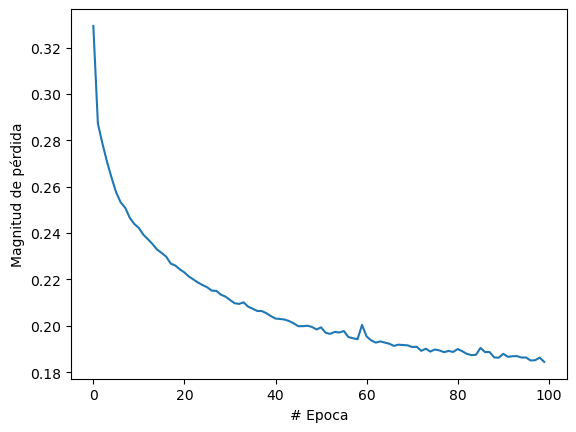

In [116]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(history.history["loss"])

In [122]:
keras2 = model.predict(dftest)

1524/1524 [==============================] - 2s 2ms/step


In [124]:
keras2 = pd.DataFrame(keras2, columns=["TARGET"])

keras2 ["SK_ID_CURR"]= cols_test

column_order = ['SK_ID_CURR', 'TARGET']
keras2 = keras2.reindex(columns=column_order)

keras2

,SK_ID_CURR,TARGET
0,100001,0.011983
1,100005,0.115576
2,100013,0.053808
3,100028,0.023015
4,100038,0.132573
...,...,...
48739,456221,0.071290
48740,456222,0.099699
48741,456223,0.044341
48742,456224,0.094275


In [125]:
keras2.to_csv('keras_2_21062023.csv', index = False)

# AQUI SE ACABA